# Using a CNN as last layer from the NLD Alife system

**Concept:** use convolution to combine the input over a range of time

In [5]:
pip install keras

  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow

     |████████████████████████████████| 228.5 MB 1.1 kB/s eta 0:00:012   |██▏                             | 15.5 MB 2.4 MB/s eta 0:01:27     |██▊                             | 19.1 MB 2.4 MB/s eta 0:01:26     |███▉                            | 27.5 MB 10.6 MB/s eta 0:00:19     |████▎                           | 30.8 MB 4.7 MB/s eta 0:00:42     |█████▋                          | 40.2 MB 4.3 MB/s eta 0:00:45     |█████████▊                      | 69.2 MB 2.5 MB/s eta 0:01:03     |██████████████▍                 | 102.6 MB 5.0 MB/s eta 0:00:26     |██████████████▌                 | 103.7 MB 5.0 MB/s eta 0:00:25        | 147.0 MB 13.4 MB/s eta 0:00:07     |██████████████████████          | 157.6 MB 5.8 MB/s eta 0:00:13�█▍         | 160.2 MB 5.8 MB/s eta 0:00:12     |████████████████████████▌       | 174.7 MB 6.1 MB/s eta 0:00:09     |███████████████████████████████ | 221.0 MB 5.4 MB/s eta 0:00:02
     |████████████████████████████████| 13.2 MB 2.1 MB/s eta 0:00:01
     |███████████████████

In [12]:
pip install matplotlib

     |████████████████████████████████| 7.3 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 12.6 MB/s eta 0:00:01     |█████████▊                      | 952 kB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 930 kB 17.3 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 3.1 MB/s  eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install sklearn

     |████████████████████████████████| 8.5 MB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 34.8 MB 232 kB/s eta 0:00:01     |████████████████▍               | 17.9 MB 8.7 MB/s eta 0:00:02     |█████████████████████▍          | 23.3 MB 4.2 MB/s eta 0:00:03     |█████████████████████████████▏  | 31.8 MB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 4.9 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=dd629a58fa334e4e56d1d7b8406094cd5d77db5ad09b5d27dee149f1db664c42
  Stored in directory: /Users/maya/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install pandas

     |████████████████████████████████| 11.0 MB 3.4 MB/s eta 0:00:01    |██████████████████████████▊     | 9.2 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 6.9 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,Input
import matplotlib
import sklearn

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [32]:
import pandas as pd

In [33]:
path = '../FluorescenceData/NL153/'

In [34]:
pd.read_csv('../FluorescenceData/NL153/NL153_FAM_2.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../FluorescenceData/NL153/NL153_FAM_2.csv'

In [23]:
#Excluding the beginning and end from training; will be used for visualization maybe?
data_fam = [pd.read_csv(path+'NL153_FAM_'+str(i)+'.csv',usecols=lambda x: '0' not in x,index_col='Cycle') for i in range(2,7)]
data_hex = [pd.read_csv(path+'NL153_HEX_'+str(i)+'.csv',usecols=lambda x: '0' not in x,index_col='Cycle') for i in range(2,7)]

FileNotFoundError: [Errno 2] No such file or directory: '../FluorescenceData/NL153/NL153_FAM_2.csv'

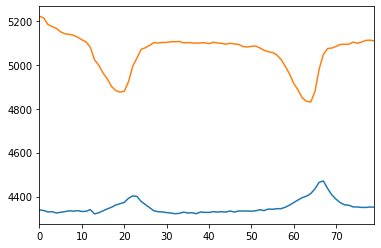

In [131]:
data_fam[0]['C1'].plot()
data_hex[0]['C1'].plot()

In [132]:
#First, what do we have
for df in data_hex:
    print(len(df))

80
80
80
80
80


In [169]:
#ok, then length 40, no overlap
input_length = 40
target = 'C1'
input_data = []
output_data = []
possible_vals = [46,50]
index = 0
for df in data_hex:
    for i in range(len(df[target])-input_length):
        input_data.append(df[target][i:i+input_length].to_numpy())
        output_data.append([possible_vals[index]])
    index = (index + 1)% 2

In [179]:
input_data = np.array(input_data)/5000
output_data = np.array(output_data)

In [180]:
model = Sequential()
model.add(Dense(20, input_dim=input_length))
model.add(Activation('relu'))
model.add(Dense(1))

#Then need to use compile to set the optimization method
# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

In [181]:
#finaly train
model.fit(x=input_data,y=output_data,epochs=1000)

Epoch 1/1000
200/200 [==============================] - 0s 302us/step - loss: 2167.3888
Epoch 2/1000
200/200 [==============================] - 0s 65us/step - loss: 2055.0841
Epoch 3/1000
200/200 [==============================] - 0s 51us/step - loss: 1980.6551
Epoch 4/1000
200/200 [==============================] - 0s 112us/step - loss: 1911.8556
Epoch 5/1000
200/200 [==============================] - 0s 49us/step - loss: 1844.5535
Epoch 6/1000
200/200 [==============================] - 0s 95us/step - loss: 1777.9684
Epoch 7/1000
200/200 [==============================] - 0s 114us/step - loss: 1711.6352
Epoch 8/1000
200/200 [==============================] - 0s 88us/step - loss: 1645.2059
Epoch 9/1000
200/200 [==============================] - 0s 206us/step - loss: 1578.4894
Epoch 10/1000
200/200 [==============================] - 0s 77us/step - loss: 1516.2064
Epoch 11/1000
200/200 [==============================] - 0s 52us/step - loss: 1454.9109
Epoch 12/1000
200/200 [==============

200/200 [==============================] - 0s 55us/step - loss: 2.1746
Epoch 97/1000
200/200 [==============================] - 0s 79us/step - loss: 2.1281
Epoch 98/1000
200/200 [==============================] - 0s 73us/step - loss: 2.2172
Epoch 99/1000
200/200 [==============================] - 0s 56us/step - loss: 2.1498
Epoch 100/1000
200/200 [==============================] - 0s 54us/step - loss: 2.1330
Epoch 101/1000
200/200 [==============================] - 0s 53us/step - loss: 2.1834
Epoch 102/1000
200/200 [==============================] - 0s 47us/step - loss: 2.1822
Epoch 103/1000
200/200 [==============================] - 0s 52us/step - loss: 2.1258
Epoch 104/1000
200/200 [==============================] - 0s 79us/step - loss: 2.1395
Epoch 105/1000
200/200 [==============================] - 0s 76us/step - loss: 2.2262
Epoch 106/1000
200/200 [==============================] - 0s 78us/step - loss: 2.1515
Epoch 107/1000
200/200 [==============================] - 0s 81us/step -

200/200 [==============================] - 0s 96us/step - loss: 2.1764
Epoch 287/1000
200/200 [==============================] - 0s 74us/step - loss: 2.1572
Epoch 288/1000
200/200 [==============================] - 0s 72us/step - loss: 2.1973
Epoch 289/1000
200/200 [==============================] - 0s 93us/step - loss: 2.1595
Epoch 290/1000
200/200 [==============================] - 0s 50us/step - loss: 2.1179
Epoch 291/1000
200/200 [==============================] - 0s 65us/step - loss: 2.1724
Epoch 292/1000
200/200 [==============================] - 0s 70us/step - loss: 2.1673
Epoch 293/1000
200/200 [==============================] - 0s 67us/step - loss: 2.1302
Epoch 294/1000
200/200 [==============================] - 0s 87us/step - loss: 2.1456
Epoch 295/1000
200/200 [==============================] - 0s 84us/step - loss: 2.1653
Epoch 296/1000
200/200 [==============================] - 0s 81us/step - loss: 2.1482
Epoch 297/1000
200/200 [==============================] - 0s 66us/ste

200/200 [==============================] - 0s 85us/step - loss: 2.0950
Epoch 476/1000
200/200 [==============================] - 0s 56us/step - loss: 2.1570
Epoch 477/1000
200/200 [==============================] - 0s 61us/step - loss: 2.1202
Epoch 478/1000
200/200 [==============================] - 0s 47us/step - loss: 2.1523
Epoch 479/1000
200/200 [==============================] - 0s 156us/step - loss: 2.1007
Epoch 480/1000
200/200 [==============================] - 0s 61us/step - loss: 2.1053
Epoch 481/1000
200/200 [==============================] - 0s 87us/step - loss: 2.1139
Epoch 482/1000
200/200 [==============================] - 0s 89us/step - loss: 2.1863
Epoch 483/1000
200/200 [==============================] - 0s 62us/step - loss: 2.1223
Epoch 484/1000
200/200 [==============================] - 0s 105us/step - loss: 2.1384
Epoch 485/1000
200/200 [==============================] - 0s 69us/step - loss: 2.1113
Epoch 486/1000
200/200 [==============================] - 0s 39us/s

200/200 [==============================] - 0s 98us/step - loss: 2.1028
Epoch 666/1000
200/200 [==============================] - 0s 71us/step - loss: 2.1719
Epoch 667/1000
200/200 [==============================] - 0s 91us/step - loss: 2.1380
Epoch 668/1000
200/200 [==============================] - 0s 82us/step - loss: 2.1192
Epoch 669/1000
200/200 [==============================] - 0s 88us/step - loss: 2.1311
Epoch 670/1000
200/200 [==============================] - 0s 86us/step - loss: 2.1464
Epoch 671/1000
200/200 [==============================] - 0s 79us/step - loss: 2.1332
Epoch 672/1000
200/200 [==============================] - 0s 86us/step - loss: 2.1173
Epoch 673/1000
200/200 [==============================] - 0s 91us/step - loss: 2.1730
Epoch 674/1000
200/200 [==============================] - 0s 82us/step - loss: 2.1401
Epoch 675/1000
200/200 [==============================] - 0s 74us/step - loss: 2.1900
Epoch 676/1000
200/200 [==============================] - 0s 84us/ste

200/200 [==============================] - 0s 68us/step - loss: 2.1590
Epoch 855/1000
200/200 [==============================] - 0s 118us/step - loss: 2.1279
Epoch 856/1000
200/200 [==============================] - ETA: 0s - loss: 2.134 - 0s 74us/step - loss: 2.1217
Epoch 857/1000
200/200 [==============================] - 0s 60us/step - loss: 2.1860
Epoch 858/1000
200/200 [==============================] - 0s 79us/step - loss: 2.1102
Epoch 859/1000
200/200 [==============================] - 0s 88us/step - loss: 2.1182
Epoch 860/1000
200/200 [==============================] - 0s 120us/step - loss: 2.1277
Epoch 861/1000
200/200 [==============================] - 0s 111us/step - loss: 2.1363
Epoch 862/1000
200/200 [==============================] - 0s 83us/step - loss: 2.1312
Epoch 863/1000
200/200 [==============================] - 0s 98us/step - loss: 2.1158
Epoch 864/1000
200/200 [==============================] - 0s 90us/step - loss: 2.0854
Epoch 865/1000
200/200 [==================

Epoch 949/1000
200/200 [==============================] - 0s 96us/step - loss: 2.0835
Epoch 950/1000
200/200 [==============================] - 0s 76us/step - loss: 2.1055
Epoch 951/1000
200/200 [==============================] - 0s 80us/step - loss: 2.0905
Epoch 952/1000
200/200 [==============================] - 0s 77us/step - loss: 2.1468
Epoch 953/1000
200/200 [==============================] - 0s 77us/step - loss: 2.1170
Epoch 954/1000
200/200 [==============================] - 0s 74us/step - loss: 2.1379
Epoch 955/1000
200/200 [==============================] - 0s 75us/step - loss: 2.1447
Epoch 956/1000
200/200 [==============================] - 0s 63us/step - loss: 2.1012
Epoch 957/1000
200/200 [==============================] - 0s 78us/step - loss: 2.1667
Epoch 958/1000
200/200 [==============================] - 0s 90us/step - loss: 2.0998
Epoch 959/1000
200/200 [==============================] - 0s 81us/step - loss: 2.0959
Epoch 960/1000
200/200 [==============================

In [182]:
predicted = model.predict(input_data)

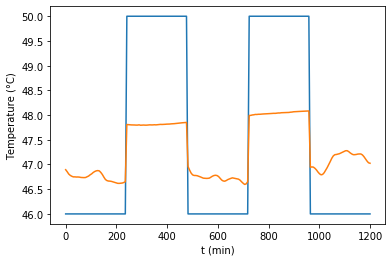

In [184]:
plt.xlabel('t (min)')
plt.ylabel('Temperature (°C)')
plt.plot(np.linspace(0,1200,len(output_data)),np.array([np.ravel(output_data),np.ravel(predicted)]).T)

In [380]:
full_length = pd.DataFrame()
min_max_scaler = preprocessing.MinMaxScaler()
previousVals = []
for df in data_hex:
    vals = df.values
    #if len(previousVals) > 0:
    #   vals -= previousVals
    previousVals = vals[-1]
    x_scaled = min_max_scaler.fit_transform(vals)
    temp_df = pd.DataFrame(x_scaled,columns=df.columns)
    full_length = pd.concat([full_length,temp_df],ignore_index=True)
#x_scaled = min_max_scaler.fit_transform(full_length)
#cols = full_length.columns
#full_length = pd.DataFrame(x_scaled,columns=cols)

In [381]:
full_length

B1        B2        B3        B4        C1        C2        C3  \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.939931  0.975733  0.990571  0.962420  0.979900  0.959459  0.980317   
2    0.908519  0.909269  0.969946  0.927206  0.903050  0.930356  0.941620   
3    0.890464  0.882070  0.859834  0.911100  0.880187  0.873664  0.879309   
4    0.857014  0.873363  0.861276  0.899850  0.858021  0.864545  0.880621   
5    0.831603  0.854287  0.835241  0.897735  0.818054  0.849230  0.845613   
6    0.789195  0.862100  0.840673  0.875455  0.795432  0.849053  0.833186   
7    0.802322  0.854679  0.828455  0.876383  0.789296  0.806776  0.817281   
8    0.792072  0.831832  0.800407  0.869283  0.778044  0.763693  0.801565   
9    0.788271  0.836698  0.799823  0.757753  0.756869  0.751125  0.783421   
10   0.771910  0.732360  0.774589  0.721169  0.726056  0.739555  0.768786   
11   0.783958  0.682678  0.761904  0.706827  0.701168  0.717334  0.726071   
12   0.756760  0.608932  0.720405  0.673225  0.638354  0.693102  0.678997   
13   0.595930  0.421219  0.637381  0.644900  0.491519  0.655969  0.487393   
14   0.596367  0.268981  0.532079  0.579005  0.429318  0.583942  0.338143   
15   0.565296  0.225026  0.459591  0.481841  0.338883  0.459839  0.218190   
16   0.514408  0.380491  0.363836  0.340565  0.271247  0.352155  0.186607   
17   0.491253  0.573747  0.249548  0.198400  0.180880  0.233772  0.350461   
18   0.459408  0.651174  0.184947  0.168686  0.134399  0.156560  0.535170   
19   0.417362  0.699531  0.149073  0.307401  0.115850  0.104037  0.624099   
20   0.358915  0.709716  0.209093  0.529809  0.124938  0.109831  0.658350   
21   0.286168  0.719111  0.407512  0.617754  0.234897  0.216337  0.664216   
22   0.216016  0.712465  0.566497  0.660654  0.415538  0.374255  0.674809   
23   0.166345  0.730502  0.635001  0.662243  0.513172  0.551892  0.682772   
24   0.121496  0.721642  0.666330  0.686412  0.613757  0.601496  0.687682   
25   0.099533  0.712846  0.680303  0.677126  0.633158  0.641351  0.689558   
26   0.091055  0.718277  0.669780  0.677313  0.659768  0.663666  0.686629   
27   0.140226  0.714509  0.664957  0.686595  0.694025  0.669831  0.686429   
28   0.261848  0.712866  0.675886  0.682792  0.687639  0.660776  0.705743   
29   0.402736  0.717113  0.682576  0.686410  0.694254  0.681439  0.700279   
..        ...       ...       ...       ...       ...       ...       ...   
370  0.968164  0.918618  0.895605  0.523325  0.949221  0.959944  1.000000   
371  0.955641  0.891048  0.860133  0.644774  0.943217  0.976841  0.964026   
372  0.942421  0.794186  0.780055  0.814983  0.950587  0.945812  0.982288   
373  0.949146  0.689681  0.663505  0.877708  0.949035  0.929304  0.984107   
374  0.922814  0.457123  0.466477  0.908231  0.955042  0.918666  0.970788   
375  0.897132  0.386180  0.348561  0.963647  0.974409  0.883841  0.969192   
376  0.820517  0.586104  0.515043  0.922680  0.986182  0.814408  0.981928   
377  0.725227  0.834263  0.849376  0.924976  0.977853  0.687417  0.964566   
378  0.608478  0.891112  0.956226  0.960617  0.970017  0.558389  0.957898   
379  0.431644  0.921109  0.974072  0.957276  0.974032  0.385822  0.968923   
380  0.271762  0.933574  0.966065  0.933885  0.981671  0.320360  0.945838   
381  0.347088  0.950971  0.928075  0.956767  0.977915  0.595116  0.971900   
382  0.609697  0.915852  0.972352  0.971711  0.980015  0.873578  0.952922   
383  0.858304  0.956467  0.961975  0.980065  0.973872  0.931349  0.947095   
384  0.922257  0.939088  0.957150  0.970021  1.000000  0.971364  0.908145   
385  0.933663  0.946206  0.988750  0.954006  0.977233  0.962050  0.877998   
386  0.964338  0.919265  0.974205  0.964678  0.978612  0.961516  0.778382   
387  0.942386  0.952152  0.972785  0.964890  0.953180  0.972949  0.626002   
388  0.947517  0.937225  0.986876  0.987119  0.951716  0.971825  0.363401   
389  0.958450  0.936234  0.979168  0.979705  0.947268  0.969273  0.179225   
390  0.

In [275]:
#ok, then length 40, overlap
def get_data(target,input_length=40,possible_vals = [46,50]):
    input_data = np.array([full_length[target][i:i+input_length].to_numpy() for i in range(len(full_length)-input_length)])
    output_data = []

    index = 0

    for df in data_hex:
        output_data.append([possible_vals[index]]*len(df))
        index = (index + 1) %2
    output_data = np.ravel(np.array(output_data))[int(input_length/2):-int(input_length/2)]
    input_data = np.array(input_data)
    input_data /= np.max(input_data)
    return input_data,output_data

# Negative control

In [306]:
input_data, output_data = get_data('G1')

In [307]:
model = Sequential()
model.add(Dense(100, input_dim=input_length))
model.add(Activation('elu'))
model.add(Dense(1))

#Then need to use compile to set the optimization method
# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

In [308]:
#finaly train
model.fit(x=input_data,y=output_data,epochs=1000)

Epoch 1/1000
360/360 [==============================] - 0s 174us/step - loss: 1968.9289
Epoch 2/1000
360/360 [==============================] - 0s 166us/step - loss: 1511.1899
Epoch 3/1000
360/360 [==============================] - 0s 71us/step - loss: 1164.9124
Epoch 4/1000
360/360 [==============================] - 0s 81us/step - loss: 866.3084
Epoch 5/1000
360/360 [==============================] - 0s 74us/step - loss: 608.8576
Epoch 6/1000
360/360 [==============================] - 0s 72us/step - loss: 397.5660
Epoch 7/1000
360/360 [==============================] - 0s 74us/step - loss: 236.3751
Epoch 8/1000
360/360 [==============================] - 0s 103us/step - loss: 131.1082
Epoch 9/1000
360/360 [==============================] - 0s 83us/step - loss: 74.6692
Epoch 10/1000
360/360 [==============================] - 0s 86us/step - loss: 55.4098
Epoch 11/1000
360/360 [==============================] - 0s 110us/step - loss: 52.2643
Epoch 12/1000
360/360 [=========================

360/360 [==============================] - 0s 48us/step - loss: 3.3983
Epoch 192/1000
360/360 [==============================] - 0s 56us/step - loss: 3.5031
Epoch 193/1000
360/360 [==============================] - 0s 50us/step - loss: 3.5343
Epoch 194/1000
360/360 [==============================] - 0s 63us/step - loss: 3.4374
Epoch 195/1000
360/360 [==============================] - 0s 60us/step - loss: 3.4959
Epoch 196/1000
360/360 [==============================] - 0s 77us/step - loss: 3.4869
Epoch 197/1000
360/360 [==============================] - 0s 52us/step - loss: 3.4249
Epoch 198/1000
360/360 [==============================] - 0s 67us/step - loss: 3.4340
Epoch 199/1000
360/360 [==============================] - 0s 47us/step - loss: 3.4939
Epoch 200/1000
360/360 [==============================] - 0s 60us/step - loss: 3.4599
Epoch 201/1000
360/360 [==============================] - 0s 67us/step - loss: 3.3959
Epoch 202/1000
360/360 [==============================] - 0s 75us/ste

360/360 [==============================] - 0s 56us/step - loss: 3.3318
Epoch 287/1000
360/360 [==============================] - 0s 67us/step - loss: 3.4286
Epoch 288/1000
360/360 [==============================] - 0s 65us/step - loss: 3.3845
Epoch 289/1000
360/360 [==============================] - 0s 67us/step - loss: 3.4021
Epoch 290/1000
360/360 [==============================] - 0s 57us/step - loss: 3.4936
Epoch 291/1000
360/360 [==============================] - 0s 56us/step - loss: 3.4283
Epoch 292/1000
360/360 [==============================] - 0s 73us/step - loss: 3.4931
Epoch 293/1000
360/360 [==============================] - 0s 54us/step - loss: 3.3695
Epoch 294/1000
360/360 [==============================] - 0s 35us/step - loss: 3.4068
Epoch 295/1000
360/360 [==============================] - 0s 26us/step - loss: 3.3964
Epoch 296/1000
360/360 [==============================] - 0s 24us/step - loss: 3.4795
Epoch 297/1000
360/360 [==============================] - 0s 25us/ste

360/360 [==============================] - 0s 47us/step - loss: 3.3551
Epoch 477/1000
360/360 [==============================] - 0s 51us/step - loss: 3.4752
Epoch 478/1000
360/360 [==============================] - 0s 50us/step - loss: 3.5040
Epoch 479/1000
360/360 [==============================] - 0s 55us/step - loss: 3.3589
Epoch 480/1000
360/360 [==============================] - 0s 61us/step - loss: 3.3675
Epoch 481/1000
360/360 [==============================] - 0s 58us/step - loss: 3.4008
Epoch 482/1000
360/360 [==============================] - 0s 61us/step - loss: 3.3698
Epoch 483/1000
360/360 [==============================] - 0s 43us/step - loss: 3.4349
Epoch 484/1000
360/360 [==============================] - 0s 55us/step - loss: 3.3851
Epoch 485/1000
360/360 [==============================] - 0s 51us/step - loss: 3.3358
Epoch 486/1000
360/360 [==============================] - 0s 43us/step - loss: 3.4024
Epoch 487/1000
360/360 [==============================] - 0s 54us/ste

360/360 [==============================] - 0s 50us/step - loss: 3.3125
Epoch 572/1000
360/360 [==============================] - 0s 51us/step - loss: 3.4834
Epoch 573/1000
360/360 [==============================] - 0s 49us/step - loss: 3.3405
Epoch 574/1000
360/360 [==============================] - 0s 48us/step - loss: 3.3886
Epoch 575/1000
360/360 [==============================] - 0s 60us/step - loss: 3.3384
Epoch 576/1000
360/360 [==============================] - 0s 60us/step - loss: 3.2944
Epoch 577/1000
360/360 [==============================] - 0s 45us/step - loss: 3.3190
Epoch 578/1000
360/360 [==============================] - 0s 41us/step - loss: 3.3575
Epoch 579/1000
360/360 [==============================] - 0s 62us/step - loss: 3.3037
Epoch 580/1000
360/360 [==============================] - 0s 53us/step - loss: 3.3523
Epoch 581/1000
360/360 [==============================] - 0s 48us/step - loss: 3.3073
Epoch 582/1000
360/360 [==============================] - 0s 49us/ste

360/360 [==============================] - 0s 67us/step - loss: 3.1930
Epoch 762/1000
360/360 [==============================] - 0s 68us/step - loss: 3.2874
Epoch 763/1000
360/360 [==============================] - 0s 85us/step - loss: 3.2310
Epoch 764/1000
360/360 [==============================] - 0s 73us/step - loss: 3.3239
Epoch 765/1000
360/360 [==============================] - 0s 86us/step - loss: 3.2798
Epoch 766/1000
360/360 [==============================] - 0s 51us/step - loss: 3.2236
Epoch 767/1000
360/360 [==============================] - 0s 47us/step - loss: 3.3176
Epoch 768/1000
360/360 [==============================] - 0s 57us/step - loss: 3.2599
Epoch 769/1000
360/360 [==============================] - 0s 80us/step - loss: 3.2377
Epoch 770/1000
360/360 [==============================] - 0s 60us/step - loss: 3.2118
Epoch 771/1000
360/360 [==============================] - 0s 79us/step - loss: 3.2728
Epoch 772/1000
360/360 [==============================] - 0s 59us/ste

360/360 [==============================] - 0s 118us/step - loss: 3.1541
Epoch 952/1000
360/360 [==============================] - 0s 58us/step - loss: 3.1473
Epoch 953/1000
360/360 [==============================] - 0s 48us/step - loss: 3.1924
Epoch 954/1000
360/360 [==============================] - 0s 80us/step - loss: 3.2430
Epoch 955/1000
360/360 [==============================] - 0s 57us/step - loss: 3.1738
Epoch 956/1000
360/360 [==============================] - 0s 63us/step - loss: 3.1321
Epoch 957/1000
360/360 [==============================] - 0s 74us/step - loss: 3.1978
Epoch 958/1000
360/360 [==============================] - 0s 59us/step - loss: 3.1082
Epoch 959/1000
360/360 [==============================] - 0s 80us/step - loss: 3.2164
Epoch 960/1000
360/360 [==============================] - 0s 61us/step - loss: 3.1501
Epoch 961/1000
360/360 [==============================] - 0s 76us/step - loss: 3.1496
Epoch 962/1000
360/360 [==============================] - 0s 73us/st

In [309]:
predicted = model.predict(input_data)

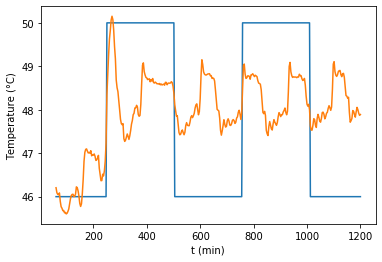

In [310]:
plt.xlabel('t (min)')
plt.ylabel('Temperature (°C)')
plt.plot(np.linspace(60,1200,len(output_data)),np.array([np.ravel(output_data),np.ravel(predicted)]).T)

# Good conditions

In [311]:
input_data, output_data = get_data('C1')

In [324]:
model = Sequential()
model.add(Dense(100, input_dim=input_length))
#model.add(Dense(10, input_dim=input_length))
model.add(Activation('elu'))
model.add(Dense(1))

#Then need to use compile to set the optimization method
# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

In [328]:
#finaly train
model.fit(x=input_data,y=output_data,epochs=1000)

Epoch 1/1000
360/360 [==============================] - 0s 142us/step - loss: 1.1336
Epoch 2/1000
360/360 [==============================] - 0s 58us/step - loss: 1.0678
Epoch 3/1000
360/360 [==============================] - 0s 118us/step - loss: 1.1347
Epoch 4/1000
360/360 [==============================] - 0s 59us/step - loss: 0.9964
Epoch 5/1000
360/360 [==============================] - 0s 45us/step - loss: 1.0332
Epoch 6/1000
360/360 [==============================] - 0s 57us/step - loss: 1.0893
Epoch 7/1000
360/360 [==============================] - 0s 53us/step - loss: 1.0207
Epoch 8/1000
360/360 [==============================] - 0s 50us/step - loss: 1.0439
Epoch 9/1000
360/360 [==============================] - 0s 56us/step - loss: 1.0409
Epoch 10/1000
360/360 [==============================] - 0s 69us/step - loss: 1.1303
Epoch 11/1000
360/360 [==============================] - 0s 159us/step - loss: 1.1511
Epoch 12/1000
360/360 [==============================] - 0s 72us/step -

360/360 [==============================] - 0s 55us/step - loss: 0.9044
Epoch 193/1000
360/360 [==============================] - 0s 72us/step - loss: 1.0016
Epoch 194/1000
360/360 [==============================] - 0s 61us/step - loss: 0.9481
Epoch 195/1000
360/360 [==============================] - 0s 65us/step - loss: 0.9289
Epoch 196/1000
360/360 [==============================] - 0s 61us/step - loss: 0.8990
Epoch 197/1000
360/360 [==============================] - 0s 70us/step - loss: 0.9122
Epoch 198/1000
360/360 [==============================] - 0s 84us/step - loss: 0.9937
Epoch 199/1000
360/360 [==============================] - 0s 55us/step - loss: 0.9708
Epoch 200/1000
360/360 [==============================] - 0s 56us/step - loss: 0.8821
Epoch 201/1000
360/360 [==============================] - 0s 53us/step - loss: 0.9489
Epoch 202/1000
360/360 [==============================] - 0s 55us/step - loss: 0.8900
Epoch 203/1000
360/360 [==============================] - 0s 59us/ste

360/360 [==============================] - 0s 57us/step - loss: 0.9195
Epoch 382/1000
360/360 [==============================] - 0s 65us/step - loss: 0.8305
Epoch 383/1000
360/360 [==============================] - 0s 50us/step - loss: 0.8288
Epoch 384/1000
360/360 [==============================] - 0s 61us/step - loss: 0.8751
Epoch 385/1000
360/360 [==============================] - 0s 74us/step - loss: 0.8027
Epoch 386/1000
360/360 [==============================] - 0s 66us/step - loss: 0.8464
Epoch 387/1000
360/360 [==============================] - 0s 76us/step - loss: 0.8168
Epoch 388/1000
360/360 [==============================] - 0s 78us/step - loss: 0.8171
Epoch 389/1000
360/360 [==============================] - 0s 62us/step - loss: 0.8904
Epoch 390/1000
360/360 [==============================] - 0s 75us/step - loss: 0.8468
Epoch 391/1000
360/360 [==============================] - 0s 58us/step - loss: 0.8219
Epoch 392/1000
360/360 [==============================] - 0s 64us/ste

360/360 [==============================] - 0s 73us/step - loss: 0.7666
Epoch 477/1000
360/360 [==============================] - 0s 71us/step - loss: 0.7583
Epoch 478/1000
360/360 [==============================] - 0s 66us/step - loss: 0.8313
Epoch 479/1000
360/360 [==============================] - 0s 69us/step - loss: 0.8044
Epoch 480/1000
360/360 [==============================] - 0s 71us/step - loss: 0.8123
Epoch 481/1000
360/360 [==============================] - 0s 73us/step - loss: 0.7935
Epoch 482/1000
360/360 [==============================] - 0s 59us/step - loss: 0.7349
Epoch 483/1000
360/360 [==============================] - 0s 76us/step - loss: 0.8468
Epoch 484/1000
360/360 [==============================] - 0s 61us/step - loss: 0.7362
Epoch 485/1000
360/360 [==============================] - 0s 50us/step - loss: 0.7902
Epoch 486/1000
360/360 [==============================] - 0s 55us/step - loss: 0.8934
Epoch 487/1000
360/360 [==============================] - 0s 76us/ste

360/360 [==============================] - 0s 63us/step - loss: 0.7488
Epoch 667/1000
360/360 [==============================] - 0s 62us/step - loss: 0.7107
Epoch 668/1000
360/360 [==============================] - 0s 87us/step - loss: 0.6834
Epoch 669/1000
360/360 [==============================] - 0s 57us/step - loss: 0.6824
Epoch 670/1000
360/360 [==============================] - 0s 74us/step - loss: 0.7498
Epoch 671/1000
360/360 [==============================] - 0s 115us/step - loss: 0.7119
Epoch 672/1000
360/360 [==============================] - 0s 79us/step - loss: 0.6770
Epoch 673/1000
360/360 [==============================] - 0s 81us/step - loss: 0.6439
Epoch 674/1000
360/360 [==============================] - 0s 79us/step - loss: 0.6671
Epoch 675/1000
360/360 [==============================] - 0s 91us/step - loss: 0.7783
Epoch 676/1000
360/360 [==============================] - 0s 102us/step - loss: 0.7153
Epoch 677/1000
360/360 [==============================] - 0s 69us/s

360/360 [==============================] - 0s 76us/step - loss: 0.6312
Epoch 857/1000
360/360 [==============================] - 0s 59us/step - loss: 0.5608
Epoch 858/1000
360/360 [==============================] - 0s 72us/step - loss: 0.6203
Epoch 859/1000
360/360 [==============================] - 0s 57us/step - loss: 0.6128
Epoch 860/1000
360/360 [==============================] - 0s 68us/step - loss: 0.6062
Epoch 861/1000
360/360 [==============================] - 0s 58us/step - loss: 0.5824
Epoch 862/1000
360/360 [==============================] - 0s 70us/step - loss: 0.6080
Epoch 863/1000
360/360 [==============================] - 0s 56us/step - loss: 0.5363
Epoch 864/1000
360/360 [==============================] - 0s 58us/step - loss: 0.6466
Epoch 865/1000
360/360 [==============================] - 0s 67us/step - loss: 0.5564
Epoch 866/1000
360/360 [==============================] - 0s 59us/step - loss: 0.6607
Epoch 867/1000
360/360 [==============================] - 0s 72us/ste

In [329]:
predicted = model.predict(input_data)

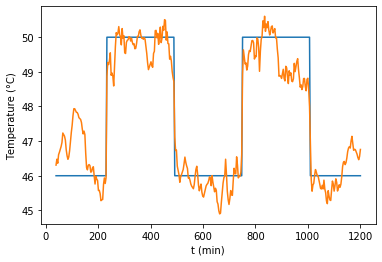

In [330]:
plt.xlabel('t (min)')
plt.ylabel('Temperature (°C)')
plt.plot(np.linspace(40,1200,len(output_data)),np.array([np.ravel(output_data),np.ravel(predicted)]).T)

In [414]:
input_data2, output_data2 = get_data('D1')

In [415]:
#Just predict with the same model
predicted2 = model.predict(input_data2)

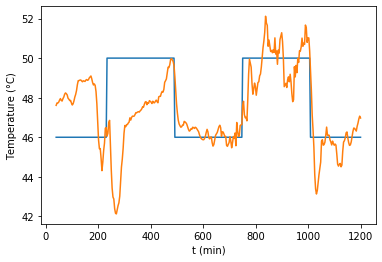

In [416]:
plt.xlabel('t (min)')
plt.ylabel('Temperature (°C)')
plt.plot(np.linspace(40,1200,len(output_data)),np.array([np.ravel(output_data),np.ravel(predicted2)]).T)

In [342]:
model.evaluate(*get_data('G1'))

360/360 [==============================] - 0s 20us/step


10.79462542268965

In [345]:
model.evaluate(*get_data('D1'))

360/360 [==============================] - 0s 17us/step


4.493156950341331

In [346]:
test_tubes = ['B1','C1','D1','E1','F1','G1']

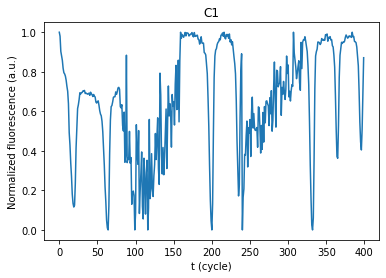

In [382]:
plt.xlabel('t (cycle)')
plt.ylabel('Normalized fluorescence (a.u.)')
plt.title('C1')
plt.plot(np.ravel(full_length['C1']))

In [412]:
full_length2 = pd.concat(data_hex,ignore_index=True)

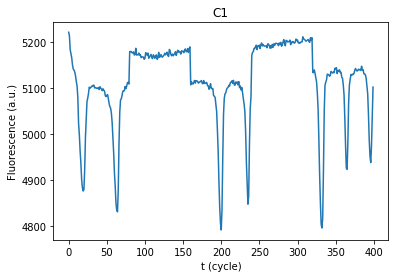

In [413]:
plt.xlabel('t (cycle)')
plt.ylabel('Fluorescence (a.u.)')
plt.title('C1')
plt.plot(np.ravel(full_length2['C1']))

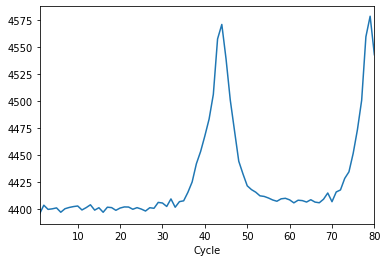

In [400]:
data_fam[2]['C1'].plot()

In [393]:
full_length_fam = pd.concat(data_fam,ignore_index=True)

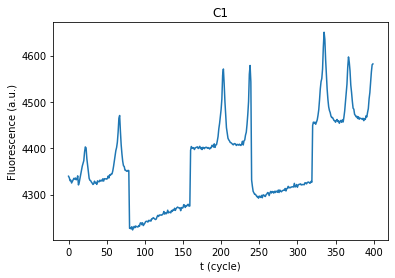

In [395]:
plt.xlabel('t (cycle)')
plt.ylabel('Fluorescence (a.u.)')
plt.title('C1')
plt.plot(np.ravel(full_length_fam['C1']))

In [4]:
path2 = '/Users/nauberkato/Downloads/NL210/'

In [137]:
#Excluding the beginning and end from training; will be used for visualization maybe?
data_fam_2 = [pd.read_csv(path2+'NL210 step '+str(i)+'/NL210 2020-02-25 PP5 On-oFF x3 Range ttRecJ 1.8-2.2% -  Quantification Amplification Results_FAM.csv',usecols=lambda x: '0' not in x,index_col='Cycle') for i in range(1,10,2)]
data_hex_2 = [pd.read_csv(path2+'NL210 step '+str(i)+'/NL210 2020-02-25 PP5 On-oFF x3 Range ttRecJ 1.8-2.2% -  Quantification Amplification Results_HEX.csv',usecols=lambda x: '0' not in x,index_col='Cycle') for i in range(1,10,2)]
data_rox_2 = [pd.read_csv(path2+'NL210 step '+str(i)+'/NL210 2020-02-25 PP5 On-oFF x3 Range ttRecJ 1.8-2.2% -  Quantification Amplification Results_ROX.csv',usecols=lambda x: '0' not in x,index_col='Cycle') for i in range(1,10,2)]

In [138]:
full_length_fam2 = pd.concat(data_fam_2,ignore_index=True)
full_length_hex2 = pd.concat(data_hex_2,ignore_index=True)
full_length_rox2 = pd.concat(data_rox_2,ignore_index=True)

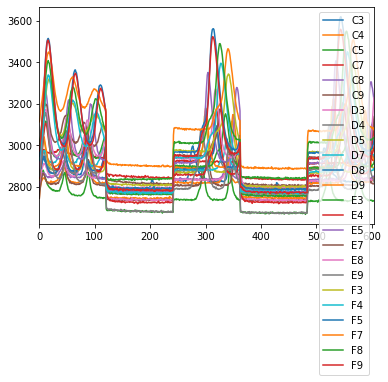

In [139]:
full_length_fam2.plot()

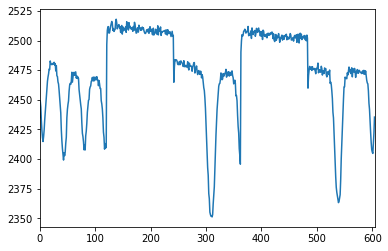

In [140]:
full_length_hex2['E4'].plot()

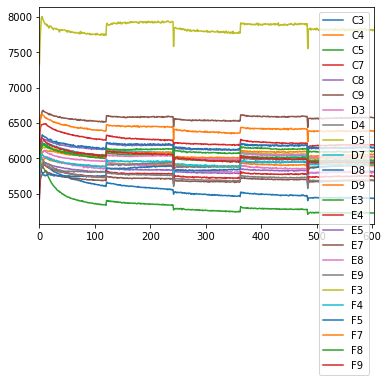

In [77]:
full_length_rox2.plot()

In [214]:
full_length_norm = pd.DataFrame()
previousVals = []
b, a = signal.butter(3, 0.1)
for i in range(len(data_hex_2)):
    df = data_hex_2[i]/data_rox_2[i] 
    #vals = df.values
    if len(previousVals) > 0:
        #print(vals.shape,previousVals.shape,vals[0].shape)
        diff = (df[2:-2].max() - previousVals) #vals 0 can be aftected by the temperature change
        df -=  diff #remove jump
    previousVals = df[2:-2].max()
    #print(previousVals,df.max())
    #x_scaled = min_max_scaler.fit_transform(vals)
    #temp_df = pd.DataFrame(vals,columns=df.columns)
    full_length_norm = pd.concat([full_length_norm,df],ignore_index=True)
    
for exp in full_length_norm.columns:
    min_max_scaler = preprocessing.MinMaxScaler()
    vals = signal.filtfilt(b, a,full_length_norm[exp] , padlen=150)
    min_max_scaler.fit(vals[10:].reshape(-1,1))#(vals[vals < 0.99*vals.max()].reshape(-1,1))
    full_length_norm[exp] = min_max_scaler.transform(vals.reshape(-1,1))
#x_scaled = min_max_scaler.fit_transform(full_length_norm)
#cols = full_length_norm.columns
#full_length_norm = pd.DataFrame(x_scaled,columns=cols)

In [215]:
def get_data_2(target,input_length=40,possible_vals = [0,1]):
    input_data = np.array([full_length_norm[target][i:i+input_length].to_numpy() for i in range(len(full_length_norm)-input_length)])
    output_data = []

    index = 0

    for df in data_hex_2:
        output_data.append([possible_vals[index]]*len(df))
        index = (index + 1) %2
    output_data = np.ravel(np.array(output_data))[int(input_length/2):-int(input_length/2)]
    input_data = np.array(input_data)
    input_data /= np.max(input_data)
    return input_data,output_data

In [351]:
input_data, output_data = get_data_2('E5')

In [359]:
def get_model(layer_size,input_length=40, use_mse=True,num_classes=2,use_hidden=True):
    model = Sequential()
    if use_hidden:
        model.add(Dense(layer_size,input_dim=input_length))
        model.add(Activation('elu'))
        

    #Then need to use compile to set the optimization method
    # For a mean squared error regression problem
    if use_mse:
        model.add(Dense(1,input_dim=None if use_hidden else input_length))
        model.add(Activation('sigmoid'))
        model.compile(optimizer='rmsprop',
                      loss='mse')
    else:
        model.add(Dense(num_classes,input_dim=None if use_hidden else input_length))
        model.add(Activation('softmax'))
        model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

In [364]:
#finaly train
model = get_model(10,use_hidden=False)
model.fit(x=input_data,y=output_data,epochs=200)

Epoch 1/200
565/565 [==============================] - 0s 91us/step - loss: 0.3070
Epoch 2/200
565/565 [==============================] - 0s 25us/step - loss: 0.2688
Epoch 3/200
565/565 [==============================] - 0s 62us/step - loss: 0.2551
Epoch 4/200
565/565 [==============================] - 0s 60us/step - loss: 0.2521
Epoch 5/200
565/565 [==============================] - 0s 70us/step - loss: 0.2518
Epoch 6/200
565/565 [==============================] - 0s 58us/step - loss: 0.2511
Epoch 7/200
565/565 [==============================] - 0s 51us/step - loss: 0.2511
Epoch 8/200
565/565 [==============================] - 0s 37us/step - loss: 0.2508
Epoch 9/200
565/565 [==============================] - 0s 41us/step - loss: 0.2507
Epoch 10/200
565/565 [==============================] - 0s 27us/step - loss: 0.2505
Epoch 11/200
565/565 [==============================] - 0s 57us/step - loss: 0.2503
Epoch 12/200
565/565 [==============================] - 0s 50us/step - loss: 0.2500
E

565/565 [==============================] - 0s 32us/step - loss: 0.2332
Epoch 99/200
565/565 [==============================] - 0s 40us/step - loss: 0.2329
Epoch 100/200
565/565 [==============================] - 0s 45us/step - loss: 0.2327
Epoch 101/200
565/565 [==============================] - 0s 54us/step - loss: 0.2324
Epoch 102/200
565/565 [==============================] - 0s 31us/step - loss: 0.2327
Epoch 103/200
565/565 [==============================] - 0s 49us/step - loss: 0.2320
Epoch 104/200
565/565 [==============================] - 0s 56us/step - loss: 0.2319
Epoch 105/200
565/565 [==============================] - 0s 40us/step - loss: 0.2319
Epoch 106/200
565/565 [==============================] - 0s 56us/step - loss: 0.2319
Epoch 107/200
565/565 [==============================] - 0s 40us/step - loss: 0.2312
Epoch 108/200
565/565 [==============================] - 0s 35us/step - loss: 0.2309
Epoch 109/200
565/565 [==============================] - 0s 38us/step - loss: 0.

565/565 [==============================] - 0s 41us/step - loss: 0.2172
Epoch 195/200
565/565 [==============================] - 0s 58us/step - loss: 0.2169
Epoch 196/200
565/565 [==============================] - 0s 49us/step - loss: 0.2167
Epoch 197/200
565/565 [==============================] - 0s 42us/step - loss: 0.2166
Epoch 198/200
565/565 [==============================] - 0s 44us/step - loss: 0.2165
Epoch 199/200
565/565 [==============================] - 0s 44us/step - loss: 0.2163
Epoch 200/200
565/565 [==============================] - 0s 40us/step - loss: 0.2161


In [365]:
#Just predict with the same model
predicted_repeat = model.predict(input_data)

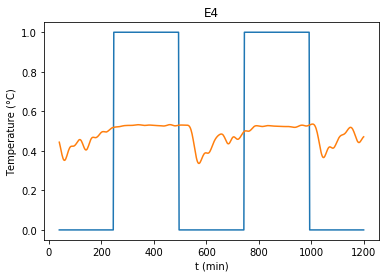

In [366]:
plt.xlabel('t (min)')
plt.ylabel('Temperature (°C)')
plt.title('E4')
plt.plot(np.linspace(40,1200,len(output_data)),np.array([np.ravel(output_data),np.ravel(predicted_repeat)]).T)

In [271]:
input_data, output_data = get_data_2('C4')

In [233]:
#Just predict with the same model
predicted_repeat = model.predict(input_data)

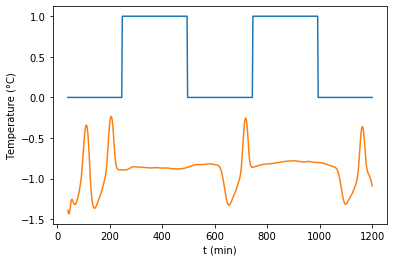

In [234]:
plt.xlabel('t (min)')
plt.ylabel('Temperature (°C)')
plt.plot(np.linspace(40,1200,len(output_data)),np.array([np.ravel(output_data),np.ravel(predicted_repeat)]).T)

In [185]:
full_length_norm.idxmax()

C3    484
C4      0
C5    484
C7      0
C8      0
C9      0
D3    484
D4    242
D5      0
D7    484
D8    242
D9      0
E3    484
E4      0
E5    484
E7    484
E8      0
E9    484
F3      0
F4    242
F5    242
F7    484
F8    484
F9    484
dtype: int64

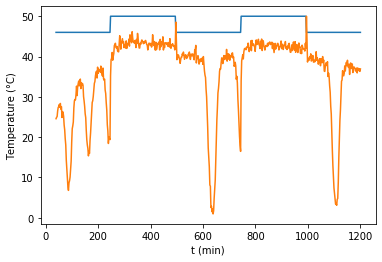

In [460]:
plt.xlabel('t (min)')
plt.ylabel('Temperature (°C)')
plt.plot(np.linspace(40,1200,len(output_data)),np.array([np.ravel(output_data),full_length_norm['E4'].values[20:-20]*50]).T)

In [455]:
np.ravel(output_data).shape

(565,)

In [383]:
input_data, output_data = get_data_2('D9')

In [384]:
model = get_model(10,use_mse=False,use_hidden=False)
model.fit(x=input_data,y=keras.utils.to_categorical(output_data, 2),epochs=400)

Epoch 1/400
565/565 [==============================] - 0s 163us/step - loss: 0.6945 - accuracy: 0.4885
Epoch 2/400
565/565 [==============================] - 0s 29us/step - loss: 0.6898 - accuracy: 0.5398
Epoch 3/400
565/565 [==============================] - 0s 58us/step - loss: 0.6900 - accuracy: 0.6053
Epoch 4/400
565/565 [==============================] - 0s 61us/step - loss: 0.6886 - accuracy: 0.5345
Epoch 5/400
565/565 [==============================] - 0s 65us/step - loss: 0.6865 - accuracy: 0.5009
Epoch 6/400
565/565 [==============================] - 0s 61us/step - loss: 0.6871 - accuracy: 0.5434
Epoch 7/400
565/565 [==============================] - 0s 51us/step - loss: 0.6841 - accuracy: 0.5080
Epoch 8/400
565/565 [==============================] - 0s 40us/step - loss: 0.6834 - accuracy: 0.5611
Epoch 9/400
565/565 [==============================] - 0s 85us/step - loss: 0.6822 - accuracy: 0.5823
Epoch 10/400
565/565 [==============================] - 0s 52us/step - loss: 0.68

565/565 [==============================] - 0s 64us/step - loss: 0.6082 - accuracy: 0.8372
Epoch 81/400
565/565 [==============================] - 0s 49us/step - loss: 0.6075 - accuracy: 0.8372
Epoch 82/400
565/565 [==============================] - 0s 53us/step - loss: 0.6054 - accuracy: 0.8283
Epoch 83/400
565/565 [==============================] - 0s 37us/step - loss: 0.6034 - accuracy: 0.6920
Epoch 84/400
565/565 [==============================] - 0s 43us/step - loss: 0.6053 - accuracy: 0.7982
Epoch 85/400
565/565 [==============================] - 0s 44us/step - loss: 0.6033 - accuracy: 0.8407
Epoch 86/400
565/565 [==============================] - 0s 53us/step - loss: 0.6027 - accuracy: 0.8425
Epoch 87/400
565/565 [==============================] - 0s 54us/step - loss: 0.6016 - accuracy: 0.8496
Epoch 88/400
565/565 [==============================] - 0s 48us/step - loss: 0.6004 - accuracy: 0.8407
Epoch 89/400
565/565 [==============================] - 0s 45us/step - loss: 0.5986 - 

565/565 [==============================] - 0s 50us/step - loss: 0.5435 - accuracy: 0.8991
Epoch 160/400
565/565 [==============================] - 0s 45us/step - loss: 0.5432 - accuracy: 0.8779
Epoch 161/400
565/565 [==============================] - 0s 46us/step - loss: 0.5411 - accuracy: 0.8779
Epoch 162/400
565/565 [==============================] - 0s 47us/step - loss: 0.5407 - accuracy: 0.8832
Epoch 163/400
565/565 [==============================] - 0s 44us/step - loss: 0.5411 - accuracy: 0.9080
Epoch 164/400
565/565 [==============================] - 0s 46us/step - loss: 0.5389 - accuracy: 0.8690
Epoch 165/400
565/565 [==============================] - 0s 38us/step - loss: 0.5400 - accuracy: 0.8850
Epoch 166/400
565/565 [==============================] - 0s 47us/step - loss: 0.5379 - accuracy: 0.8973
Epoch 167/400
565/565 [==============================] - 0s 44us/step - loss: 0.5379 - accuracy: 0.8708
Epoch 168/400
565/565 [==============================] - 0s 36us/step - loss: 

565/565 [==============================] - 0s 53us/step - loss: 0.4927 - accuracy: 0.9168
Epoch 238/400
565/565 [==============================] - 0s 71us/step - loss: 0.4911 - accuracy: 0.8903
Epoch 239/400
565/565 [==============================] - 0s 48us/step - loss: 0.4911 - accuracy: 0.9097
Epoch 240/400
565/565 [==============================] - 0s 47us/step - loss: 0.4910 - accuracy: 0.8867
Epoch 241/400
565/565 [==============================] - 0s 59us/step - loss: 0.4899 - accuracy: 0.8920
Epoch 242/400
565/565 [==============================] - 0s 56us/step - loss: 0.4894 - accuracy: 0.9150
Epoch 243/400
565/565 [==============================] - 0s 44us/step - loss: 0.4886 - accuracy: 0.9009
Epoch 244/400
565/565 [==============================] - 0s 46us/step - loss: 0.4892 - accuracy: 0.8973
Epoch 245/400
565/565 [==============================] - 0s 43us/step - loss: 0.4877 - accuracy: 0.9044
Epoch 246/400
565/565 [==============================] - 0s 49us/step - loss: 

565/565 [==============================] - 0s 53us/step - loss: 0.4517 - accuracy: 0.9168
Epoch 316/400
565/565 [==============================] - 0s 66us/step - loss: 0.4519 - accuracy: 0.9009
Epoch 317/400
565/565 [==============================] - 0s 52us/step - loss: 0.4510 - accuracy: 0.9044
Epoch 318/400
565/565 [==============================] - 0s 51us/step - loss: 0.4510 - accuracy: 0.9168
Epoch 319/400
565/565 [==============================] - 0s 52us/step - loss: 0.4501 - accuracy: 0.9133
Epoch 320/400
565/565 [==============================] - 0s 38us/step - loss: 0.4490 - accuracy: 0.8938
Epoch 321/400
565/565 [==============================] - 0s 54us/step - loss: 0.4493 - accuracy: 0.9150
Epoch 322/400
565/565 [==============================] - 0s 49us/step - loss: 0.4487 - accuracy: 0.9062
Epoch 323/400
565/565 [==============================] - 0s 52us/step - loss: 0.4480 - accuracy: 0.9080
Epoch 324/400
565/565 [==============================] - 0s 49us/step - loss: 

565/565 [==============================] - 0s 55us/step - loss: 0.4199 - accuracy: 0.9097
Epoch 394/400
565/565 [==============================] - 0s 34us/step - loss: 0.4201 - accuracy: 0.9044
Epoch 395/400
565/565 [==============================] - 0s 41us/step - loss: 0.4196 - accuracy: 0.9062
Epoch 396/400
565/565 [==============================] - 0s 50us/step - loss: 0.4189 - accuracy: 0.9062
Epoch 397/400
565/565 [==============================] - 0s 48us/step - loss: 0.4188 - accuracy: 0.9150
Epoch 398/400
565/565 [==============================] - 0s 48us/step - loss: 0.4185 - accuracy: 0.9186
Epoch 399/400
565/565 [==============================] - 0s 43us/step - loss: 0.4175 - accuracy: 0.8973
Epoch 400/400
565/565 [==============================] - 0s 41us/step - loss: 0.4177 - accuracy: 0.9133


In [385]:
#with just category
predicted_category = model.predict(input_data)

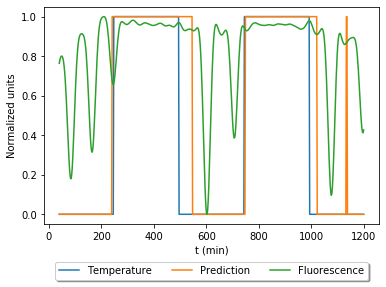

In [386]:
plt.xlabel('t (min)')
plt.ylabel('Normalized units')
plt.plot(np.linspace(40,1200,len(output_data)),np.array([np.ravel(output_data),[predicted_category[i].argmax() for i in range(len(predicted_category))],full_length_norm['D9'][20:-20]]).T)
plt.legend(['Temperature', 'Prediction', 'Fluorescence'],loc='upper center', bbox_to_anchor=(0.5, -0.15),shadow=True, ncol=3)

In [341]:
full_results = []
for _ in range(100):
    temp_input_data, temp_output_data = get_data_2('D5')
    temp_input_data2, temp_output_data = get_data_2('D9')
    temp_model = get_model(10,use_mse=False)
    temp_model.fit(x=temp_input_data,y=keras.utils.to_categorical(temp_output_data, 2),epochs=200)
    full_results.append(np.array([temp_model.evaluate(temp_input_data,keras.utils.to_categorical(output_data, 2)),
                                  temp_model.evaluate(temp_input_data2,keras.utils.to_categorical(output_data, 2))]))

Epoch 1/200
565/565 [==============================] - 0s 175us/step - loss: 0.7054 - accuracy: 0.5487
Epoch 2/200
565/565 [==============================] - 0s 32us/step - loss: 0.6920 - accuracy: 0.4496
Epoch 3/200
565/565 [==============================] - 0s 70us/step - loss: 0.6865 - accuracy: 0.5434
Epoch 4/200
565/565 [==============================] - 0s 75us/step - loss: 0.6809 - accuracy: 0.4602
Epoch 5/200
565/565 [==============================] - 0s 56us/step - loss: 0.6726 - accuracy: 0.5416
Epoch 6/200
565/565 [==============================] - 0s 66us/step - loss: 0.6673 - accuracy: 0.5628
Epoch 7/200
565/565 [==============================] - 0s 80us/step - loss: 0.6615 - accuracy: 0.5947
Epoch 8/200
565/565 [==============================] - 0s 67us/step - loss: 0.6556 - accuracy: 0.5929
Epoch 9/200
565/565 [==============================] - 0s 73us/step - loss: 0.6471 - accuracy: 0.6407
Epoch 10/200
565/565 [==============================] - 0s 83us/step - loss: 0.64

565/565 [==============================] - 0s 74us/step - loss: 0.3871 - accuracy: 0.9062
Epoch 81/200
565/565 [==============================] - 0s 38us/step - loss: 0.3853 - accuracy: 0.8938
Epoch 82/200
565/565 [==============================] - 0s 73us/step - loss: 0.3869 - accuracy: 0.9062
Epoch 83/200
565/565 [==============================] - 0s 64us/step - loss: 0.3829 - accuracy: 0.9009
Epoch 84/200
565/565 [==============================] - 0s 63us/step - loss: 0.3846 - accuracy: 0.9097
Epoch 85/200
565/565 [==============================] - 0s 65us/step - loss: 0.3780 - accuracy: 0.9009
Epoch 86/200
565/565 [==============================] - 0s 72us/step - loss: 0.3770 - accuracy: 0.8956
Epoch 87/200
565/565 [==============================] - 0s 77us/step - loss: 0.3737 - accuracy: 0.8903
Epoch 88/200
565/565 [==============================] - 0s 121us/step - loss: 0.3717 - accuracy: 0.8973
Epoch 89/200
565/565 [==============================] - 0s 56us/step - loss: 0.3701 -

565/565 [==============================] - 0s 35us/step - loss: 0.2859 - accuracy: 0.9168
Epoch 160/200
565/565 [==============================] - 0s 33us/step - loss: 0.2914 - accuracy: 0.9168
Epoch 161/200
565/565 [==============================] - 0s 31us/step - loss: 0.2881 - accuracy: 0.9150
Epoch 162/200
565/565 [==============================] - 0s 32us/step - loss: 0.2839 - accuracy: 0.9115
Epoch 163/200
565/565 [==============================] - 0s 33us/step - loss: 0.2816 - accuracy: 0.9150
Epoch 164/200
565/565 [==============================] - 0s 31us/step - loss: 0.2889 - accuracy: 0.9221
Epoch 165/200
565/565 [==============================] - 0s 30us/step - loss: 0.2864 - accuracy: 0.9115
Epoch 166/200
565/565 [==============================] - 0s 29us/step - loss: 0.2854 - accuracy: 0.9150
Epoch 167/200
565/565 [==============================] - 0s 32us/step - loss: 0.2849 - accuracy: 0.9186
Epoch 168/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 32us/step - loss: 0.5197 - accuracy: 0.8619
Epoch 38/200
565/565 [==============================] - 0s 33us/step - loss: 0.5151 - accuracy: 0.8319
Epoch 39/200
565/565 [==============================] - 0s 33us/step - loss: 0.5116 - accuracy: 0.8584
Epoch 40/200
565/565 [==============================] - 0s 32us/step - loss: 0.5095 - accuracy: 0.8655
Epoch 41/200
565/565 [==============================] - 0s 32us/step - loss: 0.5056 - accuracy: 0.8726
Epoch 42/200
565/565 [==============================] - 0s 32us/step - loss: 0.4987 - accuracy: 0.8726
Epoch 43/200
565/565 [==============================] - 0s 30us/step - loss: 0.4936 - accuracy: 0.8673
Epoch 44/200
565/565 [==============================] - 0s 29us/step - loss: 0.4922 - accuracy: 0.8726
Epoch 45/200
565/565 [==============================] - 0s 31us/step - loss: 0.4876 - accuracy: 0.8796
Epoch 46/200
565/565 [==============================] - 0s 33us/step - loss: 0.4825 - 

565/565 [==============================] - 0s 31us/step - loss: 0.3034 - accuracy: 0.9239
Epoch 117/200
565/565 [==============================] - 0s 30us/step - loss: 0.3004 - accuracy: 0.9044
Epoch 118/200
565/565 [==============================] - 0s 30us/step - loss: 0.3004 - accuracy: 0.9204
Epoch 119/200
565/565 [==============================] - 0s 30us/step - loss: 0.2982 - accuracy: 0.9186
Epoch 120/200
565/565 [==============================] - 0s 32us/step - loss: 0.3005 - accuracy: 0.9150
Epoch 121/200
565/565 [==============================] - 0s 31us/step - loss: 0.2975 - accuracy: 0.9186
Epoch 122/200
565/565 [==============================] - 0s 30us/step - loss: 0.2921 - accuracy: 0.9186
Epoch 123/200
565/565 [==============================] - 0s 30us/step - loss: 0.2970 - accuracy: 0.9115
Epoch 124/200
565/565 [==============================] - 0s 31us/step - loss: 0.2886 - accuracy: 0.9168
Epoch 125/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 31us/step - loss: 0.2575 - accuracy: 0.9221
Epoch 195/200
565/565 [==============================] - 0s 30us/step - loss: 0.2502 - accuracy: 0.9239
Epoch 196/200
565/565 [==============================] - 0s 28us/step - loss: 0.2526 - accuracy: 0.9292
Epoch 197/200
565/565 [==============================] - 0s 29us/step - loss: 0.2488 - accuracy: 0.9239
Epoch 198/200
565/565 [==============================] - 0s 32us/step - loss: 0.2515 - accuracy: 0.9168
Epoch 199/200
565/565 [==============================] - 0s 30us/step - loss: 0.2438 - accuracy: 0.9221
Epoch 200/200
565/565 [==============================] - 0s 16us/step
Epoch 1/200
565/565 [==============================] - 0s 178us/step - loss: 0.7953 - accuracy: 0.5451
Epoch 2/200
565/565 [==============================] - 0s 28us/step - loss: 0.6925 - accuracy: 0.5257
Epoch 3/200
565/565 [==============================] - 0s 29us/step - loss: 0.6841 - accuracy: 0.4761
Epoch 4/200
5

565/565 [==============================] - 0s 29us/step - loss: 0.3967 - accuracy: 0.8850
Epoch 73/200
565/565 [==============================] - 0s 30us/step - loss: 0.3930 - accuracy: 0.8885
Epoch 74/200
565/565 [==============================] - 0s 29us/step - loss: 0.3927 - accuracy: 0.8973
Epoch 75/200
565/565 [==============================] - 0s 29us/step - loss: 0.3850 - accuracy: 0.8903
Epoch 76/200
565/565 [==============================] - 0s 30us/step - loss: 0.3839 - accuracy: 0.8938
Epoch 77/200
565/565 [==============================] - 0s 29us/step - loss: 0.3769 - accuracy: 0.8938
Epoch 78/200
565/565 [==============================] - 0s 29us/step - loss: 0.3805 - accuracy: 0.8850
Epoch 79/200
565/565 [==============================] - 0s 28us/step - loss: 0.3781 - accuracy: 0.8850
Epoch 80/200
565/565 [==============================] - 0s 30us/step - loss: 0.3707 - accuracy: 0.8938
Epoch 81/200
565/565 [==============================] - 0s 31us/step - loss: 0.3666 - 

565/565 [==============================] - 0s 30us/step - loss: 0.2690 - accuracy: 0.9221
Epoch 152/200
565/565 [==============================] - 0s 28us/step - loss: 0.2742 - accuracy: 0.9150
Epoch 153/200
565/565 [==============================] - 0s 28us/step - loss: 0.2696 - accuracy: 0.9115
Epoch 154/200
565/565 [==============================] - 0s 28us/step - loss: 0.2742 - accuracy: 0.9204
Epoch 155/200
565/565 [==============================] - 0s 29us/step - loss: 0.2693 - accuracy: 0.9186
Epoch 156/200
565/565 [==============================] - 0s 29us/step - loss: 0.2721 - accuracy: 0.9097
Epoch 157/200
565/565 [==============================] - 0s 27us/step - loss: 0.2682 - accuracy: 0.9097
Epoch 158/200
565/565 [==============================] - 0s 29us/step - loss: 0.2660 - accuracy: 0.9221
Epoch 159/200
565/565 [==============================] - 0s 29us/step - loss: 0.2689 - accuracy: 0.9168
Epoch 160/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 30us/step - loss: 0.5653 - accuracy: 0.7912
Epoch 29/200
565/565 [==============================] - 0s 29us/step - loss: 0.5661 - accuracy: 0.8000
Epoch 30/200
565/565 [==============================] - 0s 29us/step - loss: 0.5593 - accuracy: 0.8619
Epoch 31/200
565/565 [==============================] - 0s 29us/step - loss: 0.5570 - accuracy: 0.8195
Epoch 32/200
565/565 [==============================] - 0s 29us/step - loss: 0.5519 - accuracy: 0.8301
Epoch 33/200
565/565 [==============================] - 0s 28us/step - loss: 0.5463 - accuracy: 0.8000
Epoch 34/200
565/565 [==============================] - 0s 31us/step - loss: 0.5467 - accuracy: 0.8354
Epoch 35/200
565/565 [==============================] - 0s 30us/step - loss: 0.5441 - accuracy: 0.8159
Epoch 36/200
565/565 [==============================] - 0s 30us/step - loss: 0.5382 - accuracy: 0.8584
Epoch 37/200
565/565 [==============================] - 0s 30us/step - loss: 0.5311 - 

565/565 [==============================] - 0s 35us/step - loss: 0.3373 - accuracy: 0.9044
Epoch 108/200
565/565 [==============================] - 0s 36us/step - loss: 0.3453 - accuracy: 0.9027
Epoch 109/200
565/565 [==============================] - 0s 39us/step - loss: 0.3252 - accuracy: 0.9204
Epoch 110/200
565/565 [==============================] - 0s 30us/step - loss: 0.3350 - accuracy: 0.9080
Epoch 111/200
565/565 [==============================] - 0s 35us/step - loss: 0.3263 - accuracy: 0.9080
Epoch 112/200
565/565 [==============================] - 0s 30us/step - loss: 0.3309 - accuracy: 0.9044
Epoch 113/200
565/565 [==============================] - 0s 31us/step - loss: 0.3298 - accuracy: 0.9044
Epoch 114/200
565/565 [==============================] - 0s 31us/step - loss: 0.3228 - accuracy: 0.9080
Epoch 115/200
565/565 [==============================] - 0s 33us/step - loss: 0.3295 - accuracy: 0.9097
Epoch 116/200
565/565 [==============================] - 0s 32us/step - loss: 

565/565 [==============================] - 0s 37us/step - loss: 0.2709 - accuracy: 0.9204
Epoch 186/200
565/565 [==============================] - 0s 36us/step - loss: 0.2648 - accuracy: 0.9168
Epoch 187/200
565/565 [==============================] - 0s 37us/step - loss: 0.2657 - accuracy: 0.9150
Epoch 188/200
565/565 [==============================] - 0s 38us/step - loss: 0.2686 - accuracy: 0.9080
Epoch 189/200
565/565 [==============================] - 0s 44us/step - loss: 0.2619 - accuracy: 0.9204
Epoch 190/200
565/565 [==============================] - 0s 39us/step - loss: 0.2737 - accuracy: 0.9133
Epoch 191/200
565/565 [==============================] - 0s 34us/step - loss: 0.2665 - accuracy: 0.9221
Epoch 192/200
565/565 [==============================] - 0s 40us/step - loss: 0.2698 - accuracy: 0.9168
Epoch 193/200
565/565 [==============================] - 0s 34us/step - loss: 0.2584 - accuracy: 0.9257
Epoch 194/200
565/565 [==============================] - 0s 37us/step - loss: 

565/565 [==============================] - 0s 31us/step - loss: 0.3949 - accuracy: 0.8903
Epoch 64/200
565/565 [==============================] - 0s 29us/step - loss: 0.3937 - accuracy: 0.8956
Epoch 65/200
565/565 [==============================] - 0s 30us/step - loss: 0.3928 - accuracy: 0.9009
Epoch 66/200
565/565 [==============================] - 0s 31us/step - loss: 0.3852 - accuracy: 0.9044
Epoch 67/200
565/565 [==============================] - 0s 29us/step - loss: 0.3815 - accuracy: 0.8850
Epoch 68/200
565/565 [==============================] - 0s 28us/step - loss: 0.3803 - accuracy: 0.8991
Epoch 69/200
565/565 [==============================] - 0s 30us/step - loss: 0.3779 - accuracy: 0.8867
Epoch 70/200
565/565 [==============================] - 0s 40us/step - loss: 0.3752 - accuracy: 0.8991
Epoch 71/200
565/565 [==============================] - 0s 30us/step - loss: 0.3739 - accuracy: 0.9097
Epoch 72/200
565/565 [==============================] - 0s 29us/step - loss: 0.3732 - 

565/565 [==============================] - 0s 28us/step - loss: 0.2773 - accuracy: 0.9115
Epoch 143/200
565/565 [==============================] - 0s 28us/step - loss: 0.2789 - accuracy: 0.9150
Epoch 144/200
565/565 [==============================] - 0s 28us/step - loss: 0.2759 - accuracy: 0.9168
Epoch 145/200
565/565 [==============================] - 0s 27us/step - loss: 0.2736 - accuracy: 0.9186
Epoch 146/200
565/565 [==============================] - 0s 28us/step - loss: 0.2729 - accuracy: 0.9204
Epoch 147/200
565/565 [==============================] - 0s 28us/step - loss: 0.2754 - accuracy: 0.9097
Epoch 148/200
565/565 [==============================] - 0s 29us/step - loss: 0.2717 - accuracy: 0.9150
Epoch 149/200
565/565 [==============================] - 0s 27us/step - loss: 0.2736 - accuracy: 0.9115
Epoch 150/200
565/565 [==============================] - 0s 28us/step - loss: 0.2746 - accuracy: 0.9186
Epoch 151/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 30us/step - loss: 0.5781 - accuracy: 0.8496
Epoch 20/200
565/565 [==============================] - 0s 31us/step - loss: 0.5748 - accuracy: 0.7965
Epoch 21/200
565/565 [==============================] - 0s 29us/step - loss: 0.5692 - accuracy: 0.8106
Epoch 22/200
565/565 [==============================] - 0s 30us/step - loss: 0.5630 - accuracy: 0.7929
Epoch 23/200
565/565 [==============================] - 0s 30us/step - loss: 0.5632 - accuracy: 0.8265
Epoch 24/200
565/565 [==============================] - 0s 30us/step - loss: 0.5548 - accuracy: 0.8354
Epoch 25/200
565/565 [==============================] - 0s 29us/step - loss: 0.5528 - accuracy: 0.8496
Epoch 26/200
565/565 [==============================] - 0s 32us/step - loss: 0.5497 - accuracy: 0.8124
Epoch 27/200
565/565 [==============================] - 0s 29us/step - loss: 0.5433 - accuracy: 0.8796
Epoch 28/200
565/565 [==============================] - 0s 29us/step - loss: 0.5396 - 

565/565 [==============================] - 0s 27us/step - loss: 0.3602 - accuracy: 0.8867
Epoch 99/200
565/565 [==============================] - 0s 27us/step - loss: 0.3526 - accuracy: 0.8956
Epoch 100/200
565/565 [==============================] - 0s 28us/step - loss: 0.3521 - accuracy: 0.8938
Epoch 101/200
565/565 [==============================] - 0s 28us/step - loss: 0.3515 - accuracy: 0.8991
Epoch 102/200
565/565 [==============================] - 0s 29us/step - loss: 0.3494 - accuracy: 0.8973
Epoch 103/200
565/565 [==============================] - 0s 28us/step - loss: 0.3464 - accuracy: 0.8991
Epoch 104/200
565/565 [==============================] - 0s 28us/step - loss: 0.3424 - accuracy: 0.9115
Epoch 105/200
565/565 [==============================] - 0s 29us/step - loss: 0.3425 - accuracy: 0.8938
Epoch 106/200
565/565 [==============================] - 0s 27us/step - loss: 0.3447 - accuracy: 0.9009
Epoch 107/200
565/565 [==============================] - 0s 28us/step - loss: 0

565/565 [==============================] - 0s 28us/step - loss: 0.2808 - accuracy: 0.9044
Epoch 177/200
565/565 [==============================] - 0s 27us/step - loss: 0.2863 - accuracy: 0.9009
Epoch 178/200
565/565 [==============================] - 0s 28us/step - loss: 0.2795 - accuracy: 0.9097
Epoch 179/200
565/565 [==============================] - 0s 28us/step - loss: 0.2833 - accuracy: 0.9080
Epoch 180/200
565/565 [==============================] - 0s 27us/step - loss: 0.2812 - accuracy: 0.9062
Epoch 181/200
565/565 [==============================] - 0s 27us/step - loss: 0.2817 - accuracy: 0.9080
Epoch 182/200
565/565 [==============================] - 0s 28us/step - loss: 0.2756 - accuracy: 0.9168
Epoch 183/200
565/565 [==============================] - 0s 28us/step - loss: 0.2834 - accuracy: 0.9115
Epoch 184/200
565/565 [==============================] - 0s 28us/step - loss: 0.2819 - accuracy: 0.9115
Epoch 185/200
565/565 [==============================] - 0s 27us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.4751 - accuracy: 0.8531
Epoch 55/200
565/565 [==============================] - 0s 28us/step - loss: 0.4748 - accuracy: 0.8690
Epoch 56/200
565/565 [==============================] - 0s 30us/step - loss: 0.4678 - accuracy: 0.8814
Epoch 57/200
565/565 [==============================] - 0s 28us/step - loss: 0.4684 - accuracy: 0.8407
Epoch 58/200
565/565 [==============================] - 0s 29us/step - loss: 0.4580 - accuracy: 0.8796
Epoch 59/200
565/565 [==============================] - 0s 29us/step - loss: 0.4544 - accuracy: 0.8796
Epoch 60/200
565/565 [==============================] - 0s 29us/step - loss: 0.4519 - accuracy: 0.8673
Epoch 61/200
565/565 [==============================] - 0s 31us/step - loss: 0.4446 - accuracy: 0.8708
Epoch 62/200
565/565 [==============================] - 0s 29us/step - loss: 0.4462 - accuracy: 0.8513
Epoch 63/200
565/565 [==============================] - 0s 29us/step - loss: 0.4446 - 

565/565 [==============================] - 0s 28us/step - loss: 0.3002 - accuracy: 0.9133
Epoch 134/200
565/565 [==============================] - 0s 29us/step - loss: 0.2994 - accuracy: 0.8991
Epoch 135/200
565/565 [==============================] - 0s 30us/step - loss: 0.3042 - accuracy: 0.8991
Epoch 136/200
565/565 [==============================] - 0s 29us/step - loss: 0.2971 - accuracy: 0.8991
Epoch 137/200
565/565 [==============================] - 0s 28us/step - loss: 0.2977 - accuracy: 0.8991
Epoch 138/200
565/565 [==============================] - 0s 29us/step - loss: 0.2962 - accuracy: 0.9044
Epoch 139/200
565/565 [==============================] - 0s 28us/step - loss: 0.2943 - accuracy: 0.9150
Epoch 140/200
565/565 [==============================] - 0s 28us/step - loss: 0.2993 - accuracy: 0.9080
Epoch 141/200
565/565 [==============================] - 0s 29us/step - loss: 0.2958 - accuracy: 0.8991
Epoch 142/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 34us/step - loss: 0.6254 - accuracy: 0.7558
Epoch 12/200
565/565 [==============================] - 0s 45us/step - loss: 0.6160 - accuracy: 0.7274
Epoch 13/200
565/565 [==============================] - 0s 31us/step - loss: 0.6113 - accuracy: 0.7575
Epoch 14/200
565/565 [==============================] - 0s 32us/step - loss: 0.6034 - accuracy: 0.7982
Epoch 15/200
565/565 [==============================] - 0s 32us/step - loss: 0.5992 - accuracy: 0.8053
Epoch 16/200
565/565 [==============================] - 0s 34us/step - loss: 0.5935 - accuracy: 0.7735
Epoch 17/200
565/565 [==============================] - 0s 30us/step - loss: 0.5886 - accuracy: 0.8319
Epoch 18/200
565/565 [==============================] - 0s 30us/step - loss: 0.5838 - accuracy: 0.8584
Epoch 19/200
565/565 [==============================] - 0s 30us/step - loss: 0.5794 - accuracy: 0.7841
Epoch 20/200
565/565 [==============================] - 0s 29us/step - loss: 0.5756 - 

565/565 [==============================] - 0s 31us/step - loss: 0.3808 - accuracy: 0.8885
Epoch 91/200
565/565 [==============================] - 0s 32us/step - loss: 0.3848 - accuracy: 0.8850
Epoch 92/200
565/565 [==============================] - 0s 30us/step - loss: 0.3773 - accuracy: 0.8850
Epoch 93/200
565/565 [==============================] - 0s 29us/step - loss: 0.3820 - accuracy: 0.8832
Epoch 94/200
565/565 [==============================] - 0s 29us/step - loss: 0.3766 - accuracy: 0.8903
Epoch 95/200
565/565 [==============================] - 0s 31us/step - loss: 0.3727 - accuracy: 0.8920
Epoch 96/200
565/565 [==============================] - 0s 28us/step - loss: 0.3764 - accuracy: 0.8885
Epoch 97/200
565/565 [==============================] - 0s 30us/step - loss: 0.3697 - accuracy: 0.8938
Epoch 98/200
565/565 [==============================] - 0s 27us/step - loss: 0.3687 - accuracy: 0.8956
Epoch 99/200
565/565 [==============================] - 0s 29us/step - loss: 0.3670 - 

Epoch 169/200
565/565 [==============================] - 0s 29us/step - loss: 0.2934 - accuracy: 0.9097
Epoch 170/200
565/565 [==============================] - 0s 30us/step - loss: 0.2931 - accuracy: 0.8903
Epoch 171/200
565/565 [==============================] - 0s 32us/step - loss: 0.2929 - accuracy: 0.9044
Epoch 172/200
565/565 [==============================] - 0s 35us/step - loss: 0.2949 - accuracy: 0.9115
Epoch 173/200
565/565 [==============================] - 0s 29us/step - loss: 0.2942 - accuracy: 0.8832
Epoch 174/200
565/565 [==============================] - 0s 30us/step - loss: 0.2909 - accuracy: 0.9062
Epoch 175/200
565/565 [==============================] - 0s 29us/step - loss: 0.2874 - accuracy: 0.8973
Epoch 176/200
565/565 [==============================] - 0s 29us/step - loss: 0.2941 - accuracy: 0.9044
Epoch 177/200
565/565 [==============================] - 0s 30us/step - loss: 0.2890 - accuracy: 0.9044
Epoch 178/200
565/565 [==============================] - 0s 28us

565/565 [==============================] - 0s 30us/step - loss: 0.4934 - accuracy: 0.8814
Epoch 48/200
565/565 [==============================] - 0s 32us/step - loss: 0.4905 - accuracy: 0.8425
Epoch 49/200
565/565 [==============================] - 0s 29us/step - loss: 0.4849 - accuracy: 0.8726
Epoch 50/200
565/565 [==============================] - 0s 30us/step - loss: 0.4831 - accuracy: 0.8761
Epoch 51/200
565/565 [==============================] - 0s 30us/step - loss: 0.4786 - accuracy: 0.8761
Epoch 52/200
565/565 [==============================] - 0s 29us/step - loss: 0.4711 - accuracy: 0.8832
Epoch 53/200
565/565 [==============================] - 0s 32us/step - loss: 0.4669 - accuracy: 0.8761
Epoch 54/200
565/565 [==============================] - 0s 30us/step - loss: 0.4667 - accuracy: 0.8761
Epoch 55/200
565/565 [==============================] - 0s 30us/step - loss: 0.4586 - accuracy: 0.8832
Epoch 56/200
565/565 [==============================] - 0s 29us/step - loss: 0.4564 - 

565/565 [==============================] - 0s 31us/step - loss: 0.3071 - accuracy: 0.9027
Epoch 127/200
565/565 [==============================] - 0s 31us/step - loss: 0.3093 - accuracy: 0.9044
Epoch 128/200
565/565 [==============================] - 0s 32us/step - loss: 0.3051 - accuracy: 0.9115
Epoch 129/200
565/565 [==============================] - 0s 29us/step - loss: 0.3016 - accuracy: 0.9150
Epoch 130/200
565/565 [==============================] - 0s 28us/step - loss: 0.3010 - accuracy: 0.9150
Epoch 131/200
565/565 [==============================] - 0s 30us/step - loss: 0.3048 - accuracy: 0.8973
Epoch 132/200
565/565 [==============================] - 0s 35us/step - loss: 0.3053 - accuracy: 0.9097
Epoch 133/200
565/565 [==============================] - 0s 31us/step - loss: 0.2966 - accuracy: 0.9097
Epoch 134/200
565/565 [==============================] - 0s 31us/step - loss: 0.2956 - accuracy: 0.9133
Epoch 135/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 33us/step - loss: 0.7009 - accuracy: 0.4956
Epoch 4/200
565/565 [==============================] - 0s 31us/step - loss: 0.6922 - accuracy: 0.5044
Epoch 5/200
565/565 [==============================] - 0s 28us/step - loss: 0.6854 - accuracy: 0.5274
Epoch 6/200
565/565 [==============================] - 0s 28us/step - loss: 0.6753 - accuracy: 0.5628
Epoch 7/200
565/565 [==============================] - 0s 27us/step - loss: 0.6680 - accuracy: 0.5752
Epoch 8/200
565/565 [==============================] - 0s 27us/step - loss: 0.6595 - accuracy: 0.6018
Epoch 9/200
565/565 [==============================] - 0s 28us/step - loss: 0.6545 - accuracy: 0.6018
Epoch 10/200
565/565 [==============================] - 0s 28us/step - loss: 0.6458 - accuracy: 0.6354
Epoch 11/200
565/565 [==============================] - 0s 29us/step - loss: 0.6404 - accuracy: 0.6177
Epoch 12/200
565/565 [==============================] - 0s 30us/step - loss: 0.6395 - accura

565/565 [==============================] - 0s 52us/step - loss: 0.3965 - accuracy: 0.8973
Epoch 83/200
565/565 [==============================] - 0s 34us/step - loss: 0.3859 - accuracy: 0.8885
Epoch 84/200
565/565 [==============================] - 0s 28us/step - loss: 0.3835 - accuracy: 0.8991
Epoch 85/200
565/565 [==============================] - 0s 27us/step - loss: 0.3818 - accuracy: 0.8956
Epoch 86/200
565/565 [==============================] - 0s 28us/step - loss: 0.3837 - accuracy: 0.8850
Epoch 87/200
565/565 [==============================] - 0s 28us/step - loss: 0.3783 - accuracy: 0.8956
Epoch 88/200
565/565 [==============================] - 0s 27us/step - loss: 0.3785 - accuracy: 0.9009
Epoch 89/200
565/565 [==============================] - 0s 29us/step - loss: 0.3724 - accuracy: 0.9097
Epoch 90/200
565/565 [==============================] - 0s 30us/step - loss: 0.3719 - accuracy: 0.8973
Epoch 91/200
565/565 [==============================] - 0s 26us/step - loss: 0.3663 - 

565/565 [==============================] - 0s 90us/step - loss: 0.2909 - accuracy: 0.9044
Epoch 161/200
565/565 [==============================] - 0s 75us/step - loss: 0.2925 - accuracy: 0.9044
Epoch 162/200
565/565 [==============================] - 0s 54us/step - loss: 0.2838 - accuracy: 0.9168
Epoch 163/200
565/565 [==============================] - 0s 43us/step - loss: 0.2894 - accuracy: 0.9080
Epoch 164/200
565/565 [==============================] - 0s 56us/step - loss: 0.2868 - accuracy: 0.9133
Epoch 165/200
565/565 [==============================] - 0s 60us/step - loss: 0.2872 - accuracy: 0.9080
Epoch 166/200
565/565 [==============================] - 0s 46us/step - loss: 0.2821 - accuracy: 0.9062
Epoch 167/200
565/565 [==============================] - 0s 59us/step - loss: 0.2813 - accuracy: 0.9097
Epoch 168/200
565/565 [==============================] - 0s 68us/step - loss: 0.2863 - accuracy: 0.9027
Epoch 169/200
565/565 [==============================] - 0s 64us/step - loss: 

565/565 [==============================] - 0s 49us/step - loss: 0.4463 - accuracy: 0.8903
Epoch 39/200
565/565 [==============================] - 0s 51us/step - loss: 0.4395 - accuracy: 0.8832
Epoch 40/200
565/565 [==============================] - 0s 49us/step - loss: 0.4373 - accuracy: 0.8903
Epoch 41/200
565/565 [==============================] - 0s 65us/step - loss: 0.4334 - accuracy: 0.8956
Epoch 42/200
565/565 [==============================] - 0s 48us/step - loss: 0.4298 - accuracy: 0.8903
Epoch 43/200
565/565 [==============================] - 0s 56us/step - loss: 0.4240 - accuracy: 0.8920
Epoch 44/200
565/565 [==============================] - 0s 81us/step - loss: 0.4213 - accuracy: 0.8956
Epoch 45/200
565/565 [==============================] - 0s 36us/step - loss: 0.4138 - accuracy: 0.8850
Epoch 46/200
565/565 [==============================] - 0s 50us/step - loss: 0.4146 - accuracy: 0.8973
Epoch 47/200
565/565 [==============================] - 0s 38us/step - loss: 0.4124 - 

565/565 [==============================] - 0s 58us/step - loss: 0.2836 - accuracy: 0.9133
Epoch 118/200
565/565 [==============================] - 0s 57us/step - loss: 0.2776 - accuracy: 0.9150
Epoch 119/200
565/565 [==============================] - 0s 67us/step - loss: 0.2829 - accuracy: 0.9044
Epoch 120/200
565/565 [==============================] - 0s 41us/step - loss: 0.2797 - accuracy: 0.9186
Epoch 121/200
565/565 [==============================] - 0s 49us/step - loss: 0.2764 - accuracy: 0.9274
Epoch 122/200
565/565 [==============================] - 0s 49us/step - loss: 0.2771 - accuracy: 0.9168
Epoch 123/200
565/565 [==============================] - 0s 43us/step - loss: 0.2786 - accuracy: 0.9115
Epoch 124/200
565/565 [==============================] - 0s 46us/step - loss: 0.2747 - accuracy: 0.9133
Epoch 125/200
565/565 [==============================] - 0s 48us/step - loss: 0.2776 - accuracy: 0.9221
Epoch 126/200
565/565 [==============================] - 0s 46us/step - loss: 

565/565 [==============================] - 0s 61us/step - loss: 0.2460 - accuracy: 0.9239
Epoch 196/200
565/565 [==============================] - 0s 66us/step - loss: 0.2491 - accuracy: 0.9239
Epoch 197/200
565/565 [==============================] - 0s 55us/step - loss: 0.2391 - accuracy: 0.9257
Epoch 198/200
565/565 [==============================] - 0s 56us/step - loss: 0.2525 - accuracy: 0.9186
Epoch 199/200
565/565 [==============================] - 0s 43us/step - loss: 0.2452 - accuracy: 0.9150
Epoch 200/200
565/565 [==============================] - 0s 45us/step
Epoch 1/200
565/565 [==============================] - 0s 185us/step - loss: 0.7065 - accuracy: 0.4496
Epoch 2/200
565/565 [==============================] - 0s 54us/step - loss: 0.6948 - accuracy: 0.4478
Epoch 3/200
565/565 [==============================] - 0s 55us/step - loss: 0.6841 - accuracy: 0.5257
Epoch 4/200
565/565 [==============================] - 0s 52us/step - loss: 0.6755 - accuracy: 0.5469
Epoch 5/200
565

565/565 [==============================] - 0s 41us/step - loss: 0.3972 - accuracy: 0.9027
Epoch 74/200
565/565 [==============================] - 0s 64us/step - loss: 0.3948 - accuracy: 0.9027
Epoch 75/200
565/565 [==============================] - 0s 61us/step - loss: 0.3932 - accuracy: 0.8920
Epoch 76/200
565/565 [==============================] - 0s 42us/step - loss: 0.3922 - accuracy: 0.9027
Epoch 77/200
565/565 [==============================] - 0s 47us/step - loss: 0.3894 - accuracy: 0.8956
Epoch 78/200
565/565 [==============================] - 0s 41us/step - loss: 0.3840 - accuracy: 0.8973
Epoch 79/200
565/565 [==============================] - 0s 58us/step - loss: 0.3843 - accuracy: 0.8903
Epoch 80/200
565/565 [==============================] - 0s 52us/step - loss: 0.3816 - accuracy: 0.8920
Epoch 81/200
565/565 [==============================] - 0s 44us/step - loss: 0.3820 - accuracy: 0.8973
Epoch 82/200
565/565 [==============================] - 0s 44us/step - loss: 0.3772 - 

565/565 [==============================] - 0s 51us/step - loss: 0.2896 - accuracy: 0.9097
Epoch 153/200
565/565 [==============================] - 0s 52us/step - loss: 0.2867 - accuracy: 0.9186
Epoch 154/200
565/565 [==============================] - 0s 61us/step - loss: 0.2906 - accuracy: 0.9027
Epoch 155/200
565/565 [==============================] - 0s 66us/step - loss: 0.2865 - accuracy: 0.9080
Epoch 156/200
565/565 [==============================] - 0s 48us/step - loss: 0.2869 - accuracy: 0.9115
Epoch 157/200
565/565 [==============================] - 0s 50us/step - loss: 0.2845 - accuracy: 0.9097
Epoch 158/200
565/565 [==============================] - 0s 45us/step - loss: 0.2847 - accuracy: 0.9027
Epoch 159/200
565/565 [==============================] - 0s 56us/step - loss: 0.2815 - accuracy: 0.9097
Epoch 160/200
565/565 [==============================] - 0s 62us/step - loss: 0.2879 - accuracy: 0.9062
Epoch 161/200
565/565 [==============================] - 0s 45us/step - loss: 

565/565 [==============================] - 0s 91us/step - loss: 0.5166 - accuracy: 0.8867
Epoch 31/200
565/565 [==============================] - 0s 79us/step - loss: 0.5085 - accuracy: 0.8956
Epoch 32/200
565/565 [==============================] - 0s 53us/step - loss: 0.5035 - accuracy: 0.8938
Epoch 33/200
565/565 [==============================] - 0s 92us/step - loss: 0.4980 - accuracy: 0.9044
Epoch 34/200
565/565 [==============================] - 0s 55us/step - loss: 0.4918 - accuracy: 0.8938
Epoch 35/200
565/565 [==============================] - 0s 43us/step - loss: 0.4876 - accuracy: 0.8903
Epoch 36/200
565/565 [==============================] - 0s 52us/step - loss: 0.4824 - accuracy: 0.8938
Epoch 37/200
565/565 [==============================] - 0s 35us/step - loss: 0.4754 - accuracy: 0.9009
Epoch 38/200
565/565 [==============================] - 0s 35us/step - loss: 0.4715 - accuracy: 0.9027
Epoch 39/200
565/565 [==============================] - 0s 30us/step - loss: 0.4659 - 

565/565 [==============================] - 0s 31us/step - loss: 0.2794 - accuracy: 0.9204
Epoch 110/200
565/565 [==============================] - 0s 29us/step - loss: 0.2741 - accuracy: 0.9239
Epoch 111/200
565/565 [==============================] - 0s 28us/step - loss: 0.2746 - accuracy: 0.9221
Epoch 112/200
565/565 [==============================] - 0s 34us/step - loss: 0.2700 - accuracy: 0.9186
Epoch 113/200
565/565 [==============================] - 0s 33us/step - loss: 0.2685 - accuracy: 0.9186
Epoch 114/200
565/565 [==============================] - 0s 28us/step - loss: 0.2724 - accuracy: 0.9239
Epoch 115/200
565/565 [==============================] - 0s 41us/step - loss: 0.2700 - accuracy: 0.9221
Epoch 116/200
565/565 [==============================] - 0s 35us/step - loss: 0.2703 - accuracy: 0.9239
Epoch 117/200
565/565 [==============================] - 0s 33us/step - loss: 0.2667 - accuracy: 0.9186
Epoch 118/200
565/565 [==============================] - 0s 33us/step - loss: 

565/565 [==============================] - 0s 31us/step - loss: 0.2359 - accuracy: 0.9310
Epoch 188/200
565/565 [==============================] - 0s 29us/step - loss: 0.2364 - accuracy: 0.9274
Epoch 189/200
565/565 [==============================] - 0s 36us/step - loss: 0.2390 - accuracy: 0.9274
Epoch 190/200
565/565 [==============================] - 0s 30us/step - loss: 0.2331 - accuracy: 0.9257
Epoch 191/200
565/565 [==============================] - 0s 31us/step - loss: 0.2333 - accuracy: 0.9274
Epoch 192/200
565/565 [==============================] - 0s 36us/step - loss: 0.2376 - accuracy: 0.9292
Epoch 193/200
565/565 [==============================] - 0s 29us/step - loss: 0.2324 - accuracy: 0.9257
Epoch 194/200
565/565 [==============================] - 0s 33us/step - loss: 0.2337 - accuracy: 0.9257
Epoch 195/200
565/565 [==============================] - 0s 30us/step - loss: 0.2387 - accuracy: 0.9257
Epoch 196/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 30us/step - loss: 0.4402 - accuracy: 0.8726
Epoch 66/200
565/565 [==============================] - 0s 40us/step - loss: 0.4362 - accuracy: 0.8743
Epoch 67/200
565/565 [==============================] - 0s 31us/step - loss: 0.4304 - accuracy: 0.8602
Epoch 68/200
565/565 [==============================] - 0s 36us/step - loss: 0.4318 - accuracy: 0.8743
Epoch 69/200
565/565 [==============================] - 0s 34us/step - loss: 0.4282 - accuracy: 0.8832
Epoch 70/200
565/565 [==============================] - 0s 31us/step - loss: 0.4255 - accuracy: 0.8850
Epoch 71/200
565/565 [==============================] - 0s 38us/step - loss: 0.4224 - accuracy: 0.8973
Epoch 72/200
565/565 [==============================] - 0s 33us/step - loss: 0.4201 - accuracy: 0.8938
Epoch 73/200
565/565 [==============================] - 0s 38us/step - loss: 0.4184 - accuracy: 0.8903
Epoch 74/200
565/565 [==============================] - 0s 32us/step - loss: 0.4174 - 

565/565 [==============================] - 0s 42us/step - loss: 0.3172 - accuracy: 0.9009
Epoch 145/200
565/565 [==============================] - 0s 31us/step - loss: 0.3189 - accuracy: 0.8991
Epoch 146/200
565/565 [==============================] - 0s 35us/step - loss: 0.3191 - accuracy: 0.8991
Epoch 147/200
565/565 [==============================] - 0s 34us/step - loss: 0.3189 - accuracy: 0.8973
Epoch 148/200
565/565 [==============================] - 0s 28us/step - loss: 0.3079 - accuracy: 0.9080
Epoch 149/200
565/565 [==============================] - 0s 31us/step - loss: 0.3174 - accuracy: 0.9027
Epoch 150/200
565/565 [==============================] - 0s 28us/step - loss: 0.3018 - accuracy: 0.9027
Epoch 151/200
565/565 [==============================] - 0s 28us/step - loss: 0.3157 - accuracy: 0.8885
Epoch 152/200
565/565 [==============================] - 0s 30us/step - loss: 0.3069 - accuracy: 0.9009
Epoch 153/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 30us/step - loss: 0.5891 - accuracy: 0.7611
Epoch 23/200
565/565 [==============================] - 0s 32us/step - loss: 0.5878 - accuracy: 0.7717
Epoch 24/200
565/565 [==============================] - 0s 31us/step - loss: 0.5807 - accuracy: 0.7823
Epoch 25/200
565/565 [==============================] - 0s 41us/step - loss: 0.5781 - accuracy: 0.8177
Epoch 26/200
565/565 [==============================] - 0s 32us/step - loss: 0.5740 - accuracy: 0.7912
Epoch 27/200
565/565 [==============================] - 0s 38us/step - loss: 0.5681 - accuracy: 0.7929
Epoch 28/200
565/565 [==============================] - 0s 34us/step - loss: 0.5645 - accuracy: 0.8035
Epoch 29/200
565/565 [==============================] - 0s 30us/step - loss: 0.5670 - accuracy: 0.7717
Epoch 30/200
565/565 [==============================] - 0s 37us/step - loss: 0.5575 - accuracy: 0.8354
Epoch 31/200
565/565 [==============================] - 0s 31us/step - loss: 0.5535 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3317 - accuracy: 0.9009
Epoch 102/200
565/565 [==============================] - 0s 33us/step - loss: 0.3264 - accuracy: 0.9097
Epoch 103/200
565/565 [==============================] - 0s 30us/step - loss: 0.3321 - accuracy: 0.9062
Epoch 104/200
565/565 [==============================] - 0s 30us/step - loss: 0.3253 - accuracy: 0.9150
Epoch 105/200
565/565 [==============================] - 0s 30us/step - loss: 0.3352 - accuracy: 0.9027
Epoch 106/200
565/565 [==============================] - 0s 30us/step - loss: 0.3138 - accuracy: 0.9097
Epoch 107/200
565/565 [==============================] - 0s 32us/step - loss: 0.3250 - accuracy: 0.9027
Epoch 108/200
565/565 [==============================] - 0s 30us/step - loss: 0.3297 - accuracy: 0.9044
Epoch 109/200
565/565 [==============================] - 0s 29us/step - loss: 0.3222 - accuracy: 0.9027
Epoch 110/200
565/565 [==============================] - 0s 38us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.2734 - accuracy: 0.9115
Epoch 180/200
565/565 [==============================] - 0s 41us/step - loss: 0.2589 - accuracy: 0.9239
Epoch 181/200
565/565 [==============================] - 0s 33us/step - loss: 0.2651 - accuracy: 0.9097
Epoch 182/200
565/565 [==============================] - 0s 29us/step - loss: 0.2741 - accuracy: 0.9080
Epoch 183/200
565/565 [==============================] - 0s 32us/step - loss: 0.2631 - accuracy: 0.9168
Epoch 184/200
565/565 [==============================] - 0s 32us/step - loss: 0.2763 - accuracy: 0.9062
Epoch 185/200
565/565 [==============================] - 0s 39us/step - loss: 0.2732 - accuracy: 0.9115
Epoch 186/200
565/565 [==============================] - 0s 29us/step - loss: 0.2637 - accuracy: 0.9204
Epoch 187/200
565/565 [==============================] - 0s 38us/step - loss: 0.2654 - accuracy: 0.9257
Epoch 188/200
565/565 [==============================] - 0s 33us/step - loss: 

565/565 [==============================] - 0s 31us/step - loss: 0.4547 - accuracy: 0.8708
Epoch 58/200
565/565 [==============================] - 0s 29us/step - loss: 0.4541 - accuracy: 0.8938
Epoch 59/200
565/565 [==============================] - 0s 30us/step - loss: 0.4526 - accuracy: 0.8814
Epoch 60/200
565/565 [==============================] - 0s 34us/step - loss: 0.4479 - accuracy: 0.8920
Epoch 61/200
565/565 [==============================] - 0s 29us/step - loss: 0.4465 - accuracy: 0.8956
Epoch 62/200
565/565 [==============================] - 0s 30us/step - loss: 0.4442 - accuracy: 0.8832
Epoch 63/200
565/565 [==============================] - 0s 31us/step - loss: 0.4433 - accuracy: 0.8885
Epoch 64/200
565/565 [==============================] - 0s 29us/step - loss: 0.4347 - accuracy: 0.8938
Epoch 65/200
565/565 [==============================] - 0s 38us/step - loss: 0.4375 - accuracy: 0.8761
Epoch 66/200
565/565 [==============================] - 0s 32us/step - loss: 0.4376 - 

565/565 [==============================] - 0s 34us/step - loss: 0.3179 - accuracy: 0.9115
Epoch 137/200
565/565 [==============================] - 0s 27us/step - loss: 0.3133 - accuracy: 0.9044
Epoch 138/200
565/565 [==============================] - 0s 34us/step - loss: 0.3147 - accuracy: 0.9186
Epoch 139/200
565/565 [==============================] - 0s 30us/step - loss: 0.3179 - accuracy: 0.9062
Epoch 140/200
565/565 [==============================] - 0s 32us/step - loss: 0.3162 - accuracy: 0.9097
Epoch 141/200
565/565 [==============================] - 0s 34us/step - loss: 0.3118 - accuracy: 0.9080
Epoch 142/200
565/565 [==============================] - 0s 28us/step - loss: 0.3112 - accuracy: 0.9168
Epoch 143/200
565/565 [==============================] - 0s 37us/step - loss: 0.3138 - accuracy: 0.9062
Epoch 144/200
565/565 [==============================] - 0s 31us/step - loss: 0.3103 - accuracy: 0.9097
Epoch 145/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.5835 - accuracy: 0.7239
Epoch 15/200
565/565 [==============================] - 0s 30us/step - loss: 0.5807 - accuracy: 0.8177
Epoch 16/200
565/565 [==============================] - 0s 34us/step - loss: 0.5774 - accuracy: 0.8265
Epoch 17/200
565/565 [==============================] - 0s 28us/step - loss: 0.5694 - accuracy: 0.7788
Epoch 18/200
565/565 [==============================] - 0s 36us/step - loss: 0.5652 - accuracy: 0.8018
Epoch 19/200
565/565 [==============================] - 0s 31us/step - loss: 0.5623 - accuracy: 0.8425
Epoch 20/200
565/565 [==============================] - 0s 29us/step - loss: 0.5576 - accuracy: 0.8372
Epoch 21/200
565/565 [==============================] - 0s 33us/step - loss: 0.5539 - accuracy: 0.8531
Epoch 22/200
565/565 [==============================] - 0s 29us/step - loss: 0.5485 - accuracy: 0.8496
Epoch 23/200
565/565 [==============================] - 0s 31us/step - loss: 0.5432 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3185 - accuracy: 0.9133
Epoch 94/200
565/565 [==============================] - 0s 41us/step - loss: 0.3223 - accuracy: 0.9150
Epoch 95/200
565/565 [==============================] - 0s 30us/step - loss: 0.3190 - accuracy: 0.9133
Epoch 96/200
565/565 [==============================] - 0s 34us/step - loss: 0.3164 - accuracy: 0.9080
Epoch 97/200
565/565 [==============================] - 0s 38us/step - loss: 0.3082 - accuracy: 0.9027
Epoch 98/200
565/565 [==============================] - 0s 30us/step - loss: 0.3186 - accuracy: 0.9097
Epoch 99/200
565/565 [==============================] - 0s 36us/step - loss: 0.3103 - accuracy: 0.9168
Epoch 100/200
565/565 [==============================] - 0s 29us/step - loss: 0.3055 - accuracy: 0.9115
Epoch 101/200
565/565 [==============================] - 0s 38us/step - loss: 0.3104 - accuracy: 0.9115
Epoch 102/200
565/565 [==============================] - 0s 33us/step - loss: 0.3077

Epoch 172/200
565/565 [==============================] - 0s 30us/step - loss: 0.2543 - accuracy: 0.9239
Epoch 173/200
565/565 [==============================] - 0s 32us/step - loss: 0.2565 - accuracy: 0.9221
Epoch 174/200
565/565 [==============================] - 0s 30us/step - loss: 0.2512 - accuracy: 0.9257
Epoch 175/200
565/565 [==============================] - 0s 30us/step - loss: 0.2597 - accuracy: 0.9186
Epoch 176/200
565/565 [==============================] - 0s 28us/step - loss: 0.2544 - accuracy: 0.9257
Epoch 177/200
565/565 [==============================] - 0s 29us/step - loss: 0.2535 - accuracy: 0.9292
Epoch 178/200
565/565 [==============================] - 0s 29us/step - loss: 0.2494 - accuracy: 0.9239
Epoch 179/200
565/565 [==============================] - 0s 30us/step - loss: 0.2511 - accuracy: 0.9239
Epoch 180/200
565/565 [==============================] - 0s 30us/step - loss: 0.2514 - accuracy: 0.9221
Epoch 181/200
565/565 [==============================] - 0s 29us

565/565 [==============================] - 0s 30us/step - loss: 0.4220 - accuracy: 0.8832
Epoch 51/200
565/565 [==============================] - 0s 30us/step - loss: 0.4199 - accuracy: 0.8850
Epoch 52/200
565/565 [==============================] - 0s 29us/step - loss: 0.4165 - accuracy: 0.8708
Epoch 53/200
565/565 [==============================] - 0s 30us/step - loss: 0.4122 - accuracy: 0.8903
Epoch 54/200
565/565 [==============================] - 0s 30us/step - loss: 0.4101 - accuracy: 0.8690
Epoch 55/200
565/565 [==============================] - 0s 31us/step - loss: 0.4070 - accuracy: 0.8867
Epoch 56/200
565/565 [==============================] - 0s 30us/step - loss: 0.4047 - accuracy: 0.8867
Epoch 57/200
565/565 [==============================] - 0s 29us/step - loss: 0.4035 - accuracy: 0.8867
Epoch 58/200
565/565 [==============================] - 0s 29us/step - loss: 0.4004 - accuracy: 0.8814
Epoch 59/200
565/565 [==============================] - 0s 29us/step - loss: 0.3979 - 

Epoch 129/200
565/565 [==============================] - 0s 33us/step - loss: 0.2892 - accuracy: 0.9062
Epoch 130/200
565/565 [==============================] - 0s 28us/step - loss: 0.2878 - accuracy: 0.8973
Epoch 131/200
565/565 [==============================] - 0s 29us/step - loss: 0.2863 - accuracy: 0.9097
Epoch 132/200
565/565 [==============================] - 0s 30us/step - loss: 0.2861 - accuracy: 0.9027
Epoch 133/200
565/565 [==============================] - 0s 30us/step - loss: 0.2847 - accuracy: 0.9115
Epoch 134/200
565/565 [==============================] - 0s 28us/step - loss: 0.2834 - accuracy: 0.9097
Epoch 135/200
565/565 [==============================] - 0s 29us/step - loss: 0.2853 - accuracy: 0.9097
Epoch 136/200
565/565 [==============================] - 0s 31us/step - loss: 0.2810 - accuracy: 0.9168
Epoch 137/200
565/565 [==============================] - 0s 30us/step - loss: 0.2838 - accuracy: 0.9115
Epoch 138/200
565/565 [==============================] - 0s 32us

565/565 [==============================] - 0s 29us/step - loss: 0.6486 - accuracy: 0.6460
Epoch 7/200
565/565 [==============================] - 0s 31us/step - loss: 0.6464 - accuracy: 0.6655
Epoch 8/200
565/565 [==============================] - 0s 29us/step - loss: 0.6386 - accuracy: 0.6496
Epoch 9/200
565/565 [==============================] - 0s 30us/step - loss: 0.6338 - accuracy: 0.6796
Epoch 10/200
565/565 [==============================] - 0s 30us/step - loss: 0.6271 - accuracy: 0.7115
Epoch 11/200
565/565 [==============================] - 0s 30us/step - loss: 0.6247 - accuracy: 0.6549
Epoch 12/200
565/565 [==============================] - 0s 30us/step - loss: 0.6214 - accuracy: 0.7080
Epoch 13/200
565/565 [==============================] - 0s 33us/step - loss: 0.6200 - accuracy: 0.7611
Epoch 14/200
565/565 [==============================] - 0s 33us/step - loss: 0.6094 - accuracy: 0.7115
Epoch 15/200
565/565 [==============================] - 0s 32us/step - loss: 0.6111 - acc

565/565 [==============================] - 0s 30us/step - loss: 0.3797 - accuracy: 0.8938
Epoch 86/200
565/565 [==============================] - 0s 30us/step - loss: 0.3769 - accuracy: 0.8867
Epoch 87/200
565/565 [==============================] - 0s 30us/step - loss: 0.3747 - accuracy: 0.8850
Epoch 88/200
565/565 [==============================] - 0s 30us/step - loss: 0.3756 - accuracy: 0.8903
Epoch 89/200
565/565 [==============================] - 0s 31us/step - loss: 0.3693 - accuracy: 0.8903
Epoch 90/200
565/565 [==============================] - 0s 30us/step - loss: 0.3675 - accuracy: 0.9080
Epoch 91/200
565/565 [==============================] - 0s 31us/step - loss: 0.3617 - accuracy: 0.9080
Epoch 92/200
565/565 [==============================] - 0s 30us/step - loss: 0.3646 - accuracy: 0.9027
Epoch 93/200
565/565 [==============================] - 0s 31us/step - loss: 0.3676 - accuracy: 0.9027
Epoch 94/200
565/565 [==============================] - 0s 30us/step - loss: 0.3565 - 

565/565 [==============================] - 0s 32us/step - loss: 0.2772 - accuracy: 0.9115
Epoch 165/200
565/565 [==============================] - 0s 32us/step - loss: 0.2768 - accuracy: 0.9186
Epoch 166/200
565/565 [==============================] - 0s 31us/step - loss: 0.2807 - accuracy: 0.9186
Epoch 167/200
565/565 [==============================] - 0s 31us/step - loss: 0.2732 - accuracy: 0.9239
Epoch 168/200
565/565 [==============================] - 0s 30us/step - loss: 0.2740 - accuracy: 0.9186
Epoch 169/200
565/565 [==============================] - 0s 30us/step - loss: 0.2786 - accuracy: 0.9168
Epoch 170/200
565/565 [==============================] - 0s 30us/step - loss: 0.2723 - accuracy: 0.9239
Epoch 171/200
565/565 [==============================] - 0s 30us/step - loss: 0.2812 - accuracy: 0.9168
Epoch 172/200
565/565 [==============================] - 0s 31us/step - loss: 0.2713 - accuracy: 0.9204
Epoch 173/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 30us/step - loss: 0.4805 - accuracy: 0.8726
Epoch 43/200
565/565 [==============================] - 0s 32us/step - loss: 0.4751 - accuracy: 0.8726
Epoch 44/200
565/565 [==============================] - 0s 29us/step - loss: 0.4765 - accuracy: 0.8549
Epoch 45/200
565/565 [==============================] - 0s 30us/step - loss: 0.4740 - accuracy: 0.8743
Epoch 46/200
565/565 [==============================] - 0s 29us/step - loss: 0.4680 - accuracy: 0.8743
Epoch 47/200
565/565 [==============================] - 0s 31us/step - loss: 0.4685 - accuracy: 0.8796
Epoch 48/200
565/565 [==============================] - 0s 30us/step - loss: 0.4631 - accuracy: 0.8832
Epoch 49/200
565/565 [==============================] - 0s 30us/step - loss: 0.4596 - accuracy: 0.8743
Epoch 50/200
565/565 [==============================] - 0s 30us/step - loss: 0.4563 - accuracy: 0.8637
Epoch 51/200
565/565 [==============================] - 0s 31us/step - loss: 0.4545 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3344 - accuracy: 0.8991
Epoch 122/200
565/565 [==============================] - 0s 28us/step - loss: 0.3268 - accuracy: 0.8920
Epoch 123/200
565/565 [==============================] - 0s 30us/step - loss: 0.3256 - accuracy: 0.9062
Epoch 124/200
565/565 [==============================] - 0s 29us/step - loss: 0.3291 - accuracy: 0.8867
Epoch 125/200
565/565 [==============================] - 0s 31us/step - loss: 0.3224 - accuracy: 0.9044
Epoch 126/200
565/565 [==============================] - 0s 30us/step - loss: 0.3226 - accuracy: 0.9009
Epoch 127/200
565/565 [==============================] - 0s 30us/step - loss: 0.3229 - accuracy: 0.8867
Epoch 128/200
565/565 [==============================] - 0s 29us/step - loss: 0.3205 - accuracy: 0.8956
Epoch 129/200
565/565 [==============================] - 0s 30us/step - loss: 0.3197 - accuracy: 0.8938
Epoch 130/200
565/565 [==============================] - 0s 31us/step - loss: 

565/565 [==============================] - 0s 30us/step - loss: 0.2782 - accuracy: 0.8991
Epoch 200/200
565/565 [==============================] - 0s 14us/step
Epoch 1/200
565/565 [==============================] - 0s 174us/step - loss: 0.6917 - accuracy: 0.5204
Epoch 2/200
565/565 [==============================] - 0s 30us/step - loss: 0.6802 - accuracy: 0.5558
Epoch 3/200
565/565 [==============================] - 0s 28us/step - loss: 0.6754 - accuracy: 0.5805
Epoch 4/200
565/565 [==============================] - 0s 28us/step - loss: 0.6698 - accuracy: 0.5894
Epoch 5/200
565/565 [==============================] - 0s 29us/step - loss: 0.6655 - accuracy: 0.5805
Epoch 6/200
565/565 [==============================] - 0s 28us/step - loss: 0.6613 - accuracy: 0.6195
Epoch 7/200
565/565 [==============================] - 0s 30us/step - loss: 0.6539 - accuracy: 0.6920
Epoch 8/200
565/565 [==============================] - 0s 30us/step - loss: 0.6504 - accuracy: 0.5982
Epoch 9/200
565/565 [==

565/565 [==============================] - 0s 29us/step - loss: 0.3533 - accuracy: 0.8991
Epoch 78/200
565/565 [==============================] - 0s 29us/step - loss: 0.3565 - accuracy: 0.8991
Epoch 79/200
565/565 [==============================] - 0s 29us/step - loss: 0.3508 - accuracy: 0.9062
Epoch 80/200
565/565 [==============================] - 0s 29us/step - loss: 0.3499 - accuracy: 0.9009
Epoch 81/200
565/565 [==============================] - 0s 30us/step - loss: 0.3514 - accuracy: 0.9027
Epoch 82/200
565/565 [==============================] - 0s 30us/step - loss: 0.3513 - accuracy: 0.9027
Epoch 83/200
565/565 [==============================] - 0s 30us/step - loss: 0.3383 - accuracy: 0.9097
Epoch 84/200
565/565 [==============================] - 0s 30us/step - loss: 0.3463 - accuracy: 0.8938
Epoch 85/200
565/565 [==============================] - 0s 31us/step - loss: 0.3371 - accuracy: 0.9009
Epoch 86/200
565/565 [==============================] - 0s 32us/step - loss: 0.3424 - 

565/565 [==============================] - 0s 32us/step - loss: 0.2704 - accuracy: 0.9097
Epoch 157/200
565/565 [==============================] - 0s 29us/step - loss: 0.2639 - accuracy: 0.9204
Epoch 158/200
565/565 [==============================] - 0s 30us/step - loss: 0.2665 - accuracy: 0.9115
Epoch 159/200
565/565 [==============================] - 0s 30us/step - loss: 0.2701 - accuracy: 0.9150
Epoch 160/200
565/565 [==============================] - 0s 28us/step - loss: 0.2675 - accuracy: 0.9133
Epoch 161/200
565/565 [==============================] - 0s 29us/step - loss: 0.2678 - accuracy: 0.9097
Epoch 162/200
565/565 [==============================] - 0s 30us/step - loss: 0.2643 - accuracy: 0.9186
Epoch 163/200
565/565 [==============================] - 0s 31us/step - loss: 0.2692 - accuracy: 0.9150
Epoch 164/200
565/565 [==============================] - 0s 30us/step - loss: 0.2622 - accuracy: 0.9186
Epoch 165/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 31us/step - loss: 0.5516 - accuracy: 0.8761
Epoch 35/200
565/565 [==============================] - 0s 31us/step - loss: 0.5447 - accuracy: 0.8602
Epoch 36/200
565/565 [==============================] - 0s 30us/step - loss: 0.5411 - accuracy: 0.8496
Epoch 37/200
565/565 [==============================] - 0s 30us/step - loss: 0.5372 - accuracy: 0.8761
Epoch 38/200
565/565 [==============================] - 0s 30us/step - loss: 0.5306 - accuracy: 0.8248
Epoch 39/200
565/565 [==============================] - 0s 30us/step - loss: 0.5248 - accuracy: 0.8832
Epoch 40/200
565/565 [==============================] - 0s 31us/step - loss: 0.5243 - accuracy: 0.8549
Epoch 41/200
565/565 [==============================] - 0s 30us/step - loss: 0.5219 - accuracy: 0.8531
Epoch 42/200
565/565 [==============================] - 0s 31us/step - loss: 0.5142 - accuracy: 0.8743
Epoch 43/200
565/565 [==============================] - 0s 31us/step - loss: 0.5109 - 

565/565 [==============================] - 0s 30us/step - loss: 0.3161 - accuracy: 0.9115
Epoch 114/200
565/565 [==============================] - 0s 29us/step - loss: 0.3166 - accuracy: 0.9150
Epoch 115/200
565/565 [==============================] - 0s 30us/step - loss: 0.3096 - accuracy: 0.9115
Epoch 116/200
565/565 [==============================] - 0s 29us/step - loss: 0.3136 - accuracy: 0.9133
Epoch 117/200
565/565 [==============================] - 0s 32us/step - loss: 0.3087 - accuracy: 0.9186
Epoch 118/200
565/565 [==============================] - 0s 30us/step - loss: 0.3089 - accuracy: 0.9115
Epoch 119/200
565/565 [==============================] - 0s 28us/step - loss: 0.3109 - accuracy: 0.8956
Epoch 120/200
565/565 [==============================] - ETA: 0s - loss: 0.3677 - accuracy: 0.87 - 0s 30us/step - loss: 0.3051 - accuracy: 0.9204
Epoch 121/200
565/565 [==============================] - 0s 31us/step - loss: 0.3026 - accuracy: 0.9150
Epoch 122/200
565/565 [=============

565/565 [==============================] - 0s 30us/step - loss: 0.2589 - accuracy: 0.9221
Epoch 192/200
565/565 [==============================] - 0s 30us/step - loss: 0.2576 - accuracy: 0.9274
Epoch 193/200
565/565 [==============================] - 0s 29us/step - loss: 0.2543 - accuracy: 0.9186
Epoch 194/200
565/565 [==============================] - 0s 30us/step - loss: 0.2529 - accuracy: 0.9221
Epoch 195/200
565/565 [==============================] - 0s 30us/step - loss: 0.2565 - accuracy: 0.9204
Epoch 196/200
565/565 [==============================] - 0s 32us/step - loss: 0.2547 - accuracy: 0.9062
Epoch 197/200
565/565 [==============================] - 0s 30us/step - loss: 0.2520 - accuracy: 0.9274
Epoch 198/200
565/565 [==============================] - 0s 31us/step - loss: 0.2561 - accuracy: 0.9204
Epoch 199/200
565/565 [==============================] - 0s 30us/step - loss: 0.2479 - accuracy: 0.9274
Epoch 200/200
565/565 [==============================] - 0s 15us/step
Epoch 1/

565/565 [==============================] - 0s 30us/step - loss: 0.4467 - accuracy: 0.8726
Epoch 70/200
565/565 [==============================] - 0s 30us/step - loss: 0.4472 - accuracy: 0.8407
Epoch 71/200
565/565 [==============================] - 0s 30us/step - loss: 0.4435 - accuracy: 0.8761
Epoch 72/200
565/565 [==============================] - 0s 30us/step - loss: 0.4426 - accuracy: 0.8690
Epoch 73/200
565/565 [==============================] - 0s 30us/step - loss: 0.4409 - accuracy: 0.8708
Epoch 74/200
565/565 [==============================] - 0s 29us/step - loss: 0.4329 - accuracy: 0.8832
Epoch 75/200
565/565 [==============================] - 0s 29us/step - loss: 0.4350 - accuracy: 0.8814
Epoch 76/200
565/565 [==============================] - 0s 30us/step - loss: 0.4289 - accuracy: 0.8743
Epoch 77/200
565/565 [==============================] - 0s 31us/step - loss: 0.4228 - accuracy: 0.8903
Epoch 78/200
565/565 [==============================] - 0s 29us/step - loss: 0.4249 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3093 - accuracy: 0.9027
Epoch 149/200
565/565 [==============================] - 0s 29us/step - loss: 0.3072 - accuracy: 0.9097
Epoch 150/200
565/565 [==============================] - 0s 31us/step - loss: 0.3045 - accuracy: 0.9133
Epoch 151/200
565/565 [==============================] - 0s 29us/step - loss: 0.3029 - accuracy: 0.9168
Epoch 152/200
565/565 [==============================] - 0s 29us/step - loss: 0.3071 - accuracy: 0.9186
Epoch 153/200
565/565 [==============================] - 0s 31us/step - loss: 0.3014 - accuracy: 0.9221
Epoch 154/200
565/565 [==============================] - 0s 30us/step - loss: 0.3019 - accuracy: 0.9186
Epoch 155/200
565/565 [==============================] - 0s 31us/step - loss: 0.3020 - accuracy: 0.9150
Epoch 156/200
565/565 [==============================] - 0s 30us/step - loss: 0.3019 - accuracy: 0.9044
Epoch 157/200
565/565 [==============================] - ETA: 0s - loss: 0.270

565/565 [==============================] - 0s 30us/step - loss: 0.5705 - accuracy: 0.7929
Epoch 26/200
565/565 [==============================] - 0s 33us/step - loss: 0.5674 - accuracy: 0.8124
Epoch 27/200
565/565 [==============================] - 0s 33us/step - loss: 0.5636 - accuracy: 0.8230
Epoch 28/200
565/565 [==============================] - 0s 29us/step - loss: 0.5587 - accuracy: 0.8389
Epoch 29/200
565/565 [==============================] - 0s 44us/step - loss: 0.5550 - accuracy: 0.8336
Epoch 30/200
565/565 [==============================] - 0s 32us/step - loss: 0.5501 - accuracy: 0.8531
Epoch 31/200
565/565 [==============================] - 0s 32us/step - loss: 0.5467 - accuracy: 0.8407
Epoch 32/200
565/565 [==============================] - 0s 30us/step - loss: 0.5443 - accuracy: 0.8407
Epoch 33/200
565/565 [==============================] - 0s 29us/step - loss: 0.5381 - accuracy: 0.8602
Epoch 34/200
565/565 [==============================] - 0s 30us/step - loss: 0.5334 - 

565/565 [==============================] - 0s 30us/step - loss: 0.3210 - accuracy: 0.9115
Epoch 105/200
565/565 [==============================] - 0s 29us/step - loss: 0.3158 - accuracy: 0.9115
Epoch 106/200
565/565 [==============================] - 0s 30us/step - loss: 0.3117 - accuracy: 0.9115
Epoch 107/200
565/565 [==============================] - 0s 30us/step - loss: 0.3109 - accuracy: 0.9221
Epoch 108/200
565/565 [==============================] - 0s 29us/step - loss: 0.3098 - accuracy: 0.9150
Epoch 109/200
565/565 [==============================] - 0s 29us/step - loss: 0.3082 - accuracy: 0.9221
Epoch 110/200
565/565 [==============================] - 0s 29us/step - loss: 0.3063 - accuracy: 0.9133
Epoch 111/200
565/565 [==============================] - 0s 27us/step - loss: 0.3063 - accuracy: 0.9186
Epoch 112/200
565/565 [==============================] - 0s 29us/step - loss: 0.3044 - accuracy: 0.9257
Epoch 113/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.2523 - accuracy: 0.9168
Epoch 183/200
565/565 [==============================] - 0s 27us/step - loss: 0.2498 - accuracy: 0.9204
Epoch 184/200
565/565 [==============================] - 0s 28us/step - loss: 0.2443 - accuracy: 0.9221
Epoch 185/200
565/565 [==============================] - 0s 29us/step - loss: 0.2526 - accuracy: 0.9150
Epoch 186/200
565/565 [==============================] - 0s 30us/step - loss: 0.2579 - accuracy: 0.9186
Epoch 187/200
565/565 [==============================] - 0s 28us/step - loss: 0.2532 - accuracy: 0.9221
Epoch 188/200
565/565 [==============================] - 0s 29us/step - loss: 0.2476 - accuracy: 0.9204
Epoch 189/200
565/565 [==============================] - 0s 30us/step - loss: 0.2508 - accuracy: 0.9292
Epoch 190/200
565/565 [==============================] - 0s 28us/step - loss: 0.2510 - accuracy: 0.9239
Epoch 191/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 31us/step - loss: 0.4240 - accuracy: 0.8850
Epoch 60/200
565/565 [==============================] - 0s 30us/step - loss: 0.4202 - accuracy: 0.8885
Epoch 61/200
565/565 [==============================] - 0s 30us/step - loss: 0.4150 - accuracy: 0.8850
Epoch 62/200
565/565 [==============================] - 0s 29us/step - loss: 0.4171 - accuracy: 0.8867
Epoch 63/200
565/565 [==============================] - 0s 32us/step - loss: 0.4107 - accuracy: 0.8991
Epoch 64/200
565/565 [==============================] - 0s 30us/step - loss: 0.4096 - accuracy: 0.8832
Epoch 65/200
565/565 [==============================] - 0s 30us/step - loss: 0.4110 - accuracy: 0.8885
Epoch 66/200
565/565 [==============================] - 0s 30us/step - loss: 0.4024 - accuracy: 0.8920
Epoch 67/200
565/565 [==============================] - 0s 31us/step - loss: 0.3977 - accuracy: 0.8867
Epoch 68/200
565/565 [==============================] - 0s 31us/step - loss: 0.3948 - 

565/565 [==============================] - 0s 29us/step - loss: 0.2925 - accuracy: 0.9062
Epoch 139/200
565/565 [==============================] - 0s 29us/step - loss: 0.2937 - accuracy: 0.8938
Epoch 140/200
565/565 [==============================] - 0s 27us/step - loss: 0.2883 - accuracy: 0.9150
Epoch 141/200
565/565 [==============================] - 0s 28us/step - loss: 0.2895 - accuracy: 0.9115
Epoch 142/200
565/565 [==============================] - 0s 38us/step - loss: 0.2842 - accuracy: 0.9062
Epoch 143/200
565/565 [==============================] - 0s 30us/step - loss: 0.2889 - accuracy: 0.9168
Epoch 144/200
565/565 [==============================] - 0s 28us/step - loss: 0.2827 - accuracy: 0.9204
Epoch 145/200
565/565 [==============================] - 0s 29us/step - loss: 0.2824 - accuracy: 0.9009
Epoch 146/200
565/565 [==============================] - 0s 29us/step - loss: 0.2894 - accuracy: 0.9097
Epoch 147/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.5930 - accuracy: 0.7628
Epoch 17/200
565/565 [==============================] - 0s 29us/step - loss: 0.5908 - accuracy: 0.7487
Epoch 18/200
565/565 [==============================] - 0s 28us/step - loss: 0.5843 - accuracy: 0.8106
Epoch 19/200
565/565 [==============================] - 0s 28us/step - loss: 0.5763 - accuracy: 0.7965
Epoch 20/200
565/565 [==============================] - 0s 28us/step - loss: 0.5748 - accuracy: 0.8018
Epoch 21/200
565/565 [==============================] - 0s 28us/step - loss: 0.5708 - accuracy: 0.7965
Epoch 22/200
565/565 [==============================] - 0s 28us/step - loss: 0.5648 - accuracy: 0.8142
Epoch 23/200
565/565 [==============================] - 0s 28us/step - loss: 0.5603 - accuracy: 0.8265
Epoch 24/200
565/565 [==============================] - 0s 28us/step - loss: 0.5554 - accuracy: 0.8053
Epoch 25/200
565/565 [==============================] - 0s 29us/step - loss: 0.5520 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3084 - accuracy: 0.9115
Epoch 96/200
565/565 [==============================] - 0s 28us/step - loss: 0.3016 - accuracy: 0.9186
Epoch 97/200
565/565 [==============================] - 0s 27us/step - loss: 0.2992 - accuracy: 0.9186
Epoch 98/200
565/565 [==============================] - 0s 28us/step - loss: 0.3035 - accuracy: 0.9150
Epoch 99/200
565/565 [==============================] - 0s 28us/step - loss: 0.3002 - accuracy: 0.9221
Epoch 100/200
565/565 [==============================] - 0s 29us/step - loss: 0.3032 - accuracy: 0.9168
Epoch 101/200
565/565 [==============================] - 0s 29us/step - loss: 0.2964 - accuracy: 0.9097
Epoch 102/200
565/565 [==============================] - 0s 29us/step - loss: 0.2904 - accuracy: 0.9115
Epoch 103/200
565/565 [==============================] - 0s 29us/step - loss: 0.2940 - accuracy: 0.9150
Epoch 104/200
565/565 [==============================] - 0s 27us/step - loss: 0.29

Epoch 174/200
565/565 [==============================] - 0s 28us/step - loss: 0.2494 - accuracy: 0.9186
Epoch 175/200
565/565 [==============================] - 0s 29us/step - loss: 0.2460 - accuracy: 0.9150
Epoch 176/200
565/565 [==============================] - 0s 28us/step - loss: 0.2486 - accuracy: 0.9150
Epoch 177/200
565/565 [==============================] - 0s 28us/step - loss: 0.2436 - accuracy: 0.9221
Epoch 178/200
565/565 [==============================] - 0s 28us/step - loss: 0.2450 - accuracy: 0.9257
Epoch 179/200
565/565 [==============================] - 0s 28us/step - loss: 0.2403 - accuracy: 0.9239
Epoch 180/200
565/565 [==============================] - 0s 28us/step - loss: 0.2460 - accuracy: 0.9150
Epoch 181/200
565/565 [==============================] - 0s 28us/step - loss: 0.2402 - accuracy: 0.9239
Epoch 182/200
565/565 [==============================] - 0s 28us/step - loss: 0.2488 - accuracy: 0.9292
Epoch 183/200
565/565 [==============================] - 0s 34us

565/565 [==============================] - 0s 29us/step - loss: 0.4584 - accuracy: 0.8708
Epoch 53/200
565/565 [==============================] - 0s 28us/step - loss: 0.4566 - accuracy: 0.8584
Epoch 54/200
565/565 [==============================] - 0s 27us/step - loss: 0.4532 - accuracy: 0.8885
Epoch 55/200
565/565 [==============================] - 0s 28us/step - loss: 0.4481 - accuracy: 0.8796
Epoch 56/200
565/565 [==============================] - 0s 28us/step - loss: 0.4480 - accuracy: 0.8832
Epoch 57/200
565/565 [==============================] - 0s 29us/step - loss: 0.4450 - accuracy: 0.8796
Epoch 58/200
565/565 [==============================] - 0s 28us/step - loss: 0.4432 - accuracy: 0.8743
Epoch 59/200
565/565 [==============================] - 0s 31us/step - loss: 0.4398 - accuracy: 0.8708
Epoch 60/200
565/565 [==============================] - 0s 29us/step - loss: 0.4355 - accuracy: 0.8796
Epoch 61/200
565/565 [==============================] - 0s 28us/step - loss: 0.4340 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3209 - accuracy: 0.8956
Epoch 132/200
565/565 [==============================] - 0s 28us/step - loss: 0.3205 - accuracy: 0.9027
Epoch 133/200
565/565 [==============================] - 0s 28us/step - loss: 0.3166 - accuracy: 0.8903
Epoch 134/200
565/565 [==============================] - 0s 29us/step - loss: 0.3214 - accuracy: 0.9044
Epoch 135/200
565/565 [==============================] - 0s 28us/step - loss: 0.3113 - accuracy: 0.9009
Epoch 136/200
565/565 [==============================] - 0s 28us/step - loss: 0.3149 - accuracy: 0.9027
Epoch 137/200
565/565 [==============================] - 0s 29us/step - loss: 0.3120 - accuracy: 0.8903
Epoch 138/200
565/565 [==============================] - 0s 27us/step - loss: 0.3124 - accuracy: 0.9027
Epoch 139/200
565/565 [==============================] - 0s 28us/step - loss: 0.3167 - accuracy: 0.8991
Epoch 140/200
565/565 [==============================] - 0s 27us/step - loss: 

Epoch 9/200
565/565 [==============================] - 0s 28us/step - loss: 0.6492 - accuracy: 0.5752
Epoch 10/200
565/565 [==============================] - 0s 27us/step - loss: 0.6436 - accuracy: 0.6407
Epoch 11/200
565/565 [==============================] - 0s 28us/step - loss: 0.6373 - accuracy: 0.7327
Epoch 12/200
565/565 [==============================] - 0s 29us/step - loss: 0.6346 - accuracy: 0.7062
Epoch 13/200
565/565 [==============================] - 0s 29us/step - loss: 0.6305 - accuracy: 0.6814
Epoch 14/200
565/565 [==============================] - 0s 29us/step - loss: 0.6274 - accuracy: 0.7133
Epoch 15/200
565/565 [==============================] - 0s 32us/step - loss: 0.6198 - accuracy: 0.6832
Epoch 16/200
565/565 [==============================] - 0s 28us/step - loss: 0.6157 - accuracy: 0.7363
Epoch 17/200
565/565 [==============================] - 0s 27us/step - loss: 0.6144 - accuracy: 0.7628
Epoch 18/200
565/565 [==============================] - 0s 29us/step - los

565/565 [==============================] - 0s 30us/step - loss: 0.3540 - accuracy: 0.8850
Epoch 89/200
565/565 [==============================] - 0s 30us/step - loss: 0.3513 - accuracy: 0.8920
Epoch 90/200
565/565 [==============================] - 0s 28us/step - loss: 0.3545 - accuracy: 0.8885
Epoch 91/200
565/565 [==============================] - 0s 28us/step - loss: 0.3471 - accuracy: 0.8938
Epoch 92/200
565/565 [==============================] - 0s 29us/step - loss: 0.3478 - accuracy: 0.8867
Epoch 93/200
565/565 [==============================] - 0s 28us/step - loss: 0.3499 - accuracy: 0.8832
Epoch 94/200
565/565 [==============================] - 0s 28us/step - loss: 0.3369 - accuracy: 0.8956
Epoch 95/200
565/565 [==============================] - 0s 27us/step - loss: 0.3448 - accuracy: 0.8973
Epoch 96/200
565/565 [==============================] - 0s 29us/step - loss: 0.3337 - accuracy: 0.8991
Epoch 97/200
565/565 [==============================] - 0s 28us/step - loss: 0.3445 - 

565/565 [==============================] - 0s 28us/step - loss: 0.2689 - accuracy: 0.9133
Epoch 168/200
565/565 [==============================] - 0s 28us/step - loss: 0.2744 - accuracy: 0.9062
Epoch 169/200
565/565 [==============================] - 0s 27us/step - loss: 0.2728 - accuracy: 0.9186
Epoch 170/200
565/565 [==============================] - 0s 28us/step - loss: 0.2799 - accuracy: 0.9080
Epoch 171/200
565/565 [==============================] - 0s 30us/step - loss: 0.2726 - accuracy: 0.9115
Epoch 172/200
565/565 [==============================] - 0s 29us/step - loss: 0.2723 - accuracy: 0.9150
Epoch 173/200
565/565 [==============================] - 0s 28us/step - loss: 0.2774 - accuracy: 0.9044
Epoch 174/200
565/565 [==============================] - 0s 28us/step - loss: 0.2712 - accuracy: 0.9133
Epoch 175/200
565/565 [==============================] - 0s 28us/step - loss: 0.2676 - accuracy: 0.9062
Epoch 176/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.4841 - accuracy: 0.8761
Epoch 46/200
565/565 [==============================] - 0s 29us/step - loss: 0.4733 - accuracy: 0.8743
Epoch 47/200
565/565 [==============================] - 0s 29us/step - loss: 0.4726 - accuracy: 0.8743
Epoch 48/200
565/565 [==============================] - 0s 30us/step - loss: 0.4687 - accuracy: 0.8726
Epoch 49/200
565/565 [==============================] - 0s 28us/step - loss: 0.4606 - accuracy: 0.8726
Epoch 50/200
565/565 [==============================] - 0s 34us/step - loss: 0.4601 - accuracy: 0.8531
Epoch 51/200
565/565 [==============================] - 0s 29us/step - loss: 0.4536 - accuracy: 0.8867
Epoch 52/200
565/565 [==============================] - 0s 30us/step - loss: 0.4515 - accuracy: 0.8850
Epoch 53/200
565/565 [==============================] - 0s 29us/step - loss: 0.4493 - accuracy: 0.8726
Epoch 54/200
565/565 [==============================] - 0s 28us/step - loss: 0.4441 - 

565/565 [==============================] - 0s 29us/step - loss: 0.2870 - accuracy: 0.9097
Epoch 125/200
565/565 [==============================] - 0s 28us/step - loss: 0.2890 - accuracy: 0.9133
Epoch 126/200
565/565 [==============================] - 0s 29us/step - loss: 0.2925 - accuracy: 0.9044
Epoch 127/200
565/565 [==============================] - 0s 29us/step - loss: 0.2844 - accuracy: 0.9150
Epoch 128/200
565/565 [==============================] - 0s 27us/step - loss: 0.2824 - accuracy: 0.9186
Epoch 129/200
565/565 [==============================] - 0s 30us/step - loss: 0.2847 - accuracy: 0.9150
Epoch 130/200
565/565 [==============================] - 0s 29us/step - loss: 0.2801 - accuracy: 0.9239
Epoch 131/200
565/565 [==============================] - 0s 30us/step - loss: 0.2850 - accuracy: 0.9080
Epoch 132/200
565/565 [==============================] - 0s 30us/step - loss: 0.2843 - accuracy: 0.9097
Epoch 133/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 172us/step - loss: 0.6970 - accuracy: 0.4743
Epoch 2/200
565/565 [==============================] - 0s 29us/step - loss: 0.6890 - accuracy: 0.5133
Epoch 3/200
565/565 [==============================] - 0s 29us/step - loss: 0.6865 - accuracy: 0.5274
Epoch 4/200
565/565 [==============================] - 0s 28us/step - loss: 0.6816 - accuracy: 0.5522
Epoch 5/200
565/565 [==============================] - 0s 29us/step - loss: 0.6770 - accuracy: 0.5451
Epoch 6/200
565/565 [==============================] - 0s 29us/step - loss: 0.6729 - accuracy: 0.5876
Epoch 7/200
565/565 [==============================] - 0s 29us/step - loss: 0.6671 - accuracy: 0.6354
Epoch 8/200
565/565 [==============================] - 0s 29us/step - loss: 0.6621 - accuracy: 0.6389
Epoch 9/200
565/565 [==============================] - 0s 28us/step - loss: 0.6608 - accuracy: 0.6142
Epoch 10/200
565/565 [==============================] - 0s 29us/step - loss: 0.6554 - accurac

565/565 [==============================] - 0s 30us/step - loss: 0.3913 - accuracy: 0.8991
Epoch 81/200
565/565 [==============================] - 0s 31us/step - loss: 0.3908 - accuracy: 0.8850
Epoch 82/200
565/565 [==============================] - 0s 30us/step - loss: 0.3879 - accuracy: 0.8885
Epoch 83/200
565/565 [==============================] - 0s 30us/step - loss: 0.3883 - accuracy: 0.8885
Epoch 84/200
565/565 [==============================] - 0s 31us/step - loss: 0.3887 - accuracy: 0.8796
Epoch 85/200
565/565 [==============================] - 0s 29us/step - loss: 0.3818 - accuracy: 0.8903
Epoch 86/200
565/565 [==============================] - 0s 31us/step - loss: 0.3787 - accuracy: 0.8832
Epoch 87/200
565/565 [==============================] - 0s 29us/step - loss: 0.3770 - accuracy: 0.8867
Epoch 88/200
565/565 [==============================] - 0s 32us/step - loss: 0.3744 - accuracy: 0.8832
Epoch 89/200
565/565 [==============================] - 0s 33us/step - loss: 0.3753 - 

565/565 [==============================] - 0s 29us/step - loss: 0.2870 - accuracy: 0.9044
Epoch 160/200
565/565 [==============================] - 0s 31us/step - loss: 0.2927 - accuracy: 0.8991
Epoch 161/200
565/565 [==============================] - 0s 29us/step - loss: 0.2866 - accuracy: 0.9115
Epoch 162/200
565/565 [==============================] - 0s 29us/step - loss: 0.2863 - accuracy: 0.9080
Epoch 163/200
565/565 [==============================] - 0s 30us/step - loss: 0.2924 - accuracy: 0.8973
Epoch 164/200
565/565 [==============================] - 0s 31us/step - loss: 0.2877 - accuracy: 0.9080
Epoch 165/200
565/565 [==============================] - 0s 29us/step - loss: 0.2885 - accuracy: 0.9044
Epoch 166/200
565/565 [==============================] - 0s 30us/step - loss: 0.2845 - accuracy: 0.9080
Epoch 167/200
565/565 [==============================] - 0s 31us/step - loss: 0.2843 - accuracy: 0.9062
Epoch 168/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.5227 - accuracy: 0.8531
Epoch 38/200
565/565 [==============================] - 0s 28us/step - loss: 0.5203 - accuracy: 0.8619
Epoch 39/200
565/565 [==============================] - 0s 29us/step - loss: 0.5184 - accuracy: 0.8460
Epoch 40/200
565/565 [==============================] - 0s 29us/step - loss: 0.5081 - accuracy: 0.8496
Epoch 41/200
565/565 [==============================] - 0s 28us/step - loss: 0.5137 - accuracy: 0.8442
Epoch 42/200
565/565 [==============================] - 0s 27us/step - loss: 0.5073 - accuracy: 0.8602
Epoch 43/200
565/565 [==============================] - 0s 28us/step - loss: 0.5052 - accuracy: 0.8850
Epoch 44/200
565/565 [==============================] - 0s 29us/step - loss: 0.4976 - accuracy: 0.8761
Epoch 45/200
565/565 [==============================] - 0s 30us/step - loss: 0.4965 - accuracy: 0.8690
Epoch 46/200
565/565 [==============================] - 0s 28us/step - loss: 0.4951 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3311 - accuracy: 0.8991
Epoch 117/200
565/565 [==============================] - 0s 29us/step - loss: 0.3282 - accuracy: 0.9097
Epoch 118/200
565/565 [==============================] - 0s 28us/step - loss: 0.3286 - accuracy: 0.8885
Epoch 119/200
565/565 [==============================] - 0s 30us/step - loss: 0.3286 - accuracy: 0.8991
Epoch 120/200
565/565 [==============================] - 0s 30us/step - loss: 0.3243 - accuracy: 0.9044
Epoch 121/200
565/565 [==============================] - 0s 30us/step - loss: 0.3320 - accuracy: 0.9044
Epoch 122/200
565/565 [==============================] - 0s 29us/step - loss: 0.3315 - accuracy: 0.9009
Epoch 123/200
565/565 [==============================] - 0s 29us/step - loss: 0.3213 - accuracy: 0.8973
Epoch 124/200
565/565 [==============================] - 0s 29us/step - loss: 0.3228 - accuracy: 0.9062
Epoch 125/200
565/565 [==============================] - 0s 32us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.2848 - accuracy: 0.9186
Epoch 195/200
565/565 [==============================] - 0s 31us/step - loss: 0.2832 - accuracy: 0.9044
Epoch 196/200
565/565 [==============================] - 0s 30us/step - loss: 0.2816 - accuracy: 0.9133
Epoch 197/200
565/565 [==============================] - 0s 29us/step - loss: 0.2796 - accuracy: 0.9133
Epoch 198/200
565/565 [==============================] - 0s 29us/step - loss: 0.2840 - accuracy: 0.9062
Epoch 199/200
565/565 [==============================] - 0s 29us/step - loss: 0.2815 - accuracy: 0.9133
Epoch 200/200
565/565 [==============================] - 0s 13us/step
Epoch 1/200
565/565 [==============================] - 0s 168us/step - loss: 0.7097 - accuracy: 0.4690
Epoch 2/200
565/565 [==============================] - 0s 27us/step - loss: 0.6778 - accuracy: 0.5664
Epoch 3/200
565/565 [==============================] - 0s 27us/step - loss: 0.6670 - accuracy: 0.5593
Epoch 4/200
5

565/565 [==============================] - 0s 29us/step - loss: 0.4381 - accuracy: 0.8584
Epoch 73/200
565/565 [==============================] - 0s 31us/step - loss: 0.4364 - accuracy: 0.8761
Epoch 74/200
565/565 [==============================] - 0s 29us/step - loss: 0.4320 - accuracy: 0.8726
Epoch 75/200
565/565 [==============================] - 0s 29us/step - loss: 0.4288 - accuracy: 0.8743
Epoch 76/200
565/565 [==============================] - 0s 29us/step - loss: 0.4270 - accuracy: 0.8743
Epoch 77/200
565/565 [==============================] - 0s 28us/step - loss: 0.4283 - accuracy: 0.8602
Epoch 78/200
565/565 [==============================] - 0s 29us/step - loss: 0.4243 - accuracy: 0.8761
Epoch 79/200
565/565 [==============================] - 0s 28us/step - loss: 0.4248 - accuracy: 0.8761
Epoch 80/200
565/565 [==============================] - 0s 28us/step - loss: 0.4204 - accuracy: 0.8655
Epoch 81/200
565/565 [==============================] - 0s 30us/step - loss: 0.4163 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3132 - accuracy: 0.8973
Epoch 152/200
565/565 [==============================] - 0s 29us/step - loss: 0.3160 - accuracy: 0.9044
Epoch 153/200
565/565 [==============================] - 0s 28us/step - loss: 0.3147 - accuracy: 0.9150
Epoch 154/200
565/565 [==============================] - 0s 30us/step - loss: 0.3147 - accuracy: 0.9080
Epoch 155/200
565/565 [==============================] - 0s 29us/step - loss: 0.3110 - accuracy: 0.9097
Epoch 156/200
565/565 [==============================] - 0s 30us/step - loss: 0.3120 - accuracy: 0.9150
Epoch 157/200
565/565 [==============================] - 0s 28us/step - loss: 0.3125 - accuracy: 0.9115
Epoch 158/200
565/565 [==============================] - 0s 28us/step - loss: 0.3095 - accuracy: 0.9062
Epoch 159/200
565/565 [==============================] - 0s 28us/step - loss: 0.3052 - accuracy: 0.9080
Epoch 160/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 31us/step - loss: 0.5258 - accuracy: 0.8389
Epoch 30/200
565/565 [==============================] - 0s 29us/step - loss: 0.5187 - accuracy: 0.8566
Epoch 31/200
565/565 [==============================] - 0s 34us/step - loss: 0.5143 - accuracy: 0.8761
Epoch 32/200
565/565 [==============================] - 0s 32us/step - loss: 0.5114 - accuracy: 0.8566
Epoch 33/200
565/565 [==============================] - 0s 30us/step - loss: 0.5062 - accuracy: 0.8584
Epoch 34/200
565/565 [==============================] - 0s 28us/step - loss: 0.5011 - accuracy: 0.8761
Epoch 35/200
565/565 [==============================] - 0s 29us/step - loss: 0.4982 - accuracy: 0.8814
Epoch 36/200
565/565 [==============================] - 0s 28us/step - loss: 0.4928 - accuracy: 0.8867
Epoch 37/200
565/565 [==============================] - 0s 27us/step - loss: 0.4887 - accuracy: 0.8850
Epoch 38/200
565/565 [==============================] - 0s 28us/step - loss: 0.4869 - 

565/565 [==============================] - 0s 28us/step - loss: 0.3111 - accuracy: 0.9097
Epoch 109/200
565/565 [==============================] - 0s 28us/step - loss: 0.3021 - accuracy: 0.9115
Epoch 110/200
565/565 [==============================] - 0s 29us/step - loss: 0.3030 - accuracy: 0.9133
Epoch 111/200
565/565 [==============================] - 0s 30us/step - loss: 0.3019 - accuracy: 0.9080
Epoch 112/200
565/565 [==============================] - 0s 28us/step - loss: 0.3053 - accuracy: 0.9009
Epoch 113/200
565/565 [==============================] - 0s 28us/step - loss: 0.3023 - accuracy: 0.9097
Epoch 114/200
565/565 [==============================] - 0s 30us/step - loss: 0.3015 - accuracy: 0.9097
Epoch 115/200
565/565 [==============================] - 0s 29us/step - loss: 0.2958 - accuracy: 0.9133
Epoch 116/200
565/565 [==============================] - 0s 29us/step - loss: 0.2998 - accuracy: 0.9133
Epoch 117/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 36us/step - loss: 0.2574 - accuracy: 0.9133
Epoch 187/200
565/565 [==============================] - 0s 33us/step - loss: 0.2546 - accuracy: 0.9150
Epoch 188/200
565/565 [==============================] - 0s 28us/step - loss: 0.2569 - accuracy: 0.9239
Epoch 189/200
565/565 [==============================] - 0s 39us/step - loss: 0.2556 - accuracy: 0.9186
Epoch 190/200
565/565 [==============================] - 0s 28us/step - loss: 0.2569 - accuracy: 0.9186
Epoch 191/200
565/565 [==============================] - 0s 30us/step - loss: 0.2510 - accuracy: 0.9133
Epoch 192/200
565/565 [==============================] - 0s 33us/step - loss: 0.2530 - accuracy: 0.9097
Epoch 193/200
565/565 [==============================] - 0s 30us/step - loss: 0.2537 - accuracy: 0.9186
Epoch 194/200
565/565 [==============================] - 0s 28us/step - loss: 0.2541 - accuracy: 0.9204
Epoch 195/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 30us/step - loss: 0.3913 - accuracy: 0.8973
Epoch 65/200
565/565 [==============================] - 0s 28us/step - loss: 0.3884 - accuracy: 0.9027
Epoch 66/200
565/565 [==============================] - 0s 28us/step - loss: 0.3873 - accuracy: 0.8938
Epoch 67/200
565/565 [==============================] - 0s 28us/step - loss: 0.3815 - accuracy: 0.8920
Epoch 68/200
565/565 [==============================] - 0s 28us/step - loss: 0.3835 - accuracy: 0.8956
Epoch 69/200
565/565 [==============================] - 0s 28us/step - loss: 0.3779 - accuracy: 0.8973
Epoch 70/200
565/565 [==============================] - 0s 30us/step - loss: 0.3748 - accuracy: 0.9027
Epoch 71/200
565/565 [==============================] - 0s 29us/step - loss: 0.3745 - accuracy: 0.8938
Epoch 72/200
565/565 [==============================] - 0s 29us/step - loss: 0.3717 - accuracy: 0.9044
Epoch 73/200
565/565 [==============================] - 0s 29us/step - loss: 0.3690 - 

565/565 [==============================] - 0s 29us/step - loss: 0.2683 - accuracy: 0.9150
Epoch 144/200
565/565 [==============================] - 0s 29us/step - loss: 0.2727 - accuracy: 0.9221
Epoch 145/200
565/565 [==============================] - 0s 29us/step - loss: 0.2689 - accuracy: 0.9221
Epoch 146/200
565/565 [==============================] - 0s 30us/step - loss: 0.2712 - accuracy: 0.9239
Epoch 147/200
565/565 [==============================] - 0s 28us/step - loss: 0.2707 - accuracy: 0.9239
Epoch 148/200
565/565 [==============================] - 0s 27us/step - loss: 0.2690 - accuracy: 0.9221
Epoch 149/200
565/565 [==============================] - 0s 28us/step - loss: 0.2662 - accuracy: 0.9204
Epoch 150/200
565/565 [==============================] - 0s 29us/step - loss: 0.2673 - accuracy: 0.9257
Epoch 151/200
565/565 [==============================] - 0s 31us/step - loss: 0.2670 - accuracy: 0.9168
Epoch 152/200
565/565 [==============================] - 0s 45us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.5969 - accuracy: 0.7699
Epoch 22/200
565/565 [==============================] - 0s 29us/step - loss: 0.5864 - accuracy: 0.8071
Epoch 23/200
565/565 [==============================] - 0s 28us/step - loss: 0.5882 - accuracy: 0.8000
Epoch 24/200
565/565 [==============================] - 0s 31us/step - loss: 0.5848 - accuracy: 0.8195
Epoch 25/200
565/565 [==============================] - 0s 29us/step - loss: 0.5807 - accuracy: 0.8496
Epoch 26/200
565/565 [==============================] - 0s 28us/step - loss: 0.5775 - accuracy: 0.8124
Epoch 27/200
565/565 [==============================] - 0s 28us/step - loss: 0.5723 - accuracy: 0.8584
Epoch 28/200
565/565 [==============================] - 0s 28us/step - loss: 0.5650 - accuracy: 0.8389
Epoch 29/200
565/565 [==============================] - 0s 28us/step - loss: 0.5658 - accuracy: 0.8212
Epoch 30/200
565/565 [==============================] - 0s 28us/step - loss: 0.5577 - 

565/565 [==============================] - 0s 30us/step - loss: 0.3165 - accuracy: 0.9115
Epoch 101/200
565/565 [==============================] - 0s 27us/step - loss: 0.3041 - accuracy: 0.9204
Epoch 102/200
565/565 [==============================] - 0s 28us/step - loss: 0.3121 - accuracy: 0.9080
Epoch 103/200
565/565 [==============================] - 0s 28us/step - loss: 0.3039 - accuracy: 0.9080
Epoch 104/200
565/565 [==============================] - 0s 28us/step - loss: 0.2997 - accuracy: 0.9097
Epoch 105/200
565/565 [==============================] - 0s 27us/step - loss: 0.3038 - accuracy: 0.9150
Epoch 106/200
565/565 [==============================] - 0s 29us/step - loss: 0.3032 - accuracy: 0.9097
Epoch 107/200
565/565 [==============================] - 0s 30us/step - loss: 0.2965 - accuracy: 0.9133
Epoch 108/200
565/565 [==============================] - 0s 29us/step - loss: 0.3073 - accuracy: 0.9080
Epoch 109/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.2569 - accuracy: 0.9186
Epoch 179/200
565/565 [==============================] - 0s 29us/step - loss: 0.2508 - accuracy: 0.9239
Epoch 180/200
565/565 [==============================] - 0s 41us/step - loss: 0.2523 - accuracy: 0.9204
Epoch 181/200
565/565 [==============================] - 0s 32us/step - loss: 0.2561 - accuracy: 0.9150
Epoch 182/200
565/565 [==============================] - 0s 38us/step - loss: 0.2531 - accuracy: 0.9257
Epoch 183/200
565/565 [==============================] - 0s 29us/step - loss: 0.2510 - accuracy: 0.9221
Epoch 184/200
565/565 [==============================] - 0s 28us/step - loss: 0.2506 - accuracy: 0.9221
Epoch 185/200
565/565 [==============================] - 0s 28us/step - loss: 0.2519 - accuracy: 0.9221
Epoch 186/200
565/565 [==============================] - 0s 28us/step - loss: 0.2529 - accuracy: 0.9292
Epoch 187/200
565/565 [==============================] - 0s 27us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.4841 - accuracy: 0.8619
Epoch 57/200
565/565 [==============================] - 0s 29us/step - loss: 0.4789 - accuracy: 0.8566
Epoch 58/200
565/565 [==============================] - 0s 30us/step - loss: 0.4806 - accuracy: 0.8584
Epoch 59/200
565/565 [==============================] - 0s 29us/step - loss: 0.4756 - accuracy: 0.8637
Epoch 60/200
565/565 [==============================] - 0s 28us/step - loss: 0.4735 - accuracy: 0.8761
Epoch 61/200
565/565 [==============================] - 0s 29us/step - loss: 0.4694 - accuracy: 0.8584
Epoch 62/200
565/565 [==============================] - 0s 29us/step - loss: 0.4686 - accuracy: 0.8584
Epoch 63/200
565/565 [==============================] - 0s 28us/step - loss: 0.4688 - accuracy: 0.8531
Epoch 64/200
565/565 [==============================] - 0s 30us/step - loss: 0.4638 - accuracy: 0.8549
Epoch 65/200
565/565 [==============================] - 0s 31us/step - loss: 0.4642 - 

565/565 [==============================] - 0s 28us/step - loss: 0.3541 - accuracy: 0.8885
Epoch 136/200
565/565 [==============================] - 0s 28us/step - loss: 0.3496 - accuracy: 0.8850
Epoch 137/200
565/565 [==============================] - 0s 27us/step - loss: 0.3444 - accuracy: 0.9009
Epoch 138/200
565/565 [==============================] - 0s 28us/step - loss: 0.3507 - accuracy: 0.8903
Epoch 139/200
565/565 [==============================] - 0s 27us/step - loss: 0.3523 - accuracy: 0.8973
Epoch 140/200
565/565 [==============================] - 0s 30us/step - loss: 0.3425 - accuracy: 0.8885
Epoch 141/200
565/565 [==============================] - 0s 28us/step - loss: 0.3438 - accuracy: 0.9009
Epoch 142/200
565/565 [==============================] - 0s 29us/step - loss: 0.3427 - accuracy: 0.9009
Epoch 143/200
565/565 [==============================] - 0s 29us/step - loss: 0.3415 - accuracy: 0.8920
Epoch 144/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.6224 - accuracy: 0.6920
Epoch 14/200
565/565 [==============================] - 0s 30us/step - loss: 0.6223 - accuracy: 0.6407
Epoch 15/200
565/565 [==============================] - 0s 28us/step - loss: 0.6150 - accuracy: 0.6832
Epoch 16/200
565/565 [==============================] - 0s 28us/step - loss: 0.6076 - accuracy: 0.7310
Epoch 17/200
565/565 [==============================] - 0s 28us/step - loss: 0.6063 - accuracy: 0.7434
Epoch 18/200
565/565 [==============================] - 0s 28us/step - loss: 0.5980 - accuracy: 0.7558
Epoch 19/200
565/565 [==============================] - 0s 29us/step - loss: 0.5916 - accuracy: 0.7664
Epoch 20/200
565/565 [==============================] - 0s 29us/step - loss: 0.5882 - accuracy: 0.7274
Epoch 21/200
565/565 [==============================] - 0s 29us/step - loss: 0.5828 - accuracy: 0.7912
Epoch 22/200
565/565 [==============================] - 0s 27us/step - loss: 0.5771 - 

565/565 [==============================] - 0s 28us/step - loss: 0.3603 - accuracy: 0.8920
Epoch 93/200
565/565 [==============================] - 0s 28us/step - loss: 0.3597 - accuracy: 0.8920
Epoch 94/200
565/565 [==============================] - 0s 27us/step - loss: 0.3505 - accuracy: 0.9009
Epoch 95/200
565/565 [==============================] - 0s 27us/step - loss: 0.3512 - accuracy: 0.8938
Epoch 96/200
565/565 [==============================] - 0s 29us/step - loss: 0.3509 - accuracy: 0.8867
Epoch 97/200
565/565 [==============================] - 0s 28us/step - loss: 0.3518 - accuracy: 0.8850
Epoch 98/200
565/565 [==============================] - 0s 28us/step - loss: 0.3473 - accuracy: 0.8938
Epoch 99/200
565/565 [==============================] - 0s 28us/step - loss: 0.3499 - accuracy: 0.8991
Epoch 100/200
565/565 [==============================] - 0s 28us/step - loss: 0.3442 - accuracy: 0.8938
Epoch 101/200
565/565 [==============================] - 0s 29us/step - loss: 0.3368 

Epoch 171/200
565/565 [==============================] - 0s 29us/step - loss: 0.2846 - accuracy: 0.9115
Epoch 172/200
565/565 [==============================] - 0s 28us/step - loss: 0.2909 - accuracy: 0.8973
Epoch 173/200
565/565 [==============================] - 0s 27us/step - loss: 0.2852 - accuracy: 0.9097
Epoch 174/200
565/565 [==============================] - 0s 29us/step - loss: 0.2816 - accuracy: 0.9027
Epoch 175/200
565/565 [==============================] - 0s 28us/step - loss: 0.2854 - accuracy: 0.9097
Epoch 176/200
565/565 [==============================] - 0s 27us/step - loss: 0.2776 - accuracy: 0.9080
Epoch 177/200
565/565 [==============================] - 0s 29us/step - loss: 0.2838 - accuracy: 0.9044
Epoch 178/200
565/565 [==============================] - 0s 28us/step - loss: 0.2828 - accuracy: 0.9097
Epoch 179/200
565/565 [==============================] - 0s 28us/step - loss: 0.2790 - accuracy: 0.9115
Epoch 180/200
565/565 [==============================] - 0s 28us

565/565 [==============================] - 0s 29us/step - loss: 0.4724 - accuracy: 0.8690
Epoch 50/200
565/565 [==============================] - 0s 28us/step - loss: 0.4675 - accuracy: 0.8814
Epoch 51/200
565/565 [==============================] - 0s 28us/step - loss: 0.4619 - accuracy: 0.8850
Epoch 52/200
565/565 [==============================] - 0s 29us/step - loss: 0.4548 - accuracy: 0.8779
Epoch 53/200
565/565 [==============================] - 0s 28us/step - loss: 0.4529 - accuracy: 0.8867
Epoch 54/200
565/565 [==============================] - 0s 29us/step - loss: 0.4468 - accuracy: 0.8832
Epoch 55/200
565/565 [==============================] - 0s 29us/step - loss: 0.4426 - accuracy: 0.8832
Epoch 56/200
565/565 [==============================] - 0s 28us/step - loss: 0.4360 - accuracy: 0.8832
Epoch 57/200
565/565 [==============================] - 0s 29us/step - loss: 0.4323 - accuracy: 0.8814
Epoch 58/200
565/565 [==============================] - 0s 28us/step - loss: 0.4307 - 

565/565 [==============================] - 0s 28us/step - loss: 0.2833 - accuracy: 0.9204
Epoch 129/200
565/565 [==============================] - 0s 28us/step - loss: 0.2796 - accuracy: 0.9168
Epoch 130/200
565/565 [==============================] - 0s 28us/step - loss: 0.2766 - accuracy: 0.9186
Epoch 131/200
565/565 [==============================] - 0s 29us/step - loss: 0.2799 - accuracy: 0.9168
Epoch 132/200
565/565 [==============================] - 0s 28us/step - loss: 0.2762 - accuracy: 0.9168
Epoch 133/200
565/565 [==============================] - 0s 29us/step - loss: 0.2782 - accuracy: 0.9204
Epoch 134/200
565/565 [==============================] - 0s 28us/step - loss: 0.2779 - accuracy: 0.9204
Epoch 135/200
565/565 [==============================] - 0s 28us/step - loss: 0.2758 - accuracy: 0.9097
Epoch 136/200
565/565 [==============================] - 0s 28us/step - loss: 0.2770 - accuracy: 0.9168
Epoch 137/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 26us/step - loss: 0.6774 - accuracy: 0.5788
Epoch 6/200
565/565 [==============================] - 0s 27us/step - loss: 0.6672 - accuracy: 0.6000
Epoch 7/200
565/565 [==============================] - 0s 28us/step - loss: 0.6562 - accuracy: 0.6478
Epoch 8/200
565/565 [==============================] - 0s 28us/step - loss: 0.6547 - accuracy: 0.6212
Epoch 9/200
565/565 [==============================] - 0s 29us/step - loss: 0.6463 - accuracy: 0.6478
Epoch 10/200
565/565 [==============================] - 0s 28us/step - loss: 0.6420 - accuracy: 0.6531
Epoch 11/200
565/565 [==============================] - 0s 28us/step - loss: 0.6320 - accuracy: 0.6973
Epoch 12/200
565/565 [==============================] - 0s 28us/step - loss: 0.6270 - accuracy: 0.7398
Epoch 13/200
565/565 [==============================] - 0s 28us/step - loss: 0.6155 - accuracy: 0.6867
Epoch 14/200
565/565 [==============================] - 0s 30us/step - loss: 0.6149 - accu

565/565 [==============================] - 0s 29us/step - loss: 0.3633 - accuracy: 0.9009
Epoch 85/200
565/565 [==============================] - 0s 29us/step - loss: 0.3666 - accuracy: 0.9027
Epoch 86/200
565/565 [==============================] - 0s 29us/step - loss: 0.3647 - accuracy: 0.9044
Epoch 87/200
565/565 [==============================] - 0s 29us/step - loss: 0.3587 - accuracy: 0.8991
Epoch 88/200
565/565 [==============================] - 0s 28us/step - loss: 0.3614 - accuracy: 0.8850
Epoch 89/200
565/565 [==============================] - 0s 28us/step - loss: 0.3554 - accuracy: 0.8956
Epoch 90/200
565/565 [==============================] - 0s 29us/step - loss: 0.3494 - accuracy: 0.9080
Epoch 91/200
565/565 [==============================] - 0s 29us/step - loss: 0.3554 - accuracy: 0.9044
Epoch 92/200
565/565 [==============================] - 0s 30us/step - loss: 0.3495 - accuracy: 0.9027
Epoch 93/200
565/565 [==============================] - 0s 30us/step - loss: 0.3481 - 

565/565 [==============================] - 0s 29us/step - loss: 0.2791 - accuracy: 0.9186
Epoch 164/200
565/565 [==============================] - 0s 30us/step - loss: 0.2818 - accuracy: 0.9027
Epoch 165/200
565/565 [==============================] - 0s 28us/step - loss: 0.2713 - accuracy: 0.9150
Epoch 166/200
565/565 [==============================] - 0s 29us/step - loss: 0.2704 - accuracy: 0.9097
Epoch 167/200
565/565 [==============================] - 0s 29us/step - loss: 0.2714 - accuracy: 0.9133
Epoch 168/200
565/565 [==============================] - 0s 28us/step - loss: 0.2702 - accuracy: 0.9097
Epoch 169/200
565/565 [==============================] - 0s 28us/step - loss: 0.2714 - accuracy: 0.9097
Epoch 170/200
565/565 [==============================] - 0s 28us/step - loss: 0.2723 - accuracy: 0.9168
Epoch 171/200
565/565 [==============================] - 0s 29us/step - loss: 0.2742 - accuracy: 0.9133
Epoch 172/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.5273 - accuracy: 0.8673
Epoch 42/200
565/565 [==============================] - 0s 28us/step - loss: 0.5251 - accuracy: 0.8513
Epoch 43/200
565/565 [==============================] - 0s 28us/step - loss: 0.5218 - accuracy: 0.8566
Epoch 44/200
565/565 [==============================] - 0s 28us/step - loss: 0.5167 - accuracy: 0.8389
Epoch 45/200
565/565 [==============================] - 0s 28us/step - loss: 0.5179 - accuracy: 0.8549
Epoch 46/200
565/565 [==============================] - 0s 30us/step - loss: 0.5116 - accuracy: 0.8230
Epoch 47/200
565/565 [==============================] - 0s 29us/step - loss: 0.5093 - accuracy: 0.8549
Epoch 48/200
565/565 [==============================] - 0s 27us/step - loss: 0.5088 - accuracy: 0.8566
Epoch 49/200
565/565 [==============================] - 0s 32us/step - loss: 0.5047 - accuracy: 0.8637
Epoch 50/200
565/565 [==============================] - 0s 30us/step - loss: 0.5008 - 

565/565 [==============================] - 0s 27us/step - loss: 0.3439 - accuracy: 0.9027
Epoch 121/200
565/565 [==============================] - 0s 30us/step - loss: 0.3423 - accuracy: 0.9062
Epoch 122/200
565/565 [==============================] - 0s 28us/step - loss: 0.3421 - accuracy: 0.9044
Epoch 123/200
565/565 [==============================] - 0s 30us/step - loss: 0.3377 - accuracy: 0.9080
Epoch 124/200
565/565 [==============================] - 0s 28us/step - loss: 0.3391 - accuracy: 0.9097
Epoch 125/200
565/565 [==============================] - 0s 29us/step - loss: 0.3356 - accuracy: 0.8973
Epoch 126/200
565/565 [==============================] - 0s 28us/step - loss: 0.3356 - accuracy: 0.9027
Epoch 127/200
565/565 [==============================] - 0s 29us/step - loss: 0.3345 - accuracy: 0.9097
Epoch 128/200
565/565 [==============================] - 0s 29us/step - loss: 0.3329 - accuracy: 0.9044
Epoch 129/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.2823 - accuracy: 0.9097
Epoch 199/200
565/565 [==============================] - 0s 28us/step - loss: 0.2762 - accuracy: 0.9204
Epoch 200/200
565/565 [==============================] - 0s 13us/step
Epoch 1/200
565/565 [==============================] - 0s 165us/step - loss: 0.7010 - accuracy: 0.4920
Epoch 2/200
565/565 [==============================] - 0s 27us/step - loss: 0.6835 - accuracy: 0.5540
Epoch 3/200
565/565 [==============================] - 0s 27us/step - loss: 0.6798 - accuracy: 0.5664
Epoch 4/200
565/565 [==============================] - 0s 27us/step - loss: 0.6726 - accuracy: 0.5469
Epoch 5/200
565/565 [==============================] - 0s 27us/step - loss: 0.6684 - accuracy: 0.5646
Epoch 6/200
565/565 [==============================] - 0s 27us/step - loss: 0.6627 - accuracy: 0.5628
Epoch 7/200
565/565 [==============================] - 0s 28us/step - loss: 0.6564 - accuracy: 0.5752
Epoch 8/200
565/565 [

565/565 [==============================] - 0s 31us/step - loss: 0.3882 - accuracy: 0.8850
Epoch 77/200
565/565 [==============================] - 0s 31us/step - loss: 0.3837 - accuracy: 0.8743
Epoch 78/200
565/565 [==============================] - 0s 30us/step - loss: 0.3757 - accuracy: 0.8867
Epoch 79/200
565/565 [==============================] - 0s 28us/step - loss: 0.3761 - accuracy: 0.8850
Epoch 80/200
565/565 [==============================] - 0s 30us/step - loss: 0.3780 - accuracy: 0.8761
Epoch 81/200
565/565 [==============================] - 0s 29us/step - loss: 0.3711 - accuracy: 0.8867
Epoch 82/200
565/565 [==============================] - 0s 28us/step - loss: 0.3700 - accuracy: 0.8938
Epoch 83/200
565/565 [==============================] - 0s 29us/step - loss: 0.3674 - accuracy: 0.8814
Epoch 84/200
565/565 [==============================] - 0s 28us/step - loss: 0.3632 - accuracy: 0.8885
Epoch 85/200
565/565 [==============================] - 0s 28us/step - loss: 0.3573 - 

565/565 [==============================] - 0s 28us/step - loss: 0.2804 - accuracy: 0.9097
Epoch 156/200
565/565 [==============================] - 0s 29us/step - loss: 0.2780 - accuracy: 0.9044
Epoch 157/200
565/565 [==============================] - 0s 29us/step - loss: 0.2736 - accuracy: 0.9080
Epoch 158/200
565/565 [==============================] - 0s 29us/step - loss: 0.2799 - accuracy: 0.9044
Epoch 159/200
565/565 [==============================] - 0s 30us/step - loss: 0.2774 - accuracy: 0.9097
Epoch 160/200
565/565 [==============================] - 0s 29us/step - loss: 0.2765 - accuracy: 0.9062
Epoch 161/200
565/565 [==============================] - 0s 29us/step - loss: 0.2801 - accuracy: 0.9133
Epoch 162/200
565/565 [==============================] - 0s 28us/step - loss: 0.2763 - accuracy: 0.9097
Epoch 163/200
565/565 [==============================] - 0s 28us/step - loss: 0.2810 - accuracy: 0.9133
Epoch 164/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.5651 - accuracy: 0.8637
Epoch 34/200
565/565 [==============================] - 0s 29us/step - loss: 0.5625 - accuracy: 0.8301
Epoch 35/200
565/565 [==============================] - 0s 28us/step - loss: 0.5588 - accuracy: 0.8230
Epoch 36/200
565/565 [==============================] - 0s 28us/step - loss: 0.5520 - accuracy: 0.8513
Epoch 37/200
565/565 [==============================] - 0s 27us/step - loss: 0.5464 - accuracy: 0.8088
Epoch 38/200
565/565 [==============================] - 0s 29us/step - loss: 0.5451 - accuracy: 0.8655
Epoch 39/200
565/565 [==============================] - 0s 28us/step - loss: 0.5346 - accuracy: 0.8018
Epoch 40/200
565/565 [==============================] - 0s 29us/step - loss: 0.5370 - accuracy: 0.8478
Epoch 41/200
565/565 [==============================] - 0s 29us/step - loss: 0.5337 - accuracy: 0.8442
Epoch 42/200
565/565 [==============================] - 0s 28us/step - loss: 0.5293 - 

565/565 [==============================] - 0s 28us/step - loss: 0.3335 - accuracy: 0.9044
Epoch 113/200
565/565 [==============================] - 0s 28us/step - loss: 0.3330 - accuracy: 0.9097
Epoch 114/200
565/565 [==============================] - 0s 27us/step - loss: 0.3303 - accuracy: 0.9062
Epoch 115/200
565/565 [==============================] - 0s 29us/step - loss: 0.3288 - accuracy: 0.9044
Epoch 116/200
565/565 [==============================] - 0s 30us/step - loss: 0.3267 - accuracy: 0.9080
Epoch 117/200
565/565 [==============================] - 0s 28us/step - loss: 0.3279 - accuracy: 0.9168
Epoch 118/200
565/565 [==============================] - 0s 29us/step - loss: 0.3301 - accuracy: 0.9097
Epoch 119/200
565/565 [==============================] - 0s 28us/step - loss: 0.3203 - accuracy: 0.9115
Epoch 120/200
565/565 [==============================] - 0s 29us/step - loss: 0.3189 - accuracy: 0.9080
Epoch 121/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.2693 - accuracy: 0.9115
Epoch 191/200
565/565 [==============================] - 0s 29us/step - loss: 0.2628 - accuracy: 0.9115
Epoch 192/200
565/565 [==============================] - 0s 29us/step - loss: 0.2610 - accuracy: 0.9221
Epoch 193/200
565/565 [==============================] - 0s 29us/step - loss: 0.2675 - accuracy: 0.9186
Epoch 194/200
565/565 [==============================] - 0s 28us/step - loss: 0.2656 - accuracy: 0.9221
Epoch 195/200
565/565 [==============================] - 0s 29us/step - loss: 0.2631 - accuracy: 0.9115
Epoch 196/200
565/565 [==============================] - 0s 30us/step - loss: 0.2603 - accuracy: 0.9186
Epoch 197/200
565/565 [==============================] - 0s 28us/step - loss: 0.2632 - accuracy: 0.9257
Epoch 198/200
565/565 [==============================] - 0s 30us/step - loss: 0.2665 - accuracy: 0.9168
Epoch 199/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.4245 - accuracy: 0.8885
Epoch 69/200
565/565 [==============================] - 0s 28us/step - loss: 0.4171 - accuracy: 0.8903
Epoch 70/200
565/565 [==============================] - 0s 29us/step - loss: 0.4171 - accuracy: 0.8920
Epoch 71/200
565/565 [==============================] - 0s 28us/step - loss: 0.4096 - accuracy: 0.8973
Epoch 72/200
565/565 [==============================] - 0s 28us/step - loss: 0.4100 - accuracy: 0.8991
Epoch 73/200
565/565 [==============================] - 0s 29us/step - loss: 0.4054 - accuracy: 0.8885
Epoch 74/200
565/565 [==============================] - 0s 29us/step - loss: 0.4039 - accuracy: 0.9044
Epoch 75/200
565/565 [==============================] - 0s 28us/step - loss: 0.4014 - accuracy: 0.8903
Epoch 76/200
565/565 [==============================] - 0s 29us/step - loss: 0.3920 - accuracy: 0.8938
Epoch 77/200
565/565 [==============================] - 0s 29us/step - loss: 0.3960 - 

565/565 [==============================] - 0s 30us/step - loss: 0.2860 - accuracy: 0.9221
Epoch 148/200
565/565 [==============================] - 0s 28us/step - loss: 0.2840 - accuracy: 0.9204
Epoch 149/200
565/565 [==============================] - 0s 29us/step - loss: 0.2859 - accuracy: 0.9204
Epoch 150/200
565/565 [==============================] - 0s 29us/step - loss: 0.2820 - accuracy: 0.9221
Epoch 151/200
565/565 [==============================] - 0s 28us/step - loss: 0.2832 - accuracy: 0.9133
Epoch 152/200
565/565 [==============================] - 0s 29us/step - loss: 0.2825 - accuracy: 0.9221
Epoch 153/200
565/565 [==============================] - 0s 28us/step - loss: 0.2833 - accuracy: 0.9186
Epoch 154/200
565/565 [==============================] - 0s 27us/step - loss: 0.2814 - accuracy: 0.9221
Epoch 155/200
565/565 [==============================] - 0s 29us/step - loss: 0.2807 - accuracy: 0.9186
Epoch 156/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 30us/step - loss: 0.5190 - accuracy: 0.8779
Epoch 26/200
565/565 [==============================] - 0s 30us/step - loss: 0.5160 - accuracy: 0.8619
Epoch 27/200
565/565 [==============================] - 0s 28us/step - loss: 0.5137 - accuracy: 0.8761
Epoch 28/200
565/565 [==============================] - 0s 28us/step - loss: 0.5083 - accuracy: 0.8867
Epoch 29/200
565/565 [==============================] - 0s 28us/step - loss: 0.5056 - accuracy: 0.8885
Epoch 30/200
565/565 [==============================] - 0s 28us/step - loss: 0.5018 - accuracy: 0.8938
Epoch 31/200
565/565 [==============================] - 0s 29us/step - loss: 0.4981 - accuracy: 0.8867
Epoch 32/200
565/565 [==============================] - 0s 27us/step - loss: 0.4954 - accuracy: 0.8867
Epoch 33/200
565/565 [==============================] - 0s 28us/step - loss: 0.4909 - accuracy: 0.8867
Epoch 34/200
565/565 [==============================] - 0s 29us/step - loss: 0.4880 - 

565/565 [==============================] - 0s 28us/step - loss: 0.3363 - accuracy: 0.8956
Epoch 105/200
565/565 [==============================] - 0s 28us/step - loss: 0.3348 - accuracy: 0.9133
Epoch 106/200
565/565 [==============================] - 0s 28us/step - loss: 0.3341 - accuracy: 0.9062
Epoch 107/200
565/565 [==============================] - 0s 28us/step - loss: 0.3298 - accuracy: 0.9062
Epoch 108/200
565/565 [==============================] - 0s 29us/step - loss: 0.3317 - accuracy: 0.9044
Epoch 109/200
565/565 [==============================] - 0s 29us/step - loss: 0.3293 - accuracy: 0.9062
Epoch 110/200
565/565 [==============================] - 0s 29us/step - loss: 0.3285 - accuracy: 0.9097
Epoch 111/200
565/565 [==============================] - 0s 29us/step - loss: 0.3241 - accuracy: 0.9097
Epoch 112/200
565/565 [==============================] - 0s 29us/step - loss: 0.3302 - accuracy: 0.8991
Epoch 113/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.2745 - accuracy: 0.9168
Epoch 183/200
565/565 [==============================] - 0s 29us/step - loss: 0.2784 - accuracy: 0.9097
Epoch 184/200
565/565 [==============================] - 0s 29us/step - loss: 0.2754 - accuracy: 0.9186
Epoch 185/200
565/565 [==============================] - 0s 29us/step - loss: 0.2737 - accuracy: 0.9150
Epoch 186/200
565/565 [==============================] - 0s 29us/step - loss: 0.2725 - accuracy: 0.9221
Epoch 187/200
565/565 [==============================] - 0s 28us/step - loss: 0.2699 - accuracy: 0.9115
Epoch 188/200
565/565 [==============================] - 0s 29us/step - loss: 0.2756 - accuracy: 0.9097
Epoch 189/200
565/565 [==============================] - 0s 27us/step - loss: 0.2753 - accuracy: 0.9204
Epoch 190/200
565/565 [==============================] - 0s 28us/step - loss: 0.2705 - accuracy: 0.9186
Epoch 191/200
565/565 [==============================] - 0s 31us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.4408 - accuracy: 0.8903
Epoch 61/200
565/565 [==============================] - 0s 29us/step - loss: 0.4376 - accuracy: 0.8850
Epoch 62/200
565/565 [==============================] - 0s 30us/step - loss: 0.4376 - accuracy: 0.8832
Epoch 63/200
565/565 [==============================] - 0s 29us/step - loss: 0.4334 - accuracy: 0.8973
Epoch 64/200
565/565 [==============================] - 0s 31us/step - loss: 0.4343 - accuracy: 0.8814
Epoch 65/200
565/565 [==============================] - 0s 30us/step - loss: 0.4329 - accuracy: 0.8761
Epoch 66/200
565/565 [==============================] - 0s 31us/step - loss: 0.4288 - accuracy: 0.8867
Epoch 67/200
565/565 [==============================] - 0s 30us/step - loss: 0.4253 - accuracy: 0.8956
Epoch 68/200
565/565 [==============================] - 0s 29us/step - loss: 0.4265 - accuracy: 0.8850
Epoch 69/200
565/565 [==============================] - 0s 29us/step - loss: 0.4250 - 

565/565 [==============================] - 0s 31us/step - loss: 0.3229 - accuracy: 0.9044
Epoch 139/200
565/565 [==============================] - 0s 30us/step - loss: 0.3221 - accuracy: 0.9097
Epoch 140/200
565/565 [==============================] - 0s 29us/step - loss: 0.3212 - accuracy: 0.9062
Epoch 141/200
565/565 [==============================] - 0s 30us/step - loss: 0.3201 - accuracy: 0.9009
Epoch 142/200
565/565 [==============================] - 0s 29us/step - loss: 0.3220 - accuracy: 0.9115
Epoch 143/200
565/565 [==============================] - 0s 29us/step - loss: 0.3123 - accuracy: 0.9062
Epoch 144/200
565/565 [==============================] - 0s 30us/step - loss: 0.3239 - accuracy: 0.8938
Epoch 145/200
565/565 [==============================] - 0s 29us/step - loss: 0.3216 - accuracy: 0.9097
Epoch 146/200
565/565 [==============================] - 0s 32us/step - loss: 0.3181 - accuracy: 0.8991
Epoch 147/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 30us/step - loss: 0.6316 - accuracy: 0.6761
Epoch 17/200
565/565 [==============================] - 0s 29us/step - loss: 0.6277 - accuracy: 0.7434
Epoch 18/200
565/565 [==============================] - 0s 29us/step - loss: 0.6227 - accuracy: 0.7593
Epoch 19/200
565/565 [==============================] - 0s 29us/step - loss: 0.6180 - accuracy: 0.8088
Epoch 20/200
565/565 [==============================] - 0s 30us/step - loss: 0.6129 - accuracy: 0.7805
Epoch 21/200
565/565 [==============================] - 0s 31us/step - loss: 0.6079 - accuracy: 0.7469
Epoch 22/200
565/565 [==============================] - 0s 30us/step - loss: 0.6038 - accuracy: 0.7894
Epoch 23/200
565/565 [==============================] - 0s 29us/step - loss: 0.5986 - accuracy: 0.8372
Epoch 24/200
565/565 [==============================] - 0s 29us/step - loss: 0.5935 - accuracy: 0.8283
Epoch 25/200
565/565 [==============================] - 0s 30us/step - loss: 0.5897 - 

565/565 [==============================] - 0s 28us/step - loss: 0.3353 - accuracy: 0.9115
Epoch 96/200
565/565 [==============================] - 0s 29us/step - loss: 0.3334 - accuracy: 0.9115
Epoch 97/200
565/565 [==============================] - 0s 28us/step - loss: 0.3369 - accuracy: 0.9115
Epoch 98/200
565/565 [==============================] - 0s 28us/step - loss: 0.3290 - accuracy: 0.9221
Epoch 99/200
565/565 [==============================] - 0s 28us/step - loss: 0.3278 - accuracy: 0.9097
Epoch 100/200
565/565 [==============================] - 0s 28us/step - loss: 0.3276 - accuracy: 0.9080
Epoch 101/200
565/565 [==============================] - 0s 27us/step - loss: 0.3259 - accuracy: 0.9150
Epoch 102/200
565/565 [==============================] - 0s 28us/step - loss: 0.3217 - accuracy: 0.9150
Epoch 103/200
565/565 [==============================] - 0s 28us/step - loss: 0.3221 - accuracy: 0.9115
Epoch 104/200
565/565 [==============================] - 0s 28us/step - loss: 0.31

Epoch 174/200
565/565 [==============================] - 0s 28us/step - loss: 0.2598 - accuracy: 0.9239
Epoch 175/200
565/565 [==============================] - 0s 28us/step - loss: 0.2594 - accuracy: 0.9239
Epoch 176/200
565/565 [==============================] - 0s 29us/step - loss: 0.2578 - accuracy: 0.9186
Epoch 177/200
565/565 [==============================] - 0s 30us/step - loss: 0.2578 - accuracy: 0.9310
Epoch 178/200
565/565 [==============================] - 0s 30us/step - loss: 0.2544 - accuracy: 0.9257
Epoch 179/200
565/565 [==============================] - 0s 29us/step - loss: 0.2512 - accuracy: 0.9257
Epoch 180/200
565/565 [==============================] - 0s 29us/step - loss: 0.2570 - accuracy: 0.9239
Epoch 181/200
565/565 [==============================] - 0s 28us/step - loss: 0.2530 - accuracy: 0.9221
Epoch 182/200
565/565 [==============================] - 0s 28us/step - loss: 0.2565 - accuracy: 0.9239
Epoch 183/200
565/565 [==============================] - 0s 28us

565/565 [==============================] - 0s 27us/step - loss: 0.5086 - accuracy: 0.8796
Epoch 53/200
565/565 [==============================] - 0s 29us/step - loss: 0.4986 - accuracy: 0.8425
Epoch 54/200
565/565 [==============================] - 0s 28us/step - loss: 0.4957 - accuracy: 0.8726
Epoch 55/200
565/565 [==============================] - 0s 28us/step - loss: 0.4941 - accuracy: 0.8761
Epoch 56/200
565/565 [==============================] - 0s 29us/step - loss: 0.4876 - accuracy: 0.8708
Epoch 57/200
565/565 [==============================] - 0s 29us/step - loss: 0.4828 - accuracy: 0.8850
Epoch 58/200
565/565 [==============================] - 0s 28us/step - loss: 0.4831 - accuracy: 0.8779
Epoch 59/200
565/565 [==============================] - 0s 29us/step - loss: 0.4757 - accuracy: 0.8832
Epoch 60/200
565/565 [==============================] - 0s 29us/step - loss: 0.4717 - accuracy: 0.8814
Epoch 61/200
565/565 [==============================] - 0s 29us/step - loss: 0.4702 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3179 - accuracy: 0.9009
Epoch 132/200
565/565 [==============================] - 0s 29us/step - loss: 0.3157 - accuracy: 0.9027
Epoch 133/200
565/565 [==============================] - 0s 29us/step - loss: 0.3113 - accuracy: 0.9097
Epoch 134/200
565/565 [==============================] - 0s 29us/step - loss: 0.3146 - accuracy: 0.9115
Epoch 135/200
565/565 [==============================] - 0s 28us/step - loss: 0.3129 - accuracy: 0.9062
Epoch 136/200
565/565 [==============================] - 0s 28us/step - loss: 0.3089 - accuracy: 0.9027
Epoch 137/200
565/565 [==============================] - 0s 28us/step - loss: 0.3140 - accuracy: 0.9062
Epoch 138/200
565/565 [==============================] - 0s 28us/step - loss: 0.3091 - accuracy: 0.9097
Epoch 139/200
565/565 [==============================] - 0s 28us/step - loss: 0.3084 - accuracy: 0.9062
Epoch 140/200
565/565 [==============================] - 0s 27us/step - loss: 

Epoch 9/200
565/565 [==============================] - 0s 28us/step - loss: 0.6650 - accuracy: 0.4690
Epoch 10/200
565/565 [==============================] - 0s 29us/step - loss: 0.6610 - accuracy: 0.5434
Epoch 11/200
565/565 [==============================] - 0s 31us/step - loss: 0.6531 - accuracy: 0.6035
Epoch 12/200
565/565 [==============================] - 0s 28us/step - loss: 0.6491 - accuracy: 0.7027
Epoch 13/200
565/565 [==============================] - 0s 32us/step - loss: 0.6436 - accuracy: 0.6513
Epoch 14/200
565/565 [==============================] - 0s 29us/step - loss: 0.6390 - accuracy: 0.6142
Epoch 15/200
565/565 [==============================] - 0s 28us/step - loss: 0.6337 - accuracy: 0.7257
Epoch 16/200
565/565 [==============================] - 0s 33us/step - loss: 0.6285 - accuracy: 0.6956
Epoch 17/200
565/565 [==============================] - 0s 33us/step - loss: 0.6241 - accuracy: 0.7257
Epoch 18/200
565/565 [==============================] - 0s 32us/step - los

565/565 [==============================] - 0s 30us/step - loss: 0.3678 - accuracy: 0.8885
Epoch 89/200
565/565 [==============================] - 0s 28us/step - loss: 0.3709 - accuracy: 0.8832
Epoch 90/200
565/565 [==============================] - 0s 28us/step - loss: 0.3685 - accuracy: 0.8973
Epoch 91/200
565/565 [==============================] - 0s 28us/step - loss: 0.3706 - accuracy: 0.8885
Epoch 92/200
565/565 [==============================] - 0s 29us/step - loss: 0.3611 - accuracy: 0.8832
Epoch 93/200
565/565 [==============================] - 0s 29us/step - loss: 0.3628 - accuracy: 0.8991
Epoch 94/200
565/565 [==============================] - 0s 28us/step - loss: 0.3577 - accuracy: 0.8832
Epoch 95/200
565/565 [==============================] - 0s 30us/step - loss: 0.3531 - accuracy: 0.9009
Epoch 96/200
565/565 [==============================] - 0s 28us/step - loss: 0.3556 - accuracy: 0.8885
Epoch 97/200
565/565 [==============================] - 0s 28us/step - loss: 0.3499 - 

565/565 [==============================] - 0s 30us/step - loss: 0.2752 - accuracy: 0.9221
Epoch 168/200
565/565 [==============================] - 0s 30us/step - loss: 0.2729 - accuracy: 0.9150
Epoch 169/200
565/565 [==============================] - 0s 28us/step - loss: 0.2730 - accuracy: 0.9186
Epoch 170/200
565/565 [==============================] - 0s 28us/step - loss: 0.2769 - accuracy: 0.9168
Epoch 171/200
565/565 [==============================] - 0s 29us/step - loss: 0.2725 - accuracy: 0.9168
Epoch 172/200
565/565 [==============================] - 0s 29us/step - loss: 0.2785 - accuracy: 0.9133
Epoch 173/200
565/565 [==============================] - 0s 29us/step - loss: 0.2729 - accuracy: 0.9133
Epoch 174/200
565/565 [==============================] - 0s 28us/step - loss: 0.2670 - accuracy: 0.9168
Epoch 175/200
565/565 [==============================] - 0s 28us/step - loss: 0.2773 - accuracy: 0.9150
Epoch 176/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.4939 - accuracy: 0.8708
Epoch 46/200
565/565 [==============================] - 0s 28us/step - loss: 0.4895 - accuracy: 0.8779
Epoch 47/200
565/565 [==============================] - 0s 28us/step - loss: 0.4900 - accuracy: 0.8673
Epoch 48/200
565/565 [==============================] - 0s 27us/step - loss: 0.4828 - accuracy: 0.8885
Epoch 49/200
565/565 [==============================] - 0s 28us/step - loss: 0.4801 - accuracy: 0.8708
Epoch 50/200
565/565 [==============================] - 0s 29us/step - loss: 0.4768 - accuracy: 0.8814
Epoch 51/200
565/565 [==============================] - 0s 29us/step - loss: 0.4753 - accuracy: 0.8761
Epoch 52/200
565/565 [==============================] - 0s 28us/step - loss: 0.4700 - accuracy: 0.8796
Epoch 53/200
565/565 [==============================] - 0s 28us/step - loss: 0.4696 - accuracy: 0.8814
Epoch 54/200
565/565 [==============================] - 0s 28us/step - loss: 0.4633 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3272 - accuracy: 0.9097
Epoch 125/200
565/565 [==============================] - 0s 29us/step - loss: 0.3309 - accuracy: 0.9062
Epoch 126/200
565/565 [==============================] - 0s 29us/step - loss: 0.3261 - accuracy: 0.9062
Epoch 127/200
565/565 [==============================] - 0s 29us/step - loss: 0.3212 - accuracy: 0.9027
Epoch 128/200
565/565 [==============================] - 0s 30us/step - loss: 0.3238 - accuracy: 0.9044
Epoch 129/200
565/565 [==============================] - 0s 28us/step - loss: 0.3211 - accuracy: 0.9009
Epoch 130/200
565/565 [==============================] - 0s 31us/step - loss: 0.3264 - accuracy: 0.9062
Epoch 131/200
565/565 [==============================] - 0s 28us/step - loss: 0.3222 - accuracy: 0.9044
Epoch 132/200
565/565 [==============================] - 0s 29us/step - loss: 0.3233 - accuracy: 0.9115
Epoch 133/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 170us/step - loss: 0.7459 - accuracy: 0.5027
Epoch 2/200
565/565 [==============================] - 0s 29us/step - loss: 0.6992 - accuracy: 0.4867
Epoch 3/200
565/565 [==============================] - 0s 29us/step - loss: 0.6910 - accuracy: 0.5062
Epoch 4/200
565/565 [==============================] - 0s 28us/step - loss: 0.6811 - accuracy: 0.5611
Epoch 5/200
565/565 [==============================] - 0s 28us/step - loss: 0.6759 - accuracy: 0.4991
Epoch 6/200
565/565 [==============================] - 0s 29us/step - loss: 0.6725 - accuracy: 0.5664
Epoch 7/200
565/565 [==============================] - 0s 31us/step - loss: 0.6639 - accuracy: 0.5504
Epoch 8/200
565/565 [==============================] - 0s 30us/step - loss: 0.6608 - accuracy: 0.5752
Epoch 9/200
565/565 [==============================] - 0s 30us/step - loss: 0.6536 - accuracy: 0.5593
Epoch 10/200
565/565 [==============================] - 0s 30us/step - loss: 0.6489 - accurac

565/565 [==============================] - 0s 31us/step - loss: 0.3758 - accuracy: 0.8938
Epoch 81/200
565/565 [==============================] - 0s 30us/step - loss: 0.3690 - accuracy: 0.8973
Epoch 82/200
565/565 [==============================] - 0s 30us/step - loss: 0.3726 - accuracy: 0.8956
Epoch 83/200
565/565 [==============================] - 0s 33us/step - loss: 0.3676 - accuracy: 0.8920
Epoch 84/200
565/565 [==============================] - 0s 29us/step - loss: 0.3638 - accuracy: 0.9062
Epoch 85/200
565/565 [==============================] - 0s 33us/step - loss: 0.3648 - accuracy: 0.9009
Epoch 86/200
565/565 [==============================] - 0s 31us/step - loss: 0.3574 - accuracy: 0.8903
Epoch 87/200
565/565 [==============================] - 0s 30us/step - loss: 0.3544 - accuracy: 0.9062
Epoch 88/200
565/565 [==============================] - 0s 31us/step - loss: 0.3601 - accuracy: 0.8938
Epoch 89/200
565/565 [==============================] - 0s 30us/step - loss: 0.3520 - 

565/565 [==============================] - 0s 32us/step - loss: 0.2798 - accuracy: 0.9062
Epoch 160/200
565/565 [==============================] - 0s 31us/step - loss: 0.2794 - accuracy: 0.9062
Epoch 161/200
565/565 [==============================] - 0s 29us/step - loss: 0.2664 - accuracy: 0.9097
Epoch 162/200
565/565 [==============================] - 0s 31us/step - loss: 0.2708 - accuracy: 0.9150
Epoch 163/200
565/565 [==============================] - 0s 30us/step - loss: 0.2680 - accuracy: 0.9133
Epoch 164/200
565/565 [==============================] - 0s 31us/step - loss: 0.2788 - accuracy: 0.9115
Epoch 165/200
565/565 [==============================] - 0s 30us/step - loss: 0.2661 - accuracy: 0.9221
Epoch 166/200
565/565 [==============================] - 0s 29us/step - loss: 0.2739 - accuracy: 0.9133
Epoch 167/200
565/565 [==============================] - 0s 31us/step - loss: 0.2697 - accuracy: 0.9204
Epoch 168/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.5017 - accuracy: 0.8584
Epoch 38/200
565/565 [==============================] - 0s 30us/step - loss: 0.4972 - accuracy: 0.8673
Epoch 39/200
565/565 [==============================] - 0s 31us/step - loss: 0.4926 - accuracy: 0.8566
Epoch 40/200
565/565 [==============================] - 0s 30us/step - loss: 0.4920 - accuracy: 0.8726
Epoch 41/200
565/565 [==============================] - 0s 29us/step - loss: 0.4860 - accuracy: 0.8655
Epoch 42/200
565/565 [==============================] - 0s 29us/step - loss: 0.4854 - accuracy: 0.8655
Epoch 43/200
565/565 [==============================] - 0s 30us/step - loss: 0.4771 - accuracy: 0.8637
Epoch 44/200
565/565 [==============================] - 0s 29us/step - loss: 0.4726 - accuracy: 0.8673
Epoch 45/200
565/565 [==============================] - 0s 31us/step - loss: 0.4677 - accuracy: 0.8531
Epoch 46/200
565/565 [==============================] - 0s 30us/step - loss: 0.4689 - 

565/565 [==============================] - 0s 31us/step - loss: 0.3115 - accuracy: 0.9150
Epoch 117/200
565/565 [==============================] - 0s 30us/step - loss: 0.3115 - accuracy: 0.8991
Epoch 118/200
565/565 [==============================] - 0s 30us/step - loss: 0.3102 - accuracy: 0.9080
Epoch 119/200
565/565 [==============================] - 0s 29us/step - loss: 0.3096 - accuracy: 0.9009
Epoch 120/200
565/565 [==============================] - 0s 30us/step - loss: 0.3082 - accuracy: 0.9027
Epoch 121/200
565/565 [==============================] - 0s 30us/step - loss: 0.3069 - accuracy: 0.8991
Epoch 122/200
565/565 [==============================] - 0s 29us/step - loss: 0.3066 - accuracy: 0.9009
Epoch 123/200
565/565 [==============================] - 0s 30us/step - loss: 0.3066 - accuracy: 0.9044
Epoch 124/200
565/565 [==============================] - 0s 29us/step - loss: 0.3040 - accuracy: 0.9062
Epoch 125/200
565/565 [==============================] - 0s 31us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.2574 - accuracy: 0.9150
Epoch 195/200
565/565 [==============================] - 0s 31us/step - loss: 0.2574 - accuracy: 0.9133
Epoch 196/200
565/565 [==============================] - 0s 31us/step - loss: 0.2643 - accuracy: 0.9115
Epoch 197/200
565/565 [==============================] - 0s 31us/step - loss: 0.2584 - accuracy: 0.9150
Epoch 198/200
565/565 [==============================] - 0s 30us/step - loss: 0.2631 - accuracy: 0.9080
Epoch 199/200
565/565 [==============================] - 0s 30us/step - loss: 0.2591 - accuracy: 0.9168
Epoch 200/200
565/565 [==============================] - 0s 14us/step
Epoch 1/200
565/565 [==============================] - 0s 168us/step - loss: 0.6901 - accuracy: 0.4478
Epoch 2/200
565/565 [==============================] - 0s 30us/step - loss: 0.6612 - accuracy: 0.5204
Epoch 3/200
565/565 [==============================] - 0s 28us/step - loss: 0.6484 - accuracy: 0.5381
Epoch 4/200
5

565/565 [==============================] - 0s 30us/step - loss: 0.3986 - accuracy: 0.8761
Epoch 73/200
565/565 [==============================] - 0s 29us/step - loss: 0.3985 - accuracy: 0.8779
Epoch 74/200
565/565 [==============================] - 0s 30us/step - loss: 0.3957 - accuracy: 0.8850
Epoch 75/200
565/565 [==============================] - 0s 30us/step - loss: 0.3960 - accuracy: 0.8832
Epoch 76/200
565/565 [==============================] - 0s 29us/step - loss: 0.3905 - accuracy: 0.8779
Epoch 77/200
565/565 [==============================] - 0s 30us/step - loss: 0.3905 - accuracy: 0.8920
Epoch 78/200
565/565 [==============================] - 0s 34us/step - loss: 0.3901 - accuracy: 0.8832
Epoch 79/200
565/565 [==============================] - 0s 30us/step - loss: 0.3894 - accuracy: 0.8920
Epoch 80/200
565/565 [==============================] - 0s 30us/step - loss: 0.3887 - accuracy: 0.8832
Epoch 81/200
565/565 [==============================] - 0s 30us/step - loss: 0.3868 - 

565/565 [==============================] - 0s 31us/step - loss: 0.3177 - accuracy: 0.8938
Epoch 152/200
565/565 [==============================] - 0s 31us/step - loss: 0.3139 - accuracy: 0.8903
Epoch 153/200
565/565 [==============================] - 0s 29us/step - loss: 0.3099 - accuracy: 0.8956
Epoch 154/200
565/565 [==============================] - 0s 30us/step - loss: 0.3131 - accuracy: 0.8991
Epoch 155/200
565/565 [==============================] - 0s 30us/step - loss: 0.3143 - accuracy: 0.8938
Epoch 156/200
565/565 [==============================] - 0s 29us/step - loss: 0.3130 - accuracy: 0.9097
Epoch 157/200
565/565 [==============================] - 0s 30us/step - loss: 0.3095 - accuracy: 0.9115
Epoch 158/200
565/565 [==============================] - 0s 31us/step - loss: 0.3072 - accuracy: 0.9062
Epoch 159/200
565/565 [==============================] - 0s 31us/step - loss: 0.3102 - accuracy: 0.9062
Epoch 160/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.5247 - accuracy: 0.8602
Epoch 30/200
565/565 [==============================] - 0s 28us/step - loss: 0.5220 - accuracy: 0.8389
Epoch 31/200
565/565 [==============================] - 0s 28us/step - loss: 0.5153 - accuracy: 0.8513
Epoch 32/200
565/565 [==============================] - 0s 28us/step - loss: 0.5181 - accuracy: 0.8549
Epoch 33/200
565/565 [==============================] - 0s 29us/step - loss: 0.5111 - accuracy: 0.8655
Epoch 34/200
565/565 [==============================] - 0s 28us/step - loss: 0.5086 - accuracy: 0.8478
Epoch 35/200
565/565 [==============================] - 0s 28us/step - loss: 0.5030 - accuracy: 0.8425
Epoch 36/200
565/565 [==============================] - 0s 29us/step - loss: 0.5014 - accuracy: 0.8619
Epoch 37/200
565/565 [==============================] - 0s 27us/step - loss: 0.4935 - accuracy: 0.8566
Epoch 38/200
565/565 [==============================] - 0s 29us/step - loss: 0.4892 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3192 - accuracy: 0.9168
Epoch 109/200
565/565 [==============================] - 0s 28us/step - loss: 0.3121 - accuracy: 0.9044
Epoch 110/200
565/565 [==============================] - 0s 30us/step - loss: 0.3172 - accuracy: 0.9027
Epoch 111/200
565/565 [==============================] - 0s 35us/step - loss: 0.3172 - accuracy: 0.9044
Epoch 112/200
565/565 [==============================] - 0s 37us/step - loss: 0.3122 - accuracy: 0.9115
Epoch 113/200
565/565 [==============================] - 0s 26us/step - loss: 0.3106 - accuracy: 0.9133
Epoch 114/200
565/565 [==============================] - 0s 28us/step - loss: 0.3099 - accuracy: 0.9150
Epoch 115/200
565/565 [==============================] - 0s 26us/step - loss: 0.3037 - accuracy: 0.9115
Epoch 116/200
565/565 [==============================] - 0s 26us/step - loss: 0.3091 - accuracy: 0.9062
Epoch 117/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 32us/step - loss: 0.2597 - accuracy: 0.9274
Epoch 187/200
565/565 [==============================] - 0s 30us/step - loss: 0.2648 - accuracy: 0.9204
Epoch 188/200
565/565 [==============================] - 0s 37us/step - loss: 0.2535 - accuracy: 0.9274
Epoch 189/200
565/565 [==============================] - 0s 32us/step - loss: 0.2592 - accuracy: 0.9239
Epoch 190/200
565/565 [==============================] - 0s 30us/step - loss: 0.2585 - accuracy: 0.9221
Epoch 191/200
565/565 [==============================] - 0s 33us/step - loss: 0.2556 - accuracy: 0.9221
Epoch 192/200
565/565 [==============================] - 0s 29us/step - loss: 0.2566 - accuracy: 0.9239
Epoch 193/200
565/565 [==============================] - 0s 32us/step - loss: 0.2598 - accuracy: 0.9186
Epoch 194/200
565/565 [==============================] - 0s 38us/step - loss: 0.2605 - accuracy: 0.9204
Epoch 195/200
565/565 [==============================] - 0s 31us/step - loss: 

565/565 [==============================] - 0s 37us/step - loss: 0.3924 - accuracy: 0.8973
Epoch 65/200
565/565 [==============================] - 0s 34us/step - loss: 0.3881 - accuracy: 0.9027
Epoch 66/200
565/565 [==============================] - 0s 33us/step - loss: 0.3859 - accuracy: 0.9062
Epoch 67/200
565/565 [==============================] - 0s 37us/step - loss: 0.3789 - accuracy: 0.8973
Epoch 68/200
565/565 [==============================] - 0s 32us/step - loss: 0.3838 - accuracy: 0.8973
Epoch 69/200
565/565 [==============================] - 0s 32us/step - loss: 0.3747 - accuracy: 0.9097
Epoch 70/200
565/565 [==============================] - 0s 29us/step - loss: 0.3731 - accuracy: 0.9062
Epoch 71/200
565/565 [==============================] - 0s 31us/step - loss: 0.3713 - accuracy: 0.8991
Epoch 72/200
565/565 [==============================] - 0s 30us/step - loss: 0.3680 - accuracy: 0.9062
Epoch 73/200
565/565 [==============================] - 0s 31us/step - loss: 0.3644 - 

565/565 [==============================] - 0s 30us/step - loss: 0.2623 - accuracy: 0.9257
Epoch 144/200
565/565 [==============================] - 0s 30us/step - loss: 0.2649 - accuracy: 0.9168
Epoch 145/200
565/565 [==============================] - 0s 30us/step - loss: 0.2673 - accuracy: 0.9097
Epoch 146/200
565/565 [==============================] - 0s 30us/step - loss: 0.2686 - accuracy: 0.9204
Epoch 147/200
565/565 [==============================] - 0s 32us/step - loss: 0.2658 - accuracy: 0.9221
Epoch 148/200
565/565 [==============================] - 0s 30us/step - loss: 0.2632 - accuracy: 0.9239
Epoch 149/200
565/565 [==============================] - 0s 28us/step - loss: 0.2678 - accuracy: 0.9186
Epoch 150/200
565/565 [==============================] - 0s 30us/step - loss: 0.2629 - accuracy: 0.9133
Epoch 151/200
565/565 [==============================] - 0s 31us/step - loss: 0.2608 - accuracy: 0.9168
Epoch 152/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 30us/step - loss: 0.5896 - accuracy: 0.8265
Epoch 22/200
565/565 [==============================] - 0s 30us/step - loss: 0.5815 - accuracy: 0.8088
Epoch 23/200
565/565 [==============================] - 0s 29us/step - loss: 0.5795 - accuracy: 0.8124
Epoch 24/200
565/565 [==============================] - 0s 30us/step - loss: 0.5732 - accuracy: 0.8000
Epoch 25/200
565/565 [==============================] - 0s 29us/step - loss: 0.5692 - accuracy: 0.8195
Epoch 26/200
565/565 [==============================] - 0s 30us/step - loss: 0.5609 - accuracy: 0.8071
Epoch 27/200
565/565 [==============================] - 0s 31us/step - loss: 0.5640 - accuracy: 0.8389
Epoch 28/200
565/565 [==============================] - 0s 32us/step - loss: 0.5528 - accuracy: 0.8354
Epoch 29/200
565/565 [==============================] - 0s 33us/step - loss: 0.5518 - accuracy: 0.7717
Epoch 30/200
565/565 [==============================] - 0s 29us/step - loss: 0.5464 - 

565/565 [==============================] - 0s 30us/step - loss: 0.3055 - accuracy: 0.9097
Epoch 101/200
565/565 [==============================] - 0s 29us/step - loss: 0.3164 - accuracy: 0.9080
Epoch 102/200
565/565 [==============================] - 0s 31us/step - loss: 0.3119 - accuracy: 0.9009
Epoch 103/200
565/565 [==============================] - 0s 30us/step - loss: 0.3076 - accuracy: 0.9080
Epoch 104/200
565/565 [==============================] - 0s 30us/step - loss: 0.3039 - accuracy: 0.9115
Epoch 105/200
565/565 [==============================] - 0s 30us/step - loss: 0.3089 - accuracy: 0.9062
Epoch 106/200
565/565 [==============================] - 0s 30us/step - loss: 0.3099 - accuracy: 0.9009
Epoch 107/200
565/565 [==============================] - 0s 31us/step - loss: 0.3030 - accuracy: 0.9027
Epoch 108/200
565/565 [==============================] - 0s 30us/step - loss: 0.3043 - accuracy: 0.9044
Epoch 109/200
565/565 [==============================] - 0s 31us/step - loss: 

565/565 [==============================] - 0s 30us/step - loss: 0.2490 - accuracy: 0.9186
Epoch 179/200
565/565 [==============================] - 0s 30us/step - loss: 0.2573 - accuracy: 0.9150
Epoch 180/200
565/565 [==============================] - 0s 30us/step - loss: 0.2511 - accuracy: 0.9221
Epoch 181/200
565/565 [==============================] - 0s 29us/step - loss: 0.2561 - accuracy: 0.9186
Epoch 182/200
565/565 [==============================] - 0s 30us/step - loss: 0.2491 - accuracy: 0.9274
Epoch 183/200
565/565 [==============================] - 0s 30us/step - loss: 0.2529 - accuracy: 0.9186
Epoch 184/200
565/565 [==============================] - 0s 30us/step - loss: 0.2561 - accuracy: 0.9204
Epoch 185/200
565/565 [==============================] - 0s 30us/step - loss: 0.2474 - accuracy: 0.9133
Epoch 186/200
565/565 [==============================] - 0s 29us/step - loss: 0.2531 - accuracy: 0.9150
Epoch 187/200
565/565 [==============================] - 0s 31us/step - loss: 

565/565 [==============================] - 0s 27us/step - loss: 0.4645 - accuracy: 0.8885
Epoch 57/200
565/565 [==============================] - 0s 29us/step - loss: 0.4655 - accuracy: 0.8673
Epoch 58/200
565/565 [==============================] - 0s 29us/step - loss: 0.4642 - accuracy: 0.8743
Epoch 59/200
565/565 [==============================] - 0s 27us/step - loss: 0.4564 - accuracy: 0.8867
Epoch 60/200
565/565 [==============================] - 0s 28us/step - loss: 0.4569 - accuracy: 0.8850
Epoch 61/200
565/565 [==============================] - 0s 27us/step - loss: 0.4530 - accuracy: 0.8832
Epoch 62/200
565/565 [==============================] - 0s 29us/step - loss: 0.4491 - accuracy: 0.8814
Epoch 63/200
565/565 [==============================] - 0s 29us/step - loss: 0.4441 - accuracy: 0.8850
Epoch 64/200
565/565 [==============================] - 0s 29us/step - loss: 0.4455 - accuracy: 0.8850
Epoch 65/200
565/565 [==============================] - 0s 29us/step - loss: 0.4403 - 

565/565 [==============================] - 0s 28us/step - loss: 0.3183 - accuracy: 0.9097
Epoch 136/200
565/565 [==============================] - 0s 28us/step - loss: 0.3192 - accuracy: 0.8991
Epoch 137/200
565/565 [==============================] - 0s 29us/step - loss: 0.3140 - accuracy: 0.9044
Epoch 138/200
565/565 [==============================] - 0s 29us/step - loss: 0.3176 - accuracy: 0.9115
Epoch 139/200
565/565 [==============================] - 0s 28us/step - loss: 0.3123 - accuracy: 0.9168
Epoch 140/200
565/565 [==============================] - 0s 28us/step - loss: 0.3162 - accuracy: 0.9115
Epoch 141/200
565/565 [==============================] - 0s 28us/step - loss: 0.3069 - accuracy: 0.9062
Epoch 142/200
565/565 [==============================] - 0s 27us/step - loss: 0.3152 - accuracy: 0.9150
Epoch 143/200
565/565 [==============================] - 0s 29us/step - loss: 0.3080 - accuracy: 0.9150
Epoch 144/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.5871 - accuracy: 0.8779
Epoch 14/200
565/565 [==============================] - 0s 31us/step - loss: 0.5836 - accuracy: 0.8035
Epoch 15/200
565/565 [==============================] - 0s 31us/step - loss: 0.5781 - accuracy: 0.8726
Epoch 16/200
565/565 [==============================] - 0s 31us/step - loss: 0.5726 - accuracy: 0.8319
Epoch 17/200
565/565 [==============================] - 0s 29us/step - loss: 0.5688 - accuracy: 0.8602
Epoch 18/200
565/565 [==============================] - 0s 31us/step - loss: 0.5644 - accuracy: 0.8832
Epoch 19/200
565/565 [==============================] - 0s 31us/step - loss: 0.5600 - accuracy: 0.8319
Epoch 20/200
565/565 [==============================] - 0s 29us/step - loss: 0.5569 - accuracy: 0.8549
Epoch 21/200
565/565 [==============================] - 0s 30us/step - loss: 0.5508 - accuracy: 0.8796
Epoch 22/200
565/565 [==============================] - 0s 29us/step - loss: 0.5494 - 

565/565 [==============================] - 0s 31us/step - loss: 0.3392 - accuracy: 0.9044
Epoch 93/200
565/565 [==============================] - 0s 30us/step - loss: 0.3413 - accuracy: 0.8973
Epoch 94/200
565/565 [==============================] - 0s 30us/step - loss: 0.3335 - accuracy: 0.9062
Epoch 95/200
565/565 [==============================] - 0s 29us/step - loss: 0.3299 - accuracy: 0.8991
Epoch 96/200
565/565 [==============================] - 0s 31us/step - loss: 0.3274 - accuracy: 0.9133
Epoch 97/200
565/565 [==============================] - 0s 29us/step - loss: 0.3309 - accuracy: 0.9150
Epoch 98/200
565/565 [==============================] - 0s 30us/step - loss: 0.3288 - accuracy: 0.9186
Epoch 99/200
565/565 [==============================] - 0s 30us/step - loss: 0.3301 - accuracy: 0.9080
Epoch 100/200
565/565 [==============================] - 0s 30us/step - loss: 0.3243 - accuracy: 0.9150
Epoch 101/200
565/565 [==============================] - 0s 31us/step - loss: 0.3206 

565/565 [==============================] - 0s 31us/step - loss: 0.2655 - accuracy: 0.9221
Epoch 171/200
565/565 [==============================] - 0s 29us/step - loss: 0.2613 - accuracy: 0.9150
Epoch 172/200
565/565 [==============================] - 0s 29us/step - loss: 0.2705 - accuracy: 0.9150
Epoch 173/200
565/565 [==============================] - 0s 31us/step - loss: 0.2645 - accuracy: 0.9204
Epoch 174/200
565/565 [==============================] - 0s 29us/step - loss: 0.2654 - accuracy: 0.9168
Epoch 175/200
565/565 [==============================] - 0s 30us/step - loss: 0.2605 - accuracy: 0.9239
Epoch 176/200
565/565 [==============================] - 0s 31us/step - loss: 0.2667 - accuracy: 0.9239
Epoch 177/200
565/565 [==============================] - 0s 28us/step - loss: 0.2654 - accuracy: 0.9239
Epoch 178/200
565/565 [==============================] - 0s 32us/step - loss: 0.2606 - accuracy: 0.9204
Epoch 179/200
565/565 [==============================] - 0s 31us/step - loss: 

565/565 [==============================] - 0s 31us/step - loss: 0.4367 - accuracy: 0.8832
Epoch 49/200
565/565 [==============================] - 0s 30us/step - loss: 0.4347 - accuracy: 0.8743
Epoch 50/200
565/565 [==============================] - 0s 29us/step - loss: 0.4299 - accuracy: 0.8867
Epoch 51/200
565/565 [==============================] - 0s 32us/step - loss: 0.4217 - accuracy: 0.8779
Epoch 52/200
565/565 [==============================] - 0s 30us/step - loss: 0.4219 - accuracy: 0.8885
Epoch 53/200
565/565 [==============================] - 0s 29us/step - loss: 0.4182 - accuracy: 0.8885
Epoch 54/200
565/565 [==============================] - 0s 30us/step - loss: 0.4118 - accuracy: 0.8973
Epoch 55/200
565/565 [==============================] - 0s 29us/step - loss: 0.4144 - accuracy: 0.8920
Epoch 56/200
565/565 [==============================] - 0s 30us/step - loss: 0.4060 - accuracy: 0.8956
Epoch 57/200
565/565 [==============================] - 0s 30us/step - loss: 0.4044 - 

Epoch 127/200
565/565 [==============================] - 0s 28us/step - loss: 0.2743 - accuracy: 0.9168
Epoch 128/200
565/565 [==============================] - 0s 29us/step - loss: 0.2748 - accuracy: 0.9168
Epoch 129/200
565/565 [==============================] - 0s 29us/step - loss: 0.2669 - accuracy: 0.9257
Epoch 130/200
565/565 [==============================] - 0s 30us/step - loss: 0.2724 - accuracy: 0.9097
Epoch 131/200
565/565 [==============================] - 0s 29us/step - loss: 0.2674 - accuracy: 0.9292
Epoch 132/200
565/565 [==============================] - 0s 28us/step - loss: 0.2646 - accuracy: 0.9168
Epoch 133/200
565/565 [==============================] - 0s 30us/step - loss: 0.2715 - accuracy: 0.9115
Epoch 134/200
565/565 [==============================] - 0s 30us/step - loss: 0.2672 - accuracy: 0.9204
Epoch 135/200
565/565 [==============================] - 0s 28us/step - loss: 0.2640 - accuracy: 0.9186
Epoch 136/200
565/565 [==============================] - 0s 28us

565/565 [==============================] - 0s 28us/step - loss: 0.6679 - accuracy: 0.5646
Epoch 5/200
565/565 [==============================] - 0s 27us/step - loss: 0.6554 - accuracy: 0.5982
Epoch 6/200
565/565 [==============================] - 0s 28us/step - loss: 0.6513 - accuracy: 0.6602
Epoch 7/200
565/565 [==============================] - 0s 29us/step - loss: 0.6442 - accuracy: 0.5965
Epoch 8/200
565/565 [==============================] - 0s 28us/step - loss: 0.6395 - accuracy: 0.6425
Epoch 9/200
565/565 [==============================] - 0s 28us/step - loss: 0.6371 - accuracy: 0.6336
Epoch 10/200
565/565 [==============================] - 0s 28us/step - loss: 0.6296 - accuracy: 0.7044
Epoch 11/200
565/565 [==============================] - 0s 28us/step - loss: 0.6248 - accuracy: 0.6673
Epoch 12/200
565/565 [==============================] - 0s 30us/step - loss: 0.6200 - accuracy: 0.6867
Epoch 13/200
565/565 [==============================] - 0s 30us/step - loss: 0.6179 - accur

565/565 [==============================] - 0s 30us/step - loss: 0.3773 - accuracy: 0.8991
Epoch 84/200
565/565 [==============================] - 0s 28us/step - loss: 0.3746 - accuracy: 0.8956
Epoch 85/200
565/565 [==============================] - 0s 30us/step - loss: 0.3739 - accuracy: 0.9009
Epoch 86/200
565/565 [==============================] - 0s 30us/step - loss: 0.3710 - accuracy: 0.9009
Epoch 87/200
565/565 [==============================] - 0s 31us/step - loss: 0.3665 - accuracy: 0.8956
Epoch 88/200
565/565 [==============================] - 0s 30us/step - loss: 0.3668 - accuracy: 0.8920
Epoch 89/200
565/565 [==============================] - 0s 30us/step - loss: 0.3651 - accuracy: 0.8991
Epoch 90/200
565/565 [==============================] - 0s 31us/step - loss: 0.3612 - accuracy: 0.9044
Epoch 91/200
565/565 [==============================] - 0s 29us/step - loss: 0.3629 - accuracy: 0.9009
Epoch 92/200
565/565 [==============================] - 0s 28us/step - loss: 0.3583 - 

565/565 [==============================] - 0s 30us/step - loss: 0.2793 - accuracy: 0.9168
Epoch 163/200
565/565 [==============================] - 0s 29us/step - loss: 0.2773 - accuracy: 0.9204
Epoch 164/200
565/565 [==============================] - 0s 29us/step - loss: 0.2760 - accuracy: 0.9115
Epoch 165/200
565/565 [==============================] - 0s 29us/step - loss: 0.2730 - accuracy: 0.9150
Epoch 166/200
565/565 [==============================] - 0s 29us/step - loss: 0.2780 - accuracy: 0.9168
Epoch 167/200
565/565 [==============================] - 0s 28us/step - loss: 0.2737 - accuracy: 0.9168
Epoch 168/200
565/565 [==============================] - 0s 30us/step - loss: 0.2726 - accuracy: 0.9221
Epoch 169/200
565/565 [==============================] - 0s 29us/step - loss: 0.2701 - accuracy: 0.9221
Epoch 170/200
565/565 [==============================] - 0s 29us/step - loss: 0.2804 - accuracy: 0.9239
Epoch 171/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.4651 - accuracy: 0.8973
Epoch 41/200
565/565 [==============================] - 0s 29us/step - loss: 0.4694 - accuracy: 0.8850
Epoch 42/200
565/565 [==============================] - 0s 28us/step - loss: 0.4607 - accuracy: 0.8832
Epoch 43/200
565/565 [==============================] - 0s 29us/step - loss: 0.4610 - accuracy: 0.8903
Epoch 44/200
565/565 [==============================] - 0s 29us/step - loss: 0.4616 - accuracy: 0.8956
Epoch 45/200
565/565 [==============================] - 0s 28us/step - loss: 0.4554 - accuracy: 0.8779
Epoch 46/200
565/565 [==============================] - 0s 29us/step - loss: 0.4506 - accuracy: 0.8867
Epoch 47/200
565/565 [==============================] - 0s 27us/step - loss: 0.4494 - accuracy: 0.8956
Epoch 48/200
565/565 [==============================] - 0s 29us/step - loss: 0.4489 - accuracy: 0.8814
Epoch 49/200
565/565 [==============================] - 0s 28us/step - loss: 0.4439 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3197 - accuracy: 0.9080
Epoch 120/200
565/565 [==============================] - 0s 29us/step - loss: 0.3119 - accuracy: 0.9044
Epoch 121/200
565/565 [==============================] - 0s 29us/step - loss: 0.3115 - accuracy: 0.9097
Epoch 122/200
565/565 [==============================] - 0s 29us/step - loss: 0.3137 - accuracy: 0.9150
Epoch 123/200
565/565 [==============================] - 0s 28us/step - loss: 0.3147 - accuracy: 0.9150
Epoch 124/200
565/565 [==============================] - 0s 29us/step - loss: 0.3126 - accuracy: 0.9150
Epoch 125/200
565/565 [==============================] - 0s 29us/step - loss: 0.3101 - accuracy: 0.9115
Epoch 126/200
565/565 [==============================] - 0s 28us/step - loss: 0.3098 - accuracy: 0.9168
Epoch 127/200
565/565 [==============================] - 0s 30us/step - loss: 0.3092 - accuracy: 0.9133
Epoch 128/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 31us/step - loss: 0.2647 - accuracy: 0.9168
Epoch 198/200
565/565 [==============================] - 0s 29us/step - loss: 0.2622 - accuracy: 0.9186
Epoch 199/200
565/565 [==============================] - 0s 28us/step - loss: 0.2640 - accuracy: 0.9239
Epoch 200/200
565/565 [==============================] - 0s 13us/step
Epoch 1/200
565/565 [==============================] - 0s 169us/step - loss: 0.7138 - accuracy: 0.5062
Epoch 2/200
565/565 [==============================] - 0s 27us/step - loss: 0.6776 - accuracy: 0.5912
Epoch 3/200
565/565 [==============================] - 0s 27us/step - loss: 0.6587 - accuracy: 0.5858
Epoch 4/200
565/565 [==============================] - 0s 28us/step - loss: 0.6472 - accuracy: 0.6212
Epoch 5/200
565/565 [==============================] - 0s 28us/step - loss: 0.6344 - accuracy: 0.6460
Epoch 6/200
565/565 [==============================] - 0s 27us/step - loss: 0.6237 - accuracy: 0.6885
Epoch 7/200
565/565

565/565 [==============================] - 0s 31us/step - loss: 0.3215 - accuracy: 0.9097
Epoch 76/200
565/565 [==============================] - 0s 28us/step - loss: 0.3187 - accuracy: 0.9097
Epoch 77/200
565/565 [==============================] - 0s 27us/step - loss: 0.3156 - accuracy: 0.9204
Epoch 78/200
565/565 [==============================] - 0s 29us/step - loss: 0.3157 - accuracy: 0.9204
Epoch 79/200
565/565 [==============================] - 0s 28us/step - loss: 0.3124 - accuracy: 0.9168
Epoch 80/200
565/565 [==============================] - 0s 29us/step - loss: 0.3107 - accuracy: 0.9133
Epoch 81/200
565/565 [==============================] - 0s 28us/step - loss: 0.3121 - accuracy: 0.9133
Epoch 82/200
565/565 [==============================] - 0s 28us/step - loss: 0.3091 - accuracy: 0.9221
Epoch 83/200
565/565 [==============================] - 0s 28us/step - loss: 0.3135 - accuracy: 0.9168
Epoch 84/200
565/565 [==============================] - 0s 28us/step - loss: 0.3114 - 

565/565 [==============================] - 0s 27us/step - loss: 0.2539 - accuracy: 0.9292
Epoch 155/200
565/565 [==============================] - 0s 28us/step - loss: 0.2512 - accuracy: 0.9239
Epoch 156/200
565/565 [==============================] - 0s 28us/step - loss: 0.2538 - accuracy: 0.9274
Epoch 157/200
565/565 [==============================] - 0s 29us/step - loss: 0.2503 - accuracy: 0.9257
Epoch 158/200
565/565 [==============================] - 0s 29us/step - loss: 0.2552 - accuracy: 0.9274
Epoch 159/200
565/565 [==============================] - 0s 28us/step - loss: 0.2531 - accuracy: 0.9327
Epoch 160/200
565/565 [==============================] - 0s 28us/step - loss: 0.2543 - accuracy: 0.9239
Epoch 161/200
565/565 [==============================] - 0s 28us/step - loss: 0.2570 - accuracy: 0.9292
Epoch 162/200
565/565 [==============================] - 0s 29us/step - loss: 0.2486 - accuracy: 0.9345
Epoch 163/200
565/565 [==============================] - 0s 27us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.4972 - accuracy: 0.8637
Epoch 33/200
565/565 [==============================] - 0s 29us/step - loss: 0.4951 - accuracy: 0.8761
Epoch 34/200
565/565 [==============================] - 0s 27us/step - loss: 0.4918 - accuracy: 0.8531
Epoch 35/200
565/565 [==============================] - 0s 29us/step - loss: 0.4922 - accuracy: 0.8673
Epoch 36/200
565/565 [==============================] - 0s 30us/step - loss: 0.4861 - accuracy: 0.8885
Epoch 37/200
565/565 [==============================] - 0s 28us/step - loss: 0.4836 - accuracy: 0.8761
Epoch 38/200
565/565 [==============================] - 0s 29us/step - loss: 0.4809 - accuracy: 0.8867
Epoch 39/200
565/565 [==============================] - 0s 29us/step - loss: 0.4761 - accuracy: 0.8708
Epoch 40/200
565/565 [==============================] - 0s 28us/step - loss: 0.4719 - accuracy: 0.8832
Epoch 41/200
565/565 [==============================] - 0s 29us/step - loss: 0.4680 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3292 - accuracy: 0.8885
Epoch 112/200
565/565 [==============================] - 0s 29us/step - loss: 0.3207 - accuracy: 0.9133
Epoch 113/200
565/565 [==============================] - 0s 29us/step - loss: 0.3218 - accuracy: 0.9133
Epoch 114/200
565/565 [==============================] - 0s 28us/step - loss: 0.3232 - accuracy: 0.9062
Epoch 115/200
565/565 [==============================] - 0s 28us/step - loss: 0.3205 - accuracy: 0.9044
Epoch 116/200
565/565 [==============================] - 0s 31us/step - loss: 0.3222 - accuracy: 0.9097
Epoch 117/200
565/565 [==============================] - 0s 30us/step - loss: 0.3162 - accuracy: 0.9097
Epoch 118/200
565/565 [==============================] - 0s 28us/step - loss: 0.3196 - accuracy: 0.9009
Epoch 119/200
565/565 [==============================] - 0s 29us/step - loss: 0.3173 - accuracy: 0.9027
Epoch 120/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 31us/step - loss: 0.2774 - accuracy: 0.9133
Epoch 190/200
565/565 [==============================] - 0s 30us/step - loss: 0.2671 - accuracy: 0.9221
Epoch 191/200
565/565 [==============================] - 0s 30us/step - loss: 0.2685 - accuracy: 0.9221
Epoch 192/200
565/565 [==============================] - 0s 31us/step - loss: 0.2644 - accuracy: 0.9133
Epoch 193/200
565/565 [==============================] - 0s 30us/step - loss: 0.2734 - accuracy: 0.9150
Epoch 194/200
565/565 [==============================] - 0s 29us/step - loss: 0.2650 - accuracy: 0.9221
Epoch 195/200
565/565 [==============================] - 0s 29us/step - loss: 0.2675 - accuracy: 0.9221
Epoch 196/200
565/565 [==============================] - 0s 30us/step - loss: 0.2681 - accuracy: 0.9168
Epoch 197/200
565/565 [==============================] - 0s 29us/step - loss: 0.2684 - accuracy: 0.9150
Epoch 198/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.3966 - accuracy: 0.8938
Epoch 68/200
565/565 [==============================] - 0s 29us/step - loss: 0.3899 - accuracy: 0.8973
Epoch 69/200
565/565 [==============================] - 0s 29us/step - loss: 0.3914 - accuracy: 0.8973
Epoch 70/200
565/565 [==============================] - 0s 28us/step - loss: 0.3896 - accuracy: 0.8956
Epoch 71/200
565/565 [==============================] - 0s 28us/step - loss: 0.3839 - accuracy: 0.9062
Epoch 72/200
565/565 [==============================] - 0s 28us/step - loss: 0.3823 - accuracy: 0.8832
Epoch 73/200
565/565 [==============================] - 0s 29us/step - loss: 0.3775 - accuracy: 0.9027
Epoch 74/200
565/565 [==============================] - 0s 29us/step - loss: 0.3812 - accuracy: 0.9009
Epoch 75/200
565/565 [==============================] - 0s 29us/step - loss: 0.3753 - accuracy: 0.9080
Epoch 76/200
565/565 [==============================] - 0s 28us/step - loss: 0.3717 - 

565/565 [==============================] - 0s 28us/step - loss: 0.2826 - accuracy: 0.9204
Epoch 147/200
565/565 [==============================] - 0s 29us/step - loss: 0.2801 - accuracy: 0.9292
Epoch 148/200
565/565 [==============================] - 0s 28us/step - loss: 0.2850 - accuracy: 0.9168
Epoch 149/200
565/565 [==============================] - 0s 28us/step - loss: 0.2766 - accuracy: 0.9239
Epoch 150/200
565/565 [==============================] - 0s 29us/step - loss: 0.2746 - accuracy: 0.9204
Epoch 151/200
565/565 [==============================] - 0s 28us/step - loss: 0.2798 - accuracy: 0.9150
Epoch 152/200
565/565 [==============================] - 0s 28us/step - loss: 0.2743 - accuracy: 0.9292
Epoch 153/200
565/565 [==============================] - 0s 28us/step - loss: 0.2794 - accuracy: 0.9186
Epoch 154/200
565/565 [==============================] - 0s 29us/step - loss: 0.2741 - accuracy: 0.9274
Epoch 155/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.5950 - accuracy: 0.7699
Epoch 25/200
565/565 [==============================] - 0s 29us/step - loss: 0.5920 - accuracy: 0.8018
Epoch 26/200
565/565 [==============================] - 0s 28us/step - loss: 0.5898 - accuracy: 0.7274
Epoch 27/200
565/565 [==============================] - 0s 28us/step - loss: 0.5820 - accuracy: 0.7540
Epoch 28/200
565/565 [==============================] - 0s 29us/step - loss: 0.5795 - accuracy: 0.8531
Epoch 29/200
565/565 [==============================] - 0s 30us/step - loss: 0.5770 - accuracy: 0.8336
Epoch 30/200
565/565 [==============================] - 0s 29us/step - loss: 0.5720 - accuracy: 0.8142
Epoch 31/200
565/565 [==============================] - 0s 30us/step - loss: 0.5642 - accuracy: 0.7841
Epoch 32/200
565/565 [==============================] - 0s 29us/step - loss: 0.5593 - accuracy: 0.8088
Epoch 33/200
565/565 [==============================] - 0s 27us/step - loss: 0.5643 - 

565/565 [==============================] - 0s 30us/step - loss: 0.3458 - accuracy: 0.8973
Epoch 104/200
565/565 [==============================] - 0s 29us/step - loss: 0.3503 - accuracy: 0.8956
Epoch 105/200
565/565 [==============================] - 0s 29us/step - loss: 0.3425 - accuracy: 0.8973
Epoch 106/200
565/565 [==============================] - 0s 28us/step - loss: 0.3463 - accuracy: 0.9009
Epoch 107/200
565/565 [==============================] - 0s 29us/step - loss: 0.3432 - accuracy: 0.8973
Epoch 108/200
565/565 [==============================] - 0s 29us/step - loss: 0.3429 - accuracy: 0.8991
Epoch 109/200
565/565 [==============================] - 0s 28us/step - loss: 0.3407 - accuracy: 0.8867
Epoch 110/200
565/565 [==============================] - 0s 28us/step - loss: 0.3314 - accuracy: 0.8973
Epoch 111/200
565/565 [==============================] - 0s 28us/step - loss: 0.3322 - accuracy: 0.9044
Epoch 112/200
565/565 [==============================] - 0s 31us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.2790 - accuracy: 0.9044
Epoch 182/200
565/565 [==============================] - 0s 28us/step - loss: 0.2758 - accuracy: 0.9186
Epoch 183/200
565/565 [==============================] - 0s 27us/step - loss: 0.2833 - accuracy: 0.9062
Epoch 184/200
565/565 [==============================] - 0s 27us/step - loss: 0.2742 - accuracy: 0.9150
Epoch 185/200
565/565 [==============================] - 0s 28us/step - loss: 0.2797 - accuracy: 0.9062
Epoch 186/200
565/565 [==============================] - 0s 28us/step - loss: 0.2786 - accuracy: 0.9097
Epoch 187/200
565/565 [==============================] - 0s 29us/step - loss: 0.2800 - accuracy: 0.9027
Epoch 188/200
565/565 [==============================] - 0s 27us/step - loss: 0.2750 - accuracy: 0.9097
Epoch 189/200
565/565 [==============================] - 0s 30us/step - loss: 0.2780 - accuracy: 0.9080
Epoch 190/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.4029 - accuracy: 0.8938
Epoch 60/200
565/565 [==============================] - 0s 28us/step - loss: 0.4059 - accuracy: 0.8938
Epoch 61/200
565/565 [==============================] - 0s 29us/step - loss: 0.3923 - accuracy: 0.8991
Epoch 62/200
565/565 [==============================] - 0s 30us/step - loss: 0.4010 - accuracy: 0.8850
Epoch 63/200
565/565 [==============================] - 0s 29us/step - loss: 0.3918 - accuracy: 0.8832
Epoch 64/200
565/565 [==============================] - 0s 29us/step - loss: 0.3876 - accuracy: 0.8903
Epoch 65/200
565/565 [==============================] - 0s 29us/step - loss: 0.3851 - accuracy: 0.8814
Epoch 66/200
565/565 [==============================] - 0s 28us/step - loss: 0.3828 - accuracy: 0.8761
Epoch 67/200
565/565 [==============================] - 0s 27us/step - loss: 0.3805 - accuracy: 0.9027
Epoch 68/200
565/565 [==============================] - 0s 28us/step - loss: 0.3803 - 

565/565 [==============================] - 0s 29us/step - loss: 0.2811 - accuracy: 0.9097
Epoch 139/200
565/565 [==============================] - 0s 28us/step - loss: 0.2767 - accuracy: 0.9168
Epoch 140/200
565/565 [==============================] - 0s 27us/step - loss: 0.2795 - accuracy: 0.9221
Epoch 141/200
565/565 [==============================] - 0s 28us/step - loss: 0.2765 - accuracy: 0.9168
Epoch 142/200
565/565 [==============================] - 0s 29us/step - loss: 0.2779 - accuracy: 0.9115
Epoch 143/200
565/565 [==============================] - 0s 29us/step - loss: 0.2760 - accuracy: 0.9150
Epoch 144/200
565/565 [==============================] - 0s 28us/step - loss: 0.2705 - accuracy: 0.9204
Epoch 145/200
565/565 [==============================] - 0s 28us/step - loss: 0.2767 - accuracy: 0.9168
Epoch 146/200
565/565 [==============================] - 0s 28us/step - loss: 0.2779 - accuracy: 0.9168
Epoch 147/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 31us/step - loss: 0.5726 - accuracy: 0.7788
Epoch 17/200
565/565 [==============================] - 0s 31us/step - loss: 0.5657 - accuracy: 0.8177
Epoch 18/200
565/565 [==============================] - 0s 29us/step - loss: 0.5631 - accuracy: 0.8336
Epoch 19/200
565/565 [==============================] - 0s 30us/step - loss: 0.5584 - accuracy: 0.8195
Epoch 20/200
565/565 [==============================] - 0s 29us/step - loss: 0.5561 - accuracy: 0.7965
Epoch 21/200
565/565 [==============================] - 0s 29us/step - loss: 0.5527 - accuracy: 0.8496
Epoch 22/200
565/565 [==============================] - 0s 30us/step - loss: 0.5492 - accuracy: 0.8407
Epoch 23/200
565/565 [==============================] - 0s 31us/step - loss: 0.5456 - accuracy: 0.8513
Epoch 24/200
565/565 [==============================] - 0s 30us/step - loss: 0.5418 - accuracy: 0.8389
Epoch 25/200
565/565 [==============================] - 0s 30us/step - loss: 0.5413 - 

565/565 [==============================] - 0s 31us/step - loss: 0.3807 - accuracy: 0.8903
Epoch 96/200
565/565 [==============================] - 0s 32us/step - loss: 0.3770 - accuracy: 0.8920
Epoch 97/200
565/565 [==============================] - 0s 29us/step - loss: 0.3783 - accuracy: 0.8726
Epoch 98/200
565/565 [==============================] - 0s 30us/step - loss: 0.3777 - accuracy: 0.8850
Epoch 99/200
565/565 [==============================] - 0s 30us/step - loss: 0.3732 - accuracy: 0.8867
Epoch 100/200
565/565 [==============================] - 0s 30us/step - loss: 0.3753 - accuracy: 0.8832
Epoch 101/200
565/565 [==============================] - 0s 30us/step - loss: 0.3700 - accuracy: 0.8850
Epoch 102/200
565/565 [==============================] - 0s 28us/step - loss: 0.3713 - accuracy: 0.8850
Epoch 103/200
565/565 [==============================] - 0s 30us/step - loss: 0.3717 - accuracy: 0.8850
Epoch 104/200
565/565 [==============================] - 0s 30us/step - loss: 0.36

Epoch 174/200
565/565 [==============================] - 0s 30us/step - loss: 0.2990 - accuracy: 0.9044
Epoch 175/200
565/565 [==============================] - 0s 29us/step - loss: 0.2959 - accuracy: 0.9080
Epoch 176/200
565/565 [==============================] - 0s 31us/step - loss: 0.3000 - accuracy: 0.9150
Epoch 177/200
565/565 [==============================] - 0s 31us/step - loss: 0.2965 - accuracy: 0.9080
Epoch 178/200
565/565 [==============================] - 0s 30us/step - loss: 0.2967 - accuracy: 0.9133
Epoch 179/200
565/565 [==============================] - 0s 31us/step - loss: 0.2953 - accuracy: 0.9133
Epoch 180/200
565/565 [==============================] - 0s 29us/step - loss: 0.2998 - accuracy: 0.9186
Epoch 181/200
565/565 [==============================] - 0s 30us/step - loss: 0.2937 - accuracy: 0.9168
Epoch 182/200
565/565 [==============================] - 0s 29us/step - loss: 0.2949 - accuracy: 0.9133
Epoch 183/200
565/565 [==============================] - 0s 29us

565/565 [==============================] - 0s 30us/step - loss: 0.4413 - accuracy: 0.8920
Epoch 53/200
565/565 [==============================] - 0s 31us/step - loss: 0.4377 - accuracy: 0.8850
Epoch 54/200
565/565 [==============================] - 0s 29us/step - loss: 0.4346 - accuracy: 0.8850
Epoch 55/200
565/565 [==============================] - 0s 31us/step - loss: 0.4317 - accuracy: 0.8885
Epoch 56/200
565/565 [==============================] - 0s 30us/step - loss: 0.4325 - accuracy: 0.9009
Epoch 57/200
565/565 [==============================] - 0s 31us/step - loss: 0.4260 - accuracy: 0.9009
Epoch 58/200
565/565 [==============================] - 0s 29us/step - loss: 0.4214 - accuracy: 0.8938
Epoch 59/200
565/565 [==============================] - 0s 31us/step - loss: 0.4204 - accuracy: 0.9009
Epoch 60/200
565/565 [==============================] - 0s 30us/step - loss: 0.4188 - accuracy: 0.8956
Epoch 61/200
565/565 [==============================] - 0s 30us/step - loss: 0.4173 - 

565/565 [==============================] - 0s 30us/step - loss: 0.2978 - accuracy: 0.9062
Epoch 132/200
565/565 [==============================] - 0s 28us/step - loss: 0.2957 - accuracy: 0.9150
Epoch 133/200
565/565 [==============================] - 0s 31us/step - loss: 0.2974 - accuracy: 0.9150
Epoch 134/200
565/565 [==============================] - 0s 33us/step - loss: 0.2950 - accuracy: 0.9133
Epoch 135/200
565/565 [==============================] - 0s 31us/step - loss: 0.2977 - accuracy: 0.9115
Epoch 136/200
565/565 [==============================] - 0s 30us/step - loss: 0.2933 - accuracy: 0.9080
Epoch 137/200
565/565 [==============================] - 0s 30us/step - loss: 0.2961 - accuracy: 0.9168
Epoch 138/200
565/565 [==============================] - 0s 31us/step - loss: 0.2928 - accuracy: 0.9150
Epoch 139/200
565/565 [==============================] - 0s 30us/step - loss: 0.2940 - accuracy: 0.9115
Epoch 140/200
565/565 [==============================] - 0s 31us/step - loss: 

Epoch 9/200
565/565 [==============================] - 0s 28us/step - loss: 0.6751 - accuracy: 0.5487
Epoch 10/200
565/565 [==============================] - 0s 28us/step - loss: 0.6683 - accuracy: 0.6088
Epoch 11/200
565/565 [==============================] - 0s 28us/step - loss: 0.6646 - accuracy: 0.6071
Epoch 12/200
565/565 [==============================] - 0s 28us/step - loss: 0.6608 - accuracy: 0.6460
Epoch 13/200
565/565 [==============================] - 0s 28us/step - loss: 0.6562 - accuracy: 0.6124
Epoch 14/200
565/565 [==============================] - 0s 29us/step - loss: 0.6494 - accuracy: 0.6673
Epoch 15/200
565/565 [==============================] - 0s 29us/step - loss: 0.6515 - accuracy: 0.6000
Epoch 16/200
565/565 [==============================] - 0s 29us/step - loss: 0.6460 - accuracy: 0.6920
Epoch 17/200
565/565 [==============================] - 0s 29us/step - loss: 0.6475 - accuracy: 0.6248
Epoch 18/200
565/565 [==============================] - 0s 28us/step - los

565/565 [==============================] - 0s 27us/step - loss: 0.4542 - accuracy: 0.8867
Epoch 89/200
565/565 [==============================] - 0s 28us/step - loss: 0.4502 - accuracy: 0.8779
Epoch 90/200
565/565 [==============================] - 0s 28us/step - loss: 0.4576 - accuracy: 0.8726
Epoch 91/200
565/565 [==============================] - 0s 28us/step - loss: 0.4509 - accuracy: 0.8584
Epoch 92/200
565/565 [==============================] - 0s 28us/step - loss: 0.4498 - accuracy: 0.8779
Epoch 93/200
565/565 [==============================] - 0s 28us/step - loss: 0.4360 - accuracy: 0.8726
Epoch 94/200
565/565 [==============================] - 0s 28us/step - loss: 0.4434 - accuracy: 0.8796
Epoch 95/200
565/565 [==============================] - 0s 27us/step - loss: 0.4470 - accuracy: 0.8673
Epoch 96/200
565/565 [==============================] - 0s 29us/step - loss: 0.4395 - accuracy: 0.8708
Epoch 97/200
565/565 [==============================] - 0s 28us/step - loss: 0.4461 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3509 - accuracy: 0.8938
Epoch 168/200
565/565 [==============================] - 0s 29us/step - loss: 0.3480 - accuracy: 0.8973
Epoch 169/200
565/565 [==============================] - 0s 29us/step - loss: 0.3468 - accuracy: 0.8956
Epoch 170/200
565/565 [==============================] - 0s 28us/step - loss: 0.3484 - accuracy: 0.8920
Epoch 171/200
565/565 [==============================] - 0s 30us/step - loss: 0.3439 - accuracy: 0.8956
Epoch 172/200
565/565 [==============================] - 0s 29us/step - loss: 0.3418 - accuracy: 0.9080
Epoch 173/200
565/565 [==============================] - 0s 30us/step - loss: 0.3418 - accuracy: 0.8938
Epoch 174/200
565/565 [==============================] - 0s 29us/step - loss: 0.3388 - accuracy: 0.8991
Epoch 175/200
565/565 [==============================] - 0s 29us/step - loss: 0.3447 - accuracy: 0.8903
Epoch 176/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.4403 - accuracy: 0.9062
Epoch 46/200
565/565 [==============================] - 0s 29us/step - loss: 0.4374 - accuracy: 0.8920
Epoch 47/200
565/565 [==============================] - 0s 29us/step - loss: 0.4390 - accuracy: 0.8832
Epoch 48/200
565/565 [==============================] - 0s 30us/step - loss: 0.4323 - accuracy: 0.8867
Epoch 49/200
565/565 [==============================] - 0s 30us/step - loss: 0.4338 - accuracy: 0.9009
Epoch 50/200
565/565 [==============================] - 0s 29us/step - loss: 0.4243 - accuracy: 0.9009
Epoch 51/200
565/565 [==============================] - 0s 28us/step - loss: 0.4215 - accuracy: 0.8885
Epoch 52/200
565/565 [==============================] - 0s 29us/step - loss: 0.4177 - accuracy: 0.9009
Epoch 53/200
565/565 [==============================] - 0s 29us/step - loss: 0.4219 - accuracy: 0.9009
Epoch 54/200
565/565 [==============================] - 0s 28us/step - loss: 0.4116 - 

565/565 [==============================] - 0s 29us/step - loss: 0.2846 - accuracy: 0.9133
Epoch 125/200
565/565 [==============================] - 0s 28us/step - loss: 0.2924 - accuracy: 0.9097
Epoch 126/200
565/565 [==============================] - 0s 28us/step - loss: 0.2845 - accuracy: 0.9150
Epoch 127/200
565/565 [==============================] - 0s 28us/step - loss: 0.2920 - accuracy: 0.9115
Epoch 128/200
565/565 [==============================] - 0s 28us/step - loss: 0.2819 - accuracy: 0.9168
Epoch 129/200
565/565 [==============================] - 0s 28us/step - loss: 0.2842 - accuracy: 0.9168
Epoch 130/200
565/565 [==============================] - 0s 29us/step - loss: 0.2863 - accuracy: 0.9150
Epoch 131/200
565/565 [==============================] - 0s 29us/step - loss: 0.2862 - accuracy: 0.9133
Epoch 132/200
565/565 [==============================] - 0s 29us/step - loss: 0.2819 - accuracy: 0.9133
Epoch 133/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 172us/step - loss: 0.6887 - accuracy: 0.4513
Epoch 2/200
565/565 [==============================] - 0s 29us/step - loss: 0.6744 - accuracy: 0.5611
Epoch 3/200
565/565 [==============================] - 0s 28us/step - loss: 0.6666 - accuracy: 0.5558
Epoch 4/200
565/565 [==============================] - 0s 28us/step - loss: 0.6554 - accuracy: 0.5699
Epoch 5/200
565/565 [==============================] - 0s 27us/step - loss: 0.6461 - accuracy: 0.6602
Epoch 6/200
565/565 [==============================] - 0s 27us/step - loss: 0.6391 - accuracy: 0.6956
Epoch 7/200
565/565 [==============================] - 0s 29us/step - loss: 0.6308 - accuracy: 0.6212
Epoch 8/200
565/565 [==============================] - 0s 29us/step - loss: 0.6229 - accuracy: 0.7186
Epoch 9/200
565/565 [==============================] - 0s 28us/step - loss: 0.6153 - accuracy: 0.7735
Epoch 10/200
565/565 [==============================] - 0s 29us/step - loss: 0.6100 - accurac

565/565 [==============================] - 0s 31us/step - loss: 0.3848 - accuracy: 0.8903
Epoch 81/200
565/565 [==============================] - 0s 29us/step - loss: 0.3857 - accuracy: 0.8938
Epoch 82/200
565/565 [==============================] - 0s 27us/step - loss: 0.3833 - accuracy: 0.8814
Epoch 83/200
565/565 [==============================] - 0s 28us/step - loss: 0.3819 - accuracy: 0.8850
Epoch 84/200
565/565 [==============================] - 0s 28us/step - loss: 0.3808 - accuracy: 0.8761
Epoch 85/200
565/565 [==============================] - 0s 28us/step - loss: 0.3763 - accuracy: 0.8920
Epoch 86/200
565/565 [==============================] - 0s 28us/step - loss: 0.3757 - accuracy: 0.8938
Epoch 87/200
565/565 [==============================] - 0s 29us/step - loss: 0.3749 - accuracy: 0.8885
Epoch 88/200
565/565 [==============================] - 0s 29us/step - loss: 0.3726 - accuracy: 0.8903
Epoch 89/200
565/565 [==============================] - 0s 29us/step - loss: 0.3699 - 

565/565 [==============================] - 0s 28us/step - loss: 0.2947 - accuracy: 0.9080
Epoch 160/200
565/565 [==============================] - 0s 29us/step - loss: 0.2922 - accuracy: 0.9044
Epoch 161/200
565/565 [==============================] - 0s 32us/step - loss: 0.2905 - accuracy: 0.8956
Epoch 162/200
565/565 [==============================] - 0s 28us/step - loss: 0.2949 - accuracy: 0.9097
Epoch 163/200
565/565 [==============================] - 0s 28us/step - loss: 0.2873 - accuracy: 0.9062
Epoch 164/200
565/565 [==============================] - 0s 28us/step - loss: 0.2891 - accuracy: 0.9044
Epoch 165/200
565/565 [==============================] - 0s 28us/step - loss: 0.2906 - accuracy: 0.9044
Epoch 166/200
565/565 [==============================] - 0s 28us/step - loss: 0.2878 - accuracy: 0.8938
Epoch 167/200
565/565 [==============================] - 0s 28us/step - loss: 0.2880 - accuracy: 0.9097
Epoch 168/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.5002 - accuracy: 0.8673
Epoch 38/200
565/565 [==============================] - 0s 30us/step - loss: 0.4936 - accuracy: 0.8796
Epoch 39/200
565/565 [==============================] - 0s 30us/step - loss: 0.4918 - accuracy: 0.8673
Epoch 40/200
565/565 [==============================] - 0s 28us/step - loss: 0.4927 - accuracy: 0.8779
Epoch 41/200
565/565 [==============================] - 0s 35us/step - loss: 0.4867 - accuracy: 0.8761
Epoch 42/200
565/565 [==============================] - 0s 32us/step - loss: 0.4848 - accuracy: 0.8814
Epoch 43/200
565/565 [==============================] - 0s 30us/step - loss: 0.4837 - accuracy: 0.8814
Epoch 44/200
565/565 [==============================] - 0s 30us/step - loss: 0.4777 - accuracy: 0.8850
Epoch 45/200
565/565 [==============================] - 0s 30us/step - loss: 0.4779 - accuracy: 0.8885
Epoch 46/200
565/565 [==============================] - 0s 30us/step - loss: 0.4793 - 

565/565 [==============================] - 0s 27us/step - loss: 0.3646 - accuracy: 0.8938
Epoch 117/200
565/565 [==============================] - 0s 28us/step - loss: 0.3656 - accuracy: 0.9009
Epoch 118/200
565/565 [==============================] - 0s 28us/step - loss: 0.3617 - accuracy: 0.8956
Epoch 119/200
565/565 [==============================] - 0s 27us/step - loss: 0.3627 - accuracy: 0.9062
Epoch 120/200
565/565 [==============================] - 0s 28us/step - loss: 0.3616 - accuracy: 0.8991
Epoch 121/200
565/565 [==============================] - 0s 27us/step - loss: 0.3594 - accuracy: 0.9062
Epoch 122/200
565/565 [==============================] - 0s 29us/step - loss: 0.3602 - accuracy: 0.9097
Epoch 123/200
565/565 [==============================] - 0s 29us/step - loss: 0.3598 - accuracy: 0.8956
Epoch 124/200
565/565 [==============================] - 0s 28us/step - loss: 0.3576 - accuracy: 0.8973
Epoch 125/200
565/565 [==============================] - 0s 27us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.3067 - accuracy: 0.9115
Epoch 195/200
565/565 [==============================] - 0s 28us/step - loss: 0.3087 - accuracy: 0.9080
Epoch 196/200
565/565 [==============================] - 0s 28us/step - loss: 0.3062 - accuracy: 0.9062
Epoch 197/200
565/565 [==============================] - 0s 28us/step - loss: 0.3086 - accuracy: 0.9044
Epoch 198/200
565/565 [==============================] - 0s 28us/step - loss: 0.3097 - accuracy: 0.9168
Epoch 199/200
565/565 [==============================] - 0s 29us/step - loss: 0.3064 - accuracy: 0.9097
Epoch 200/200
565/565 [==============================] - 0s 14us/step
Epoch 1/200
565/565 [==============================] - 0s 169us/step - loss: 0.7060 - accuracy: 0.5027
Epoch 2/200
565/565 [==============================] - 0s 27us/step - loss: 0.6774 - accuracy: 0.4690
Epoch 3/200
565/565 [==============================] - 0s 29us/step - loss: 0.6653 - accuracy: 0.4372
Epoch 4/200
5

565/565 [==============================] - 0s 29us/step - loss: 0.4272 - accuracy: 0.8885
Epoch 73/200
565/565 [==============================] - 0s 28us/step - loss: 0.4281 - accuracy: 0.8903
Epoch 74/200
565/565 [==============================] - 0s 29us/step - loss: 0.4249 - accuracy: 0.8938
Epoch 75/200
565/565 [==============================] - 0s 28us/step - loss: 0.4204 - accuracy: 0.9044
Epoch 76/200
565/565 [==============================] - 0s 29us/step - loss: 0.4251 - accuracy: 0.8903
Epoch 77/200
565/565 [==============================] - 0s 29us/step - loss: 0.4188 - accuracy: 0.8850
Epoch 78/200
565/565 [==============================] - 0s 28us/step - loss: 0.4157 - accuracy: 0.8850
Epoch 79/200
565/565 [==============================] - 0s 30us/step - loss: 0.4123 - accuracy: 0.8867
Epoch 80/200
565/565 [==============================] - 0s 29us/step - loss: 0.4080 - accuracy: 0.8973
Epoch 81/200
565/565 [==============================] - 0s 28us/step - loss: 0.4051 - 

565/565 [==============================] - 0s 28us/step - loss: 0.3110 - accuracy: 0.9027
Epoch 152/200
565/565 [==============================] - 0s 29us/step - loss: 0.3065 - accuracy: 0.9133
Epoch 153/200
565/565 [==============================] - 0s 29us/step - loss: 0.3130 - accuracy: 0.9009
Epoch 154/200
565/565 [==============================] - 0s 30us/step - loss: 0.3097 - accuracy: 0.9044
Epoch 155/200
565/565 [==============================] - 0s 28us/step - loss: 0.3024 - accuracy: 0.9009
Epoch 156/200
565/565 [==============================] - 0s 29us/step - loss: 0.3056 - accuracy: 0.9097
Epoch 157/200
565/565 [==============================] - 0s 30us/step - loss: 0.3043 - accuracy: 0.9097
Epoch 158/200
565/565 [==============================] - 0s 29us/step - loss: 0.3044 - accuracy: 0.9150
Epoch 159/200
565/565 [==============================] - 0s 28us/step - loss: 0.3031 - accuracy: 0.9133
Epoch 160/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.5489 - accuracy: 0.8265
Epoch 30/200
565/565 [==============================] - 0s 30us/step - loss: 0.5442 - accuracy: 0.8655
Epoch 31/200
565/565 [==============================] - 0s 28us/step - loss: 0.5394 - accuracy: 0.8336
Epoch 32/200
565/565 [==============================] - 0s 30us/step - loss: 0.5367 - accuracy: 0.8619
Epoch 33/200
565/565 [==============================] - 0s 27us/step - loss: 0.5293 - accuracy: 0.8513
Epoch 34/200
565/565 [==============================] - 0s 29us/step - loss: 0.5283 - accuracy: 0.8531
Epoch 35/200
565/565 [==============================] - 0s 28us/step - loss: 0.5195 - accuracy: 0.8549
Epoch 36/200
565/565 [==============================] - 0s 28us/step - loss: 0.5173 - accuracy: 0.8407
Epoch 37/200
565/565 [==============================] - 0s 27us/step - loss: 0.5125 - accuracy: 0.8619
Epoch 38/200
565/565 [==============================] - 0s 27us/step - loss: 0.5089 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3330 - accuracy: 0.8956
Epoch 109/200
565/565 [==============================] - 0s 28us/step - loss: 0.3337 - accuracy: 0.8850
Epoch 110/200
565/565 [==============================] - 0s 29us/step - loss: 0.3261 - accuracy: 0.8956
Epoch 111/200
565/565 [==============================] - 0s 29us/step - loss: 0.3344 - accuracy: 0.8920
Epoch 112/200
565/565 [==============================] - 0s 28us/step - loss: 0.3270 - accuracy: 0.8938
Epoch 113/200
565/565 [==============================] - 0s 30us/step - loss: 0.3223 - accuracy: 0.9027
Epoch 114/200
565/565 [==============================] - 0s 31us/step - loss: 0.3290 - accuracy: 0.8956
Epoch 115/200
565/565 [==============================] - 0s 29us/step - loss: 0.3237 - accuracy: 0.8885
Epoch 116/200
565/565 [==============================] - 0s 29us/step - loss: 0.3241 - accuracy: 0.8938
Epoch 117/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.2792 - accuracy: 0.8938
Epoch 187/200
565/565 [==============================] - 0s 29us/step - loss: 0.2775 - accuracy: 0.8991
Epoch 188/200
565/565 [==============================] - 0s 29us/step - loss: 0.2694 - accuracy: 0.9080
Epoch 189/200
565/565 [==============================] - 0s 29us/step - loss: 0.2716 - accuracy: 0.9080
Epoch 190/200
565/565 [==============================] - 0s 28us/step - loss: 0.2756 - accuracy: 0.9097
Epoch 191/200
565/565 [==============================] - 0s 28us/step - loss: 0.2707 - accuracy: 0.9186
Epoch 192/200
565/565 [==============================] - 0s 29us/step - loss: 0.2762 - accuracy: 0.9027
Epoch 193/200
565/565 [==============================] - 0s 29us/step - loss: 0.2740 - accuracy: 0.9080
Epoch 194/200
565/565 [==============================] - 0s 28us/step - loss: 0.2686 - accuracy: 0.9097
Epoch 195/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 27us/step - loss: 0.3875 - accuracy: 0.8850
Epoch 65/200
565/565 [==============================] - 0s 31us/step - loss: 0.3852 - accuracy: 0.8920
Epoch 66/200
565/565 [==============================] - 0s 28us/step - loss: 0.3818 - accuracy: 0.8920
Epoch 67/200
565/565 [==============================] - 0s 28us/step - loss: 0.3822 - accuracy: 0.8920
Epoch 68/200
565/565 [==============================] - 0s 31us/step - loss: 0.3761 - accuracy: 0.9027
Epoch 69/200
565/565 [==============================] - 0s 29us/step - loss: 0.3743 - accuracy: 0.8867
Epoch 70/200
565/565 [==============================] - 0s 29us/step - loss: 0.3713 - accuracy: 0.8903
Epoch 71/200
565/565 [==============================] - 0s 29us/step - loss: 0.3696 - accuracy: 0.8956
Epoch 72/200
565/565 [==============================] - 0s 29us/step - loss: 0.3670 - accuracy: 0.8920
Epoch 73/200
565/565 [==============================] - 0s 29us/step - loss: 0.3670 - 

565/565 [==============================] - 0s 28us/step - loss: 0.2780 - accuracy: 0.9221
Epoch 144/200
565/565 [==============================] - 0s 29us/step - loss: 0.2714 - accuracy: 0.9204
Epoch 145/200
565/565 [==============================] - 0s 31us/step - loss: 0.2703 - accuracy: 0.9133
Epoch 146/200
565/565 [==============================] - 0s 30us/step - loss: 0.2813 - accuracy: 0.9168
Epoch 147/200
565/565 [==============================] - 0s 28us/step - loss: 0.2726 - accuracy: 0.9168
Epoch 148/200
565/565 [==============================] - 0s 31us/step - loss: 0.2767 - accuracy: 0.9168
Epoch 149/200
565/565 [==============================] - 0s 29us/step - loss: 0.2764 - accuracy: 0.9150
Epoch 150/200
565/565 [==============================] - 0s 28us/step - loss: 0.2665 - accuracy: 0.9221
Epoch 151/200
565/565 [==============================] - 0s 27us/step - loss: 0.2737 - accuracy: 0.9186
Epoch 152/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.5882 - accuracy: 0.7345
Epoch 22/200
565/565 [==============================] - 0s 29us/step - loss: 0.5857 - accuracy: 0.8000
Epoch 23/200
565/565 [==============================] - 0s 27us/step - loss: 0.5788 - accuracy: 0.8124
Epoch 24/200
565/565 [==============================] - 0s 28us/step - loss: 0.5736 - accuracy: 0.7540
Epoch 25/200
565/565 [==============================] - 0s 28us/step - loss: 0.5735 - accuracy: 0.7982
Epoch 26/200
565/565 [==============================] - 0s 29us/step - loss: 0.5655 - accuracy: 0.8248
Epoch 27/200
565/565 [==============================] - 0s 29us/step - loss: 0.5645 - accuracy: 0.7805
Epoch 28/200
565/565 [==============================] - 0s 29us/step - loss: 0.5584 - accuracy: 0.8478
Epoch 29/200
565/565 [==============================] - 0s 28us/step - loss: 0.5602 - accuracy: 0.8142
Epoch 30/200
565/565 [==============================] - 0s 28us/step - loss: 0.5533 - 

565/565 [==============================] - 0s 27us/step - loss: 0.3509 - accuracy: 0.8903
Epoch 101/200
565/565 [==============================] - 0s 29us/step - loss: 0.3482 - accuracy: 0.9009
Epoch 102/200
565/565 [==============================] - 0s 29us/step - loss: 0.3408 - accuracy: 0.9027
Epoch 103/200
565/565 [==============================] - 0s 29us/step - loss: 0.3442 - accuracy: 0.8991
Epoch 104/200
565/565 [==============================] - 0s 29us/step - loss: 0.3406 - accuracy: 0.8991
Epoch 105/200
565/565 [==============================] - 0s 28us/step - loss: 0.3399 - accuracy: 0.8920
Epoch 106/200
565/565 [==============================] - 0s 29us/step - loss: 0.3359 - accuracy: 0.9009
Epoch 107/200
565/565 [==============================] - 0s 29us/step - loss: 0.3323 - accuracy: 0.8938
Epoch 108/200
565/565 [==============================] - 0s 29us/step - loss: 0.3335 - accuracy: 0.8956
Epoch 109/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.2735 - accuracy: 0.9204
Epoch 179/200
565/565 [==============================] - 0s 28us/step - loss: 0.2760 - accuracy: 0.9062
Epoch 180/200
565/565 [==============================] - 0s 29us/step - loss: 0.2729 - accuracy: 0.9097
Epoch 181/200
565/565 [==============================] - 0s 27us/step - loss: 0.2732 - accuracy: 0.9186
Epoch 182/200
565/565 [==============================] - 0s 28us/step - loss: 0.2749 - accuracy: 0.9150
Epoch 183/200
565/565 [==============================] - 0s 29us/step - loss: 0.2751 - accuracy: 0.9115
Epoch 184/200
565/565 [==============================] - 0s 28us/step - loss: 0.2754 - accuracy: 0.9150
Epoch 185/200
565/565 [==============================] - 0s 28us/step - loss: 0.2721 - accuracy: 0.9221
Epoch 186/200
565/565 [==============================] - 0s 27us/step - loss: 0.2680 - accuracy: 0.9097
Epoch 187/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.4256 - accuracy: 0.8920
Epoch 57/200
565/565 [==============================] - 0s 29us/step - loss: 0.4268 - accuracy: 0.8814
Epoch 58/200
565/565 [==============================] - 0s 29us/step - loss: 0.4180 - accuracy: 0.8867
Epoch 59/200
565/565 [==============================] - 0s 29us/step - loss: 0.4148 - accuracy: 0.8903
Epoch 60/200
565/565 [==============================] - 0s 27us/step - loss: 0.4126 - accuracy: 0.8973
Epoch 61/200
565/565 [==============================] - 0s 28us/step - loss: 0.4071 - accuracy: 0.8903
Epoch 62/200
565/565 [==============================] - 0s 29us/step - loss: 0.4134 - accuracy: 0.8743
Epoch 63/200
565/565 [==============================] - 0s 30us/step - loss: 0.4032 - accuracy: 0.8938
Epoch 64/200
565/565 [==============================] - 0s 29us/step - loss: 0.4019 - accuracy: 0.8885
Epoch 65/200
565/565 [==============================] - 0s 29us/step - loss: 0.3972 - 

565/565 [==============================] - 0s 28us/step - loss: 0.2874 - accuracy: 0.9080
Epoch 136/200
565/565 [==============================] - 0s 28us/step - loss: 0.2947 - accuracy: 0.9204
Epoch 137/200
565/565 [==============================] - 0s 27us/step - loss: 0.2864 - accuracy: 0.9204
Epoch 138/200
565/565 [==============================] - 0s 28us/step - loss: 0.2917 - accuracy: 0.9221
Epoch 139/200
565/565 [==============================] - 0s 27us/step - loss: 0.2852 - accuracy: 0.9204
Epoch 140/200
565/565 [==============================] - 0s 27us/step - loss: 0.2891 - accuracy: 0.9186
Epoch 141/200
565/565 [==============================] - 0s 30us/step - loss: 0.2870 - accuracy: 0.9186
Epoch 142/200
565/565 [==============================] - 0s 29us/step - loss: 0.2867 - accuracy: 0.9168
Epoch 143/200
565/565 [==============================] - 0s 28us/step - loss: 0.2829 - accuracy: 0.9239
Epoch 144/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.6034 - accuracy: 0.8354
Epoch 14/200
565/565 [==============================] - 0s 29us/step - loss: 0.6003 - accuracy: 0.8265
Epoch 15/200
565/565 [==============================] - 0s 30us/step - loss: 0.5943 - accuracy: 0.8106
Epoch 16/200
565/565 [==============================] - 0s 29us/step - loss: 0.5928 - accuracy: 0.8195
Epoch 17/200
565/565 [==============================] - 0s 28us/step - loss: 0.5885 - accuracy: 0.8319
Epoch 18/200
565/565 [==============================] - 0s 28us/step - loss: 0.5836 - accuracy: 0.7611
Epoch 19/200
565/565 [==============================] - 0s 28us/step - loss: 0.5827 - accuracy: 0.8301
Epoch 20/200
565/565 [==============================] - 0s 29us/step - loss: 0.5782 - accuracy: 0.8265
Epoch 21/200
565/565 [==============================] - 0s 28us/step - loss: 0.5762 - accuracy: 0.8549
Epoch 22/200
565/565 [==============================] - 0s 28us/step - loss: 0.5695 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3757 - accuracy: 0.9027
Epoch 93/200
565/565 [==============================] - 0s 30us/step - loss: 0.3716 - accuracy: 0.9062
Epoch 94/200
565/565 [==============================] - 0s 28us/step - loss: 0.3709 - accuracy: 0.8991
Epoch 95/200
565/565 [==============================] - 0s 29us/step - loss: 0.3673 - accuracy: 0.9062
Epoch 96/200
565/565 [==============================] - 0s 29us/step - loss: 0.3692 - accuracy: 0.8938
Epoch 97/200
565/565 [==============================] - 0s 29us/step - loss: 0.3660 - accuracy: 0.8850
Epoch 98/200
565/565 [==============================] - 0s 30us/step - loss: 0.3618 - accuracy: 0.8920
Epoch 99/200
565/565 [==============================] - 0s 29us/step - loss: 0.3610 - accuracy: 0.9044
Epoch 100/200
565/565 [==============================] - 0s 28us/step - loss: 0.3629 - accuracy: 0.8973
Epoch 101/200
565/565 [==============================] - 0s 29us/step - loss: 0.3602 

Epoch 171/200
565/565 [==============================] - 0s 29us/step - loss: 0.2881 - accuracy: 0.9150
Epoch 172/200
565/565 [==============================] - 0s 29us/step - loss: 0.2832 - accuracy: 0.9168
Epoch 173/200
565/565 [==============================] - 0s 28us/step - loss: 0.2821 - accuracy: 0.9150
Epoch 174/200
565/565 [==============================] - 0s 30us/step - loss: 0.2825 - accuracy: 0.9133
Epoch 175/200
565/565 [==============================] - 0s 28us/step - loss: 0.2871 - accuracy: 0.9062
Epoch 176/200
565/565 [==============================] - 0s 28us/step - loss: 0.2801 - accuracy: 0.9115
Epoch 177/200
565/565 [==============================] - 0s 29us/step - loss: 0.2840 - accuracy: 0.9133
Epoch 178/200
565/565 [==============================] - 0s 28us/step - loss: 0.2816 - accuracy: 0.9133
Epoch 179/200
565/565 [==============================] - 0s 31us/step - loss: 0.2803 - accuracy: 0.9150
Epoch 180/200
565/565 [==============================] - 0s 30us

565/565 [==============================] - 0s 29us/step - loss: 0.4185 - accuracy: 0.8938
Epoch 50/200
565/565 [==============================] - 0s 28us/step - loss: 0.4155 - accuracy: 0.8885
Epoch 51/200
565/565 [==============================] - 0s 29us/step - loss: 0.4134 - accuracy: 0.8832
Epoch 52/200
565/565 [==============================] - 0s 29us/step - loss: 0.4070 - accuracy: 0.8885
Epoch 53/200
565/565 [==============================] - 0s 28us/step - loss: 0.4074 - accuracy: 0.8920
Epoch 54/200
565/565 [==============================] - 0s 29us/step - loss: 0.4039 - accuracy: 0.8973
Epoch 55/200
565/565 [==============================] - 0s 28us/step - loss: 0.4026 - accuracy: 0.8850
Epoch 56/200
565/565 [==============================] - 0s 27us/step - loss: 0.3942 - accuracy: 0.8903
Epoch 57/200
565/565 [==============================] - 0s 28us/step - loss: 0.3935 - accuracy: 0.8850
Epoch 58/200
565/565 [==============================] - 0s 30us/step - loss: 0.3935 - 

565/565 [==============================] - 0s 29us/step - loss: 0.2762 - accuracy: 0.9150
Epoch 129/200
565/565 [==============================] - 0s 28us/step - loss: 0.2779 - accuracy: 0.9186
Epoch 130/200
565/565 [==============================] - 0s 30us/step - loss: 0.2760 - accuracy: 0.9133
Epoch 131/200
565/565 [==============================] - 0s 30us/step - loss: 0.2740 - accuracy: 0.9168
Epoch 132/200
565/565 [==============================] - 0s 30us/step - loss: 0.2716 - accuracy: 0.9186
Epoch 133/200
565/565 [==============================] - 0s 30us/step - loss: 0.2739 - accuracy: 0.9186
Epoch 134/200
565/565 [==============================] - 0s 27us/step - loss: 0.2713 - accuracy: 0.9186
Epoch 135/200
565/565 [==============================] - 0s 28us/step - loss: 0.2721 - accuracy: 0.9186
Epoch 136/200
565/565 [==============================] - 0s 29us/step - loss: 0.2739 - accuracy: 0.9133
Epoch 137/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.6745 - accuracy: 0.5469
Epoch 6/200
565/565 [==============================] - 0s 27us/step - loss: 0.6679 - accuracy: 0.6177
Epoch 7/200
565/565 [==============================] - 0s 27us/step - loss: 0.6590 - accuracy: 0.5788
Epoch 8/200
565/565 [==============================] - 0s 28us/step - loss: 0.6504 - accuracy: 0.6779
Epoch 9/200
565/565 [==============================] - 0s 32us/step - loss: 0.6452 - accuracy: 0.6088
Epoch 10/200
565/565 [==============================] - 0s 28us/step - loss: 0.6390 - accuracy: 0.6690
Epoch 11/200
565/565 [==============================] - 0s 28us/step - loss: 0.6349 - accuracy: 0.7150
Epoch 12/200
565/565 [==============================] - 0s 27us/step - loss: 0.6299 - accuracy: 0.6885
Epoch 13/200
565/565 [==============================] - 0s 29us/step - loss: 0.6223 - accuracy: 0.6991
Epoch 14/200
565/565 [==============================] - 0s 29us/step - loss: 0.6167 - accu

565/565 [==============================] - 0s 27us/step - loss: 0.3439 - accuracy: 0.9168
Epoch 85/200
565/565 [==============================] - 0s 29us/step - loss: 0.3420 - accuracy: 0.9062
Epoch 86/200
565/565 [==============================] - 0s 29us/step - loss: 0.3420 - accuracy: 0.9097
Epoch 87/200
565/565 [==============================] - 0s 29us/step - loss: 0.3349 - accuracy: 0.9044
Epoch 88/200
565/565 [==============================] - 0s 26us/step - loss: 0.3399 - accuracy: 0.9097
Epoch 89/200
565/565 [==============================] - 0s 28us/step - loss: 0.3323 - accuracy: 0.9080
Epoch 90/200
565/565 [==============================] - 0s 29us/step - loss: 0.3327 - accuracy: 0.9115
Epoch 91/200
565/565 [==============================] - 0s 28us/step - loss: 0.3329 - accuracy: 0.9080
Epoch 92/200
565/565 [==============================] - 0s 27us/step - loss: 0.3315 - accuracy: 0.9133
Epoch 93/200
565/565 [==============================] - 0s 28us/step - loss: 0.3248 - 

565/565 [==============================] - 0s 30us/step - loss: 0.2585 - accuracy: 0.9204
Epoch 164/200
565/565 [==============================] - 0s 28us/step - loss: 0.2605 - accuracy: 0.9239
Epoch 165/200
565/565 [==============================] - 0s 30us/step - loss: 0.2595 - accuracy: 0.9168
Epoch 166/200
565/565 [==============================] - 0s 29us/step - loss: 0.2559 - accuracy: 0.9239
Epoch 167/200
565/565 [==============================] - 0s 29us/step - loss: 0.2599 - accuracy: 0.9239
Epoch 168/200
565/565 [==============================] - 0s 28us/step - loss: 0.2561 - accuracy: 0.9310
Epoch 169/200
565/565 [==============================] - 0s 29us/step - loss: 0.2558 - accuracy: 0.9221
Epoch 170/200
565/565 [==============================] - 0s 29us/step - loss: 0.2618 - accuracy: 0.9239
Epoch 171/200
565/565 [==============================] - 0s 28us/step - loss: 0.2529 - accuracy: 0.9186
Epoch 172/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.4874 - accuracy: 0.8991
Epoch 42/200
565/565 [==============================] - 0s 29us/step - loss: 0.4802 - accuracy: 0.8885
Epoch 43/200
565/565 [==============================] - 0s 29us/step - loss: 0.4720 - accuracy: 0.9044
Epoch 44/200
565/565 [==============================] - 0s 28us/step - loss: 0.4730 - accuracy: 0.8973
Epoch 45/200
565/565 [==============================] - 0s 28us/step - loss: 0.4634 - accuracy: 0.8991
Epoch 46/200
565/565 [==============================] - 0s 29us/step - loss: 0.4607 - accuracy: 0.8973
Epoch 47/200
565/565 [==============================] - 0s 28us/step - loss: 0.4541 - accuracy: 0.9097
Epoch 48/200
565/565 [==============================] - 0s 28us/step - loss: 0.4494 - accuracy: 0.9080
Epoch 49/200
565/565 [==============================] - 0s 28us/step - loss: 0.4448 - accuracy: 0.9044
Epoch 50/200
565/565 [==============================] - 0s 28us/step - loss: 0.4363 - 

565/565 [==============================] - 0s 28us/step - loss: 0.2822 - accuracy: 0.9133
Epoch 121/200
565/565 [==============================] - 0s 29us/step - loss: 0.2756 - accuracy: 0.9168
Epoch 122/200
565/565 [==============================] - 0s 28us/step - loss: 0.2711 - accuracy: 0.9186
Epoch 123/200
565/565 [==============================] - 0s 29us/step - loss: 0.2764 - accuracy: 0.9221
Epoch 124/200
565/565 [==============================] - 0s 30us/step - loss: 0.2740 - accuracy: 0.9204
Epoch 125/200
565/565 [==============================] - 0s 29us/step - loss: 0.2675 - accuracy: 0.9239
Epoch 126/200
565/565 [==============================] - 0s 29us/step - loss: 0.2737 - accuracy: 0.9168
Epoch 127/200
565/565 [==============================] - 0s 30us/step - loss: 0.2691 - accuracy: 0.9150
Epoch 128/200
565/565 [==============================] - 0s 29us/step - loss: 0.2733 - accuracy: 0.9168
Epoch 129/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.2432 - accuracy: 0.9274
Epoch 199/200
565/565 [==============================] - 0s 29us/step - loss: 0.2396 - accuracy: 0.9239
Epoch 200/200
565/565 [==============================] - 0s 13us/step
Epoch 1/200
565/565 [==============================] - 0s 169us/step - loss: 0.7148 - accuracy: 0.5363
Epoch 2/200
565/565 [==============================] - 0s 27us/step - loss: 0.6835 - accuracy: 0.4743
Epoch 3/200
565/565 [==============================] - 0s 27us/step - loss: 0.6773 - accuracy: 0.4779
Epoch 4/200
565/565 [==============================] - 0s 27us/step - loss: 0.6701 - accuracy: 0.5204
Epoch 5/200
565/565 [==============================] - 0s 28us/step - loss: 0.6632 - accuracy: 0.5805
Epoch 6/200
565/565 [==============================] - 0s 27us/step - loss: 0.6600 - accuracy: 0.5770
Epoch 7/200
565/565 [==============================] - 0s 28us/step - loss: 0.6524 - accuracy: 0.6159
Epoch 8/200
565/565 [

565/565 [==============================] - 0s 28us/step - loss: 0.3742 - accuracy: 0.9115
Epoch 77/200
565/565 [==============================] - 0s 28us/step - loss: 0.3725 - accuracy: 0.8973
Epoch 78/200
565/565 [==============================] - 0s 28us/step - loss: 0.3661 - accuracy: 0.9115
Epoch 79/200
565/565 [==============================] - 0s 29us/step - loss: 0.3667 - accuracy: 0.9080
Epoch 80/200
565/565 [==============================] - 0s 29us/step - loss: 0.3643 - accuracy: 0.9150
Epoch 81/200
565/565 [==============================] - 0s 29us/step - loss: 0.3608 - accuracy: 0.9186
Epoch 82/200
565/565 [==============================] - 0s 28us/step - loss: 0.3578 - accuracy: 0.9097
Epoch 83/200
565/565 [==============================] - 0s 30us/step - loss: 0.3549 - accuracy: 0.9115
Epoch 84/200
565/565 [==============================] - 0s 29us/step - loss: 0.3546 - accuracy: 0.9062
Epoch 85/200
565/565 [==============================] - 0s 29us/step - loss: 0.3512 - 

565/565 [==============================] - 0s 30us/step - loss: 0.2644 - accuracy: 0.9292
Epoch 156/200
565/565 [==============================] - 0s 29us/step - loss: 0.2613 - accuracy: 0.9274
Epoch 157/200
565/565 [==============================] - 0s 30us/step - loss: 0.2681 - accuracy: 0.9221
Epoch 158/200
565/565 [==============================] - 0s 29us/step - loss: 0.2653 - accuracy: 0.9221
Epoch 159/200
565/565 [==============================] - 0s 28us/step - loss: 0.2644 - accuracy: 0.9221
Epoch 160/200
565/565 [==============================] - 0s 28us/step - loss: 0.2670 - accuracy: 0.9292
Epoch 161/200
565/565 [==============================] - 0s 30us/step - loss: 0.2629 - accuracy: 0.9204
Epoch 162/200
565/565 [==============================] - 0s 29us/step - loss: 0.2589 - accuracy: 0.9239
Epoch 163/200
565/565 [==============================] - 0s 29us/step - loss: 0.2602 - accuracy: 0.9204
Epoch 164/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 27us/step - loss: 0.5322 - accuracy: 0.8407
Epoch 34/200
565/565 [==============================] - 0s 28us/step - loss: 0.5297 - accuracy: 0.8566
Epoch 35/200
565/565 [==============================] - 0s 27us/step - loss: 0.5276 - accuracy: 0.8478
Epoch 36/200
565/565 [==============================] - 0s 28us/step - loss: 0.5222 - accuracy: 0.8442
Epoch 37/200
565/565 [==============================] - 0s 28us/step - loss: 0.5197 - accuracy: 0.8531
Epoch 38/200
565/565 [==============================] - 0s 28us/step - loss: 0.5171 - accuracy: 0.8549
Epoch 39/200
565/565 [==============================] - 0s 27us/step - loss: 0.5101 - accuracy: 0.8566
Epoch 40/200
565/565 [==============================] - 0s 27us/step - loss: 0.5072 - accuracy: 0.8425
Epoch 41/200
565/565 [==============================] - 0s 28us/step - loss: 0.5075 - accuracy: 0.8549
Epoch 42/200
565/565 [==============================] - 0s 27us/step - loss: 0.5048 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3362 - accuracy: 0.9097
Epoch 113/200
565/565 [==============================] - 0s 28us/step - loss: 0.3343 - accuracy: 0.8991
Epoch 114/200
565/565 [==============================] - 0s 28us/step - loss: 0.3345 - accuracy: 0.9062
Epoch 115/200
565/565 [==============================] - 0s 31us/step - loss: 0.3345 - accuracy: 0.8973
Epoch 116/200
565/565 [==============================] - 0s 29us/step - loss: 0.3312 - accuracy: 0.9027
Epoch 117/200
565/565 [==============================] - 0s 28us/step - loss: 0.3325 - accuracy: 0.9009
Epoch 118/200
565/565 [==============================] - 0s 29us/step - loss: 0.3267 - accuracy: 0.9009
Epoch 119/200
565/565 [==============================] - 0s 28us/step - loss: 0.3234 - accuracy: 0.9027
Epoch 120/200
565/565 [==============================] - 0s 28us/step - loss: 0.3302 - accuracy: 0.9009
Epoch 121/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.2662 - accuracy: 0.9221
Epoch 191/200
565/565 [==============================] - 0s 29us/step - loss: 0.2692 - accuracy: 0.9221
Epoch 192/200
565/565 [==============================] - 0s 30us/step - loss: 0.2707 - accuracy: 0.9221
Epoch 193/200
565/565 [==============================] - 0s 30us/step - loss: 0.2665 - accuracy: 0.9186
Epoch 194/200
565/565 [==============================] - 0s 29us/step - loss: 0.2745 - accuracy: 0.9133
Epoch 195/200
565/565 [==============================] - 0s 29us/step - loss: 0.2719 - accuracy: 0.9097
Epoch 196/200
565/565 [==============================] - 0s 28us/step - loss: 0.2688 - accuracy: 0.9168
Epoch 197/200
565/565 [==============================] - 0s 27us/step - loss: 0.2694 - accuracy: 0.9150
Epoch 198/200
565/565 [==============================] - 0s 28us/step - loss: 0.2721 - accuracy: 0.9168
Epoch 199/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 24us/step - loss: 0.3763 - accuracy: 0.8973
Epoch 69/200
565/565 [==============================] - 0s 26us/step - loss: 0.3724 - accuracy: 0.8973
Epoch 70/200
565/565 [==============================] - 0s 24us/step - loss: 0.3727 - accuracy: 0.8938
Epoch 71/200
565/565 [==============================] - 0s 25us/step - loss: 0.3633 - accuracy: 0.8991
Epoch 72/200
565/565 [==============================] - 0s 27us/step - loss: 0.3595 - accuracy: 0.9009
Epoch 73/200
565/565 [==============================] - 0s 25us/step - loss: 0.3598 - accuracy: 0.8956
Epoch 74/200
565/565 [==============================] - 0s 26us/step - loss: 0.3608 - accuracy: 0.8973
Epoch 75/200
565/565 [==============================] - 0s 26us/step - loss: 0.3604 - accuracy: 0.8956
Epoch 76/200
565/565 [==============================] - 0s 25us/step - loss: 0.3517 - accuracy: 0.9027
Epoch 77/200
565/565 [==============================] - 0s 25us/step - loss: 0.3523 - 

565/565 [==============================] - 0s 29us/step - loss: 0.2732 - accuracy: 0.9168
Epoch 148/200
565/565 [==============================] - 0s 35us/step - loss: 0.2712 - accuracy: 0.9168
Epoch 149/200
565/565 [==============================] - 0s 30us/step - loss: 0.2678 - accuracy: 0.9186
Epoch 150/200
565/565 [==============================] - 0s 36us/step - loss: 0.2673 - accuracy: 0.9150
Epoch 151/200
565/565 [==============================] - 0s 30us/step - loss: 0.2678 - accuracy: 0.9168
Epoch 152/200
565/565 [==============================] - 0s 29us/step - loss: 0.2664 - accuracy: 0.9186
Epoch 153/200
565/565 [==============================] - 0s 36us/step - loss: 0.2655 - accuracy: 0.9168
Epoch 154/200
565/565 [==============================] - 0s 30us/step - loss: 0.2730 - accuracy: 0.9044
Epoch 155/200
565/565 [==============================] - 0s 32us/step - loss: 0.2585 - accuracy: 0.9221
Epoch 156/200
565/565 [==============================] - 0s 32us/step - loss: 

565/565 [==============================] - 0s 30us/step - loss: 0.5726 - accuracy: 0.8389
Epoch 26/200
565/565 [==============================] - 0s 30us/step - loss: 0.5679 - accuracy: 0.8319
Epoch 27/200
565/565 [==============================] - 0s 30us/step - loss: 0.5613 - accuracy: 0.8407
Epoch 28/200
565/565 [==============================] - 0s 31us/step - loss: 0.5625 - accuracy: 0.8301
Epoch 29/200
565/565 [==============================] - 0s 29us/step - loss: 0.5565 - accuracy: 0.8619
Epoch 30/200
565/565 [==============================] - 0s 30us/step - loss: 0.5515 - accuracy: 0.8372
Epoch 31/200
565/565 [==============================] - 0s 30us/step - loss: 0.5459 - accuracy: 0.8442
Epoch 32/200
565/565 [==============================] - 0s 31us/step - loss: 0.5421 - accuracy: 0.8425
Epoch 33/200
565/565 [==============================] - 0s 31us/step - loss: 0.5391 - accuracy: 0.8319
Epoch 34/200
565/565 [==============================] - 0s 30us/step - loss: 0.5329 - 

565/565 [==============================] - 0s 30us/step - loss: 0.3415 - accuracy: 0.8973
Epoch 105/200
565/565 [==============================] - 0s 30us/step - loss: 0.3361 - accuracy: 0.9133
Epoch 106/200
565/565 [==============================] - 0s 30us/step - loss: 0.3347 - accuracy: 0.9133
Epoch 107/200
565/565 [==============================] - 0s 29us/step - loss: 0.3326 - accuracy: 0.9097
Epoch 108/200
565/565 [==============================] - 0s 30us/step - loss: 0.3335 - accuracy: 0.9044
Epoch 109/200
565/565 [==============================] - 0s 31us/step - loss: 0.3329 - accuracy: 0.8973
Epoch 110/200
565/565 [==============================] - 0s 32us/step - loss: 0.3277 - accuracy: 0.9097
Epoch 111/200
565/565 [==============================] - 0s 30us/step - loss: 0.3284 - accuracy: 0.9097
Epoch 112/200
565/565 [==============================] - 0s 31us/step - loss: 0.3250 - accuracy: 0.9027
Epoch 113/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 31us/step - loss: 0.2689 - accuracy: 0.9186
Epoch 183/200
565/565 [==============================] - 0s 30us/step - loss: 0.2718 - accuracy: 0.9204
Epoch 184/200
565/565 [==============================] - 0s 29us/step - loss: 0.2697 - accuracy: 0.9186
Epoch 185/200
565/565 [==============================] - 0s 31us/step - loss: 0.2707 - accuracy: 0.9221
Epoch 186/200
565/565 [==============================] - 0s 30us/step - loss: 0.2698 - accuracy: 0.9150
Epoch 187/200
565/565 [==============================] - 0s 29us/step - loss: 0.2663 - accuracy: 0.9257
Epoch 188/200
565/565 [==============================] - 0s 30us/step - loss: 0.2648 - accuracy: 0.9274
Epoch 189/200
565/565 [==============================] - 0s 30us/step - loss: 0.2653 - accuracy: 0.9221
Epoch 190/200
565/565 [==============================] - 0s 29us/step - loss: 0.2674 - accuracy: 0.9239
Epoch 191/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.4560 - accuracy: 0.8796
Epoch 61/200
565/565 [==============================] - 0s 29us/step - loss: 0.4522 - accuracy: 0.8761
Epoch 62/200
565/565 [==============================] - 0s 28us/step - loss: 0.4487 - accuracy: 0.8726
Epoch 63/200
565/565 [==============================] - 0s 28us/step - loss: 0.4471 - accuracy: 0.8743
Epoch 64/200
565/565 [==============================] - 0s 29us/step - loss: 0.4438 - accuracy: 0.8814
Epoch 65/200
565/565 [==============================] - 0s 29us/step - loss: 0.4381 - accuracy: 0.8779
Epoch 66/200
565/565 [==============================] - 0s 30us/step - loss: 0.4374 - accuracy: 0.8814
Epoch 67/200
565/565 [==============================] - 0s 27us/step - loss: 0.4352 - accuracy: 0.8814
Epoch 68/200
565/565 [==============================] - 0s 28us/step - loss: 0.4310 - accuracy: 0.8743
Epoch 69/200
565/565 [==============================] - 0s 29us/step - loss: 0.4312 - 

565/565 [==============================] - 0s 27us/step - loss: 0.3066 - accuracy: 0.9133
Epoch 140/200
565/565 [==============================] - 0s 31us/step - loss: 0.3083 - accuracy: 0.9062
Epoch 141/200
565/565 [==============================] - 0s 29us/step - loss: 0.3075 - accuracy: 0.9062
Epoch 142/200
565/565 [==============================] - 0s 28us/step - loss: 0.3074 - accuracy: 0.9027
Epoch 143/200
565/565 [==============================] - 0s 31us/step - loss: 0.3068 - accuracy: 0.9080
Epoch 144/200
565/565 [==============================] - 0s 28us/step - loss: 0.3086 - accuracy: 0.9062
Epoch 145/200
565/565 [==============================] - 0s 28us/step - loss: 0.3050 - accuracy: 0.9062
Epoch 146/200
565/565 [==============================] - 0s 29us/step - loss: 0.3011 - accuracy: 0.9133
Epoch 147/200
565/565 [==============================] - 0s 30us/step - loss: 0.3068 - accuracy: 0.9150
Epoch 148/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.5608 - accuracy: 0.8354
Epoch 18/200
565/565 [==============================] - 0s 29us/step - loss: 0.5545 - accuracy: 0.8602
Epoch 19/200
565/565 [==============================] - 0s 30us/step - loss: 0.5500 - accuracy: 0.8655
Epoch 20/200
565/565 [==============================] - 0s 29us/step - loss: 0.5463 - accuracy: 0.8743
Epoch 21/200
565/565 [==============================] - 0s 31us/step - loss: 0.5427 - accuracy: 0.8496
Epoch 22/200
565/565 [==============================] - 0s 29us/step - loss: 0.5424 - accuracy: 0.8460
Epoch 23/200
565/565 [==============================] - 0s 29us/step - loss: 0.5363 - accuracy: 0.8673
Epoch 24/200
565/565 [==============================] - 0s 31us/step - loss: 0.5359 - accuracy: 0.8726
Epoch 25/200
565/565 [==============================] - 0s 31us/step - loss: 0.5322 - accuracy: 0.8619
Epoch 26/200
565/565 [==============================] - 0s 34us/step - loss: 0.5292 - 

565/565 [==============================] - 0s 32us/step - loss: 0.3668 - accuracy: 0.8973
Epoch 97/200
565/565 [==============================] - 0s 30us/step - loss: 0.3670 - accuracy: 0.8956
Epoch 98/200
565/565 [==============================] - 0s 30us/step - loss: 0.3652 - accuracy: 0.8920
Epoch 99/200
565/565 [==============================] - 0s 30us/step - loss: 0.3630 - accuracy: 0.8867
Epoch 100/200
565/565 [==============================] - 0s 29us/step - loss: 0.3603 - accuracy: 0.8991
Epoch 101/200
565/565 [==============================] - 0s 29us/step - loss: 0.3627 - accuracy: 0.8903
Epoch 102/200
565/565 [==============================] - 0s 29us/step - loss: 0.3598 - accuracy: 0.8973
Epoch 103/200
565/565 [==============================] - 0s 31us/step - loss: 0.3606 - accuracy: 0.8991
Epoch 104/200
565/565 [==============================] - 0s 31us/step - loss: 0.3562 - accuracy: 0.8938
Epoch 105/200
565/565 [==============================] - 0s 29us/step - loss: 0.3

565/565 [==============================] - 0s 29us/step - loss: 0.2864 - accuracy: 0.9080
Epoch 175/200
565/565 [==============================] - 0s 31us/step - loss: 0.2844 - accuracy: 0.9115
Epoch 176/200
565/565 [==============================] - 0s 29us/step - loss: 0.2857 - accuracy: 0.9133
Epoch 177/200
565/565 [==============================] - 0s 31us/step - loss: 0.2793 - accuracy: 0.9150
Epoch 178/200
565/565 [==============================] - 0s 29us/step - loss: 0.2863 - accuracy: 0.9080
Epoch 179/200
565/565 [==============================] - 0s 30us/step - loss: 0.2834 - accuracy: 0.9150
Epoch 180/200
565/565 [==============================] - 0s 29us/step - loss: 0.2829 - accuracy: 0.9150
Epoch 181/200
565/565 [==============================] - 0s 29us/step - loss: 0.2830 - accuracy: 0.9115
Epoch 182/200
565/565 [==============================] - 0s 31us/step - loss: 0.2794 - accuracy: 0.9186
Epoch 183/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 33us/step - loss: 0.4771 - accuracy: 0.8743
Epoch 53/200
565/565 [==============================] - 0s 28us/step - loss: 0.4734 - accuracy: 0.8814
Epoch 54/200
565/565 [==============================] - 0s 29us/step - loss: 0.4703 - accuracy: 0.8761
Epoch 55/200
565/565 [==============================] - 0s 38us/step - loss: 0.4683 - accuracy: 0.8761
Epoch 56/200
565/565 [==============================] - 0s 30us/step - loss: 0.4644 - accuracy: 0.8761
Epoch 57/200
565/565 [==============================] - 0s 32us/step - loss: 0.4631 - accuracy: 0.8814
Epoch 58/200
565/565 [==============================] - 0s 31us/step - loss: 0.4581 - accuracy: 0.8832
Epoch 59/200
565/565 [==============================] - 0s 28us/step - loss: 0.4545 - accuracy: 0.8814
Epoch 60/200
565/565 [==============================] - 0s 36us/step - loss: 0.4528 - accuracy: 0.8903
Epoch 61/200
565/565 [==============================] - 0s 31us/step - loss: 0.4522 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3073 - accuracy: 0.9044
Epoch 132/200
565/565 [==============================] - 0s 27us/step - loss: 0.3110 - accuracy: 0.8991
Epoch 133/200
565/565 [==============================] - 0s 29us/step - loss: 0.3039 - accuracy: 0.9115
Epoch 134/200
565/565 [==============================] - 0s 28us/step - loss: 0.3107 - accuracy: 0.8991
Epoch 135/200
565/565 [==============================] - 0s 28us/step - loss: 0.3113 - accuracy: 0.9080
Epoch 136/200
565/565 [==============================] - 0s 29us/step - loss: 0.3075 - accuracy: 0.9027
Epoch 137/200
565/565 [==============================] - 0s 28us/step - loss: 0.3022 - accuracy: 0.9168
Epoch 138/200
565/565 [==============================] - 0s 29us/step - loss: 0.3065 - accuracy: 0.9027
Epoch 139/200
565/565 [==============================] - 0s 28us/step - loss: 0.3033 - accuracy: 0.9097
Epoch 140/200
565/565 [==============================] - 0s 31us/step - loss: 

Epoch 9/200
565/565 [==============================] - 0s 30us/step - loss: 0.6568 - accuracy: 0.6619
Epoch 10/200
565/565 [==============================] - 0s 30us/step - loss: 0.6514 - accuracy: 0.6761
Epoch 11/200
565/565 [==============================] - 0s 29us/step - loss: 0.6448 - accuracy: 0.6602
Epoch 12/200
565/565 [==============================] - 0s 32us/step - loss: 0.6419 - accuracy: 0.6814
Epoch 13/200
565/565 [==============================] - 0s 31us/step - loss: 0.6381 - accuracy: 0.7186
Epoch 14/200
565/565 [==============================] - 0s 31us/step - loss: 0.6347 - accuracy: 0.7239
Epoch 15/200
565/565 [==============================] - 0s 31us/step - loss: 0.6286 - accuracy: 0.7168
Epoch 16/200
565/565 [==============================] - 0s 31us/step - loss: 0.6257 - accuracy: 0.7080
Epoch 17/200
565/565 [==============================] - 0s 34us/step - loss: 0.6223 - accuracy: 0.7947
Epoch 18/200
565/565 [==============================] - 0s 30us/step - los

565/565 [==============================] - 0s 29us/step - loss: 0.4121 - accuracy: 0.8920
Epoch 89/200
565/565 [==============================] - 0s 29us/step - loss: 0.4094 - accuracy: 0.8903
Epoch 90/200
565/565 [==============================] - 0s 28us/step - loss: 0.4060 - accuracy: 0.8920
Epoch 91/200
565/565 [==============================] - 0s 28us/step - loss: 0.4061 - accuracy: 0.8832
Epoch 92/200
565/565 [==============================] - 0s 30us/step - loss: 0.3947 - accuracy: 0.8867
Epoch 93/200
565/565 [==============================] - 0s 28us/step - loss: 0.3990 - accuracy: 0.8938
Epoch 94/200
565/565 [==============================] - 0s 28us/step - loss: 0.3995 - accuracy: 0.8867
Epoch 95/200
565/565 [==============================] - 0s 30us/step - loss: 0.3971 - accuracy: 0.8938
Epoch 96/200
565/565 [==============================] - 0s 28us/step - loss: 0.3978 - accuracy: 0.8867
Epoch 97/200
565/565 [==============================] - 0s 29us/step - loss: 0.3896 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3067 - accuracy: 0.9062
Epoch 168/200
565/565 [==============================] - 0s 30us/step - loss: 0.3005 - accuracy: 0.9097
Epoch 169/200
565/565 [==============================] - 0s 29us/step - loss: 0.3010 - accuracy: 0.9062
Epoch 170/200
565/565 [==============================] - 0s 28us/step - loss: 0.3015 - accuracy: 0.9115
Epoch 171/200
565/565 [==============================] - 0s 29us/step - loss: 0.3004 - accuracy: 0.9097
Epoch 172/200
565/565 [==============================] - 0s 30us/step - loss: 0.3042 - accuracy: 0.9080
Epoch 173/200
565/565 [==============================] - 0s 29us/step - loss: 0.2954 - accuracy: 0.8973
Epoch 174/200
565/565 [==============================] - 0s 28us/step - loss: 0.2964 - accuracy: 0.9044
Epoch 175/200
565/565 [==============================] - 0s 28us/step - loss: 0.2917 - accuracy: 0.8973
Epoch 176/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 30us/step - loss: 0.5083 - accuracy: 0.8602
Epoch 46/200
565/565 [==============================] - 0s 32us/step - loss: 0.5065 - accuracy: 0.8655
Epoch 47/200
565/565 [==============================] - 0s 30us/step - loss: 0.5007 - accuracy: 0.8779
Epoch 48/200
565/565 [==============================] - 0s 30us/step - loss: 0.4982 - accuracy: 0.8602
Epoch 49/200
565/565 [==============================] - 0s 30us/step - loss: 0.5000 - accuracy: 0.8637
Epoch 50/200
565/565 [==============================] - 0s 30us/step - loss: 0.4932 - accuracy: 0.8850
Epoch 51/200
565/565 [==============================] - 0s 31us/step - loss: 0.4895 - accuracy: 0.8796
Epoch 52/200
565/565 [==============================] - 0s 31us/step - loss: 0.4825 - accuracy: 0.8885
Epoch 53/200
565/565 [==============================] - 0s 31us/step - loss: 0.4849 - accuracy: 0.8903
Epoch 54/200
565/565 [==============================] - 0s 31us/step - loss: 0.4763 - 

565/565 [==============================] - 0s 30us/step - loss: 0.3286 - accuracy: 0.9080
Epoch 125/200
565/565 [==============================] - 0s 32us/step - loss: 0.3228 - accuracy: 0.8973
Epoch 126/200
565/565 [==============================] - 0s 30us/step - loss: 0.3236 - accuracy: 0.9097
Epoch 127/200
565/565 [==============================] - 0s 29us/step - loss: 0.3201 - accuracy: 0.9133
Epoch 128/200
565/565 [==============================] - 0s 32us/step - loss: 0.3166 - accuracy: 0.9080
Epoch 129/200
565/565 [==============================] - 0s 30us/step - loss: 0.3292 - accuracy: 0.8973
Epoch 130/200
565/565 [==============================] - 0s 31us/step - loss: 0.3236 - accuracy: 0.9044
Epoch 131/200
565/565 [==============================] - 0s 31us/step - loss: 0.3190 - accuracy: 0.9097
Epoch 132/200
565/565 [==============================] - 0s 32us/step - loss: 0.3216 - accuracy: 0.9044
Epoch 133/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 171us/step - loss: 0.7232 - accuracy: 0.3805
Epoch 2/200
565/565 [==============================] - 0s 29us/step - loss: 0.7071 - accuracy: 0.4655
Epoch 3/200
565/565 [==============================] - 0s 35us/step - loss: 0.6945 - accuracy: 0.5257
Epoch 4/200
565/565 [==============================] - 0s 29us/step - loss: 0.6828 - accuracy: 0.5646
Epoch 5/200
565/565 [==============================] - 0s 29us/step - loss: 0.6697 - accuracy: 0.6000
Epoch 6/200
565/565 [==============================] - 0s 29us/step - loss: 0.6626 - accuracy: 0.6071
Epoch 7/200
565/565 [==============================] - 0s 30us/step - loss: 0.6504 - accuracy: 0.6814
Epoch 8/200
565/565 [==============================] - 0s 29us/step - loss: 0.6396 - accuracy: 0.6956
Epoch 9/200
565/565 [==============================] - 0s 32us/step - loss: 0.6270 - accuracy: 0.6566
Epoch 10/200
565/565 [==============================] - 0s 30us/step - loss: 0.6215 - accurac

565/565 [==============================] - 0s 28us/step - loss: 0.3800 - accuracy: 0.9080
Epoch 81/200
565/565 [==============================] - 0s 29us/step - loss: 0.3749 - accuracy: 0.8920
Epoch 82/200
565/565 [==============================] - 0s 28us/step - loss: 0.3743 - accuracy: 0.9027
Epoch 83/200
565/565 [==============================] - 0s 27us/step - loss: 0.3672 - accuracy: 0.9115
Epoch 84/200
565/565 [==============================] - 0s 29us/step - loss: 0.3705 - accuracy: 0.8956
Epoch 85/200
565/565 [==============================] - 0s 28us/step - loss: 0.3670 - accuracy: 0.9027
Epoch 86/200
565/565 [==============================] - 0s 28us/step - loss: 0.3633 - accuracy: 0.9080
Epoch 87/200
565/565 [==============================] - 0s 28us/step - loss: 0.3605 - accuracy: 0.9044
Epoch 88/200
565/565 [==============================] - 0s 28us/step - loss: 0.3606 - accuracy: 0.9044
Epoch 89/200
565/565 [==============================] - 0s 27us/step - loss: 0.3598 - 

565/565 [==============================] - 0s 29us/step - loss: 0.2822 - accuracy: 0.9133
Epoch 160/200
565/565 [==============================] - 0s 29us/step - loss: 0.2817 - accuracy: 0.9133
Epoch 161/200
565/565 [==============================] - 0s 28us/step - loss: 0.2813 - accuracy: 0.9186
Epoch 162/200
565/565 [==============================] - 0s 30us/step - loss: 0.2851 - accuracy: 0.9097
Epoch 163/200
565/565 [==============================] - 0s 26us/step - loss: 0.2820 - accuracy: 0.9150
Epoch 164/200
565/565 [==============================] - 0s 28us/step - loss: 0.2817 - accuracy: 0.9150
Epoch 165/200
565/565 [==============================] - 0s 28us/step - loss: 0.2798 - accuracy: 0.9150
Epoch 166/200
565/565 [==============================] - 0s 28us/step - loss: 0.2785 - accuracy: 0.9150
Epoch 167/200
565/565 [==============================] - 0s 28us/step - loss: 0.2825 - accuracy: 0.9115
Epoch 168/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 30us/step - loss: 0.5204 - accuracy: 0.8566
Epoch 38/200
565/565 [==============================] - 0s 28us/step - loss: 0.5138 - accuracy: 0.8425
Epoch 39/200
565/565 [==============================] - 0s 28us/step - loss: 0.5109 - accuracy: 0.8566
Epoch 40/200
565/565 [==============================] - 0s 29us/step - loss: 0.5132 - accuracy: 0.8566
Epoch 41/200
565/565 [==============================] - 0s 29us/step - loss: 0.5063 - accuracy: 0.8726
Epoch 42/200
565/565 [==============================] - 0s 28us/step - loss: 0.5026 - accuracy: 0.8637
Epoch 43/200
565/565 [==============================] - 0s 28us/step - loss: 0.5009 - accuracy: 0.8619
Epoch 44/200
565/565 [==============================] - 0s 30us/step - loss: 0.4976 - accuracy: 0.8708
Epoch 45/200
565/565 [==============================] - 0s 29us/step - loss: 0.4903 - accuracy: 0.8673
Epoch 46/200
565/565 [==============================] - 0s 30us/step - loss: 0.4916 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3302 - accuracy: 0.9097
Epoch 117/200
565/565 [==============================] - 0s 29us/step - loss: 0.3304 - accuracy: 0.9009
Epoch 118/200
565/565 [==============================] - 0s 29us/step - loss: 0.3275 - accuracy: 0.9044
Epoch 119/200
565/565 [==============================] - 0s 28us/step - loss: 0.3353 - accuracy: 0.8973
Epoch 120/200
565/565 [==============================] - 0s 29us/step - loss: 0.3280 - accuracy: 0.9062
Epoch 121/200
565/565 [==============================] - 0s 28us/step - loss: 0.3288 - accuracy: 0.8956
Epoch 122/200
565/565 [==============================] - 0s 29us/step - loss: 0.3304 - accuracy: 0.9009
Epoch 123/200
565/565 [==============================] - 0s 30us/step - loss: 0.3236 - accuracy: 0.9115
Epoch 124/200
565/565 [==============================] - 0s 27us/step - loss: 0.3274 - accuracy: 0.9044
Epoch 125/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 30us/step - loss: 0.2781 - accuracy: 0.9168
Epoch 195/200
565/565 [==============================] - 0s 28us/step - loss: 0.2777 - accuracy: 0.9150
Epoch 196/200
565/565 [==============================] - 0s 28us/step - loss: 0.2709 - accuracy: 0.9257
Epoch 197/200
565/565 [==============================] - 0s 28us/step - loss: 0.2727 - accuracy: 0.9062
Epoch 198/200
565/565 [==============================] - 0s 29us/step - loss: 0.2731 - accuracy: 0.9150
Epoch 199/200
565/565 [==============================] - 0s 30us/step - loss: 0.2782 - accuracy: 0.9133
Epoch 200/200
565/565 [==============================] - 0s 14us/step
Epoch 1/200
565/565 [==============================] - 0s 174us/step - loss: 0.6926 - accuracy: 0.4478
Epoch 2/200
565/565 [==============================] - 0s 29us/step - loss: 0.6806 - accuracy: 0.4407
Epoch 3/200
565/565 [==============================] - 0s 28us/step - loss: 0.6732 - accuracy: 0.4743
Epoch 4/200
5

565/565 [==============================] - 0s 30us/step - loss: 0.3934 - accuracy: 0.8903
Epoch 73/200
565/565 [==============================] - 0s 29us/step - loss: 0.3911 - accuracy: 0.8903
Epoch 74/200
565/565 [==============================] - 0s 28us/step - loss: 0.3878 - accuracy: 0.8920
Epoch 75/200
565/565 [==============================] - 0s 29us/step - loss: 0.3839 - accuracy: 0.8991
Epoch 76/200
565/565 [==============================] - 0s 30us/step - loss: 0.3808 - accuracy: 0.8885
Epoch 77/200
565/565 [==============================] - 0s 29us/step - loss: 0.3824 - accuracy: 0.8867
Epoch 78/200
565/565 [==============================] - 0s 28us/step - loss: 0.3777 - accuracy: 0.8956
Epoch 79/200
565/565 [==============================] - 0s 29us/step - loss: 0.3762 - accuracy: 0.8991
Epoch 80/200
565/565 [==============================] - 0s 28us/step - loss: 0.3733 - accuracy: 0.8832
Epoch 81/200
565/565 [==============================] - 0s 28us/step - loss: 0.3665 - 

565/565 [==============================] - 0s 29us/step - loss: 0.2803 - accuracy: 0.9168
Epoch 152/200
565/565 [==============================] - 0s 29us/step - loss: 0.2760 - accuracy: 0.9204
Epoch 153/200
565/565 [==============================] - 0s 28us/step - loss: 0.2739 - accuracy: 0.9221
Epoch 154/200
565/565 [==============================] - 0s 29us/step - loss: 0.2815 - accuracy: 0.9221
Epoch 155/200
565/565 [==============================] - 0s 28us/step - loss: 0.2755 - accuracy: 0.9257
Epoch 156/200
565/565 [==============================] - 0s 29us/step - loss: 0.2725 - accuracy: 0.9204
Epoch 157/200
565/565 [==============================] - 0s 29us/step - loss: 0.2769 - accuracy: 0.9204
Epoch 158/200
565/565 [==============================] - 0s 28us/step - loss: 0.2741 - accuracy: 0.9186
Epoch 159/200
565/565 [==============================] - 0s 29us/step - loss: 0.2774 - accuracy: 0.9133
Epoch 160/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.5604 - accuracy: 0.8319
Epoch 30/200
565/565 [==============================] - 0s 29us/step - loss: 0.5512 - accuracy: 0.8106
Epoch 31/200
565/565 [==============================] - 0s 29us/step - loss: 0.5475 - accuracy: 0.8478
Epoch 32/200
565/565 [==============================] - 0s 30us/step - loss: 0.5446 - accuracy: 0.7982
Epoch 33/200
565/565 [==============================] - 0s 29us/step - loss: 0.5404 - accuracy: 0.8372
Epoch 34/200
565/565 [==============================] - 0s 30us/step - loss: 0.5332 - accuracy: 0.8248
Epoch 35/200
565/565 [==============================] - 0s 28us/step - loss: 0.5304 - accuracy: 0.8478
Epoch 36/200
565/565 [==============================] - 0s 29us/step - loss: 0.5224 - accuracy: 0.8248
Epoch 37/200
565/565 [==============================] - 0s 31us/step - loss: 0.5199 - accuracy: 0.8177
Epoch 38/200
565/565 [==============================] - 0s 29us/step - loss: 0.5093 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3257 - accuracy: 0.9062
Epoch 109/200
565/565 [==============================] - 0s 28us/step - loss: 0.3255 - accuracy: 0.9044
Epoch 110/200
565/565 [==============================] - 0s 30us/step - loss: 0.3255 - accuracy: 0.8903
Epoch 111/200
565/565 [==============================] - 0s 29us/step - loss: 0.3244 - accuracy: 0.9080
Epoch 112/200
565/565 [==============================] - 0s 29us/step - loss: 0.3222 - accuracy: 0.9044
Epoch 113/200
565/565 [==============================] - 0s 29us/step - loss: 0.3219 - accuracy: 0.9115
Epoch 114/200
565/565 [==============================] - 0s 29us/step - loss: 0.3197 - accuracy: 0.9080
Epoch 115/200
565/565 [==============================] - 0s 28us/step - loss: 0.3216 - accuracy: 0.9133
Epoch 116/200
565/565 [==============================] - 0s 29us/step - loss: 0.3176 - accuracy: 0.9044
Epoch 117/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.2732 - accuracy: 0.9204
Epoch 187/200
565/565 [==============================] - 0s 29us/step - loss: 0.2683 - accuracy: 0.9186
Epoch 188/200
565/565 [==============================] - 0s 29us/step - loss: 0.2695 - accuracy: 0.9186
Epoch 189/200
565/565 [==============================] - 0s 28us/step - loss: 0.2727 - accuracy: 0.9150
Epoch 190/200
565/565 [==============================] - 0s 28us/step - loss: 0.2738 - accuracy: 0.9168
Epoch 191/200
565/565 [==============================] - 0s 30us/step - loss: 0.2718 - accuracy: 0.9204
Epoch 192/200
565/565 [==============================] - 0s 28us/step - loss: 0.2646 - accuracy: 0.9186
Epoch 193/200
565/565 [==============================] - 0s 29us/step - loss: 0.2643 - accuracy: 0.9221
Epoch 194/200
565/565 [==============================] - 0s 29us/step - loss: 0.2703 - accuracy: 0.9097
Epoch 195/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 31us/step - loss: 0.4117 - accuracy: 0.8832
Epoch 65/200
565/565 [==============================] - 0s 31us/step - loss: 0.4065 - accuracy: 0.8903
Epoch 66/200
565/565 [==============================] - 0s 30us/step - loss: 0.4024 - accuracy: 0.8903
Epoch 67/200
565/565 [==============================] - 0s 30us/step - loss: 0.4002 - accuracy: 0.8991
Epoch 68/200
565/565 [==============================] - 0s 30us/step - loss: 0.3984 - accuracy: 0.8814
Epoch 69/200
565/565 [==============================] - 0s 31us/step - loss: 0.3947 - accuracy: 0.8867
Epoch 70/200
565/565 [==============================] - 0s 29us/step - loss: 0.3890 - accuracy: 0.8973
Epoch 71/200
565/565 [==============================] - 0s 31us/step - loss: 0.3924 - accuracy: 0.8885
Epoch 72/200
565/565 [==============================] - 0s 31us/step - loss: 0.3859 - accuracy: 0.9027
Epoch 73/200
565/565 [==============================] - 0s 30us/step - loss: 0.3818 - 

565/565 [==============================] - 0s 34us/step - loss: 0.2806 - accuracy: 0.9062
Epoch 143/200
565/565 [==============================] - 0s 32us/step - loss: 0.2790 - accuracy: 0.9204
Epoch 144/200
565/565 [==============================] - 0s 31us/step - loss: 0.2771 - accuracy: 0.9133
Epoch 145/200
565/565 [==============================] - 0s 30us/step - loss: 0.2746 - accuracy: 0.9150
Epoch 146/200
565/565 [==============================] - 0s 30us/step - loss: 0.2807 - accuracy: 0.9204
Epoch 147/200
565/565 [==============================] - 0s 30us/step - loss: 0.2806 - accuracy: 0.9186
Epoch 148/200
565/565 [==============================] - 0s 31us/step - loss: 0.2731 - accuracy: 0.9239
Epoch 149/200
565/565 [==============================] - 0s 30us/step - loss: 0.2708 - accuracy: 0.9115
Epoch 150/200
565/565 [==============================] - 0s 29us/step - loss: 0.2725 - accuracy: 0.9133
Epoch 151/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 32us/step - loss: 0.6040 - accuracy: 0.7699
Epoch 21/200
565/565 [==============================] - 0s 29us/step - loss: 0.5953 - accuracy: 0.7947
Epoch 22/200
565/565 [==============================] - 0s 29us/step - loss: 0.5936 - accuracy: 0.8283
Epoch 23/200
565/565 [==============================] - 0s 30us/step - loss: 0.5891 - accuracy: 0.8301
Epoch 24/200
565/565 [==============================] - 0s 31us/step - loss: 0.5812 - accuracy: 0.8867
Epoch 25/200
565/565 [==============================] - 0s 29us/step - loss: 0.5778 - accuracy: 0.8442
Epoch 26/200
565/565 [==============================] - 0s 31us/step - loss: 0.5724 - accuracy: 0.8018
Epoch 27/200
565/565 [==============================] - 0s 30us/step - loss: 0.5682 - accuracy: 0.8832
Epoch 28/200
565/565 [==============================] - 0s 33us/step - loss: 0.5628 - accuracy: 0.8212
Epoch 29/200
565/565 [==============================] - 0s 32us/step - loss: 0.5584 - 

565/565 [==============================] - 0s 31us/step - loss: 0.3260 - accuracy: 0.9115
Epoch 100/200
565/565 [==============================] - 0s 31us/step - loss: 0.3276 - accuracy: 0.9115
Epoch 101/200
565/565 [==============================] - 0s 31us/step - loss: 0.3235 - accuracy: 0.8973
Epoch 102/200
565/565 [==============================] - 0s 30us/step - loss: 0.3226 - accuracy: 0.9062
Epoch 103/200
565/565 [==============================] - 0s 31us/step - loss: 0.3243 - accuracy: 0.9080
Epoch 104/200
565/565 [==============================] - 0s 30us/step - loss: 0.3213 - accuracy: 0.9115
Epoch 105/200
565/565 [==============================] - 0s 30us/step - loss: 0.3178 - accuracy: 0.9027
Epoch 106/200
565/565 [==============================] - 0s 29us/step - loss: 0.3225 - accuracy: 0.9044
Epoch 107/200
565/565 [==============================] - 0s 30us/step - loss: 0.3131 - accuracy: 0.9133
Epoch 108/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.2593 - accuracy: 0.9168
Epoch 178/200
565/565 [==============================] - 0s 32us/step - loss: 0.2561 - accuracy: 0.9168
Epoch 179/200
565/565 [==============================] - 0s 30us/step - loss: 0.2592 - accuracy: 0.9186
Epoch 180/200
565/565 [==============================] - 0s 29us/step - loss: 0.2547 - accuracy: 0.9239
Epoch 181/200
565/565 [==============================] - 0s 30us/step - loss: 0.2586 - accuracy: 0.9221
Epoch 182/200
565/565 [==============================] - 0s 30us/step - loss: 0.2538 - accuracy: 0.9186
Epoch 183/200
565/565 [==============================] - 0s 31us/step - loss: 0.2588 - accuracy: 0.9186
Epoch 184/200
565/565 [==============================] - 0s 30us/step - loss: 0.2563 - accuracy: 0.9186
Epoch 185/200
565/565 [==============================] - 0s 30us/step - loss: 0.2528 - accuracy: 0.9239
Epoch 186/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 29us/step - loss: 0.4054 - accuracy: 0.8832
Epoch 56/200
565/565 [==============================] - 0s 30us/step - loss: 0.4081 - accuracy: 0.8938
Epoch 57/200
565/565 [==============================] - 0s 30us/step - loss: 0.3995 - accuracy: 0.9097
Epoch 58/200
565/565 [==============================] - 0s 29us/step - loss: 0.4000 - accuracy: 0.8973
Epoch 59/200
565/565 [==============================] - 0s 30us/step - loss: 0.3958 - accuracy: 0.9009
Epoch 60/200
565/565 [==============================] - 0s 32us/step - loss: 0.3951 - accuracy: 0.9027
Epoch 61/200
565/565 [==============================] - 0s 30us/step - loss: 0.3894 - accuracy: 0.9009
Epoch 62/200
565/565 [==============================] - 0s 30us/step - loss: 0.3896 - accuracy: 0.8903
Epoch 63/200
565/565 [==============================] - 0s 30us/step - loss: 0.3802 - accuracy: 0.9009
Epoch 64/200
565/565 [==============================] - 0s 30us/step - loss: 0.3779 - 

565/565 [==============================] - 0s 30us/step - loss: 0.2755 - accuracy: 0.9186
Epoch 134/200
565/565 [==============================] - 0s 30us/step - loss: 0.2784 - accuracy: 0.9239
Epoch 135/200
565/565 [==============================] - 0s 32us/step - loss: 0.2729 - accuracy: 0.9150
Epoch 136/200
565/565 [==============================] - 0s 29us/step - loss: 0.2735 - accuracy: 0.9186
Epoch 137/200
565/565 [==============================] - 0s 29us/step - loss: 0.2754 - accuracy: 0.9150
Epoch 138/200
565/565 [==============================] - 0s 30us/step - loss: 0.2653 - accuracy: 0.9186
Epoch 139/200
565/565 [==============================] - 0s 30us/step - loss: 0.2679 - accuracy: 0.9204
Epoch 140/200
565/565 [==============================] - 0s 29us/step - loss: 0.2761 - accuracy: 0.9204
Epoch 141/200
565/565 [==============================] - 0s 30us/step - loss: 0.2722 - accuracy: 0.9150
Epoch 142/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.6079 - accuracy: 0.7965
Epoch 12/200
565/565 [==============================] - 0s 28us/step - loss: 0.6040 - accuracy: 0.7292
Epoch 13/200
565/565 [==============================] - 0s 28us/step - loss: 0.5995 - accuracy: 0.8195
Epoch 14/200
565/565 [==============================] - 0s 28us/step - loss: 0.5881 - accuracy: 0.7434
Epoch 15/200
565/565 [==============================] - 0s 30us/step - loss: 0.5939 - accuracy: 0.7788
Epoch 16/200
565/565 [==============================] - 0s 28us/step - loss: 0.5881 - accuracy: 0.7982
Epoch 17/200
565/565 [==============================] - 0s 29us/step - loss: 0.5806 - accuracy: 0.7858
Epoch 18/200
565/565 [==============================] - 0s 29us/step - loss: 0.5788 - accuracy: 0.8124
Epoch 19/200
565/565 [==============================] - 0s 30us/step - loss: 0.5772 - accuracy: 0.8035
Epoch 20/200
565/565 [==============================] - 0s 29us/step - loss: 0.5696 - 

565/565 [==============================] - 0s 29us/step - loss: 0.3611 - accuracy: 0.8973
Epoch 91/200
565/565 [==============================] - 0s 31us/step - loss: 0.3564 - accuracy: 0.9062
Epoch 92/200
565/565 [==============================] - 0s 29us/step - loss: 0.3562 - accuracy: 0.8991
Epoch 93/200
565/565 [==============================] - 0s 30us/step - loss: 0.3516 - accuracy: 0.9062
Epoch 94/200
565/565 [==============================] - 0s 28us/step - loss: 0.3514 - accuracy: 0.8867
Epoch 95/200
565/565 [==============================] - 0s 29us/step - loss: 0.3475 - accuracy: 0.9009
Epoch 96/200
565/565 [==============================] - 0s 29us/step - loss: 0.3499 - accuracy: 0.8973
Epoch 97/200
565/565 [==============================] - 0s 30us/step - loss: 0.3427 - accuracy: 0.9115
Epoch 98/200
565/565 [==============================] - 0s 30us/step - loss: 0.3389 - accuracy: 0.8885
Epoch 99/200
565/565 [==============================] - 0s 29us/step - loss: 0.3464 - 

Epoch 169/200
565/565 [==============================] - 0s 29us/step - loss: 0.2734 - accuracy: 0.9168
Epoch 170/200
565/565 [==============================] - 0s 28us/step - loss: 0.2767 - accuracy: 0.8956
Epoch 171/200
565/565 [==============================] - 0s 28us/step - loss: 0.2740 - accuracy: 0.9115
Epoch 172/200
565/565 [==============================] - 0s 29us/step - loss: 0.2737 - accuracy: 0.9150
Epoch 173/200
565/565 [==============================] - 0s 28us/step - loss: 0.2679 - accuracy: 0.9186
Epoch 174/200
565/565 [==============================] - 0s 30us/step - loss: 0.2737 - accuracy: 0.9186
Epoch 175/200
565/565 [==============================] - 0s 28us/step - loss: 0.2689 - accuracy: 0.9204
Epoch 176/200
565/565 [==============================] - 0s 28us/step - loss: 0.2593 - accuracy: 0.9204
Epoch 177/200
565/565 [==============================] - 0s 28us/step - loss: 0.2778 - accuracy: 0.9115
Epoch 178/200
565/565 [==============================] - 0s 28us

565/565 [==============================] - 0s 29us/step - loss: 0.4378 - accuracy: 0.8938
Epoch 48/200
565/565 [==============================] - 0s 29us/step - loss: 0.4329 - accuracy: 0.9044
Epoch 49/200
565/565 [==============================] - 0s 29us/step - loss: 0.4286 - accuracy: 0.8850
Epoch 50/200
565/565 [==============================] - 0s 28us/step - loss: 0.4235 - accuracy: 0.8956
Epoch 51/200
565/565 [==============================] - 0s 29us/step - loss: 0.4225 - accuracy: 0.8796
Epoch 52/200
565/565 [==============================] - 0s 29us/step - loss: 0.4162 - accuracy: 0.8973
Epoch 53/200
565/565 [==============================] - 0s 28us/step - loss: 0.4125 - accuracy: 0.8938
Epoch 54/200
565/565 [==============================] - 0s 29us/step - loss: 0.4128 - accuracy: 0.8885
Epoch 55/200
565/565 [==============================] - 0s 28us/step - loss: 0.4048 - accuracy: 0.8991
Epoch 56/200
565/565 [==============================] - 0s 27us/step - loss: 0.4004 - 

565/565 [==============================] - 0s 29us/step - loss: 0.2778 - accuracy: 0.9168
Epoch 127/200
565/565 [==============================] - 0s 30us/step - loss: 0.2806 - accuracy: 0.9168
Epoch 128/200
565/565 [==============================] - 0s 27us/step - loss: 0.2777 - accuracy: 0.9168
Epoch 129/200
565/565 [==============================] - 0s 28us/step - loss: 0.2777 - accuracy: 0.9168
Epoch 130/200
565/565 [==============================] - 0s 29us/step - loss: 0.2742 - accuracy: 0.9204
Epoch 131/200
565/565 [==============================] - 0s 29us/step - loss: 0.2763 - accuracy: 0.9168
Epoch 132/200
565/565 [==============================] - 0s 28us/step - loss: 0.2761 - accuracy: 0.9221
Epoch 133/200
565/565 [==============================] - 0s 30us/step - loss: 0.2715 - accuracy: 0.9239
Epoch 134/200
565/565 [==============================] - 0s 29us/step - loss: 0.2725 - accuracy: 0.9186
Epoch 135/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 27us/step - loss: 0.6749 - accuracy: 0.4655
Epoch 4/200
565/565 [==============================] - 0s 27us/step - loss: 0.6655 - accuracy: 0.5080
Epoch 5/200
565/565 [==============================] - 0s 27us/step - loss: 0.6571 - accuracy: 0.5345
Epoch 6/200
565/565 [==============================] - 0s 27us/step - loss: 0.6506 - accuracy: 0.6301
Epoch 7/200
565/565 [==============================] - 0s 28us/step - loss: 0.6428 - accuracy: 0.6177
Epoch 8/200
565/565 [==============================] - 0s 28us/step - loss: 0.6358 - accuracy: 0.6584
Epoch 9/200
565/565 [==============================] - 0s 29us/step - loss: 0.6295 - accuracy: 0.6690
Epoch 10/200
565/565 [==============================] - 0s 27us/step - loss: 0.6228 - accuracy: 0.7504
Epoch 11/200
565/565 [==============================] - 0s 29us/step - loss: 0.6172 - accuracy: 0.6903
Epoch 12/200
565/565 [==============================] - 0s 29us/step - loss: 0.6107 - accura

565/565 [==============================] - 0s 30us/step - loss: 0.3437 - accuracy: 0.9097
Epoch 83/200
565/565 [==============================] - 0s 30us/step - loss: 0.3387 - accuracy: 0.9150
Epoch 84/200
565/565 [==============================] - 0s 29us/step - loss: 0.3358 - accuracy: 0.9080
Epoch 85/200
565/565 [==============================] - 0s 30us/step - loss: 0.3356 - accuracy: 0.9150
Epoch 86/200
565/565 [==============================] - 0s 29us/step - loss: 0.3368 - accuracy: 0.9062
Epoch 87/200
565/565 [==============================] - 0s 29us/step - loss: 0.3309 - accuracy: 0.9080
Epoch 88/200
565/565 [==============================] - 0s 31us/step - loss: 0.3292 - accuracy: 0.9115
Epoch 89/200
565/565 [==============================] - 0s 28us/step - loss: 0.3293 - accuracy: 0.9027
Epoch 90/200
565/565 [==============================] - 0s 29us/step - loss: 0.3266 - accuracy: 0.9204
Epoch 91/200
565/565 [==============================] - 0s 30us/step - loss: 0.3232 - 

565/565 [==============================] - 0s 28us/step - loss: 0.2579 - accuracy: 0.9204
Epoch 162/200
565/565 [==============================] - 0s 28us/step - loss: 0.2587 - accuracy: 0.9204
Epoch 163/200
565/565 [==============================] - 0s 27us/step - loss: 0.2564 - accuracy: 0.9097
Epoch 164/200
565/565 [==============================] - 0s 29us/step - loss: 0.2565 - accuracy: 0.9257
Epoch 165/200
565/565 [==============================] - 0s 28us/step - loss: 0.2608 - accuracy: 0.9221
Epoch 166/200
565/565 [==============================] - 0s 27us/step - loss: 0.2597 - accuracy: 0.9221
Epoch 167/200
565/565 [==============================] - 0s 29us/step - loss: 0.2534 - accuracy: 0.9274
Epoch 168/200
565/565 [==============================] - 0s 29us/step - loss: 0.2587 - accuracy: 0.9168
Epoch 169/200
565/565 [==============================] - 0s 29us/step - loss: 0.2562 - accuracy: 0.9327
Epoch 170/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 31us/step - loss: 0.4977 - accuracy: 0.8867
Epoch 40/200
565/565 [==============================] - 0s 29us/step - loss: 0.4878 - accuracy: 0.9062
Epoch 41/200
565/565 [==============================] - 0s 30us/step - loss: 0.4856 - accuracy: 0.8832
Epoch 42/200
565/565 [==============================] - 0s 31us/step - loss: 0.4802 - accuracy: 0.9009
Epoch 43/200
565/565 [==============================] - 0s 33us/step - loss: 0.4743 - accuracy: 0.9027
Epoch 44/200
565/565 [==============================] - 0s 43us/step - loss: 0.4729 - accuracy: 0.9009
Epoch 45/200
565/565 [==============================] - 0s 33us/step - loss: 0.4654 - accuracy: 0.9044
Epoch 46/200
565/565 [==============================] - 0s 39us/step - loss: 0.4606 - accuracy: 0.8956
Epoch 47/200
565/565 [==============================] - 0s 33us/step - loss: 0.4565 - accuracy: 0.9062
Epoch 48/200
565/565 [==============================] - 0s 31us/step - loss: 0.4470 - 

565/565 [==============================] - 0s 30us/step - loss: 0.2821 - accuracy: 0.9115
Epoch 119/200
565/565 [==============================] - 0s 31us/step - loss: 0.2821 - accuracy: 0.9080
Epoch 120/200
565/565 [==============================] - 0s 31us/step - loss: 0.2833 - accuracy: 0.9186
Epoch 121/200
565/565 [==============================] - 0s 33us/step - loss: 0.2783 - accuracy: 0.9168
Epoch 122/200
565/565 [==============================] - 0s 32us/step - loss: 0.2796 - accuracy: 0.9133
Epoch 123/200
565/565 [==============================] - 0s 32us/step - loss: 0.2782 - accuracy: 0.9186
Epoch 124/200
565/565 [==============================] - 0s 35us/step - loss: 0.2755 - accuracy: 0.9186
Epoch 125/200
565/565 [==============================] - 0s 30us/step - loss: 0.2741 - accuracy: 0.9204
Epoch 126/200
565/565 [==============================] - 0s 30us/step - loss: 0.2752 - accuracy: 0.9186
Epoch 127/200
565/565 [==============================] - 0s 31us/step - loss: 

565/565 [==============================] - 0s 30us/step - loss: 0.2410 - accuracy: 0.9221
Epoch 197/200
565/565 [==============================] - 0s 29us/step - loss: 0.2378 - accuracy: 0.9292
Epoch 198/200
565/565 [==============================] - 0s 29us/step - loss: 0.2462 - accuracy: 0.9257
Epoch 199/200
565/565 [==============================] - 0s 29us/step - loss: 0.2383 - accuracy: 0.9274
Epoch 200/200
565/565 [==============================] - 0s 13us/step


In [342]:
index = [np.array(['Training','Evaluation']),np.array(['Loss','Accuracy'])]

In [343]:
reshaped = np.array([np.ravel(f) for f in full_results])
reshaped.shape

(100, 4)

In [344]:
reshaped

array([[0.26689129, 0.90973449, 0.27836377, 0.89734513],
       [0.24313121, 0.93097347, 0.23636975, 0.92743361],
       [0.25160452, 0.92035401, 0.26546296, 0.92035401],
       [0.29680329, 0.89380533, 0.22141376, 0.92743361],
       [0.24634224, 0.92212391, 0.21901803, 0.93097347],
       [0.26551687, 0.91504425, 0.25872554, 0.91681415],
       [0.25236544, 0.91504425, 0.24529405, 0.92566371],
       [0.27411876, 0.90442479, 0.26065753, 0.91327435],
       [0.25171325, 0.93274337, 0.24206957, 0.92743361],
       [0.26770519, 0.90619469, 0.22774822, 0.92566371],
       [0.24140008, 0.92920351, 0.24288716, 0.93097347],
       [0.2694447 , 0.91327435, 0.27564176, 0.90973449],
       [0.22710015, 0.92920351, 0.20743045, 0.93097347],
       [0.30950876, 0.89911503, 0.23947766, 0.92212391],
       [0.25313809, 0.92566371, 0.22583862, 0.92920351],
       [0.27114421, 0.91858405, 0.26424494, 0.91150445],
       [0.26606752, 0.91858405, 0.21289462, 0.93097347],
       [0.2529115 , 0.92212391,

In [345]:
myresults = pd.DataFrame(reshaped,columns=[('Training','Loss'),('Training','Accuracy'),('Evaluation','Loss'),('Evaluation','Accuracy')])

In [347]:
myresults.mean()

(Training, Loss)          0.265094
(Training, Accuracy)      0.916531
(Evaluation, Loss)        0.250147
(Evaluation, Accuracy)    0.916283
dtype: float64

In [348]:
myresults.std()

(Training, Loss)          0.022686
(Training, Accuracy)      0.010910
(Evaluation, Loss)        0.037975
(Evaluation, Accuracy)    0.050304
dtype: float64

In [316]:
input_data2, output_data = get_data_2('D9')

In [317]:
predicted_category2 = model.predict(input_data2)

In [324]:
print(model.evaluate(input_data,keras.utils.to_categorical(output_data, 2)))
print(model.evaluate(input_data2,keras.utils.to_categorical(output_data, 2)))

565/565 [==============================] - 0s 23us/step
[0.2586550925289635, 0.9238938093185425]
565/565 [==============================] - 0s 24us/step
[0.22714250791587134, 0.9274336099624634]


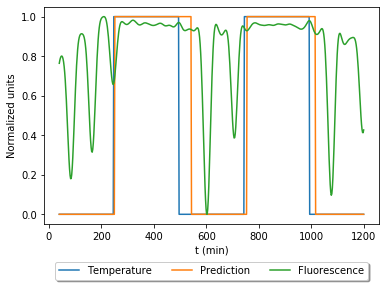

In [319]:
plt.xlabel('t (min)')
plt.ylabel('Normalized units')
plt.plot(np.linspace(40,1200,len(output_data)),np.array([np.ravel(output_data),[predicted_category2[i].argmax() for i in range(len(predicted_category2))],full_length_norm['D9'][20:-20]]).T)
plt.legend(['Temperature', 'Prediction', 'Fluorescence'],loc='upper center', bbox_to_anchor=(0.5, -0.15),shadow=True, ncol=3)

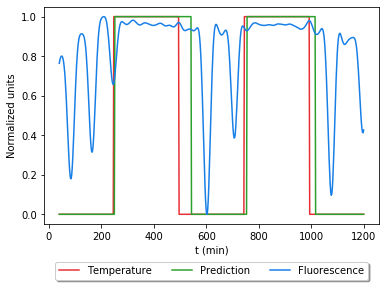

In [414]:
plt.xlabel('t (min)')
plt.ylabel('Normalized units')
#plt.xticks([])
#plt.yticks([])
#plt.axis('off')
x_values = np.linspace(40,1200,len(output_data))
plt.plot(x_values,np.ravel(output_data),color=(231/255,46/255,53/255))
plt.plot(x_values,[predicted_category2[i].argmax() for i in range(len(predicted_category2))],color='#2ca02c')
plt.plot(x_values,full_length_norm['D9'][20:-20],color=(24/255, 127/255, 231/255))
plt.legend(['Temperature', 'Prediction', 'Fluorescence'],loc='upper center', bbox_to_anchor=(0.5, -0.15),shadow=True, ncol=3)

In [404]:
plt.rcParams['axes.prop_cycle'].by_key()['color']

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [286]:
all_preds = [np.ravel(output_data)]
tested = ['C4','C9']
for exp in tested:
    input_data, output_data = get_data_2(exp)
    predicted_category = model.predict(input_data)
    all_preds.append([predicted_category[i].argmax() for i in range(len(predicted_category))])

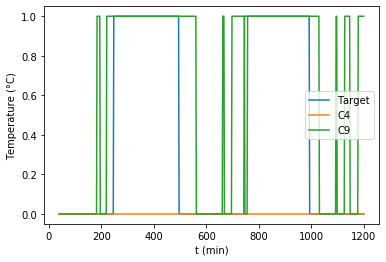

In [287]:
plt.xlabel('t (min)')
plt.ylabel('Temperature (°C)')
plt.plot(np.linspace(40,1200,len(output_data)),np.array(all_preds).T)
plt.legend(['Target']+tested)

In [518]:
output_data[101]

1

In [45]:
A = np.array([[0.5,0.3,0.3],[0.6,0.4,0.2]])

In [46]:
A.shape

(2, 3)

In [48]:
B = np.ones([2,3])

In [49]:
B

array([[1., 1., 1.],
       [1., 1., 1.]])

In [51]:
B - A[-1]

array([[0.4, 0.6, 0.8],
       [0.4, 0.6, 0.8]])

In [54]:
data_hex_2[0].values

C3           C4           C5           C7           C8  \
Cycle                                                                    
1      2475.019156  2463.365204  2481.644836  2562.702967  2448.714168   
2      2495.289973  2489.470967  2494.008623  2583.374693  2472.965421   
3      2497.860902  2490.782421  2497.734449  2591.726570  2475.705209   
4      2496.305408  2497.521713  2494.560074  2590.063712  2477.365665   
5      2499.884667  2498.161511  2493.394632  2585.857853  2480.547956   
6      2502.850520  2502.697034  2498.519493  2587.233478  2482.666458   
7      2508.599908  2507.870344  2506.495180  2589.312741  2485.002365   
8      2511.688558  2513.418651  2505.896045  2595.060262  2495.022840   
9      2517.571405  2519.447616  2513.759237  2595.485396  2497.261596   
10     2519.117085  2521.747084  2511.099279  2596.478139  2502.087121   
11     2516.522404  2527.189719  2517.477354  2595.343121  2501.953588   
12     2524.123994  2528.036902  2518.069232  2601.875081  2508.524341   
13     2527.869204  2532.794978  2515.055219  2604.872433  2509.114936   
14     2528.133195  2530.264152  2518.010222  2604.741285  2508.482197   
15     2526.614816  2534.924410  2516.200706  2603.389067  2515.161905   
16     2530.166423  2529.948644  2511.754087  2608.728366  2513.944845   
17     2528.398249  2534.166566  2509.606050  2603.789905  2510.320579   
18     2528.604408  2531.176921  2508.308634  2604.048637  2511.070734   
19     2524.840383  2531.039756  2509.535752  2606.415165  2514.339902   
20     2524.636843  2528.105730  2511.993104  2603.923346  2510.505175   
21     2527.298582  2532.648853  2504.612663  2609.788126  2511.450142   
22     2527.783356  2528.776106  2504.250962  2602.440675  2506.592165   
23     2525.101119  2533.814548  2504.981600  2601.596324  2510.060418   
24     2527.521368  2528.873571  2498.514670  2602.475415  2508.443966   
25     2523.615470  2528.869370  2493.617089  2596.265850  2508.167442   
26     2522.999693  2523.539640  2502.363528  2595.107734  2506.680507   
27     2519.603383  2526.051863  2494.076897  2592.903004  2505.518066   
28     2520.454316  2521.911812  2491.881366  2588.930214  2503.802364   
29     2516.279429  2526.041481  2491.494414  2585.850071  2500.378962   
30     2516.637374  2519.364242  2492.412591  2579.619406  2501.517903   
...            ...          ...          ...          ...          ...   
92     2496.406919  2504.763735  2450.331436  2575.557566  2483.500333   
93     2490.483399  2510.277905  2456.844689  2576.718950  2489.875433   
94     2494.282498  2514.937064  2456.754582  2584.314819  2495.485583   
95     2493.225436  2519.666103  2452.755900  2584.271936  2496.832436   
96     2491.901534  2521.893124  2455.101912  2587.803687  2498.317725   
97     2498.122267  2523.420577  2459.006757  2586.249108  2500.127272   
98     2493.375522  2521.383011  2459.279710  2585.558799  2502.184843   
99     2498.315325  2523.252055  2458.165183  2585.033073  2504.214643   
100    2490.380364  2523.160481  2455.702192  2584.378567  2502.280495   
101    2496.944738  2523.693558  2455.635237  2585.774471  2505.584471   
102    2492.581147  2522.623844  2458.484056  2584.843618  2504.217586   
103    2498.871905  2526.027946  2454.723695  2586.049732  2506.659463   
104    2492.032356  2526.119750  2452.447958  2586.308042  2504.233407   
105    2493.114904  2527.451416  2455.357674  2586.117140  2506.181235   
106    2496.922376  2527.616629  2456.502103  2589.970558  2506.998599   
107    2493.569331  2526.335166  2457.722906  2586.997073  2502.558589   
108    2493.043984  2524.506063  2458.626641  2578.789055  2502.477967   
109    2493.649691  2528.898156  2455.765173  2589.623065  2504.971401   
110    2494.323161  2525.502654  2455.415725  2584.999481  2503.342645   
111    2490.848758  2527.208869  2456.262459  2580.385765  2504.795098   
112    2491.460746  2524.415089  2453.966180  2583.010888  2503.502239   
113    2488.898537  

In [55]:
data_hex_2[0].values[-1]

array([2477.37461601, 2520.13027601, 2443.51223906, 2578.05230314,
       2496.52409316, 2482.55170322, 2486.4571755 , 2481.27895351,
       2452.82627628, 2526.09034676, 2447.50419447, 2461.41553689,
       2478.21563762, 2409.75898313, 2510.20967781, 2578.3244628 ,
       2436.2274139 , 2440.50538539, 2492.28164012, 2475.35478789,
       2511.24790107, 2550.36366846, 2497.42076439, 2500.11278562])

In [69]:
(data_hex_2[1].iloc[0] - data_hex_2[0].iloc[-1]).values

array([18.61949728, 18.6145454 , 20.77759396, 23.44126955, 23.64343007,
       15.16336476, 42.35502917, 63.1593329 , 67.59765972, 39.85374277,
       73.20245149, 63.69687659, 65.8515119 , 86.90174636, 53.93950236,
       52.96063064, 82.84707157, 50.7714564 , 63.73187031, 59.28887264,
       54.30671059, 75.16289366, 62.49141507, 48.46909618])

In [148]:
tempdf = [data_hex_2[i]/data_rox_2[i] for i in range(len(data_hex_2))]

In [162]:
test_vals = tempdf[1][2:-2].max().values - tempdf[0][2:-2].max().values

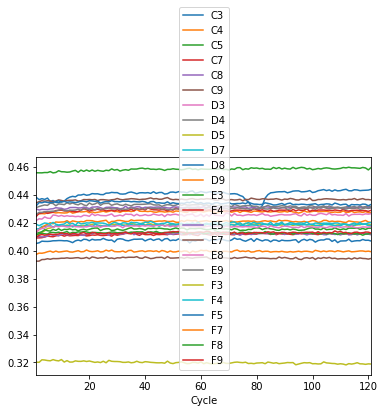

In [163]:
(tempdf[1] - test_vals).plot()

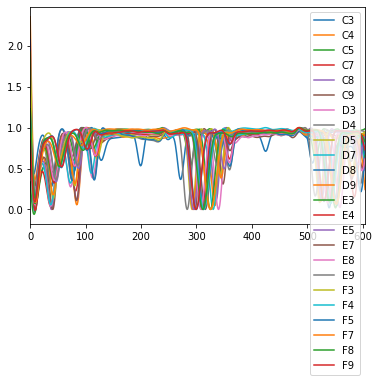

In [216]:
full_length_norm.plot()

In [190]:
from scipy import signal

In [202]:
b, a = signal.butter(3, 0.5)

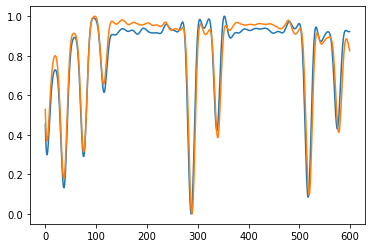

In [303]:
plt.plot(np.array([full_length_norm[exp][5:] for exp in ['D5','D9']]).T)

In [387]:
full_results_reservoir = []
for _ in range(100):
    temp_input_data, temp_output_data = get_data_2('D5')
    temp_input_data2, temp_output_data = get_data_2('D9')
    temp_model = get_model(10,use_mse=False,use_hidden=False)
    temp_model.fit(x=temp_input_data,y=keras.utils.to_categorical(temp_output_data, 2),epochs=200)
    full_results_reservoir.append(np.array([temp_model.evaluate(temp_input_data,keras.utils.to_categorical(output_data, 2)),
                                  temp_model.evaluate(temp_input_data2,keras.utils.to_categorical(output_data, 2))]))

Epoch 1/200
565/565 [==============================] - 0s 146us/step - loss: 0.7207 - accuracy: 0.4478
Epoch 2/200
565/565 [==============================] - 0s 30us/step - loss: 0.6973 - accuracy: 0.3009
Epoch 3/200
565/565 [==============================] - 0s 55us/step - loss: 0.6969 - accuracy: 0.3469
Epoch 4/200
565/565 [==============================] - 0s 63us/step - loss: 0.6954 - accuracy: 0.4124
Epoch 5/200
565/565 [==============================] - 0s 62us/step - loss: 0.6939 - accuracy: 0.4159
Epoch 6/200
565/565 [==============================] - 0s 62us/step - loss: 0.6911 - accuracy: 0.4513
Epoch 7/200
565/565 [==============================] - 0s 28us/step - loss: 0.6912 - accuracy: 0.4814
Epoch 8/200
565/565 [==============================] - 0s 59us/step - loss: 0.6892 - accuracy: 0.4549
Epoch 9/200
565/565 [==============================] - 0s 48us/step - loss: 0.6887 - accuracy: 0.5239
Epoch 10/200
565/565 [==============================] - 0s 56us/step - loss: 0.68

565/565 [==============================] - 0s 59us/step - loss: 0.6282 - accuracy: 0.7735
Epoch 81/200
565/565 [==============================] - 0s 47us/step - loss: 0.6262 - accuracy: 0.8071
Epoch 82/200
565/565 [==============================] - 0s 55us/step - loss: 0.6265 - accuracy: 0.7469
Epoch 83/200
565/565 [==============================] - 0s 60us/step - loss: 0.6248 - accuracy: 0.6655
Epoch 84/200
565/565 [==============================] - 0s 57us/step - loss: 0.6249 - accuracy: 0.6938
Epoch 85/200
565/565 [==============================] - 0s 38us/step - loss: 0.6232 - accuracy: 0.8177
Epoch 86/200
565/565 [==============================] - 0s 46us/step - loss: 0.6230 - accuracy: 0.7628
Epoch 87/200
565/565 [==============================] - 0s 55us/step - loss: 0.6228 - accuracy: 0.6673
Epoch 88/200
565/565 [==============================] - 0s 40us/step - loss: 0.6218 - accuracy: 0.7894
Epoch 89/200
565/565 [==============================] - 0s 52us/step - loss: 0.6216 - 

565/565 [==============================] - 0s 54us/step - loss: 0.5770 - accuracy: 0.8549
Epoch 160/200
565/565 [==============================] - 0s 48us/step - loss: 0.5764 - accuracy: 0.8619
Epoch 161/200
565/565 [==============================] - 0s 43us/step - loss: 0.5756 - accuracy: 0.8584
Epoch 162/200
565/565 [==============================] - 0s 47us/step - loss: 0.5754 - accuracy: 0.8513
Epoch 163/200
565/565 [==============================] - 0s 53us/step - loss: 0.5752 - accuracy: 0.8566
Epoch 164/200
565/565 [==============================] - 0s 57us/step - loss: 0.5742 - accuracy: 0.8496
Epoch 165/200
565/565 [==============================] - 0s 36us/step - loss: 0.5727 - accuracy: 0.8584
Epoch 166/200
565/565 [==============================] - 0s 48us/step - loss: 0.5732 - accuracy: 0.8513
Epoch 167/200
565/565 [==============================] - 0s 82us/step - loss: 0.5730 - accuracy: 0.8584
Epoch 168/200
565/565 [==============================] - 0s 51us/step - loss: 

565/565 [==============================] - 0s 39us/step - loss: 0.6642 - accuracy: 0.5239
Epoch 38/200
565/565 [==============================] - 0s 53us/step - loss: 0.6646 - accuracy: 0.5558
Epoch 39/200
565/565 [==============================] - 0s 45us/step - loss: 0.6631 - accuracy: 0.5912
Epoch 40/200
565/565 [==============================] - 0s 49us/step - loss: 0.6618 - accuracy: 0.5469
Epoch 41/200
565/565 [==============================] - 0s 53us/step - loss: 0.6611 - accuracy: 0.5504
Epoch 42/200
565/565 [==============================] - 0s 48us/step - loss: 0.6602 - accuracy: 0.5823
Epoch 43/200
565/565 [==============================] - 0s 40us/step - loss: 0.6583 - accuracy: 0.6212
Epoch 44/200
565/565 [==============================] - 0s 39us/step - loss: 0.6590 - accuracy: 0.5469
Epoch 45/200
565/565 [==============================] - 0s 40us/step - loss: 0.6588 - accuracy: 0.5982
Epoch 46/200
565/565 [==============================] - 0s 32us/step - loss: 0.6557 - 

565/565 [==============================] - 0s 54us/step - loss: 0.6032 - accuracy: 0.8690
Epoch 117/200
565/565 [==============================] - 0s 50us/step - loss: 0.6019 - accuracy: 0.8708
Epoch 118/200
565/565 [==============================] - 0s 55us/step - loss: 0.6010 - accuracy: 0.8513
Epoch 119/200
565/565 [==============================] - 0s 57us/step - loss: 0.6003 - accuracy: 0.8142
Epoch 120/200
565/565 [==============================] - 0s 47us/step - loss: 0.6007 - accuracy: 0.8248
Epoch 121/200
565/565 [==============================] - 0s 50us/step - loss: 0.5993 - accuracy: 0.8832
Epoch 122/200
565/565 [==============================] - 0s 43us/step - loss: 0.5986 - accuracy: 0.8761
Epoch 123/200
565/565 [==============================] - 0s 46us/step - loss: 0.5984 - accuracy: 0.8602
Epoch 124/200
565/565 [==============================] - 0s 42us/step - loss: 0.5968 - accuracy: 0.8726
Epoch 125/200
565/565 [==============================] - 0s 48us/step - loss: 

565/565 [==============================] - 0s 57us/step - loss: 0.5576 - accuracy: 0.8956
Epoch 195/200
565/565 [==============================] - 0s 35us/step - loss: 0.5583 - accuracy: 0.8708
Epoch 196/200
565/565 [==============================] - 0s 56us/step - loss: 0.5578 - accuracy: 0.8796
Epoch 197/200
565/565 [==============================] - 0s 44us/step - loss: 0.5560 - accuracy: 0.8726
Epoch 198/200
565/565 [==============================] - 0s 42us/step - loss: 0.5557 - accuracy: 0.8850
Epoch 199/200
565/565 [==============================] - 0s 53us/step - loss: 0.5559 - accuracy: 0.8832
Epoch 200/200
565/565 [==============================] - 0s 30us/step
Epoch 1/200
565/565 [==============================] - 0s 155us/step - loss: 0.7445 - accuracy: 0.4973
Epoch 2/200
565/565 [==============================] - 0s 32us/step - loss: 0.6935 - accuracy: 0.6850
Epoch 3/200
565/565 [==============================] - 0s 46us/step - loss: 0.6937 - accuracy: 0.4690
Epoch 4/200
5

565/565 [==============================] - 0s 61us/step - loss: 0.6325 - accuracy: 0.6460
Epoch 73/200
565/565 [==============================] - 0s 59us/step - loss: 0.6303 - accuracy: 0.7965
Epoch 74/200
565/565 [==============================] - 0s 52us/step - loss: 0.6301 - accuracy: 0.6673
Epoch 75/200
565/565 [==============================] - 0s 44us/step - loss: 0.6309 - accuracy: 0.7876
Epoch 76/200
565/565 [==============================] - 0s 40us/step - loss: 0.6292 - accuracy: 0.8177
Epoch 77/200
565/565 [==============================] - 0s 59us/step - loss: 0.6278 - accuracy: 0.7575
Epoch 78/200
565/565 [==============================] - 0s 56us/step - loss: 0.6275 - accuracy: 0.7841
Epoch 79/200
565/565 [==============================] - 0s 50us/step - loss: 0.6245 - accuracy: 0.7752
Epoch 80/200
565/565 [==============================] - 0s 50us/step - loss: 0.6277 - accuracy: 0.7487
Epoch 81/200
565/565 [==============================] - 0s 56us/step - loss: 0.6258 - 

565/565 [==============================] - 0s 59us/step - loss: 0.5789 - accuracy: 0.8743
Epoch 152/200
565/565 [==============================] - 0s 40us/step - loss: 0.5785 - accuracy: 0.8726
Epoch 153/200
565/565 [==============================] - 0s 60us/step - loss: 0.5780 - accuracy: 0.8726
Epoch 154/200
565/565 [==============================] - 0s 55us/step - loss: 0.5770 - accuracy: 0.8796
Epoch 155/200
565/565 [==============================] - 0s 47us/step - loss: 0.5769 - accuracy: 0.8885
Epoch 156/200
565/565 [==============================] - 0s 45us/step - loss: 0.5766 - accuracy: 0.8761
Epoch 157/200
565/565 [==============================] - 0s 38us/step - loss: 0.5740 - accuracy: 0.8265
Epoch 158/200
565/565 [==============================] - 0s 45us/step - loss: 0.5756 - accuracy: 0.8619
Epoch 159/200
565/565 [==============================] - 0s 47us/step - loss: 0.5728 - accuracy: 0.8850
Epoch 160/200
565/565 [==============================] - 0s 43us/step - loss: 

565/565 [==============================] - 0s 47us/step - loss: 0.6804 - accuracy: 0.4584
Epoch 30/200
565/565 [==============================] - 0s 49us/step - loss: 0.6792 - accuracy: 0.4867
Epoch 31/200
565/565 [==============================] - 0s 52us/step - loss: 0.6781 - accuracy: 0.5522
Epoch 32/200
565/565 [==============================] - 0s 45us/step - loss: 0.6779 - accuracy: 0.4743
Epoch 33/200
565/565 [==============================] - 0s 47us/step - loss: 0.6763 - accuracy: 0.6106
Epoch 34/200
565/565 [==============================] - 0s 43us/step - loss: 0.6754 - accuracy: 0.5310
Epoch 35/200
565/565 [==============================] - 0s 39us/step - loss: 0.6746 - accuracy: 0.5469
Epoch 36/200
565/565 [==============================] - 0s 46us/step - loss: 0.6749 - accuracy: 0.5327
Epoch 37/200
565/565 [==============================] - 0s 47us/step - loss: 0.6732 - accuracy: 0.4903
Epoch 38/200
565/565 [==============================] - 0s 44us/step - loss: 0.6726 - 

565/565 [==============================] - 0s 54us/step - loss: 0.6170 - accuracy: 0.8212
Epoch 109/200
565/565 [==============================] - 0s 46us/step - loss: 0.6174 - accuracy: 0.8549
Epoch 110/200
565/565 [==============================] - 0s 48us/step - loss: 0.6164 - accuracy: 0.7487
Epoch 111/200
565/565 [==============================] - 0s 55us/step - loss: 0.6158 - accuracy: 0.8496
Epoch 112/200
565/565 [==============================] - 0s 49us/step - loss: 0.6146 - accuracy: 0.7575
Epoch 113/200
565/565 [==============================] - 0s 48us/step - loss: 0.6147 - accuracy: 0.8442
Epoch 114/200
565/565 [==============================] - 0s 44us/step - loss: 0.6140 - accuracy: 0.8124
Epoch 115/200
565/565 [==============================] - 0s 47us/step - loss: 0.6124 - accuracy: 0.8088
Epoch 116/200
565/565 [==============================] - 0s 42us/step - loss: 0.6130 - accuracy: 0.8389
Epoch 117/200
565/565 [==============================] - 0s 48us/step - loss: 

565/565 [==============================] - 0s 48us/step - loss: 0.5695 - accuracy: 0.8726
Epoch 187/200
565/565 [==============================] - 0s 55us/step - loss: 0.5685 - accuracy: 0.8743
Epoch 188/200
565/565 [==============================] - 0s 40us/step - loss: 0.5691 - accuracy: 0.8531
Epoch 189/200
565/565 [==============================] - 0s 49us/step - loss: 0.5682 - accuracy: 0.8726
Epoch 190/200
565/565 [==============================] - 0s 34us/step - loss: 0.5682 - accuracy: 0.8619
Epoch 191/200
565/565 [==============================] - 0s 42us/step - loss: 0.5668 - accuracy: 0.8743
Epoch 192/200
565/565 [==============================] - 0s 41us/step - loss: 0.5660 - accuracy: 0.8708
Epoch 193/200
565/565 [==============================] - 0s 42us/step - loss: 0.5652 - accuracy: 0.8761
Epoch 194/200
565/565 [==============================] - 0s 42us/step - loss: 0.5665 - accuracy: 0.8743
Epoch 195/200
565/565 [==============================] - 0s 50us/step - loss: 

565/565 [==============================] - 0s 43us/step - loss: 0.6374 - accuracy: 0.7327
Epoch 65/200
565/565 [==============================] - 0s 49us/step - loss: 0.6374 - accuracy: 0.6832
Epoch 66/200
565/565 [==============================] - 0s 44us/step - loss: 0.6362 - accuracy: 0.7133
Epoch 67/200
565/565 [==============================] - 0s 44us/step - loss: 0.6351 - accuracy: 0.6478
Epoch 68/200
565/565 [==============================] - 0s 44us/step - loss: 0.6356 - accuracy: 0.7451
Epoch 69/200
565/565 [==============================] - 0s 46us/step - loss: 0.6342 - accuracy: 0.6566
Epoch 70/200
565/565 [==============================] - 0s 36us/step - loss: 0.6339 - accuracy: 0.7487
Epoch 71/200
565/565 [==============================] - 0s 41us/step - loss: 0.6324 - accuracy: 0.7504
Epoch 72/200
565/565 [==============================] - 0s 43us/step - loss: 0.6321 - accuracy: 0.7434
Epoch 73/200
565/565 [==============================] - 0s 52us/step - loss: 0.6320 - 

565/565 [==============================] - 0s 46us/step - loss: 0.5839 - accuracy: 0.8602
Epoch 144/200
565/565 [==============================] - 0s 43us/step - loss: 0.5852 - accuracy: 0.8372
Epoch 145/200
565/565 [==============================] - 0s 40us/step - loss: 0.5825 - accuracy: 0.8673
Epoch 146/200
565/565 [==============================] - 0s 45us/step - loss: 0.5827 - accuracy: 0.8549
Epoch 147/200
565/565 [==============================] - 0s 38us/step - loss: 0.5840 - accuracy: 0.8212
Epoch 148/200
565/565 [==============================] - 0s 48us/step - loss: 0.5811 - accuracy: 0.8708
Epoch 149/200
565/565 [==============================] - 0s 44us/step - loss: 0.5816 - accuracy: 0.8655
Epoch 150/200
565/565 [==============================] - 0s 47us/step - loss: 0.5807 - accuracy: 0.8779
Epoch 151/200
565/565 [==============================] - 0s 51us/step - loss: 0.5794 - accuracy: 0.8442
Epoch 152/200
565/565 [==============================] - 0s 41us/step - loss: 

565/565 [==============================] - 0s 48us/step - loss: 0.6731 - accuracy: 0.4867
Epoch 22/200
565/565 [==============================] - 0s 60us/step - loss: 0.6734 - accuracy: 0.6195
Epoch 23/200
565/565 [==============================] - 0s 47us/step - loss: 0.6713 - accuracy: 0.5416
Epoch 24/200
565/565 [==============================] - 0s 46us/step - loss: 0.6703 - accuracy: 0.6018
Epoch 25/200
565/565 [==============================] - 0s 35us/step - loss: 0.6711 - accuracy: 0.4832
Epoch 26/200
565/565 [==============================] - 0s 43us/step - loss: 0.6696 - accuracy: 0.5310
Epoch 27/200
565/565 [==============================] - 0s 41us/step - loss: 0.6676 - accuracy: 0.5292
Epoch 28/200
565/565 [==============================] - 0s 45us/step - loss: 0.6669 - accuracy: 0.6619
Epoch 29/200
565/565 [==============================] - 0s 41us/step - loss: 0.6678 - accuracy: 0.5044
Epoch 30/200
565/565 [==============================] - 0s 39us/step - loss: 0.6667 - 

565/565 [==============================] - 0s 42us/step - loss: 0.6130 - accuracy: 0.8496
Epoch 100/200
565/565 [==============================] - 0s 36us/step - loss: 0.6108 - accuracy: 0.8584
Epoch 101/200
565/565 [==============================] - 0s 34us/step - loss: 0.6100 - accuracy: 0.8655
Epoch 102/200
565/565 [==============================] - 0s 48us/step - loss: 0.6094 - accuracy: 0.7646
Epoch 103/200
565/565 [==============================] - 0s 41us/step - loss: 0.6093 - accuracy: 0.8478
Epoch 104/200
565/565 [==============================] - 0s 44us/step - loss: 0.6091 - accuracy: 0.8142
Epoch 105/200
565/565 [==============================] - 0s 36us/step - loss: 0.6077 - accuracy: 0.7611
Epoch 106/200
565/565 [==============================] - 0s 41us/step - loss: 0.6065 - accuracy: 0.8460
Epoch 107/200
565/565 [==============================] - 0s 36us/step - loss: 0.6071 - accuracy: 0.8442
Epoch 108/200
565/565 [==============================] - 0s 35us/step - loss: 

565/565 [==============================] - 0s 47us/step - loss: 0.5641 - accuracy: 0.8761
Epoch 178/200
565/565 [==============================] - 0s 69us/step - loss: 0.5629 - accuracy: 0.8673
Epoch 179/200
565/565 [==============================] - 0s 57us/step - loss: 0.5627 - accuracy: 0.8655
Epoch 180/200
565/565 [==============================] - 0s 54us/step - loss: 0.5617 - accuracy: 0.8743
Epoch 181/200
565/565 [==============================] - 0s 65us/step - loss: 0.5611 - accuracy: 0.8690
Epoch 182/200
565/565 [==============================] - 0s 52us/step - loss: 0.5615 - accuracy: 0.8814
Epoch 183/200
565/565 [==============================] - 0s 53us/step - loss: 0.5617 - accuracy: 0.8726
Epoch 184/200
565/565 [==============================] - 0s 75us/step - loss: 0.5603 - accuracy: 0.8761
Epoch 185/200
565/565 [==============================] - 0s 45us/step - loss: 0.5590 - accuracy: 0.8779
Epoch 186/200
565/565 [==============================] - 0s 62us/step - loss: 

565/565 [==============================] - 0s 64us/step - loss: 0.6536 - accuracy: 0.5735
Epoch 56/200
565/565 [==============================] - 0s 49us/step - loss: 0.6531 - accuracy: 0.6779
Epoch 57/200
565/565 [==============================] - 0s 61us/step - loss: 0.6525 - accuracy: 0.6265
Epoch 58/200
565/565 [==============================] - 0s 49us/step - loss: 0.6513 - accuracy: 0.7558
Epoch 59/200
565/565 [==============================] - 0s 45us/step - loss: 0.6507 - accuracy: 0.6637
Epoch 60/200
565/565 [==============================] - 0s 52us/step - loss: 0.6507 - accuracy: 0.6336
Epoch 61/200
565/565 [==============================] - 0s 60us/step - loss: 0.6493 - accuracy: 0.6832
Epoch 62/200
565/565 [==============================] - 0s 61us/step - loss: 0.6484 - accuracy: 0.6442
Epoch 63/200
565/565 [==============================] - 0s 58us/step - loss: 0.6479 - accuracy: 0.6690
Epoch 64/200
565/565 [==============================] - 0s 61us/step - loss: 0.6462 - 

565/565 [==============================] - 0s 42us/step - loss: 0.5968 - accuracy: 0.8761
Epoch 135/200
565/565 [==============================] - 0s 38us/step - loss: 0.5971 - accuracy: 0.8018
Epoch 136/200
565/565 [==============================] - 0s 49us/step - loss: 0.5965 - accuracy: 0.8673
Epoch 137/200
565/565 [==============================] - 0s 34us/step - loss: 0.5951 - accuracy: 0.8319
Epoch 138/200
565/565 [==============================] - 0s 52us/step - loss: 0.5939 - accuracy: 0.8549
Epoch 139/200
565/565 [==============================] - 0s 52us/step - loss: 0.5948 - accuracy: 0.8602
Epoch 140/200
565/565 [==============================] - 0s 46us/step - loss: 0.5931 - accuracy: 0.8673
Epoch 141/200
565/565 [==============================] - 0s 34us/step - loss: 0.5939 - accuracy: 0.8655
Epoch 142/200
565/565 [==============================] - 0s 41us/step - loss: 0.5920 - accuracy: 0.8655
Epoch 143/200
565/565 [==============================] - 0s 42us/step - loss: 

565/565 [==============================] - 0s 55us/step - loss: 0.6826 - accuracy: 0.5717
Epoch 13/200
565/565 [==============================] - 0s 58us/step - loss: 0.6806 - accuracy: 0.5009
Epoch 14/200
565/565 [==============================] - 0s 61us/step - loss: 0.6801 - accuracy: 0.5080
Epoch 15/200
565/565 [==============================] - 0s 43us/step - loss: 0.6785 - accuracy: 0.5558
Epoch 16/200
565/565 [==============================] - 0s 56us/step - loss: 0.6782 - accuracy: 0.5858
Epoch 17/200
565/565 [==============================] - 0s 63us/step - loss: 0.6767 - accuracy: 0.5097
Epoch 18/200
565/565 [==============================] - 0s 61us/step - loss: 0.6767 - accuracy: 0.5611
Epoch 19/200
565/565 [==============================] - 0s 58us/step - loss: 0.6752 - accuracy: 0.6212
Epoch 20/200
565/565 [==============================] - 0s 63us/step - loss: 0.6746 - accuracy: 0.5504
Epoch 21/200
565/565 [==============================] - 0s 66us/step - loss: 0.6747 - 

565/565 [==============================] - 0s 58us/step - loss: 0.6195 - accuracy: 0.7699
Epoch 92/200
565/565 [==============================] - 0s 47us/step - loss: 0.6198 - accuracy: 0.7876
Epoch 93/200
565/565 [==============================] - 0s 44us/step - loss: 0.6188 - accuracy: 0.8142
Epoch 94/200
565/565 [==============================] - 0s 49us/step - loss: 0.6177 - accuracy: 0.7858
Epoch 95/200
565/565 [==============================] - 0s 51us/step - loss: 0.6164 - accuracy: 0.8035
Epoch 96/200
565/565 [==============================] - 0s 54us/step - loss: 0.6169 - accuracy: 0.7540
Epoch 97/200
565/565 [==============================] - 0s 50us/step - loss: 0.6170 - accuracy: 0.8212
Epoch 98/200
565/565 [==============================] - 0s 51us/step - loss: 0.6165 - accuracy: 0.8035
Epoch 99/200
565/565 [==============================] - 0s 45us/step - loss: 0.6129 - accuracy: 0.8142
Epoch 100/200
565/565 [==============================] - 0s 47us/step - loss: 0.6144 -

Epoch 170/200
565/565 [==============================] - 0s 52us/step - loss: 0.5718 - accuracy: 0.8690
Epoch 171/200
565/565 [==============================] - 0s 54us/step - loss: 0.5718 - accuracy: 0.8425
Epoch 172/200
565/565 [==============================] - 0s 43us/step - loss: 0.5698 - accuracy: 0.8726
Epoch 173/200
565/565 [==============================] - 0s 49us/step - loss: 0.5697 - accuracy: 0.8726
Epoch 174/200
565/565 [==============================] - 0s 60us/step - loss: 0.5690 - accuracy: 0.8673
Epoch 175/200
565/565 [==============================] - 0s 54us/step - loss: 0.5699 - accuracy: 0.8761
Epoch 176/200
565/565 [==============================] - 0s 45us/step - loss: 0.5693 - accuracy: 0.8673
Epoch 177/200
565/565 [==============================] - 0s 43us/step - loss: 0.5672 - accuracy: 0.8690
Epoch 178/200
565/565 [==============================] - 0s 45us/step - loss: 0.5661 - accuracy: 0.8743
Epoch 179/200
565/565 [==============================] - 0s 39us

565/565 [==============================] - 0s 65us/step - loss: 0.6541 - accuracy: 0.6301
Epoch 49/200
565/565 [==============================] - 0s 68us/step - loss: 0.6536 - accuracy: 0.6637
Epoch 50/200
565/565 [==============================] - 0s 59us/step - loss: 0.6537 - accuracy: 0.5504
Epoch 51/200
565/565 [==============================] - 0s 44us/step - loss: 0.6515 - accuracy: 0.7257
Epoch 52/200
565/565 [==============================] - 0s 46us/step - loss: 0.6513 - accuracy: 0.6283
Epoch 53/200
565/565 [==============================] - 0s 45us/step - loss: 0.6509 - accuracy: 0.6354
Epoch 54/200
565/565 [==============================] - 0s 37us/step - loss: 0.6505 - accuracy: 0.6035
Epoch 55/200
565/565 [==============================] - 0s 40us/step - loss: 0.6480 - accuracy: 0.6513
Epoch 56/200
565/565 [==============================] - 0s 41us/step - loss: 0.6493 - accuracy: 0.6354
Epoch 57/200
565/565 [==============================] - 0s 52us/step - loss: 0.6481 - 

Epoch 127/200
565/565 [==============================] - 0s 51us/step - loss: 0.5989 - accuracy: 0.8496
Epoch 128/200
565/565 [==============================] - 0s 51us/step - loss: 0.5966 - accuracy: 0.8796
Epoch 129/200
565/565 [==============================] - 0s 58us/step - loss: 0.5966 - accuracy: 0.8513
Epoch 130/200
565/565 [==============================] - 0s 56us/step - loss: 0.5955 - accuracy: 0.8460
Epoch 131/200
565/565 [==============================] - 0s 44us/step - loss: 0.5951 - accuracy: 0.8690
Epoch 132/200
565/565 [==============================] - 0s 37us/step - loss: 0.5943 - accuracy: 0.8283
Epoch 133/200
565/565 [==============================] - 0s 56us/step - loss: 0.5940 - accuracy: 0.8726
Epoch 134/200
565/565 [==============================] - 0s 54us/step - loss: 0.5941 - accuracy: 0.8425
Epoch 135/200
565/565 [==============================] - 0s 56us/step - loss: 0.5926 - accuracy: 0.8796
Epoch 136/200
565/565 [==============================] - 0s 61us

565/565 [==============================] - 0s 44us/step - loss: 0.7050 - accuracy: 0.4071
Epoch 5/200
565/565 [==============================] - 0s 74us/step - loss: 0.7015 - accuracy: 0.4053
Epoch 6/200
565/565 [==============================] - 0s 55us/step - loss: 0.7021 - accuracy: 0.4655
Epoch 7/200
565/565 [==============================] - 0s 59us/step - loss: 0.7008 - accuracy: 0.3876
Epoch 8/200
565/565 [==============================] - 0s 38us/step - loss: 0.6998 - accuracy: 0.4212
Epoch 9/200
565/565 [==============================] - 0s 56us/step - loss: 0.6987 - accuracy: 0.4195
Epoch 10/200
565/565 [==============================] - 0s 45us/step - loss: 0.6976 - accuracy: 0.4867
Epoch 11/200
565/565 [==============================] - 0s 38us/step - loss: 0.6958 - accuracy: 0.5027
Epoch 12/200
565/565 [==============================] - 0s 49us/step - loss: 0.6946 - accuracy: 0.4513
Epoch 13/200
565/565 [==============================] - 0s 82us/step - loss: 0.6943 - accur

565/565 [==============================] - 0s 40us/step - loss: 0.6296 - accuracy: 0.7416
Epoch 84/200
565/565 [==============================] - 0s 35us/step - loss: 0.6283 - accuracy: 0.8018
Epoch 85/200
565/565 [==============================] - 0s 34us/step - loss: 0.6273 - accuracy: 0.7327
Epoch 86/200
565/565 [==============================] - 0s 46us/step - loss: 0.6269 - accuracy: 0.7469
Epoch 87/200
565/565 [==============================] - 0s 42us/step - loss: 0.6252 - accuracy: 0.8283
Epoch 88/200
565/565 [==============================] - 0s 37us/step - loss: 0.6257 - accuracy: 0.8000
Epoch 89/200
565/565 [==============================] - 0s 39us/step - loss: 0.6244 - accuracy: 0.6655
Epoch 90/200
565/565 [==============================] - 0s 43us/step - loss: 0.6247 - accuracy: 0.7929
Epoch 91/200
565/565 [==============================] - 0s 43us/step - loss: 0.6226 - accuracy: 0.7965
Epoch 92/200
565/565 [==============================] - 0s 42us/step - loss: 0.6220 - 

565/565 [==============================] - 0s 47us/step - loss: 0.5748 - accuracy: 0.8867
Epoch 163/200
565/565 [==============================] - 0s 59us/step - loss: 0.5737 - accuracy: 0.8283
Epoch 164/200
565/565 [==============================] - 0s 44us/step - loss: 0.5751 - accuracy: 0.8867
Epoch 165/200
565/565 [==============================] - 0s 50us/step - loss: 0.5731 - accuracy: 0.8903
Epoch 166/200
565/565 [==============================] - 0s 40us/step - loss: 0.5734 - accuracy: 0.8991
Epoch 167/200
565/565 [==============================] - 0s 36us/step - loss: 0.5722 - accuracy: 0.8867
Epoch 168/200
565/565 [==============================] - 0s 40us/step - loss: 0.5727 - accuracy: 0.8920
Epoch 169/200
565/565 [==============================] - 0s 39us/step - loss: 0.5710 - accuracy: 0.9044
Epoch 170/200
565/565 [==============================] - 0s 48us/step - loss: 0.5695 - accuracy: 0.8956
Epoch 171/200
565/565 [==============================] - 0s 51us/step - loss: 

565/565 [==============================] - 0s 44us/step - loss: 0.6627 - accuracy: 0.5080
Epoch 41/200
565/565 [==============================] - 0s 62us/step - loss: 0.6606 - accuracy: 0.6354
Epoch 42/200
565/565 [==============================] - 0s 51us/step - loss: 0.6615 - accuracy: 0.5752
Epoch 43/200
565/565 [==============================] - 0s 52us/step - loss: 0.6596 - accuracy: 0.5876
Epoch 44/200
565/565 [==============================] - 0s 45us/step - loss: 0.6586 - accuracy: 0.6088
Epoch 45/200
565/565 [==============================] - 0s 41us/step - loss: 0.6580 - accuracy: 0.5929
Epoch 46/200
565/565 [==============================] - 0s 45us/step - loss: 0.6573 - accuracy: 0.6088
Epoch 47/200
565/565 [==============================] - 0s 46us/step - loss: 0.6558 - accuracy: 0.6106
Epoch 48/200
565/565 [==============================] - 0s 42us/step - loss: 0.6552 - accuracy: 0.6549
Epoch 49/200
565/565 [==============================] - 0s 42us/step - loss: 0.6546 - 

565/565 [==============================] - 0s 55us/step - loss: 0.6038 - accuracy: 0.8425
Epoch 120/200
565/565 [==============================] - 0s 59us/step - loss: 0.6014 - accuracy: 0.7080
Epoch 121/200
565/565 [==============================] - 0s 63us/step - loss: 0.6018 - accuracy: 0.8442
Epoch 122/200
565/565 [==============================] - 0s 67us/step - loss: 0.6011 - accuracy: 0.8549
Epoch 123/200
565/565 [==============================] - 0s 85us/step - loss: 0.6012 - accuracy: 0.8584
Epoch 124/200
565/565 [==============================] - 0s 91us/step - loss: 0.6003 - accuracy: 0.8513
Epoch 125/200
565/565 [==============================] - 0s 93us/step - loss: 0.5997 - accuracy: 0.8690
Epoch 126/200
565/565 [==============================] - 0s 66us/step - loss: 0.5988 - accuracy: 0.8619
Epoch 127/200
565/565 [==============================] - 0s 73us/step - loss: 0.5982 - accuracy: 0.8248
Epoch 128/200
565/565 [==============================] - 0s 77us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.5576 - accuracy: 0.8761
Epoch 198/200
565/565 [==============================] - 0s 29us/step - loss: 0.5569 - accuracy: 0.8637
Epoch 199/200
565/565 [==============================] - 0s 29us/step - loss: 0.5548 - accuracy: 0.8389
Epoch 200/200
565/565 [==============================] - 0s 13us/step
Epoch 1/200
565/565 [==============================] - 0s 170us/step - loss: 0.7393 - accuracy: 0.5062
Epoch 2/200
565/565 [==============================] - 0s 30us/step - loss: 0.7057 - accuracy: 0.3876
Epoch 3/200
565/565 [==============================] - 0s 25us/step - loss: 0.7029 - accuracy: 0.3876
Epoch 4/200
565/565 [==============================] - 0s 25us/step - loss: 0.7011 - accuracy: 0.4212
Epoch 5/200
565/565 [==============================] - 0s 25us/step - loss: 0.6995 - accuracy: 0.4124
Epoch 6/200
565/565 [==============================] - 0s 25us/step - loss: 0.6982 - accuracy: 0.3965
Epoch 7/200
565/565

565/565 [==============================] - 0s 25us/step - loss: 0.6334 - accuracy: 0.6938
Epoch 76/200
565/565 [==============================] - 0s 27us/step - loss: 0.6326 - accuracy: 0.7805
Epoch 77/200
565/565 [==============================] - 0s 25us/step - loss: 0.6314 - accuracy: 0.7681
Epoch 78/200
565/565 [==============================] - 0s 25us/step - loss: 0.6307 - accuracy: 0.8124
Epoch 79/200
565/565 [==============================] - 0s 26us/step - loss: 0.6306 - accuracy: 0.7345
Epoch 80/200
565/565 [==============================] - 0s 25us/step - loss: 0.6288 - accuracy: 0.6619
Epoch 81/200
565/565 [==============================] - 0s 25us/step - loss: 0.6276 - accuracy: 0.7982
Epoch 82/200
565/565 [==============================] - 0s 25us/step - loss: 0.6288 - accuracy: 0.7080
Epoch 83/200
565/565 [==============================] - 0s 60us/step - loss: 0.6270 - accuracy: 0.7858
Epoch 84/200
565/565 [==============================] - 0s 44us/step - loss: 0.6269 - 

565/565 [==============================] - 0s 27us/step - loss: 0.5825 - accuracy: 0.8442
Epoch 154/200
565/565 [==============================] - 0s 27us/step - loss: 0.5809 - accuracy: 0.8708
Epoch 155/200
565/565 [==============================] - 0s 24us/step - loss: 0.5801 - accuracy: 0.8602
Epoch 156/200
565/565 [==============================] - 0s 27us/step - loss: 0.5791 - accuracy: 0.8513
Epoch 157/200
565/565 [==============================] - 0s 28us/step - loss: 0.5787 - accuracy: 0.8779
Epoch 158/200
565/565 [==============================] - 0s 26us/step - loss: 0.5772 - accuracy: 0.8248
Epoch 159/200
565/565 [==============================] - 0s 25us/step - loss: 0.5774 - accuracy: 0.8655
Epoch 160/200
565/565 [==============================] - 0s 25us/step - loss: 0.5774 - accuracy: 0.8673
Epoch 161/200
565/565 [==============================] - 0s 25us/step - loss: 0.5766 - accuracy: 0.8566
Epoch 162/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 25us/step - loss: 0.6645 - accuracy: 0.5416
Epoch 31/200
565/565 [==============================] - 0s 25us/step - loss: 0.6657 - accuracy: 0.5115
Epoch 32/200
565/565 [==============================] - 0s 44us/step - loss: 0.6634 - accuracy: 0.5292
Epoch 33/200
565/565 [==============================] - 0s 29us/step - loss: 0.6620 - accuracy: 0.6106
Epoch 34/200
565/565 [==============================] - 0s 27us/step - loss: 0.6611 - accuracy: 0.5681
Epoch 35/200
565/565 [==============================] - 0s 26us/step - loss: 0.6607 - accuracy: 0.5575
Epoch 36/200
565/565 [==============================] - 0s 25us/step - loss: 0.6601 - accuracy: 0.5115
Epoch 37/200
565/565 [==============================] - 0s 26us/step - loss: 0.6595 - accuracy: 0.5805
Epoch 38/200
565/565 [==============================] - 0s 26us/step - loss: 0.6580 - accuracy: 0.5504
Epoch 39/200
565/565 [==============================] - 0s 26us/step - loss: 0.6562 - 

565/565 [==============================] - 0s 26us/step - loss: 0.6070 - accuracy: 0.8265
Epoch 110/200
565/565 [==============================] - 0s 25us/step - loss: 0.6065 - accuracy: 0.7752
Epoch 111/200
565/565 [==============================] - 0s 25us/step - loss: 0.6074 - accuracy: 0.8265
Epoch 112/200
565/565 [==============================] - 0s 25us/step - loss: 0.6052 - accuracy: 0.8372
Epoch 113/200
565/565 [==============================] - 0s 25us/step - loss: 0.6056 - accuracy: 0.8319
Epoch 114/200
565/565 [==============================] - 0s 24us/step - loss: 0.6043 - accuracy: 0.8372
Epoch 115/200
565/565 [==============================] - 0s 25us/step - loss: 0.6048 - accuracy: 0.8071
Epoch 116/200
565/565 [==============================] - 0s 25us/step - loss: 0.6027 - accuracy: 0.8513
Epoch 117/200
565/565 [==============================] - 0s 25us/step - loss: 0.6025 - accuracy: 0.8496
Epoch 118/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 26us/step - loss: 0.5627 - accuracy: 0.8566
Epoch 188/200
565/565 [==============================] - 0s 25us/step - loss: 0.5616 - accuracy: 0.8637
Epoch 189/200
565/565 [==============================] - 0s 25us/step - loss: 0.5612 - accuracy: 0.8708
Epoch 190/200
565/565 [==============================] - 0s 24us/step - loss: 0.5617 - accuracy: 0.8690
Epoch 191/200
565/565 [==============================] - 0s 25us/step - loss: 0.5611 - accuracy: 0.8584
Epoch 192/200
565/565 [==============================] - 0s 25us/step - loss: 0.5592 - accuracy: 0.8602
Epoch 193/200
565/565 [==============================] - 0s 25us/step - loss: 0.5591 - accuracy: 0.8496
Epoch 194/200
565/565 [==============================] - 0s 27us/step - loss: 0.5586 - accuracy: 0.8673
Epoch 195/200
565/565 [==============================] - 0s 24us/step - loss: 0.5581 - accuracy: 0.8708
Epoch 196/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 26us/step - loss: 0.6403 - accuracy: 0.7292
Epoch 66/200
565/565 [==============================] - 0s 26us/step - loss: 0.6415 - accuracy: 0.7133
Epoch 67/200
565/565 [==============================] - 0s 25us/step - loss: 0.6391 - accuracy: 0.6832
Epoch 68/200
565/565 [==============================] - 0s 25us/step - loss: 0.6383 - accuracy: 0.6867
Epoch 69/200
565/565 [==============================] - 0s 26us/step - loss: 0.6375 - accuracy: 0.7504
Epoch 70/200
565/565 [==============================] - 0s 25us/step - loss: 0.6365 - accuracy: 0.7522
Epoch 71/200
565/565 [==============================] - 0s 25us/step - loss: 0.6357 - accuracy: 0.7080
Epoch 72/200
565/565 [==============================] - 0s 25us/step - loss: 0.6336 - accuracy: 0.6407
Epoch 73/200
565/565 [==============================] - 0s 26us/step - loss: 0.6347 - accuracy: 0.7947
Epoch 74/200
565/565 [==============================] - 0s 26us/step - loss: 0.6324 - 

565/565 [==============================] - 0s 25us/step - loss: 0.5867 - accuracy: 0.8248
Epoch 145/200
565/565 [==============================] - 0s 45us/step - loss: 0.5865 - accuracy: 0.8425
Epoch 146/200
565/565 [==============================] - 0s 27us/step - loss: 0.5849 - accuracy: 0.8531
Epoch 147/200
565/565 [==============================] - 0s 26us/step - loss: 0.5854 - accuracy: 0.8248
Epoch 148/200
565/565 [==============================] - 0s 26us/step - loss: 0.5854 - accuracy: 0.8549
Epoch 149/200
565/565 [==============================] - 0s 25us/step - loss: 0.5844 - accuracy: 0.8637
Epoch 150/200
565/565 [==============================] - 0s 28us/step - loss: 0.5836 - accuracy: 0.8478
Epoch 151/200
565/565 [==============================] - 0s 26us/step - loss: 0.5831 - accuracy: 0.8619
Epoch 152/200
565/565 [==============================] - 0s 24us/step - loss: 0.5832 - accuracy: 0.8602
Epoch 153/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 26us/step - loss: 0.6744 - accuracy: 0.5770
Epoch 23/200
565/565 [==============================] - 0s 28us/step - loss: 0.6724 - accuracy: 0.5805
Epoch 24/200
565/565 [==============================] - 0s 29us/step - loss: 0.6717 - accuracy: 0.5080
Epoch 25/200
565/565 [==============================] - 0s 26us/step - loss: 0.6707 - accuracy: 0.5717
Epoch 26/200
565/565 [==============================] - 0s 28us/step - loss: 0.6696 - accuracy: 0.5947
Epoch 27/200
565/565 [==============================] - 0s 25us/step - loss: 0.6689 - accuracy: 0.5735
Epoch 28/200
565/565 [==============================] - 0s 28us/step - loss: 0.6694 - accuracy: 0.5451
Epoch 29/200
565/565 [==============================] - 0s 27us/step - loss: 0.6671 - accuracy: 0.5628
Epoch 30/200
565/565 [==============================] - 0s 28us/step - loss: 0.6662 - accuracy: 0.6319
Epoch 31/200
565/565 [==============================] - 0s 28us/step - loss: 0.6658 - 

565/565 [==============================] - 0s 27us/step - loss: 0.6123 - accuracy: 0.8389
Epoch 102/200
565/565 [==============================] - 0s 26us/step - loss: 0.6129 - accuracy: 0.7805
Epoch 103/200
565/565 [==============================] - 0s 26us/step - loss: 0.6095 - accuracy: 0.7611
Epoch 104/200
565/565 [==============================] - 0s 26us/step - loss: 0.6124 - accuracy: 0.8195
Epoch 105/200
565/565 [==============================] - 0s 26us/step - loss: 0.6097 - accuracy: 0.7947
Epoch 106/200
565/565 [==============================] - 0s 26us/step - loss: 0.6101 - accuracy: 0.8478
Epoch 107/200
565/565 [==============================] - 0s 28us/step - loss: 0.6094 - accuracy: 0.8265
Epoch 108/200
565/565 [==============================] - 0s 29us/step - loss: 0.6077 - accuracy: 0.8531
Epoch 109/200
565/565 [==============================] - 0s 28us/step - loss: 0.6076 - accuracy: 0.8212
Epoch 110/200
565/565 [==============================] - 0s 65us/step - loss: 

565/565 [==============================] - 0s 25us/step - loss: 0.5651 - accuracy: 0.8584
Epoch 180/200
565/565 [==============================] - 0s 26us/step - loss: 0.5659 - accuracy: 0.8531
Epoch 181/200
565/565 [==============================] - ETA: 0s - loss: 0.5568 - accuracy: 0.93 - 0s 24us/step - loss: 0.5649 - accuracy: 0.8655
Epoch 182/200
565/565 [==============================] - 0s 28us/step - loss: 0.5644 - accuracy: 0.8637
Epoch 183/200
565/565 [==============================] - 0s 25us/step - loss: 0.5634 - accuracy: 0.8655
Epoch 184/200
565/565 [==============================] - 0s 25us/step - loss: 0.5629 - accuracy: 0.8584
Epoch 185/200
565/565 [==============================] - 0s 25us/step - loss: 0.5628 - accuracy: 0.8389
Epoch 186/200
565/565 [==============================] - 0s 25us/step - loss: 0.5615 - accuracy: 0.8602
Epoch 187/200
565/565 [==============================] - 0s 25us/step - loss: 0.5617 - accuracy: 0.8637
Epoch 188/200
565/565 [=============

565/565 [==============================] - 0s 27us/step - loss: 0.6455 - accuracy: 0.6513
Epoch 58/200
565/565 [==============================] - 0s 27us/step - loss: 0.6448 - accuracy: 0.6690
Epoch 59/200
565/565 [==============================] - 0s 26us/step - loss: 0.6438 - accuracy: 0.6088
Epoch 60/200
565/565 [==============================] - 0s 41us/step - loss: 0.6434 - accuracy: 0.6336
Epoch 61/200
565/565 [==============================] - 0s 25us/step - loss: 0.6425 - accuracy: 0.7522
Epoch 62/200
565/565 [==============================] - 0s 25us/step - loss: 0.6428 - accuracy: 0.6708
Epoch 63/200
565/565 [==============================] - 0s 25us/step - loss: 0.6405 - accuracy: 0.7221
Epoch 64/200
565/565 [==============================] - 0s 24us/step - loss: 0.6410 - accuracy: 0.6018
Epoch 65/200
565/565 [==============================] - 0s 29us/step - loss: 0.6396 - accuracy: 0.7469
Epoch 66/200
565/565 [==============================] - 0s 39us/step - loss: 0.6392 - 

565/565 [==============================] - 0s 25us/step - loss: 0.5909 - accuracy: 0.7947
Epoch 137/200
565/565 [==============================] - 0s 24us/step - loss: 0.5913 - accuracy: 0.8549
Epoch 138/200
565/565 [==============================] - 0s 26us/step - loss: 0.5900 - accuracy: 0.8442
Epoch 139/200
565/565 [==============================] - 0s 25us/step - loss: 0.5896 - accuracy: 0.8478
Epoch 140/200
565/565 [==============================] - 0s 25us/step - loss: 0.5875 - accuracy: 0.8248
Epoch 141/200
565/565 [==============================] - 0s 25us/step - loss: 0.5877 - accuracy: 0.8478
Epoch 142/200
565/565 [==============================] - 0s 24us/step - loss: 0.5882 - accuracy: 0.8354
Epoch 143/200
565/565 [==============================] - 0s 25us/step - loss: 0.5864 - accuracy: 0.8690
Epoch 144/200
565/565 [==============================] - 0s 25us/step - loss: 0.5859 - accuracy: 0.8460
Epoch 145/200
565/565 [==============================] - 0s 24us/step - loss: 

565/565 [==============================] - 0s 27us/step - loss: 0.6930 - accuracy: 0.4177
Epoch 14/200
565/565 [==============================] - 0s 27us/step - loss: 0.6915 - accuracy: 0.4018
Epoch 15/200
565/565 [==============================] - 0s 27us/step - loss: 0.6888 - accuracy: 0.4319
Epoch 16/200
565/565 [==============================] - 0s 26us/step - loss: 0.6878 - accuracy: 0.4513
Epoch 17/200
565/565 [==============================] - 0s 25us/step - loss: 0.6861 - accuracy: 0.4372
Epoch 18/200
565/565 [==============================] - 0s 30us/step - loss: 0.6844 - accuracy: 0.4496
Epoch 19/200
565/565 [==============================] - 0s 26us/step - loss: 0.6835 - accuracy: 0.5664
Epoch 20/200
565/565 [==============================] - 0s 26us/step - loss: 0.6816 - accuracy: 0.4496
Epoch 21/200
565/565 [==============================] - 0s 27us/step - loss: 0.6812 - accuracy: 0.4619
Epoch 22/200
565/565 [==============================] - 0s 26us/step - loss: 0.6806 - 

565/565 [==============================] - 0s 25us/step - loss: 0.6232 - accuracy: 0.7239
Epoch 93/200
565/565 [==============================] - 0s 26us/step - loss: 0.6225 - accuracy: 0.8478
Epoch 94/200
565/565 [==============================] - 0s 25us/step - loss: 0.6217 - accuracy: 0.8336
Epoch 95/200
565/565 [==============================] - 0s 25us/step - loss: 0.6207 - accuracy: 0.7752
Epoch 96/200
565/565 [==============================] - 0s 24us/step - loss: 0.6195 - accuracy: 0.8071
Epoch 97/200
565/565 [==============================] - 0s 33us/step - loss: 0.6200 - accuracy: 0.7664
Epoch 98/200
565/565 [==============================] - 0s 29us/step - loss: 0.6176 - accuracy: 0.7097
Epoch 99/200
565/565 [==============================] - 0s 29us/step - loss: 0.6180 - accuracy: 0.8230
Epoch 100/200
565/565 [==============================] - 0s 25us/step - loss: 0.6172 - accuracy: 0.8212
Epoch 101/200
565/565 [==============================] - 0s 25us/step - loss: 0.6149 

Epoch 171/200
565/565 [==============================] - 0s 25us/step - loss: 0.5729 - accuracy: 0.8726
Epoch 172/200
565/565 [==============================] - 0s 24us/step - loss: 0.5729 - accuracy: 0.8584
Epoch 173/200
565/565 [==============================] - 0s 25us/step - loss: 0.5729 - accuracy: 0.8690
Epoch 174/200
565/565 [==============================] - 0s 27us/step - loss: 0.5718 - accuracy: 0.8761
Epoch 175/200
565/565 [==============================] - 0s 25us/step - loss: 0.5708 - accuracy: 0.8708
Epoch 176/200
565/565 [==============================] - 0s 25us/step - loss: 0.5709 - accuracy: 0.8549
Epoch 177/200
565/565 [==============================] - 0s 24us/step - loss: 0.5701 - accuracy: 0.8584
Epoch 178/200
565/565 [==============================] - 0s 26us/step - loss: 0.5692 - accuracy: 0.8708
Epoch 179/200
565/565 [==============================] - 0s 25us/step - loss: 0.5686 - accuracy: 0.8673
Epoch 180/200
565/565 [==============================] - 0s 24us

565/565 [==============================] - 0s 26us/step - loss: 0.6536 - accuracy: 0.6354
Epoch 50/200
565/565 [==============================] - 0s 25us/step - loss: 0.6515 - accuracy: 0.6566
Epoch 51/200
565/565 [==============================] - 0s 25us/step - loss: 0.6520 - accuracy: 0.6177
Epoch 52/200
565/565 [==============================] - 0s 25us/step - loss: 0.6513 - accuracy: 0.6372
Epoch 53/200
565/565 [==============================] - 0s 25us/step - loss: 0.6499 - accuracy: 0.6301
Epoch 54/200
565/565 [==============================] - 0s 25us/step - loss: 0.6489 - accuracy: 0.6779
Epoch 55/200
565/565 [==============================] - 0s 25us/step - loss: 0.6484 - accuracy: 0.5965
Epoch 56/200
565/565 [==============================] - 0s 24us/step - loss: 0.6473 - accuracy: 0.6938
Epoch 57/200
565/565 [==============================] - 0s 24us/step - loss: 0.6461 - accuracy: 0.6372
Epoch 58/200
565/565 [==============================] - 0s 26us/step - loss: 0.6457 - 

Epoch 128/200
565/565 [==============================] - 0s 24us/step - loss: 0.5968 - accuracy: 0.8212
Epoch 129/200
565/565 [==============================] - 0s 24us/step - loss: 0.5952 - accuracy: 0.8531
Epoch 130/200
565/565 [==============================] - 0s 29us/step - loss: 0.5947 - accuracy: 0.8265
Epoch 131/200
565/565 [==============================] - 0s 38us/step - loss: 0.5949 - accuracy: 0.8035
Epoch 132/200
565/565 [==============================] - 0s 27us/step - loss: 0.5935 - accuracy: 0.8248
Epoch 133/200
565/565 [==============================] - 0s 25us/step - loss: 0.5925 - accuracy: 0.8478
Epoch 134/200
565/565 [==============================] - 0s 25us/step - loss: 0.5938 - accuracy: 0.7841
Epoch 135/200
565/565 [==============================] - 0s 26us/step - loss: 0.5932 - accuracy: 0.8513
Epoch 136/200
565/565 [==============================] - 0s 24us/step - loss: 0.5916 - accuracy: 0.8584
Epoch 137/200
565/565 [==============================] - 0s 25us

565/565 [==============================] - 0s 25us/step - loss: 0.6973 - accuracy: 0.3858
Epoch 6/200
565/565 [==============================] - 0s 26us/step - loss: 0.6962 - accuracy: 0.4106
Epoch 7/200
565/565 [==============================] - 0s 24us/step - loss: 0.6948 - accuracy: 0.4460
Epoch 8/200
565/565 [==============================] - 0s 24us/step - loss: 0.6924 - accuracy: 0.4690
Epoch 9/200
565/565 [==============================] - 0s 26us/step - loss: 0.6913 - accuracy: 0.4088
Epoch 10/200
565/565 [==============================] - 0s 25us/step - loss: 0.6912 - accuracy: 0.4637
Epoch 11/200
565/565 [==============================] - 0s 25us/step - loss: 0.6884 - accuracy: 0.4212
Epoch 12/200
565/565 [==============================] - 0s 25us/step - loss: 0.6893 - accuracy: 0.4053
Epoch 13/200
565/565 [==============================] - 0s 25us/step - loss: 0.6871 - accuracy: 0.4779
Epoch 14/200
565/565 [==============================] - 0s 25us/step - loss: 0.6858 - accu

565/565 [==============================] - 0s 25us/step - loss: 0.6259 - accuracy: 0.6584
Epoch 85/200
565/565 [==============================] - 0s 25us/step - loss: 0.6262 - accuracy: 0.7628
Epoch 86/200
565/565 [==============================] - 0s 25us/step - loss: 0.6244 - accuracy: 0.7575
Epoch 87/200
565/565 [==============================] - 0s 26us/step - loss: 0.6245 - accuracy: 0.7522
Epoch 88/200
565/565 [==============================] - 0s 26us/step - loss: 0.6223 - accuracy: 0.7310
Epoch 89/200
565/565 [==============================] - 0s 26us/step - loss: 0.6240 - accuracy: 0.8106
Epoch 90/200
565/565 [==============================] - 0s 26us/step - loss: 0.6210 - accuracy: 0.7735
Epoch 91/200
565/565 [==============================] - 0s 26us/step - loss: 0.6200 - accuracy: 0.7858
Epoch 92/200
565/565 [==============================] - 0s 24us/step - loss: 0.6219 - accuracy: 0.7469
Epoch 93/200
565/565 [==============================] - 0s 24us/step - loss: 0.6202 - 

565/565 [==============================] - 0s 24us/step - loss: 0.5761 - accuracy: 0.8743
Epoch 163/200
565/565 [==============================] - 0s 24us/step - loss: 0.5747 - accuracy: 0.8478
Epoch 164/200
565/565 [==============================] - 0s 24us/step - loss: 0.5748 - accuracy: 0.8673
Epoch 165/200
565/565 [==============================] - 0s 25us/step - loss: 0.5734 - accuracy: 0.8637
Epoch 166/200
565/565 [==============================] - 0s 28us/step - loss: 0.5753 - accuracy: 0.8673
Epoch 167/200
565/565 [==============================] - 0s 25us/step - loss: 0.5740 - accuracy: 0.8566
Epoch 168/200
565/565 [==============================] - 0s 25us/step - loss: 0.5731 - accuracy: 0.8584
Epoch 169/200
565/565 [==============================] - 0s 26us/step - loss: 0.5719 - accuracy: 0.8655
Epoch 170/200
565/565 [==============================] - 0s 25us/step - loss: 0.5721 - accuracy: 0.8673
Epoch 171/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 26us/step - loss: 0.6594 - accuracy: 0.5558
Epoch 41/200
565/565 [==============================] - 0s 28us/step - loss: 0.6579 - accuracy: 0.5469
Epoch 42/200
565/565 [==============================] - 0s 25us/step - loss: 0.6581 - accuracy: 0.6035
Epoch 43/200
565/565 [==============================] - 0s 26us/step - loss: 0.6560 - accuracy: 0.6814
Epoch 44/200
565/565 [==============================] - 0s 26us/step - loss: 0.6561 - accuracy: 0.6177
Epoch 45/200
565/565 [==============================] - 0s 25us/step - loss: 0.6554 - accuracy: 0.5858
Epoch 46/200
565/565 [==============================] - 0s 24us/step - loss: 0.6543 - accuracy: 0.5805
Epoch 47/200
565/565 [==============================] - 0s 25us/step - loss: 0.6542 - accuracy: 0.5752
Epoch 48/200
565/565 [==============================] - 0s 24us/step - loss: 0.6522 - accuracy: 0.7097
Epoch 49/200
565/565 [==============================] - 0s 24us/step - loss: 0.6516 - 

565/565 [==============================] - 0s 26us/step - loss: 0.6015 - accuracy: 0.8319
Epoch 120/200
565/565 [==============================] - 0s 25us/step - loss: 0.6025 - accuracy: 0.7947
Epoch 121/200
565/565 [==============================] - 0s 25us/step - loss: 0.6005 - accuracy: 0.8513
Epoch 122/200
565/565 [==============================] - 0s 24us/step - loss: 0.5995 - accuracy: 0.8035
Epoch 123/200
565/565 [==============================] - 0s 25us/step - loss: 0.5992 - accuracy: 0.8425
Epoch 124/200
565/565 [==============================] - 0s 24us/step - loss: 0.5979 - accuracy: 0.8513
Epoch 125/200
565/565 [==============================] - 0s 25us/step - loss: 0.5980 - accuracy: 0.8442
Epoch 126/200
565/565 [==============================] - 0s 24us/step - loss: 0.5978 - accuracy: 0.8283
Epoch 127/200
565/565 [==============================] - 0s 25us/step - loss: 0.5963 - accuracy: 0.8496
Epoch 128/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 26us/step - loss: 0.5562 - accuracy: 0.8655
Epoch 198/200
565/565 [==============================] - 0s 25us/step - loss: 0.5569 - accuracy: 0.8708
Epoch 199/200
565/565 [==============================] - 0s 25us/step - loss: 0.5555 - accuracy: 0.8619
Epoch 200/200
565/565 [==============================] - 0s 16us/step
Epoch 1/200
565/565 [==============================] - 0s 138us/step - loss: 0.8122 - accuracy: 0.4283
Epoch 2/200
565/565 [==============================] - 0s 25us/step - loss: 0.7035 - accuracy: 0.5416
Epoch 3/200
565/565 [==============================] - 0s 29us/step - loss: 0.6923 - accuracy: 0.5327
Epoch 4/200
565/565 [==============================] - 0s 24us/step - loss: 0.6923 - accuracy: 0.4265
Epoch 5/200
565/565 [==============================] - 0s 32us/step - loss: 0.6911 - accuracy: 0.4549
Epoch 6/200
565/565 [==============================] - 0s 27us/step - loss: 0.6900 - accuracy: 0.4531
Epoch 7/200
565/565

565/565 [==============================] - 0s 26us/step - loss: 0.6295 - accuracy: 0.7947
Epoch 76/200
565/565 [==============================] - 0s 26us/step - loss: 0.6303 - accuracy: 0.6602
Epoch 77/200
565/565 [==============================] - 0s 26us/step - loss: 0.6299 - accuracy: 0.7664
Epoch 78/200
565/565 [==============================] - 0s 26us/step - loss: 0.6290 - accuracy: 0.7097
Epoch 79/200
565/565 [==============================] - 0s 25us/step - loss: 0.6279 - accuracy: 0.7611
Epoch 80/200
565/565 [==============================] - 0s 25us/step - loss: 0.6278 - accuracy: 0.8372
Epoch 81/200
565/565 [==============================] - 0s 32us/step - loss: 0.6271 - accuracy: 0.7823
Epoch 82/200
565/565 [==============================] - 0s 27us/step - loss: 0.6261 - accuracy: 0.7239
Epoch 83/200
565/565 [==============================] - 0s 25us/step - loss: 0.6243 - accuracy: 0.7894
Epoch 84/200
565/565 [==============================] - 0s 25us/step - loss: 0.6240 - 

565/565 [==============================] - 0s 25us/step - loss: 0.5812 - accuracy: 0.8566
Epoch 155/200
565/565 [==============================] - 0s 25us/step - loss: 0.5791 - accuracy: 0.8460
Epoch 156/200
565/565 [==============================] - 0s 25us/step - loss: 0.5793 - accuracy: 0.8531
Epoch 157/200
565/565 [==============================] - 0s 24us/step - loss: 0.5780 - accuracy: 0.8584
Epoch 158/200
565/565 [==============================] - 0s 31us/step - loss: 0.5776 - accuracy: 0.8690
Epoch 159/200
565/565 [==============================] - 0s 31us/step - loss: 0.5778 - accuracy: 0.8531
Epoch 160/200
565/565 [==============================] - 0s 26us/step - loss: 0.5765 - accuracy: 0.8584
Epoch 161/200
565/565 [==============================] - 0s 28us/step - loss: 0.5770 - accuracy: 0.8655
Epoch 162/200
565/565 [==============================] - 0s 26us/step - loss: 0.5749 - accuracy: 0.8690
Epoch 163/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 34us/step - loss: 0.6643 - accuracy: 0.6283
Epoch 32/200
565/565 [==============================] - 0s 37us/step - loss: 0.6645 - accuracy: 0.6496
Epoch 33/200
565/565 [==============================] - 0s 33us/step - loss: 0.6631 - accuracy: 0.6195
Epoch 34/200
565/565 [==============================] - 0s 27us/step - loss: 0.6637 - accuracy: 0.6566
Epoch 35/200
565/565 [==============================] - 0s 26us/step - loss: 0.6610 - accuracy: 0.6000
Epoch 36/200
565/565 [==============================] - 0s 23us/step - loss: 0.6604 - accuracy: 0.6531
Epoch 37/200
565/565 [==============================] - 0s 29us/step - loss: 0.6597 - accuracy: 0.6071
Epoch 38/200
565/565 [==============================] - 0s 30us/step - loss: 0.6590 - accuracy: 0.7292
Epoch 39/200
565/565 [==============================] - 0s 24us/step - loss: 0.6562 - accuracy: 0.6761
Epoch 40/200
565/565 [==============================] - 0s 25us/step - loss: 0.6574 - 

565/565 [==============================] - 0s 27us/step - loss: 0.6057 - accuracy: 0.8743
Epoch 111/200
565/565 [==============================] - 0s 26us/step - loss: 0.6050 - accuracy: 0.8496
Epoch 112/200
565/565 [==============================] - 0s 25us/step - loss: 0.6055 - accuracy: 0.8000
Epoch 113/200
565/565 [==============================] - 0s 24us/step - loss: 0.6049 - accuracy: 0.7628
Epoch 114/200
565/565 [==============================] - 0s 37us/step - loss: 0.6043 - accuracy: 0.8690
Epoch 115/200
565/565 [==============================] - 0s 40us/step - loss: 0.6023 - accuracy: 0.8761
Epoch 116/200
565/565 [==============================] - 0s 28us/step - loss: 0.6031 - accuracy: 0.8549
Epoch 117/200
565/565 [==============================] - 0s 24us/step - loss: 0.6009 - accuracy: 0.8531
Epoch 118/200
565/565 [==============================] - 0s 52us/step - loss: 0.6013 - accuracy: 0.8690
Epoch 119/200
565/565 [==============================] - 0s 38us/step - loss: 

565/565 [==============================] - 0s 24us/step - loss: 0.5587 - accuracy: 0.8832
Epoch 189/200
565/565 [==============================] - 0s 24us/step - loss: 0.5592 - accuracy: 0.8690
Epoch 190/200
565/565 [==============================] - 0s 24us/step - loss: 0.5580 - accuracy: 0.8779
Epoch 191/200
565/565 [==============================] - 0s 23us/step - loss: 0.5577 - accuracy: 0.8779
Epoch 192/200
565/565 [==============================] - 0s 24us/step - loss: 0.5577 - accuracy: 0.8779
Epoch 193/200
565/565 [==============================] - 0s 23us/step - loss: 0.5567 - accuracy: 0.8761
Epoch 194/200
565/565 [==============================] - 0s 25us/step - loss: 0.5567 - accuracy: 0.8743
Epoch 195/200
565/565 [==============================] - 0s 35us/step - loss: 0.5562 - accuracy: 0.8796
Epoch 196/200
565/565 [==============================] - 0s 24us/step - loss: 0.5562 - accuracy: 0.8655
Epoch 197/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 25us/step - loss: 0.6396 - accuracy: 0.6850
Epoch 67/200
565/565 [==============================] - 0s 24us/step - loss: 0.6389 - accuracy: 0.6407
Epoch 68/200
565/565 [==============================] - 0s 27us/step - loss: 0.6386 - accuracy: 0.6389
Epoch 69/200
565/565 [==============================] - 0s 45us/step - loss: 0.6365 - accuracy: 0.6973
Epoch 70/200
565/565 [==============================] - 0s 28us/step - loss: 0.6347 - accuracy: 0.7204
Epoch 71/200
565/565 [==============================] - 0s 26us/step - loss: 0.6359 - accuracy: 0.7257
Epoch 72/200
565/565 [==============================] - 0s 26us/step - loss: 0.6338 - accuracy: 0.7540
Epoch 73/200
565/565 [==============================] - 0s 25us/step - loss: 0.6351 - accuracy: 0.6708
Epoch 74/200
565/565 [==============================] - 0s 25us/step - loss: 0.6335 - accuracy: 0.6973
Epoch 75/200
565/565 [==============================] - 0s 25us/step - loss: 0.6335 - 

565/565 [==============================] - 0s 25us/step - loss: 0.5884 - accuracy: 0.8195
Epoch 146/200
565/565 [==============================] - 0s 25us/step - loss: 0.5871 - accuracy: 0.7929
Epoch 147/200
565/565 [==============================] - 0s 26us/step - loss: 0.5867 - accuracy: 0.8531
Epoch 148/200
565/565 [==============================] - 0s 24us/step - loss: 0.5855 - accuracy: 0.8442
Epoch 149/200
565/565 [==============================] - 0s 39us/step - loss: 0.5852 - accuracy: 0.8407
Epoch 150/200
565/565 [==============================] - 0s 38us/step - loss: 0.5853 - accuracy: 0.8531
Epoch 151/200
565/565 [==============================] - 0s 28us/step - loss: 0.5851 - accuracy: 0.8602
Epoch 152/200
565/565 [==============================] - 0s 25us/step - loss: 0.5832 - accuracy: 0.8230
Epoch 153/200
565/565 [==============================] - 0s 28us/step - loss: 0.5829 - accuracy: 0.8566
Epoch 154/200
565/565 [==============================] - 0s 24us/step - loss: 

565/565 [==============================] - 0s 25us/step - loss: 0.6725 - accuracy: 0.5752
Epoch 24/200
565/565 [==============================] - 0s 24us/step - loss: 0.6709 - accuracy: 0.6018
Epoch 25/200
565/565 [==============================] - 0s 40us/step - loss: 0.6705 - accuracy: 0.5717
Epoch 26/200
565/565 [==============================] - 0s 29us/step - loss: 0.6694 - accuracy: 0.5221
Epoch 27/200
565/565 [==============================] - 0s 25us/step - loss: 0.6694 - accuracy: 0.5558
Epoch 28/200
565/565 [==============================] - 0s 24us/step - loss: 0.6675 - accuracy: 0.5788
Epoch 29/200
565/565 [==============================] - 0s 28us/step - loss: 0.6678 - accuracy: 0.5735
Epoch 30/200
565/565 [==============================] - 0s 24us/step - loss: 0.6669 - accuracy: 0.5310
Epoch 31/200
565/565 [==============================] - 0s 25us/step - loss: 0.6660 - accuracy: 0.5522
Epoch 32/200
565/565 [==============================] - ETA: 0s - loss: 0.6635 - accur

565/565 [==============================] - 0s 24us/step - loss: 0.6143 - accuracy: 0.8336
Epoch 103/200
565/565 [==============================] - 0s 29us/step - loss: 0.6118 - accuracy: 0.8106
Epoch 104/200
565/565 [==============================] - 0s 26us/step - loss: 0.6119 - accuracy: 0.7805
Epoch 105/200
565/565 [==============================] - 0s 38us/step - loss: 0.6116 - accuracy: 0.8265
Epoch 106/200
565/565 [==============================] - 0s 27us/step - loss: 0.6096 - accuracy: 0.8442
Epoch 107/200
565/565 [==============================] - 0s 26us/step - loss: 0.6087 - accuracy: 0.6743
Epoch 108/200
565/565 [==============================] - 0s 24us/step - loss: 0.6102 - accuracy: 0.8407
Epoch 109/200
565/565 [==============================] - 0s 25us/step - loss: 0.6092 - accuracy: 0.8442
Epoch 110/200
565/565 [==============================] - 0s 25us/step - loss: 0.6072 - accuracy: 0.7416
Epoch 111/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 27us/step - loss: 0.5657 - accuracy: 0.8726
Epoch 181/200
565/565 [==============================] - 0s 25us/step - loss: 0.5653 - accuracy: 0.8726
Epoch 182/200
565/565 [==============================] - 0s 25us/step - loss: 0.5650 - accuracy: 0.8513
Epoch 183/200
565/565 [==============================] - 0s 25us/step - loss: 0.5647 - accuracy: 0.8673
Epoch 184/200
565/565 [==============================] - 0s 25us/step - loss: 0.5647 - accuracy: 0.8708
Epoch 185/200
565/565 [==============================] - 0s 25us/step - loss: 0.5629 - accuracy: 0.8655
Epoch 186/200
565/565 [==============================] - 0s 26us/step - loss: 0.5625 - accuracy: 0.8655
Epoch 187/200
565/565 [==============================] - 0s 26us/step - loss: 0.5610 - accuracy: 0.8655
Epoch 188/200
565/565 [==============================] - 0s 27us/step - loss: 0.5627 - accuracy: 0.8690
Epoch 189/200
565/565 [==============================] - 0s 24us/step - loss: 

565/565 [==============================] - 0s 25us/step - loss: 0.6460 - accuracy: 0.7239
Epoch 59/200
565/565 [==============================] - 0s 25us/step - loss: 0.6447 - accuracy: 0.6425
Epoch 60/200
565/565 [==============================] - 0s 26us/step - loss: 0.6449 - accuracy: 0.7451
Epoch 61/200
565/565 [==============================] - 0s 41us/step - loss: 0.6426 - accuracy: 0.6460
Epoch 62/200
565/565 [==============================] - 0s 38us/step - loss: 0.6418 - accuracy: 0.7664
Epoch 63/200
565/565 [==============================] - 0s 34us/step - loss: 0.6419 - accuracy: 0.6336
Epoch 64/200
565/565 [==============================] - 0s 25us/step - loss: 0.6408 - accuracy: 0.7628
Epoch 65/200
565/565 [==============================] - 0s 26us/step - loss: 0.6398 - accuracy: 0.7027
Epoch 66/200
565/565 [==============================] - 0s 25us/step - loss: 0.6393 - accuracy: 0.7097
Epoch 67/200
565/565 [==============================] - 0s 24us/step - loss: 0.6400 - 

565/565 [==============================] - 0s 25us/step - loss: 0.5918 - accuracy: 0.8106
Epoch 137/200
565/565 [==============================] - 0s 25us/step - loss: 0.5921 - accuracy: 0.8549
Epoch 138/200
565/565 [==============================] - 0s 25us/step - loss: 0.5891 - accuracy: 0.8407
Epoch 139/200
565/565 [==============================] - 0s 25us/step - loss: 0.5909 - accuracy: 0.8142
Epoch 140/200
565/565 [==============================] - 0s 25us/step - loss: 0.5904 - accuracy: 0.8637
Epoch 141/200
565/565 [==============================] - 0s 24us/step - loss: 0.5890 - accuracy: 0.8531
Epoch 142/200
565/565 [==============================] - 0s 26us/step - loss: 0.5891 - accuracy: 0.8726
Epoch 143/200
565/565 [==============================] - 0s 25us/step - loss: 0.5885 - accuracy: 0.8584
Epoch 144/200
565/565 [==============================] - 0s 25us/step - loss: 0.5880 - accuracy: 0.8602
Epoch 145/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 26us/step - loss: 0.6831 - accuracy: 0.4513
Epoch 15/200
565/565 [==============================] - 0s 26us/step - loss: 0.6808 - accuracy: 0.5575
Epoch 16/200
565/565 [==============================] - 0s 26us/step - loss: 0.6808 - accuracy: 0.5027
Epoch 17/200
565/565 [==============================] - 0s 29us/step - loss: 0.6782 - accuracy: 0.5062
Epoch 18/200
565/565 [==============================] - 0s 27us/step - loss: 0.6791 - accuracy: 0.4956
Epoch 19/200
565/565 [==============================] - 0s 27us/step - loss: 0.6775 - accuracy: 0.5487
Epoch 20/200
565/565 [==============================] - 0s 31us/step - loss: 0.6754 - accuracy: 0.5221
Epoch 21/200
565/565 [==============================] - 0s 30us/step - loss: 0.6746 - accuracy: 0.5451
Epoch 22/200
565/565 [==============================] - 0s 26us/step - loss: 0.6736 - accuracy: 0.5593
Epoch 23/200
565/565 [==============================] - 0s 26us/step - loss: 0.6726 - 

565/565 [==============================] - 0s 25us/step - loss: 0.6174 - accuracy: 0.7451
Epoch 94/200
565/565 [==============================] - 0s 25us/step - loss: 0.6178 - accuracy: 0.8389
Epoch 95/200
565/565 [==============================] - 0s 24us/step - loss: 0.6175 - accuracy: 0.7912
Epoch 96/200
565/565 [==============================] - 0s 25us/step - loss: 0.6159 - accuracy: 0.7522
Epoch 97/200
565/565 [==============================] - 0s 26us/step - loss: 0.6161 - accuracy: 0.8460
Epoch 98/200
565/565 [==============================] - 0s 27us/step - loss: 0.6150 - accuracy: 0.8407
Epoch 99/200
565/565 [==============================] - 0s 24us/step - loss: 0.6139 - accuracy: 0.7434
Epoch 100/200
565/565 [==============================] - 0s 26us/step - loss: 0.6138 - accuracy: 0.8212
Epoch 101/200
565/565 [==============================] - 0s 26us/step - loss: 0.6129 - accuracy: 0.7292
Epoch 102/200
565/565 [==============================] - 0s 25us/step - loss: 0.6126

Epoch 172/200
565/565 [==============================] - 0s 26us/step - loss: 0.5689 - accuracy: 0.8584
Epoch 173/200
565/565 [==============================] - 0s 25us/step - loss: 0.5692 - accuracy: 0.8673
Epoch 174/200
565/565 [==============================] - 0s 25us/step - loss: 0.5683 - accuracy: 0.8673
Epoch 175/200
565/565 [==============================] - 0s 26us/step - loss: 0.5684 - accuracy: 0.8637
Epoch 176/200
565/565 [==============================] - 0s 25us/step - loss: 0.5672 - accuracy: 0.8637
Epoch 177/200
565/565 [==============================] - 0s 26us/step - loss: 0.5664 - accuracy: 0.8549
Epoch 178/200
565/565 [==============================] - 0s 27us/step - loss: 0.5665 - accuracy: 0.8655
Epoch 179/200
565/565 [==============================] - 0s 28us/step - loss: 0.5649 - accuracy: 0.8690
Epoch 180/200
565/565 [==============================] - 0s 24us/step - loss: 0.5651 - accuracy: 0.8513
Epoch 181/200
565/565 [==============================] - 0s 25us

565/565 [==============================] - 0s 25us/step - loss: 0.6571 - accuracy: 0.5876
Epoch 50/200
565/565 [==============================] - 0s 26us/step - loss: 0.6547 - accuracy: 0.6442
Epoch 51/200
565/565 [==============================] - 0s 25us/step - loss: 0.6554 - accuracy: 0.6690
Epoch 52/200
565/565 [==============================] - 0s 25us/step - loss: 0.6548 - accuracy: 0.6655
Epoch 53/200
565/565 [==============================] - 0s 25us/step - loss: 0.6527 - accuracy: 0.6460
Epoch 54/200
565/565 [==============================] - 0s 25us/step - loss: 0.6514 - accuracy: 0.6425
Epoch 55/200
565/565 [==============================] - 0s 53us/step - loss: 0.6524 - accuracy: 0.6743
Epoch 56/200
565/565 [==============================] - 0s 33us/step - loss: 0.6504 - accuracy: 0.6726
Epoch 57/200
565/565 [==============================] - 0s 28us/step - loss: 0.6498 - accuracy: 0.6814
Epoch 58/200
565/565 [==============================] - 0s 28us/step - loss: 0.6489 - 

565/565 [==============================] - 0s 25us/step - loss: 0.5996 - accuracy: 0.8549
Epoch 129/200
565/565 [==============================] - 0s 25us/step - loss: 0.5998 - accuracy: 0.8106
Epoch 130/200
565/565 [==============================] - 0s 24us/step - loss: 0.5985 - accuracy: 0.8531
Epoch 131/200
565/565 [==============================] - 0s 26us/step - loss: 0.5986 - accuracy: 0.8212
Epoch 132/200
565/565 [==============================] - 0s 26us/step - loss: 0.5975 - accuracy: 0.8319
Epoch 133/200
565/565 [==============================] - 0s 26us/step - loss: 0.5975 - accuracy: 0.8619
Epoch 134/200
565/565 [==============================] - 0s 25us/step - loss: 0.5963 - accuracy: 0.8088
Epoch 135/200
565/565 [==============================] - 0s 26us/step - loss: 0.5964 - accuracy: 0.8566
Epoch 136/200
565/565 [==============================] - 0s 26us/step - loss: 0.5949 - accuracy: 0.8478
Epoch 137/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 26us/step - loss: 0.6904 - accuracy: 0.4549
Epoch 6/200
565/565 [==============================] - 0s 25us/step - loss: 0.6891 - accuracy: 0.4850
Epoch 7/200
565/565 [==============================] - 0s 24us/step - loss: 0.6893 - accuracy: 0.4301
Epoch 8/200
565/565 [==============================] - 0s 25us/step - loss: 0.6880 - accuracy: 0.4124
Epoch 9/200
565/565 [==============================] - 0s 26us/step - loss: 0.6859 - accuracy: 0.5558
Epoch 10/200
565/565 [==============================] - 0s 25us/step - loss: 0.6864 - accuracy: 0.4425
Epoch 11/200
565/565 [==============================] - 0s 37us/step - loss: 0.6841 - accuracy: 0.4566
Epoch 12/200
565/565 [==============================] - 0s 29us/step - loss: 0.6851 - accuracy: 0.5009
Epoch 13/200
565/565 [==============================] - 0s 26us/step - loss: 0.6841 - accuracy: 0.4566
Epoch 14/200
565/565 [==============================] - 0s 25us/step - loss: 0.6821 - accu

565/565 [==============================] - 0s 24us/step - loss: 0.6252 - accuracy: 0.8354
Epoch 85/200
565/565 [==============================] - 0s 24us/step - loss: 0.6238 - accuracy: 0.7611
Epoch 86/200
565/565 [==============================] - 0s 24us/step - loss: 0.6227 - accuracy: 0.7982
Epoch 87/200
565/565 [==============================] - 0s 24us/step - loss: 0.6247 - accuracy: 0.8531
Epoch 88/200
565/565 [==============================] - 0s 35us/step - loss: 0.6214 - accuracy: 0.8549
Epoch 89/200
565/565 [==============================] - 0s 32us/step - loss: 0.6216 - accuracy: 0.7522
Epoch 90/200
565/565 [==============================] - 0s 24us/step - loss: 0.6199 - accuracy: 0.8460
Epoch 91/200
565/565 [==============================] - 0s 27us/step - loss: 0.6199 - accuracy: 0.7416
Epoch 92/200
565/565 [==============================] - 0s 27us/step - loss: 0.6193 - accuracy: 0.8425
Epoch 93/200
565/565 [==============================] - 0s 26us/step - loss: 0.6191 - 

565/565 [==============================] - 0s 24us/step - loss: 0.5761 - accuracy: 0.8442
Epoch 164/200
565/565 [==============================] - 0s 25us/step - loss: 0.5754 - accuracy: 0.8779
Epoch 165/200
565/565 [==============================] - 0s 25us/step - loss: 0.5740 - accuracy: 0.8726
Epoch 166/200
565/565 [==============================] - 0s 25us/step - loss: 0.5709 - accuracy: 0.7558
Epoch 167/200
565/565 [==============================] - 0s 30us/step - loss: 0.5737 - accuracy: 0.8726
Epoch 168/200
565/565 [==============================] - 0s 43us/step - loss: 0.5733 - accuracy: 0.8619
Epoch 169/200
565/565 [==============================] - 0s 26us/step - loss: 0.5729 - accuracy: 0.8726
Epoch 170/200
565/565 [==============================] - 0s 26us/step - loss: 0.5722 - accuracy: 0.8708
Epoch 171/200
565/565 [==============================] - 0s 27us/step - loss: 0.5711 - accuracy: 0.8779
Epoch 172/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 24us/step - loss: 0.6592 - accuracy: 0.6159
Epoch 42/200
565/565 [==============================] - 0s 25us/step - loss: 0.6575 - accuracy: 0.5823
Epoch 43/200
565/565 [==============================] - 0s 25us/step - loss: 0.6565 - accuracy: 0.6584
Epoch 44/200
565/565 [==============================] - 0s 26us/step - loss: 0.6562 - accuracy: 0.5575
Epoch 45/200
565/565 [==============================] - 0s 25us/step - loss: 0.6556 - accuracy: 0.6319
Epoch 46/200
565/565 [==============================] - 0s 24us/step - loss: 0.6548 - accuracy: 0.6212
Epoch 47/200
565/565 [==============================] - 0s 43us/step - loss: 0.6540 - accuracy: 0.6142
Epoch 48/200
565/565 [==============================] - 0s 30us/step - loss: 0.6546 - accuracy: 0.5416
Epoch 49/200
565/565 [==============================] - 0s 25us/step - loss: 0.6530 - accuracy: 0.6336
Epoch 50/200
565/565 [==============================] - 0s 24us/step - loss: 0.6515 - 

565/565 [==============================] - 0s 24us/step - loss: 0.6027 - accuracy: 0.7664
Epoch 121/200
565/565 [==============================] - 0s 25us/step - loss: 0.6039 - accuracy: 0.8265
Epoch 122/200
565/565 [==============================] - 0s 28us/step - loss: 0.6025 - accuracy: 0.8407
Epoch 123/200
565/565 [==============================] - 0s 25us/step - loss: 0.6020 - accuracy: 0.8071
Epoch 124/200
565/565 [==============================] - 0s 25us/step - loss: 0.6010 - accuracy: 0.8035
Epoch 125/200
565/565 [==============================] - 0s 27us/step - loss: 0.5993 - accuracy: 0.7770
Epoch 126/200
565/565 [==============================] - 0s 27us/step - loss: 0.6002 - accuracy: 0.8124
Epoch 127/200
565/565 [==============================] - 0s 25us/step - loss: 0.6002 - accuracy: 0.8460
Epoch 128/200
565/565 [==============================] - 0s 25us/step - loss: 0.5981 - accuracy: 0.8389
Epoch 129/200
565/565 [==============================] - 0s 24us/step - loss: 

565/565 [==============================] - 0s 26us/step - loss: 0.5587 - accuracy: 0.8496
Epoch 199/200
565/565 [==============================] - 0s 27us/step - loss: 0.5587 - accuracy: 0.8566
Epoch 200/200
565/565 [==============================] - 0s 14us/step
Epoch 1/200
565/565 [==============================] - 0s 139us/step - loss: 0.7266 - accuracy: 0.4708
Epoch 2/200
565/565 [==============================] - 0s 27us/step - loss: 0.7025 - accuracy: 0.4248
Epoch 3/200
565/565 [==============================] - 0s 26us/step - loss: 0.7006 - accuracy: 0.4142
Epoch 4/200
565/565 [==============================] - 0s 26us/step - loss: 0.7004 - accuracy: 0.4195
Epoch 5/200
565/565 [==============================] - 0s 25us/step - loss: 0.6970 - accuracy: 0.3735
Epoch 6/200
565/565 [==============================] - 0s 26us/step - loss: 0.6963 - accuracy: 0.4779
Epoch 7/200
565/565 [==============================] - 0s 45us/step - loss: 0.6952 - accuracy: 0.4442
Epoch 8/200
565/565 [

565/565 [==============================] - 0s 30us/step - loss: 0.6343 - accuracy: 0.7204
Epoch 76/200
565/565 [==============================] - 0s 44us/step - loss: 0.6333 - accuracy: 0.7770
Epoch 77/200
565/565 [==============================] - 0s 26us/step - loss: 0.6333 - accuracy: 0.7062
Epoch 78/200
565/565 [==============================] - 0s 25us/step - loss: 0.6322 - accuracy: 0.7221
Epoch 79/200
565/565 [==============================] - 0s 25us/step - loss: 0.6312 - accuracy: 0.6779
Epoch 80/200
565/565 [==============================] - 0s 25us/step - loss: 0.6301 - accuracy: 0.7912
Epoch 81/200
565/565 [==============================] - 0s 26us/step - loss: 0.6292 - accuracy: 0.8018
Epoch 82/200
565/565 [==============================] - 0s 38us/step - loss: 0.6296 - accuracy: 0.7345
Epoch 83/200
565/565 [==============================] - 0s 26us/step - loss: 0.6288 - accuracy: 0.6956
Epoch 84/200
565/565 [==============================] - 0s 27us/step - loss: 0.6269 - 

565/565 [==============================] - 0s 25us/step - loss: 0.5816 - accuracy: 0.8566
Epoch 155/200
565/565 [==============================] - 0s 25us/step - loss: 0.5817 - accuracy: 0.8673
Epoch 156/200
565/565 [==============================] - 0s 41us/step - loss: 0.5810 - accuracy: 0.8460
Epoch 157/200
565/565 [==============================] - 0s 28us/step - loss: 0.5797 - accuracy: 0.8584
Epoch 158/200
565/565 [==============================] - 0s 25us/step - loss: 0.5790 - accuracy: 0.8602
Epoch 159/200
565/565 [==============================] - 0s 25us/step - loss: 0.5791 - accuracy: 0.8637
Epoch 160/200
565/565 [==============================] - 0s 24us/step - loss: 0.5786 - accuracy: 0.8655
Epoch 161/200
565/565 [==============================] - 0s 24us/step - loss: 0.5780 - accuracy: 0.8602
Epoch 162/200
565/565 [==============================] - 0s 26us/step - loss: 0.5782 - accuracy: 0.8655
Epoch 163/200
565/565 [==============================] - 0s 38us/step - loss: 

565/565 [==============================] - 0s 24us/step - loss: 0.6638 - accuracy: 0.6496
Epoch 33/200
565/565 [==============================] - 0s 25us/step - loss: 0.6627 - accuracy: 0.6159
Epoch 34/200
565/565 [==============================] - 0s 25us/step - loss: 0.6633 - accuracy: 0.6265
Epoch 35/200
565/565 [==============================] - 0s 24us/step - loss: 0.6608 - accuracy: 0.6265
Epoch 36/200
565/565 [==============================] - 0s 25us/step - loss: 0.6617 - accuracy: 0.6619
Epoch 37/200
565/565 [==============================] - 0s 26us/step - loss: 0.6605 - accuracy: 0.6212
Epoch 38/200
565/565 [==============================] - 0s 24us/step - loss: 0.6586 - accuracy: 0.5947
Epoch 39/200
565/565 [==============================] - 0s 25us/step - loss: 0.6582 - accuracy: 0.6920
Epoch 40/200
565/565 [==============================] - 0s 24us/step - loss: 0.6569 - accuracy: 0.6956
Epoch 41/200
565/565 [==============================] - 0s 24us/step - loss: 0.6568 - 

565/565 [==============================] - 0s 24us/step - loss: 0.6044 - accuracy: 0.7770
Epoch 112/200
565/565 [==============================] - 0s 25us/step - loss: 0.6027 - accuracy: 0.8708
Epoch 113/200
565/565 [==============================] - 0s 43us/step - loss: 0.6040 - accuracy: 0.7841
Epoch 114/200
565/565 [==============================] - 0s 26us/step - loss: 0.6025 - accuracy: 0.8566
Epoch 115/200
565/565 [==============================] - 0s 25us/step - loss: 0.6012 - accuracy: 0.7805
Epoch 116/200
565/565 [==============================] - 0s 24us/step - loss: 0.6010 - accuracy: 0.8301
Epoch 117/200
565/565 [==============================] - 0s 26us/step - loss: 0.5994 - accuracy: 0.8425
Epoch 118/200
565/565 [==============================] - 0s 24us/step - loss: 0.5995 - accuracy: 0.8513
Epoch 119/200
565/565 [==============================] - 0s 24us/step - loss: 0.5998 - accuracy: 0.7646
Epoch 120/200
565/565 [==============================] - 0s 24us/step - loss: 

565/565 [==============================] - 0s 25us/step - loss: 0.5585 - accuracy: 0.8796
Epoch 190/200
565/565 [==============================] - 0s 25us/step - loss: 0.5565 - accuracy: 0.8566
Epoch 191/200
565/565 [==============================] - 0s 39us/step - loss: 0.5589 - accuracy: 0.8726
Epoch 192/200
565/565 [==============================] - 0s 28us/step - loss: 0.5572 - accuracy: 0.8690
Epoch 193/200
565/565 [==============================] - 0s 25us/step - loss: 0.5566 - accuracy: 0.8726
Epoch 194/200
565/565 [==============================] - 0s 25us/step - loss: 0.5561 - accuracy: 0.8743
Epoch 195/200
565/565 [==============================] - 0s 26us/step - loss: 0.5549 - accuracy: 0.8779
Epoch 196/200
565/565 [==============================] - 0s 25us/step - loss: 0.5548 - accuracy: 0.8425
Epoch 197/200
565/565 [==============================] - 0s 38us/step - loss: 0.5534 - accuracy: 0.8743
Epoch 198/200
565/565 [==============================] - 0s 30us/step - loss: 

565/565 [==============================] - 0s 26us/step - loss: 0.6353 - accuracy: 0.7416
Epoch 68/200
565/565 [==============================] - 0s 25us/step - loss: 0.6350 - accuracy: 0.7044
Epoch 69/200
565/565 [==============================] - 0s 24us/step - loss: 0.6333 - accuracy: 0.7912
Epoch 70/200
565/565 [==============================] - 0s 24us/step - loss: 0.6343 - accuracy: 0.6372
Epoch 71/200
565/565 [==============================] - 0s 25us/step - loss: 0.6330 - accuracy: 0.7416
Epoch 72/200
565/565 [==============================] - 0s 26us/step - loss: 0.6320 - accuracy: 0.8177
Epoch 73/200
565/565 [==============================] - 0s 25us/step - loss: 0.6324 - accuracy: 0.7805
Epoch 74/200
565/565 [==============================] - 0s 24us/step - loss: 0.6309 - accuracy: 0.7292
Epoch 75/200
565/565 [==============================] - 0s 26us/step - loss: 0.6295 - accuracy: 0.8212
Epoch 76/200
565/565 [==============================] - 0s 25us/step - loss: 0.6295 - 

565/565 [==============================] - 0s 35us/step - loss: 0.5845 - accuracy: 0.8549
Epoch 146/200
565/565 [==============================] - 0s 27us/step - loss: 0.5835 - accuracy: 0.8531
Epoch 147/200
565/565 [==============================] - 0s 25us/step - loss: 0.5830 - accuracy: 0.8619
Epoch 148/200
565/565 [==============================] - 0s 24us/step - loss: 0.5822 - accuracy: 0.8124
Epoch 149/200
565/565 [==============================] - 0s 26us/step - loss: 0.5813 - accuracy: 0.8726
Epoch 150/200
565/565 [==============================] - 0s 24us/step - loss: 0.5797 - accuracy: 0.8088
Epoch 151/200
565/565 [==============================] - 0s 25us/step - loss: 0.5814 - accuracy: 0.8460
Epoch 152/200
565/565 [==============================] - 0s 24us/step - loss: 0.5795 - accuracy: 0.8584
Epoch 153/200
565/565 [==============================] - 0s 25us/step - loss: 0.5787 - accuracy: 0.8602
Epoch 154/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 39us/step - loss: 0.6751 - accuracy: 0.5575
Epoch 24/200
565/565 [==============================] - 0s 29us/step - loss: 0.6751 - accuracy: 0.5133
Epoch 25/200
565/565 [==============================] - 0s 25us/step - loss: 0.6718 - accuracy: 0.5858
Epoch 26/200
565/565 [==============================] - 0s 24us/step - loss: 0.6719 - accuracy: 0.5292
Epoch 27/200
565/565 [==============================] - 0s 26us/step - loss: 0.6720 - accuracy: 0.5611
Epoch 28/200
565/565 [==============================] - 0s 24us/step - loss: 0.6695 - accuracy: 0.5416
Epoch 29/200
565/565 [==============================] - 0s 25us/step - loss: 0.6688 - accuracy: 0.5982
Epoch 30/200
565/565 [==============================] - 0s 25us/step - loss: 0.6678 - accuracy: 0.5027
Epoch 31/200
565/565 [==============================] - 0s 26us/step - loss: 0.6673 - accuracy: 0.6690
Epoch 32/200
565/565 [==============================] - 0s 25us/step - loss: 0.6655 - 

565/565 [==============================] - 0s 25us/step - loss: 0.6130 - accuracy: 0.8248
Epoch 103/200
565/565 [==============================] - 0s 25us/step - loss: 0.6113 - accuracy: 0.8407
Epoch 104/200
565/565 [==============================] - 0s 24us/step - loss: 0.6099 - accuracy: 0.8637
Epoch 105/200
565/565 [==============================] - 0s 25us/step - loss: 0.6092 - accuracy: 0.7735
Epoch 106/200
565/565 [==============================] - 0s 25us/step - loss: 0.6089 - accuracy: 0.8336
Epoch 107/200
565/565 [==============================] - 0s 24us/step - loss: 0.6104 - accuracy: 0.7823
Epoch 108/200
565/565 [==============================] - 0s 24us/step - loss: 0.6079 - accuracy: 0.8726
Epoch 109/200
565/565 [==============================] - 0s 26us/step - loss: 0.6077 - accuracy: 0.8513
Epoch 110/200
565/565 [==============================] - 0s 24us/step - loss: 0.6058 - accuracy: 0.8230
Epoch 111/200
565/565 [==============================] - 0s 24us/step - loss: 

565/565 [==============================] - 0s 26us/step - loss: 0.5657 - accuracy: 0.8903
Epoch 181/200
565/565 [==============================] - 0s 26us/step - loss: 0.5649 - accuracy: 0.8867
Epoch 182/200
565/565 [==============================] - 0s 34us/step - loss: 0.5648 - accuracy: 0.8903
Epoch 183/200
565/565 [==============================] - 0s 25us/step - loss: 0.5643 - accuracy: 0.8938
Epoch 184/200
565/565 [==============================] - 0s 25us/step - loss: 0.5634 - accuracy: 0.8938
Epoch 185/200
565/565 [==============================] - 0s 38us/step - loss: 0.5630 - accuracy: 0.8920
Epoch 186/200
565/565 [==============================] - 0s 28us/step - loss: 0.5619 - accuracy: 0.8796
Epoch 187/200
565/565 [==============================] - 0s 26us/step - loss: 0.5620 - accuracy: 0.8867
Epoch 188/200
565/565 [==============================] - 0s 25us/step - loss: 0.5608 - accuracy: 0.8867
Epoch 189/200
565/565 [==============================] - 0s 27us/step - loss: 

565/565 [==============================] - 0s 25us/step - loss: 0.6460 - accuracy: 0.6655
Epoch 59/200
565/565 [==============================] - 0s 25us/step - loss: 0.6450 - accuracy: 0.7115
Epoch 60/200
565/565 [==============================] - 0s 24us/step - loss: 0.6448 - accuracy: 0.6549
Epoch 61/200
565/565 [==============================] - 0s 25us/step - loss: 0.6432 - accuracy: 0.7115
Epoch 62/200
565/565 [==============================] - 0s 24us/step - loss: 0.6435 - accuracy: 0.6726
Epoch 63/200
565/565 [==============================] - 0s 24us/step - loss: 0.6430 - accuracy: 0.6602
Epoch 64/200
565/565 [==============================] - 0s 24us/step - loss: 0.6409 - accuracy: 0.7752
Epoch 65/200
565/565 [==============================] - 0s 26us/step - loss: 0.6408 - accuracy: 0.6832
Epoch 66/200
565/565 [==============================] - 0s 37us/step - loss: 0.6403 - accuracy: 0.6832
Epoch 67/200
565/565 [==============================] - 0s 35us/step - loss: 0.6387 - 

565/565 [==============================] - 0s 25us/step - loss: 0.5900 - accuracy: 0.8796
Epoch 138/200
565/565 [==============================] - 0s 46us/step - loss: 0.5878 - accuracy: 0.8726
Epoch 139/200
565/565 [==============================] - 0s 26us/step - loss: 0.5885 - accuracy: 0.8761
Epoch 140/200
565/565 [==============================] - 0s 25us/step - loss: 0.5871 - accuracy: 0.8850
Epoch 141/200
565/565 [==============================] - 0s 24us/step - loss: 0.5881 - accuracy: 0.8619
Epoch 142/200
565/565 [==============================] - 0s 24us/step - loss: 0.5859 - accuracy: 0.8726
Epoch 143/200
565/565 [==============================] - 0s 26us/step - loss: 0.5866 - accuracy: 0.8761
Epoch 144/200
565/565 [==============================] - 0s 25us/step - loss: 0.5844 - accuracy: 0.8549
Epoch 145/200
565/565 [==============================] - 0s 24us/step - loss: 0.5850 - accuracy: 0.8743
Epoch 146/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 24us/step - loss: 0.6855 - accuracy: 0.5558
Epoch 16/200
565/565 [==============================] - 0s 26us/step - loss: 0.6860 - accuracy: 0.4779
Epoch 17/200
565/565 [==============================] - 0s 24us/step - loss: 0.6823 - accuracy: 0.6177
Epoch 18/200
565/565 [==============================] - 0s 24us/step - loss: 0.6837 - accuracy: 0.5044
Epoch 19/200
565/565 [==============================] - 0s 24us/step - loss: 0.6811 - accuracy: 0.4973
Epoch 20/200
565/565 [==============================] - 0s 26us/step - loss: 0.6825 - accuracy: 0.5504
Epoch 21/200
565/565 [==============================] - 0s 25us/step - loss: 0.6792 - accuracy: 0.5186
Epoch 22/200
565/565 [==============================] - 0s 24us/step - loss: 0.6802 - accuracy: 0.5487
Epoch 23/200
565/565 [==============================] - 0s 25us/step - loss: 0.6800 - accuracy: 0.5611
Epoch 24/200
565/565 [==============================] - 0s 24us/step - loss: 0.6785 - 

565/565 [==============================] - 0s 24us/step - loss: 0.6211 - accuracy: 0.7611
Epoch 95/200
565/565 [==============================] - 0s 25us/step - loss: 0.6202 - accuracy: 0.7947
Epoch 96/200
565/565 [==============================] - 0s 25us/step - loss: 0.6192 - accuracy: 0.7575
Epoch 97/200
565/565 [==============================] - 0s 25us/step - loss: 0.6182 - accuracy: 0.8142
Epoch 98/200
565/565 [==============================] - 0s 24us/step - loss: 0.6182 - accuracy: 0.8142
Epoch 99/200
565/565 [==============================] - 0s 26us/step - loss: 0.6173 - accuracy: 0.7434
Epoch 100/200
565/565 [==============================] - 0s 25us/step - loss: 0.6163 - accuracy: 0.7434
Epoch 101/200
565/565 [==============================] - 0s 24us/step - loss: 0.6162 - accuracy: 0.8230
Epoch 102/200
565/565 [==============================] - 0s 24us/step - loss: 0.6148 - accuracy: 0.7487
Epoch 103/200
565/565 [==============================] - 0s 25us/step - loss: 0.613

Epoch 173/200
565/565 [==============================] - 0s 26us/step - loss: 0.5727 - accuracy: 0.8619
Epoch 174/200
565/565 [==============================] - 0s 26us/step - loss: 0.5718 - accuracy: 0.8425
Epoch 175/200
565/565 [==============================] - 0s 26us/step - loss: 0.5709 - accuracy: 0.8743
Epoch 176/200
565/565 [==============================] - 0s 25us/step - loss: 0.5699 - accuracy: 0.8619
Epoch 177/200
565/565 [==============================] - 0s 26us/step - loss: 0.5698 - accuracy: 0.8531
Epoch 178/200
565/565 [==============================] - 0s 26us/step - loss: 0.5690 - accuracy: 0.8637
Epoch 179/200
565/565 [==============================] - 0s 26us/step - loss: 0.5680 - accuracy: 0.8743
Epoch 180/200
565/565 [==============================] - 0s 29us/step - loss: 0.5695 - accuracy: 0.8708
Epoch 181/200
565/565 [==============================] - 0s 25us/step - loss: 0.5682 - accuracy: 0.8761
Epoch 182/200
565/565 [==============================] - 0s 26us

565/565 [==============================] - 0s 25us/step - loss: 0.6502 - accuracy: 0.7434
Epoch 51/200
565/565 [==============================] - 0s 27us/step - loss: 0.6490 - accuracy: 0.6478
Epoch 52/200
565/565 [==============================] - 0s 25us/step - loss: 0.6479 - accuracy: 0.6867
Epoch 53/200
565/565 [==============================] - 0s 24us/step - loss: 0.6486 - accuracy: 0.6442
Epoch 54/200
565/565 [==============================] - 0s 25us/step - loss: 0.6471 - accuracy: 0.6956
Epoch 55/200
565/565 [==============================] - 0s 25us/step - loss: 0.6455 - accuracy: 0.6460
Epoch 56/200
565/565 [==============================] - 0s 27us/step - loss: 0.6466 - accuracy: 0.7080
Epoch 57/200
565/565 [==============================] - 0s 26us/step - loss: 0.6436 - accuracy: 0.6673
Epoch 58/200
565/565 [==============================] - 0s 25us/step - loss: 0.6435 - accuracy: 0.7115
Epoch 59/200
565/565 [==============================] - 0s 26us/step - loss: 0.6438 - 

565/565 [==============================] - 0s 25us/step - loss: 0.5931 - accuracy: 0.8761
Epoch 130/200
565/565 [==============================] - 0s 25us/step - loss: 0.5926 - accuracy: 0.8796
Epoch 131/200
565/565 [==============================] - 0s 25us/step - loss: 0.5914 - accuracy: 0.8301
Epoch 132/200
565/565 [==============================] - 0s 26us/step - loss: 0.5919 - accuracy: 0.8726
Epoch 133/200
565/565 [==============================] - 0s 25us/step - loss: 0.5923 - accuracy: 0.8531
Epoch 134/200
565/565 [==============================] - 0s 24us/step - loss: 0.5899 - accuracy: 0.8761
Epoch 135/200
565/565 [==============================] - 0s 25us/step - loss: 0.5901 - accuracy: 0.8035
Epoch 136/200
565/565 [==============================] - 0s 24us/step - loss: 0.5888 - accuracy: 0.8637
Epoch 137/200
565/565 [==============================] - 0s 24us/step - loss: 0.5889 - accuracy: 0.8602
Epoch 138/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 27us/step - loss: 0.6917 - accuracy: 0.4265
Epoch 7/200
565/565 [==============================] - 0s 25us/step - loss: 0.6909 - accuracy: 0.4690
Epoch 8/200
565/565 [==============================] - 0s 25us/step - loss: 0.6906 - accuracy: 0.4885
Epoch 9/200
565/565 [==============================] - 0s 25us/step - loss: 0.6885 - accuracy: 0.4407
Epoch 10/200
565/565 [==============================] - 0s 25us/step - loss: 0.6873 - accuracy: 0.4442
Epoch 11/200
565/565 [==============================] - 0s 26us/step - loss: 0.6868 - accuracy: 0.5292
Epoch 12/200
565/565 [==============================] - 0s 41us/step - loss: 0.6847 - accuracy: 0.4796
Epoch 13/200
565/565 [==============================] - 0s 31us/step - loss: 0.6833 - accuracy: 0.4885
Epoch 14/200
565/565 [==============================] - 0s 26us/step - loss: 0.6842 - accuracy: 0.6283
Epoch 15/200
565/565 [==============================] - 0s 50us/step - loss: 0.6826 - acc

565/565 [==============================] - 0s 25us/step - loss: 0.6258 - accuracy: 0.7752
Epoch 86/200
565/565 [==============================] - 0s 26us/step - loss: 0.6234 - accuracy: 0.7416
Epoch 87/200
565/565 [==============================] - 0s 25us/step - loss: 0.6232 - accuracy: 0.8319
Epoch 88/200
565/565 [==============================] - 0s 25us/step - loss: 0.6227 - accuracy: 0.7611
Epoch 89/200
565/565 [==============================] - 0s 26us/step - loss: 0.6219 - accuracy: 0.8425
Epoch 90/200
565/565 [==============================] - 0s 34us/step - loss: 0.6201 - accuracy: 0.7947
Epoch 91/200
565/565 [==============================] - 0s 26us/step - loss: 0.6205 - accuracy: 0.8425
Epoch 92/200
565/565 [==============================] - 0s 25us/step - loss: 0.6199 - accuracy: 0.7912
Epoch 93/200
565/565 [==============================] - 0s 25us/step - loss: 0.6189 - accuracy: 0.8018
Epoch 94/200
565/565 [==============================] - 0s 25us/step - loss: 0.6187 - 

565/565 [==============================] - 0s 25us/step - loss: 0.5729 - accuracy: 0.8655
Epoch 165/200
565/565 [==============================] - 0s 26us/step - loss: 0.5720 - accuracy: 0.8779
Epoch 166/200
565/565 [==============================] - 0s 25us/step - loss: 0.5728 - accuracy: 0.8867
Epoch 167/200
565/565 [==============================] - 0s 25us/step - loss: 0.5712 - accuracy: 0.8832
Epoch 168/200
565/565 [==============================] - 0s 24us/step - loss: 0.5700 - accuracy: 0.8743
Epoch 169/200
565/565 [==============================] - 0s 47us/step - loss: 0.5704 - accuracy: 0.8761
Epoch 170/200
565/565 [==============================] - 0s 29us/step - loss: 0.5701 - accuracy: 0.8832
Epoch 171/200
565/565 [==============================] - 0s 27us/step - loss: 0.5691 - accuracy: 0.8796
Epoch 172/200
565/565 [==============================] - 0s 25us/step - loss: 0.5687 - accuracy: 0.8796
Epoch 173/200
565/565 [==============================] - 0s 33us/step - loss: 

565/565 [==============================] - 0s 26us/step - loss: 0.6567 - accuracy: 0.6389
Epoch 42/200
565/565 [==============================] - 0s 27us/step - loss: 0.6570 - accuracy: 0.6637
Epoch 43/200
565/565 [==============================] - 0s 39us/step - loss: 0.6558 - accuracy: 0.6000
Epoch 44/200
565/565 [==============================] - 0s 25us/step - loss: 0.6569 - accuracy: 0.6265
Epoch 45/200
565/565 [==============================] - 0s 27us/step - loss: 0.6551 - accuracy: 0.6566
Epoch 46/200
565/565 [==============================] - 0s 25us/step - loss: 0.6537 - accuracy: 0.6584
Epoch 47/200
565/565 [==============================] - 0s 24us/step - loss: 0.6533 - accuracy: 0.6903
Epoch 48/200
565/565 [==============================] - 0s 26us/step - loss: 0.6524 - accuracy: 0.7080
Epoch 49/200
565/565 [==============================] - 0s 27us/step - loss: 0.6508 - accuracy: 0.6637
Epoch 50/200
565/565 [==============================] - 0s 25us/step - loss: 0.6502 - 

565/565 [==============================] - 0s 25us/step - loss: 0.6008 - accuracy: 0.8195
Epoch 121/200
565/565 [==============================] - 0s 29us/step - loss: 0.5996 - accuracy: 0.8425
Epoch 122/200
565/565 [==============================] - 0s 28us/step - loss: 0.5989 - accuracy: 0.8460
Epoch 123/200
565/565 [==============================] - 0s 27us/step - loss: 0.5984 - accuracy: 0.8584
Epoch 124/200
565/565 [==============================] - 0s 25us/step - loss: 0.5975 - accuracy: 0.8602
Epoch 125/200
565/565 [==============================] - 0s 24us/step - loss: 0.5977 - accuracy: 0.8708
Epoch 126/200
565/565 [==============================] - 0s 25us/step - loss: 0.5959 - accuracy: 0.8301
Epoch 127/200
565/565 [==============================] - 0s 24us/step - loss: 0.5962 - accuracy: 0.8637
Epoch 128/200
565/565 [==============================] - 0s 24us/step - loss: 0.5952 - accuracy: 0.8673
Epoch 129/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 25us/step - loss: 0.5560 - accuracy: 0.8761
Epoch 199/200
565/565 [==============================] - 0s 25us/step - loss: 0.5554 - accuracy: 0.8673
Epoch 200/200
565/565 [==============================] - 0s 13us/step
Epoch 1/200
565/565 [==============================] - 0s 141us/step - loss: 0.7122 - accuracy: 0.5735
Epoch 2/200
565/565 [==============================] - 0s 25us/step - loss: 0.6977 - accuracy: 0.5292
Epoch 3/200
565/565 [==============================] - 0s 26us/step - loss: 0.6943 - accuracy: 0.4850
Epoch 4/200
565/565 [==============================] - 0s 26us/step - loss: 0.6942 - accuracy: 0.4248
Epoch 5/200
565/565 [==============================] - 0s 26us/step - loss: 0.6926 - accuracy: 0.4018
Epoch 6/200
565/565 [==============================] - 0s 37us/step - loss: 0.6917 - accuracy: 0.4248
Epoch 7/200
565/565 [==============================] - 0s 28us/step - loss: 0.6902 - accuracy: 0.4177
Epoch 8/200
565/565 [

565/565 [==============================] - 0s 26us/step - loss: 0.6329 - accuracy: 0.7469
Epoch 77/200
565/565 [==============================] - 0s 25us/step - loss: 0.6324 - accuracy: 0.6425
Epoch 78/200
565/565 [==============================] - 0s 24us/step - loss: 0.6316 - accuracy: 0.7841
Epoch 79/200
565/565 [==============================] - 0s 25us/step - loss: 0.6320 - accuracy: 0.6796
Epoch 80/200
565/565 [==============================] - 0s 26us/step - loss: 0.6303 - accuracy: 0.7469
Epoch 81/200
565/565 [==============================] - 0s 26us/step - loss: 0.6294 - accuracy: 0.7965
Epoch 82/200
565/565 [==============================] - 0s 24us/step - loss: 0.6293 - accuracy: 0.6885
Epoch 83/200
565/565 [==============================] - 0s 27us/step - loss: 0.6284 - accuracy: 0.8053
Epoch 84/200
565/565 [==============================] - 0s 25us/step - loss: 0.6253 - accuracy: 0.6372
Epoch 85/200
565/565 [==============================] - 0s 24us/step - loss: 0.6269 - 

565/565 [==============================] - 0s 26us/step - loss: 0.5815 - accuracy: 0.8549
Epoch 156/200
565/565 [==============================] - 0s 38us/step - loss: 0.5812 - accuracy: 0.8549
Epoch 157/200
565/565 [==============================] - 0s 25us/step - loss: 0.5803 - accuracy: 0.8566
Epoch 158/200
565/565 [==============================] - 0s 25us/step - loss: 0.5802 - accuracy: 0.8549
Epoch 159/200
565/565 [==============================] - 0s 25us/step - loss: 0.5792 - accuracy: 0.8566
Epoch 160/200
565/565 [==============================] - 0s 24us/step - loss: 0.5783 - accuracy: 0.8584
Epoch 161/200
565/565 [==============================] - 0s 24us/step - loss: 0.5774 - accuracy: 0.8584
Epoch 162/200
565/565 [==============================] - 0s 25us/step - loss: 0.5781 - accuracy: 0.8425
Epoch 163/200
565/565 [==============================] - 0s 24us/step - loss: 0.5763 - accuracy: 0.8584
Epoch 164/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 55us/step - loss: 0.6652 - accuracy: 0.6106
Epoch 34/200
565/565 [==============================] - 0s 34us/step - loss: 0.6646 - accuracy: 0.6354
Epoch 35/200
565/565 [==============================] - 0s 27us/step - loss: 0.6635 - accuracy: 0.6319
Epoch 36/200
565/565 [==============================] - 0s 26us/step - loss: 0.6636 - accuracy: 0.5717
Epoch 37/200
565/565 [==============================] - 0s 33us/step - loss: 0.6613 - accuracy: 0.6177
Epoch 38/200
565/565 [==============================] - 0s 28us/step - loss: 0.6619 - accuracy: 0.5912
Epoch 39/200
565/565 [==============================] - 0s 27us/step - loss: 0.6597 - accuracy: 0.6106
Epoch 40/200
565/565 [==============================] - 0s 24us/step - loss: 0.6579 - accuracy: 0.6106
Epoch 41/200
565/565 [==============================] - 0s 26us/step - loss: 0.6583 - accuracy: 0.6814
Epoch 42/200
565/565 [==============================] - 0s 32us/step - loss: 0.6566 - 

565/565 [==============================] - 0s 41us/step - loss: 0.6045 - accuracy: 0.8478
Epoch 113/200
565/565 [==============================] - 0s 36us/step - loss: 0.6034 - accuracy: 0.8761
Epoch 114/200
565/565 [==============================] - 0s 25us/step - loss: 0.6033 - accuracy: 0.8354
Epoch 115/200
565/565 [==============================] - 0s 26us/step - loss: 0.6020 - accuracy: 0.8442
Epoch 116/200
565/565 [==============================] - 0s 24us/step - loss: 0.6013 - accuracy: 0.7770
Epoch 117/200
565/565 [==============================] - 0s 24us/step - loss: 0.6022 - accuracy: 0.8761
Epoch 118/200
565/565 [==============================] - 0s 26us/step - loss: 0.5999 - accuracy: 0.8673
Epoch 119/200
565/565 [==============================] - 0s 26us/step - loss: 0.5995 - accuracy: 0.8920
Epoch 120/200
565/565 [==============================] - 0s 26us/step - loss: 0.5981 - accuracy: 0.8637
Epoch 121/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 38us/step - loss: 0.5596 - accuracy: 0.8796
Epoch 191/200
565/565 [==============================] - 0s 28us/step - loss: 0.5594 - accuracy: 0.8814
Epoch 192/200
565/565 [==============================] - 0s 25us/step - loss: 0.5606 - accuracy: 0.8655
Epoch 193/200
565/565 [==============================] - 0s 25us/step - loss: 0.5586 - accuracy: 0.8743
Epoch 194/200
565/565 [==============================] - 0s 25us/step - loss: 0.5587 - accuracy: 0.8761
Epoch 195/200
565/565 [==============================] - 0s 33us/step - loss: 0.5578 - accuracy: 0.8796
Epoch 196/200
565/565 [==============================] - 0s 27us/step - loss: 0.5572 - accuracy: 0.8850
Epoch 197/200
565/565 [==============================] - 0s 26us/step - loss: 0.5569 - accuracy: 0.8796
Epoch 198/200
565/565 [==============================] - 0s 26us/step - loss: 0.5558 - accuracy: 0.8726
Epoch 199/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 25us/step - loss: 0.6380 - accuracy: 0.7274
Epoch 69/200
565/565 [==============================] - 0s 25us/step - loss: 0.6371 - accuracy: 0.6956
Epoch 70/200
565/565 [==============================] - 0s 25us/step - loss: 0.6365 - accuracy: 0.7133
Epoch 71/200
565/565 [==============================] - 0s 26us/step - loss: 0.6362 - accuracy: 0.7540
Epoch 72/200
565/565 [==============================] - 0s 39us/step - loss: 0.6347 - accuracy: 0.7062
Epoch 73/200
565/565 [==============================] - 0s 26us/step - loss: 0.6348 - accuracy: 0.7310
Epoch 74/200
565/565 [==============================] - 0s 24us/step - loss: 0.6329 - accuracy: 0.7363
Epoch 75/200
565/565 [==============================] - 0s 25us/step - loss: 0.6337 - accuracy: 0.7788
Epoch 76/200
565/565 [==============================] - 0s 24us/step - loss: 0.6308 - accuracy: 0.7186
Epoch 77/200
565/565 [==============================] - 0s 24us/step - loss: 0.6305 - 

565/565 [==============================] - 0s 26us/step - loss: 0.5837 - accuracy: 0.8690
Epoch 148/200
565/565 [==============================] - 0s 40us/step - loss: 0.5830 - accuracy: 0.8602
Epoch 149/200
565/565 [==============================] - 0s 26us/step - loss: 0.5825 - accuracy: 0.8743
Epoch 150/200
565/565 [==============================] - 0s 25us/step - loss: 0.5813 - accuracy: 0.8832
Epoch 151/200
565/565 [==============================] - 0s 25us/step - loss: 0.5808 - accuracy: 0.8832
Epoch 152/200
565/565 [==============================] - 0s 26us/step - loss: 0.5787 - accuracy: 0.8566
Epoch 153/200
565/565 [==============================] - 0s 24us/step - loss: 0.5804 - accuracy: 0.8867
Epoch 154/200
565/565 [==============================] - 0s 25us/step - loss: 0.5799 - accuracy: 0.8814
Epoch 155/200
565/565 [==============================] - 0s 24us/step - loss: 0.5779 - accuracy: 0.8496
Epoch 156/200
565/565 [==============================] - 0s 24us/step - loss: 

565/565 [==============================] - 0s 30us/step - loss: 0.6728 - accuracy: 0.5770
Epoch 26/200
565/565 [==============================] - 0s 25us/step - loss: 0.6727 - accuracy: 0.5611
Epoch 27/200
565/565 [==============================] - 0s 24us/step - loss: 0.6710 - accuracy: 0.5735
Epoch 28/200
565/565 [==============================] - 0s 26us/step - loss: 0.6701 - accuracy: 0.5770
Epoch 29/200
565/565 [==============================] - 0s 25us/step - loss: 0.6688 - accuracy: 0.5451
Epoch 30/200
565/565 [==============================] - 0s 24us/step - loss: 0.6693 - accuracy: 0.5717
Epoch 31/200
565/565 [==============================] - 0s 26us/step - loss: 0.6669 - accuracy: 0.6142
Epoch 32/200
565/565 [==============================] - 0s 40us/step - loss: 0.6666 - accuracy: 0.5540
Epoch 33/200
565/565 [==============================] - 0s 31us/step - loss: 0.6657 - accuracy: 0.6867
Epoch 34/200
565/565 [==============================] - 0s 26us/step - loss: 0.6656 - 

565/565 [==============================] - 0s 24us/step - loss: 0.6093 - accuracy: 0.6726
Epoch 105/200
565/565 [==============================] - 0s 26us/step - loss: 0.6105 - accuracy: 0.8301
Epoch 106/200
565/565 [==============================] - 0s 24us/step - loss: 0.6080 - accuracy: 0.7381
Epoch 107/200
565/565 [==============================] - 0s 25us/step - loss: 0.6082 - accuracy: 0.8549
Epoch 108/200
565/565 [==============================] - 0s 26us/step - loss: 0.6082 - accuracy: 0.8673
Epoch 109/200
565/565 [==============================] - 0s 25us/step - loss: 0.6064 - accuracy: 0.8673
Epoch 110/200
565/565 [==============================] - 0s 26us/step - loss: 0.6065 - accuracy: 0.8389
Epoch 111/200
565/565 [==============================] - 0s 24us/step - loss: 0.6047 - accuracy: 0.8248
Epoch 112/200
565/565 [==============================] - 0s 26us/step - loss: 0.6045 - accuracy: 0.8230
Epoch 113/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 45us/step - loss: 0.5624 - accuracy: 0.8726
Epoch 183/200
565/565 [==============================] - 0s 28us/step - loss: 0.5620 - accuracy: 0.8708
Epoch 184/200
565/565 [==============================] - 0s 25us/step - loss: 0.5607 - accuracy: 0.8708
Epoch 185/200
565/565 [==============================] - 0s 26us/step - loss: 0.5607 - accuracy: 0.8673
Epoch 186/200
565/565 [==============================] - 0s 29us/step - loss: 0.5601 - accuracy: 0.8779
Epoch 187/200
565/565 [==============================] - 0s 27us/step - loss: 0.5580 - accuracy: 0.8796
Epoch 188/200
565/565 [==============================] - 0s 25us/step - loss: 0.5586 - accuracy: 0.8726
Epoch 189/200
565/565 [==============================] - ETA: 0s - loss: 0.5216 - accuracy: 0.96 - 0s 25us/step - loss: 0.5582 - accuracy: 0.8655
Epoch 190/200
565/565 [==============================] - 0s 25us/step - loss: 0.5579 - accuracy: 0.8743
Epoch 191/200
565/565 [=============

565/565 [==============================] - 0s 42us/step - loss: 0.6435 - accuracy: 0.6566
Epoch 61/200
565/565 [==============================] - 0s 30us/step - loss: 0.6418 - accuracy: 0.6991
Epoch 62/200
565/565 [==============================] - 0s 24us/step - loss: 0.6414 - accuracy: 0.6566
Epoch 63/200
565/565 [==============================] - 0s 24us/step - loss: 0.6399 - accuracy: 0.7982
Epoch 64/200
565/565 [==============================] - 0s 25us/step - loss: 0.6386 - accuracy: 0.6142
Epoch 65/200
565/565 [==============================] - 0s 25us/step - loss: 0.6391 - accuracy: 0.7133
Epoch 66/200
565/565 [==============================] - 0s 24us/step - loss: 0.6373 - accuracy: 0.7115
Epoch 67/200
565/565 [==============================] - 0s 25us/step - loss: 0.6369 - accuracy: 0.7735
Epoch 68/200
565/565 [==============================] - 0s 24us/step - loss: 0.6360 - accuracy: 0.7027
Epoch 69/200
565/565 [==============================] - 0s 24us/step - loss: 0.6355 - 

565/565 [==============================] - 0s 25us/step - loss: 0.5891 - accuracy: 0.8637
Epoch 140/200
565/565 [==============================] - 0s 28us/step - loss: 0.5886 - accuracy: 0.8602
Epoch 141/200
565/565 [==============================] - 0s 25us/step - loss: 0.5878 - accuracy: 0.7947
Epoch 142/200
565/565 [==============================] - 0s 56us/step - loss: 0.5872 - accuracy: 0.8619
Epoch 143/200
565/565 [==============================] - 0s 36us/step - loss: 0.5863 - accuracy: 0.8673
Epoch 144/200
565/565 [==============================] - 0s 30us/step - loss: 0.5856 - accuracy: 0.8195
Epoch 145/200
565/565 [==============================] - 0s 27us/step - loss: 0.5856 - accuracy: 0.8690
Epoch 146/200
565/565 [==============================] - 0s 25us/step - loss: 0.5852 - accuracy: 0.8673
Epoch 147/200
565/565 [==============================] - 0s 25us/step - loss: 0.5846 - accuracy: 0.8673
Epoch 148/200
565/565 [==============================] - 0s 24us/step - loss: 

565/565 [==============================] - 0s 24us/step - loss: 0.6818 - accuracy: 0.5150
Epoch 18/200
565/565 [==============================] - 0s 24us/step - loss: 0.6805 - accuracy: 0.4673
Epoch 19/200
565/565 [==============================] - 0s 24us/step - loss: 0.6803 - accuracy: 0.4690
Epoch 20/200
565/565 [==============================] - 0s 39us/step - loss: 0.6783 - accuracy: 0.4212
Epoch 21/200
565/565 [==============================] - 0s 31us/step - loss: 0.6777 - accuracy: 0.4743
Epoch 22/200
565/565 [==============================] - 0s 24us/step - loss: 0.6764 - accuracy: 0.4743
Epoch 23/200
565/565 [==============================] - 0s 24us/step - loss: 0.6748 - accuracy: 0.5912
Epoch 24/200
565/565 [==============================] - 0s 26us/step - loss: 0.6750 - accuracy: 0.4619
Epoch 25/200
565/565 [==============================] - 0s 25us/step - loss: 0.6739 - accuracy: 0.4478
Epoch 26/200
565/565 [==============================] - 0s 24us/step - loss: 0.6731 - 

565/565 [==============================] - 0s 27us/step - loss: 0.6201 - accuracy: 0.7788
Epoch 97/200
565/565 [==============================] - 0s 27us/step - loss: 0.6192 - accuracy: 0.8212
Epoch 98/200
565/565 [==============================] - 0s 25us/step - loss: 0.6168 - accuracy: 0.7133
Epoch 99/200
565/565 [==============================] - 0s 25us/step - loss: 0.6177 - accuracy: 0.7681
Epoch 100/200
565/565 [==============================] - 0s 25us/step - loss: 0.6162 - accuracy: 0.7469
Epoch 101/200
565/565 [==============================] - 0s 24us/step - loss: 0.6157 - accuracy: 0.8283
Epoch 102/200
565/565 [==============================] - 0s 24us/step - loss: 0.6152 - accuracy: 0.7221
Epoch 103/200
565/565 [==============================] - 0s 25us/step - loss: 0.6151 - accuracy: 0.8248
Epoch 104/200
565/565 [==============================] - 0s 27us/step - loss: 0.6130 - accuracy: 0.8071
Epoch 105/200
565/565 [==============================] - 0s 24us/step - loss: 0.6

565/565 [==============================] - 0s 26us/step - loss: 0.5710 - accuracy: 0.8442
Epoch 175/200
565/565 [==============================] - 0s 27us/step - loss: 0.5708 - accuracy: 0.8566
Epoch 176/200
565/565 [==============================] - 0s 25us/step - loss: 0.5694 - accuracy: 0.8513
Epoch 177/200
565/565 [==============================] - 0s 24us/step - loss: 0.5691 - accuracy: 0.8584
Epoch 178/200
565/565 [==============================] - 0s 27us/step - loss: 0.5689 - accuracy: 0.8531
Epoch 179/200
565/565 [==============================] - 0s 25us/step - loss: 0.5680 - accuracy: 0.8584
Epoch 180/200
565/565 [==============================] - 0s 26us/step - loss: 0.5677 - accuracy: 0.8584
Epoch 181/200
565/565 [==============================] - 0s 25us/step - loss: 0.5668 - accuracy: 0.8673
Epoch 182/200
565/565 [==============================] - 0s 26us/step - loss: 0.5665 - accuracy: 0.8531
Epoch 183/200
565/565 [==============================] - 0s 24us/step - loss: 

Epoch 52/200
565/565 [==============================] - 0s 25us/step - loss: 0.6483 - accuracy: 0.6460
Epoch 53/200
565/565 [==============================] - 0s 27us/step - loss: 0.6486 - accuracy: 0.6372
Epoch 54/200
565/565 [==============================] - 0s 26us/step - loss: 0.6465 - accuracy: 0.7186
Epoch 55/200
565/565 [==============================] - 0s 26us/step - loss: 0.6482 - accuracy: 0.5788
Epoch 56/200
565/565 [==============================] - 0s 25us/step - loss: 0.6446 - accuracy: 0.6743
Epoch 57/200
565/565 [==============================] - 0s 24us/step - loss: 0.6447 - accuracy: 0.6407
Epoch 58/200
565/565 [==============================] - 0s 25us/step - loss: 0.6440 - accuracy: 0.6832
Epoch 59/200
565/565 [==============================] - 0s 24us/step - loss: 0.6425 - accuracy: 0.7027
Epoch 60/200
565/565 [==============================] - 0s 26us/step - loss: 0.6427 - accuracy: 0.7204
Epoch 61/200
565/565 [==============================] - 0s 25us/step - lo

565/565 [==============================] - 0s 30us/step - loss: 0.5931 - accuracy: 0.8655
Epoch 132/200
565/565 [==============================] - 0s 27us/step - loss: 0.5922 - accuracy: 0.8637
Epoch 133/200
565/565 [==============================] - 0s 24us/step - loss: 0.5933 - accuracy: 0.8637
Epoch 134/200
565/565 [==============================] - 0s 26us/step - loss: 0.5907 - accuracy: 0.8619
Epoch 135/200
565/565 [==============================] - 0s 25us/step - loss: 0.5905 - accuracy: 0.7805
Epoch 136/200
565/565 [==============================] - 0s 25us/step - loss: 0.5903 - accuracy: 0.8425
Epoch 137/200
565/565 [==============================] - 0s 25us/step - loss: 0.5901 - accuracy: 0.8460
Epoch 138/200
565/565 [==============================] - 0s 26us/step - loss: 0.5885 - accuracy: 0.8460
Epoch 139/200
565/565 [==============================] - 0s 31us/step - loss: 0.5878 - accuracy: 0.8743
Epoch 140/200
565/565 [==============================] - 0s 41us/step - loss: 

Epoch 9/200
565/565 [==============================] - 0s 27us/step - loss: 0.7002 - accuracy: 0.3894
Epoch 10/200
565/565 [==============================] - 0s 25us/step - loss: 0.6982 - accuracy: 0.3717
Epoch 11/200
565/565 [==============================] - 0s 24us/step - loss: 0.6976 - accuracy: 0.3735
Epoch 12/200
565/565 [==============================] - 0s 24us/step - loss: 0.6946 - accuracy: 0.4496
Epoch 13/200
565/565 [==============================] - 0s 25us/step - loss: 0.6935 - accuracy: 0.4212
Epoch 14/200
565/565 [==============================] - 0s 24us/step - loss: 0.6917 - accuracy: 0.4496
Epoch 15/200
565/565 [==============================] - 0s 25us/step - loss: 0.6895 - accuracy: 0.4389
Epoch 16/200
565/565 [==============================] - 0s 25us/step - loss: 0.6892 - accuracy: 0.4407
Epoch 17/200
565/565 [==============================] - 0s 26us/step - loss: 0.6873 - accuracy: 0.4602
Epoch 18/200
565/565 [==============================] - 0s 24us/step - los

565/565 [==============================] - 0s 24us/step - loss: 0.6257 - accuracy: 0.7504
Epoch 89/200
565/565 [==============================] - 0s 25us/step - loss: 0.6258 - accuracy: 0.7823
Epoch 90/200
565/565 [==============================] - 0s 25us/step - loss: 0.6244 - accuracy: 0.7504
Epoch 91/200
565/565 [==============================] - 0s 26us/step - loss: 0.6234 - accuracy: 0.7841
Epoch 92/200
565/565 [==============================] - 0s 26us/step - loss: 0.6227 - accuracy: 0.8389
Epoch 93/200
565/565 [==============================] - 0s 26us/step - loss: 0.6216 - accuracy: 0.7398
Epoch 94/200
565/565 [==============================] - 0s 24us/step - loss: 0.6203 - accuracy: 0.7416
Epoch 95/200
565/565 [==============================] - 0s 24us/step - loss: 0.6204 - accuracy: 0.8000
Epoch 96/200
565/565 [==============================] - 0s 26us/step - loss: 0.6201 - accuracy: 0.8283
Epoch 97/200
565/565 [==============================] - 0s 24us/step - loss: 0.6191 - 

565/565 [==============================] - 0s 24us/step - loss: 0.5759 - accuracy: 0.8673
Epoch 168/200
565/565 [==============================] - 0s 24us/step - loss: 0.5751 - accuracy: 0.8779
Epoch 169/200
565/565 [==============================] - 0s 24us/step - loss: 0.5740 - accuracy: 0.8903
Epoch 170/200
565/565 [==============================] - 0s 25us/step - loss: 0.5746 - accuracy: 0.8814
Epoch 171/200
565/565 [==============================] - 0s 25us/step - loss: 0.5739 - accuracy: 0.8372
Epoch 172/200
565/565 [==============================] - 0s 24us/step - loss: 0.5729 - accuracy: 0.8743
Epoch 173/200
565/565 [==============================] - 0s 25us/step - loss: 0.5726 - accuracy: 0.8814
Epoch 174/200
565/565 [==============================] - 0s 24us/step - loss: 0.5715 - accuracy: 0.8637
Epoch 175/200
565/565 [==============================] - 0s 24us/step - loss: 0.5721 - accuracy: 0.8673
Epoch 176/200
565/565 [==============================] - 0s 24us/step - loss: 

565/565 [==============================] - 0s 25us/step - loss: 0.6558 - accuracy: 0.6655
Epoch 46/200
565/565 [==============================] - 0s 24us/step - loss: 0.6553 - accuracy: 0.6850
Epoch 47/200
565/565 [==============================] - 0s 28us/step - loss: 0.6532 - accuracy: 0.6354
Epoch 48/200
565/565 [==============================] - 0s 26us/step - loss: 0.6534 - accuracy: 0.5858
Epoch 49/200
565/565 [==============================] - 0s 26us/step - loss: 0.6522 - accuracy: 0.6425
Epoch 50/200
565/565 [==============================] - 0s 26us/step - loss: 0.6519 - accuracy: 0.6230
Epoch 51/200
565/565 [==============================] - 0s 27us/step - loss: 0.6509 - accuracy: 0.6442
Epoch 52/200
565/565 [==============================] - 0s 24us/step - loss: 0.6496 - accuracy: 0.6796
Epoch 53/200
565/565 [==============================] - 0s 24us/step - loss: 0.6501 - accuracy: 0.5965
Epoch 54/200
565/565 [==============================] - 0s 26us/step - loss: 0.6484 - 

565/565 [==============================] - 0s 26us/step - loss: 0.6002 - accuracy: 0.8354
Epoch 125/200
565/565 [==============================] - 0s 26us/step - loss: 0.5979 - accuracy: 0.8212
Epoch 126/200
565/565 [==============================] - 0s 25us/step - loss: 0.5986 - accuracy: 0.8602
Epoch 127/200
565/565 [==============================] - 0s 43us/step - loss: 0.5987 - accuracy: 0.8301
Epoch 128/200
565/565 [==============================] - 0s 27us/step - loss: 0.5966 - accuracy: 0.8460
Epoch 129/200
565/565 [==============================] - 0s 27us/step - loss: 0.5968 - accuracy: 0.8389
Epoch 130/200
565/565 [==============================] - 0s 25us/step - loss: 0.5963 - accuracy: 0.8549
Epoch 131/200
565/565 [==============================] - 0s 25us/step - loss: 0.5962 - accuracy: 0.8283
Epoch 132/200
565/565 [==============================] - 0s 26us/step - loss: 0.5948 - accuracy: 0.8248
Epoch 133/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 138us/step - loss: 0.8150 - accuracy: 0.4726
Epoch 2/200
565/565 [==============================] - 0s 26us/step - loss: 0.7040 - accuracy: 0.5841
Epoch 3/200
565/565 [==============================] - 0s 27us/step - loss: 0.6927 - accuracy: 0.4920
Epoch 4/200
565/565 [==============================] - 0s 26us/step - loss: 0.6932 - accuracy: 0.3558
Epoch 5/200
565/565 [==============================] - 0s 26us/step - loss: 0.6910 - accuracy: 0.3752
Epoch 6/200
565/565 [==============================] - 0s 29us/step - loss: 0.6902 - accuracy: 0.4106
Epoch 7/200
565/565 [==============================] - 0s 28us/step - loss: 0.6902 - accuracy: 0.3646
Epoch 8/200
565/565 [==============================] - 0s 26us/step - loss: 0.6885 - accuracy: 0.4496
Epoch 9/200
565/565 [==============================] - 0s 27us/step - loss: 0.6871 - accuracy: 0.3664
Epoch 10/200
565/565 [==============================] - 0s 25us/step - loss: 0.6867 - accurac

565/565 [==============================] - 0s 25us/step - loss: 0.6271 - accuracy: 0.7257
Epoch 81/200
565/565 [==============================] - 0s 27us/step - loss: 0.6260 - accuracy: 0.7912
Epoch 82/200
565/565 [==============================] - 0s 25us/step - loss: 0.6295 - accuracy: 0.7965
Epoch 83/200
565/565 [==============================] - 0s 25us/step - loss: 0.6258 - accuracy: 0.7947
Epoch 84/200
565/565 [==============================] - 0s 24us/step - loss: 0.6250 - accuracy: 0.7593
Epoch 85/200
565/565 [==============================] - 0s 24us/step - loss: 0.6257 - accuracy: 0.7575
Epoch 86/200
565/565 [==============================] - 0s 24us/step - loss: 0.6239 - accuracy: 0.7469
Epoch 87/200
565/565 [==============================] - 0s 24us/step - loss: 0.6228 - accuracy: 0.7558
Epoch 88/200
565/565 [==============================] - 0s 24us/step - loss: 0.6225 - accuracy: 0.8354
Epoch 89/200
565/565 [==============================] - 0s 25us/step - loss: 0.6222 - 

565/565 [==============================] - 0s 36us/step - loss: 0.5776 - accuracy: 0.8531
Epoch 160/200
565/565 [==============================] - 0s 24us/step - loss: 0.5776 - accuracy: 0.8584
Epoch 161/200
565/565 [==============================] - 0s 25us/step - loss: 0.5762 - accuracy: 0.8690
Epoch 162/200
565/565 [==============================] - 0s 25us/step - loss: 0.5768 - accuracy: 0.8708
Epoch 163/200
565/565 [==============================] - 0s 25us/step - loss: 0.5758 - accuracy: 0.8673
Epoch 164/200
565/565 [==============================] - 0s 25us/step - loss: 0.5751 - accuracy: 0.8513
Epoch 165/200
565/565 [==============================] - 0s 25us/step - loss: 0.5744 - accuracy: 0.8142
Epoch 166/200
565/565 [==============================] - 0s 25us/step - loss: 0.5731 - accuracy: 0.8637
Epoch 167/200
565/565 [==============================] - 0s 24us/step - loss: 0.5740 - accuracy: 0.8513
Epoch 168/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 25us/step - loss: 0.6659 - accuracy: 0.5310
Epoch 38/200
565/565 [==============================] - 0s 25us/step - loss: 0.6636 - accuracy: 0.5912
Epoch 39/200
565/565 [==============================] - 0s 24us/step - loss: 0.6629 - accuracy: 0.6743
Epoch 40/200
565/565 [==============================] - 0s 25us/step - loss: 0.6621 - accuracy: 0.6000
Epoch 41/200
565/565 [==============================] - 0s 25us/step - loss: 0.6619 - accuracy: 0.5788
Epoch 42/200
565/565 [==============================] - 0s 25us/step - loss: 0.6595 - accuracy: 0.6867
Epoch 43/200
565/565 [==============================] - 0s 25us/step - loss: 0.6593 - accuracy: 0.6283
Epoch 44/200
565/565 [==============================] - 0s 25us/step - loss: 0.6608 - accuracy: 0.6283
Epoch 45/200
565/565 [==============================] - 0s 24us/step - loss: 0.6578 - accuracy: 0.6124
Epoch 46/200
565/565 [==============================] - 0s 24us/step - loss: 0.6571 - 

565/565 [==============================] - 0s 25us/step - loss: 0.6074 - accuracy: 0.8336
Epoch 117/200
565/565 [==============================] - 0s 25us/step - loss: 0.6059 - accuracy: 0.8442
Epoch 118/200
565/565 [==============================] - 0s 24us/step - loss: 0.6061 - accuracy: 0.7929
Epoch 119/200
565/565 [==============================] - 0s 27us/step - loss: 0.6051 - accuracy: 0.8531
Epoch 120/200
565/565 [==============================] - 0s 24us/step - loss: 0.6046 - accuracy: 0.7965
Epoch 121/200
565/565 [==============================] - 0s 26us/step - loss: 0.6037 - accuracy: 0.8602
Epoch 122/200
565/565 [==============================] - 0s 24us/step - loss: 0.6032 - accuracy: 0.8248
Epoch 123/200
565/565 [==============================] - 0s 26us/step - loss: 0.6031 - accuracy: 0.8531
Epoch 124/200
565/565 [==============================] - 0s 25us/step - loss: 0.6026 - accuracy: 0.8301
Epoch 125/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 24us/step - loss: 0.5617 - accuracy: 0.8726
Epoch 195/200
565/565 [==============================] - 0s 25us/step - loss: 0.5608 - accuracy: 0.8602
Epoch 196/200
565/565 [==============================] - 0s 27us/step - loss: 0.5610 - accuracy: 0.8673
Epoch 197/200
565/565 [==============================] - 0s 24us/step - loss: 0.5590 - accuracy: 0.8743
Epoch 198/200
565/565 [==============================] - 0s 25us/step - loss: 0.5589 - accuracy: 0.8832
Epoch 199/200
565/565 [==============================] - ETA: 0s - loss: 0.5289 - accuracy: 0.84 - 0s 24us/step - loss: 0.5586 - accuracy: 0.8673
Epoch 200/200
565/565 [==============================] - 0s 14us/step
Epoch 1/200
565/565 [==============================] - 0s 140us/step - loss: 0.8301 - accuracy: 0.4354
Epoch 2/200
565/565 [==============================] - 0s 27us/step - loss: 0.7066 - accuracy: 0.5381
Epoch 3/200
565/565 [==============================] - 0s 26us/step - los

565/565 [==============================] - 0s 24us/step - loss: 0.6346 - accuracy: 0.7080
Epoch 73/200
565/565 [==============================] - 0s 25us/step - loss: 0.6316 - accuracy: 0.7947
Epoch 74/200
565/565 [==============================] - 0s 25us/step - loss: 0.6316 - accuracy: 0.6106
Epoch 75/200
565/565 [==============================] - 0s 24us/step - loss: 0.6324 - accuracy: 0.7735
Epoch 76/200
565/565 [==============================] - 0s 24us/step - loss: 0.6311 - accuracy: 0.7752
Epoch 77/200
565/565 [==============================] - 0s 24us/step - loss: 0.6308 - accuracy: 0.7451
Epoch 78/200
565/565 [==============================] - 0s 25us/step - loss: 0.6291 - accuracy: 0.7345
Epoch 79/200
565/565 [==============================] - 0s 25us/step - loss: 0.6286 - accuracy: 0.7257
Epoch 80/200
565/565 [==============================] - 0s 24us/step - loss: 0.6276 - accuracy: 0.6832
Epoch 81/200
565/565 [==============================] - 0s 26us/step - loss: 0.6277 - 

565/565 [==============================] - 0s 25us/step - loss: 0.5830 - accuracy: 0.8549
Epoch 152/200
565/565 [==============================] - 0s 24us/step - loss: 0.5831 - accuracy: 0.8531
Epoch 153/200
565/565 [==============================] - 0s 25us/step - loss: 0.5822 - accuracy: 0.8602
Epoch 154/200
565/565 [==============================] - 0s 24us/step - loss: 0.5815 - accuracy: 0.8637
Epoch 155/200
565/565 [==============================] - 0s 25us/step - loss: 0.5822 - accuracy: 0.8619
Epoch 156/200
565/565 [==============================] - 0s 24us/step - loss: 0.5799 - accuracy: 0.8566
Epoch 157/200
565/565 [==============================] - 0s 24us/step - loss: 0.5799 - accuracy: 0.8425
Epoch 158/200
565/565 [==============================] - 0s 24us/step - loss: 0.5785 - accuracy: 0.8513
Epoch 159/200
565/565 [==============================] - 0s 25us/step - loss: 0.5785 - accuracy: 0.8425
Epoch 160/200
565/565 [==============================] - 0s 24us/step - loss: 

565/565 [==============================] - 0s 26us/step - loss: 0.6687 - accuracy: 0.6071
Epoch 30/200
565/565 [==============================] - 0s 27us/step - loss: 0.6668 - accuracy: 0.4938
Epoch 31/200
565/565 [==============================] - 0s 26us/step - loss: 0.6675 - accuracy: 0.5292
Epoch 32/200
565/565 [==============================] - 0s 30us/step - loss: 0.6652 - accuracy: 0.5381
Epoch 33/200
565/565 [==============================] - 0s 26us/step - loss: 0.6646 - accuracy: 0.5965
Epoch 34/200
565/565 [==============================] - 0s 26us/step - loss: 0.6641 - accuracy: 0.5646
Epoch 35/200
565/565 [==============================] - 0s 26us/step - loss: 0.6631 - accuracy: 0.5540
Epoch 36/200
565/565 [==============================] - 0s 25us/step - loss: 0.6621 - accuracy: 0.6159
Epoch 37/200
565/565 [==============================] - 0s 25us/step - loss: 0.6619 - accuracy: 0.6053
Epoch 38/200
565/565 [==============================] - 0s 25us/step - loss: 0.6612 - 

565/565 [==============================] - 0s 24us/step - loss: 0.6068 - accuracy: 0.8354
Epoch 109/200
565/565 [==============================] - 0s 38us/step - loss: 0.6084 - accuracy: 0.7717
Epoch 110/200
565/565 [==============================] - 0s 28us/step - loss: 0.6062 - accuracy: 0.7735
Epoch 111/200
565/565 [==============================] - 0s 25us/step - loss: 0.6051 - accuracy: 0.8283
Epoch 112/200
565/565 [==============================] - 0s 25us/step - loss: 0.6053 - accuracy: 0.8513
Epoch 113/200
565/565 [==============================] - 0s 40us/step - loss: 0.6046 - accuracy: 0.7965
Epoch 114/200
565/565 [==============================] - 0s 29us/step - loss: 0.6033 - accuracy: 0.7664
Epoch 115/200
565/565 [==============================] - 0s 28us/step - loss: 0.6040 - accuracy: 0.8442
Epoch 116/200
565/565 [==============================] - 0s 26us/step - loss: 0.6024 - accuracy: 0.8336
Epoch 117/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 24us/step - loss: 0.5611 - accuracy: 0.8602
Epoch 187/200
565/565 [==============================] - 0s 26us/step - loss: 0.5615 - accuracy: 0.8726
Epoch 188/200
565/565 [==============================] - 0s 26us/step - loss: 0.5600 - accuracy: 0.8673
Epoch 189/200
565/565 [==============================] - 0s 25us/step - loss: 0.5604 - accuracy: 0.8602
Epoch 190/200
565/565 [==============================] - 0s 25us/step - loss: 0.5594 - accuracy: 0.8690
Epoch 191/200
565/565 [==============================] - 0s 24us/step - loss: 0.5593 - accuracy: 0.8602
Epoch 192/200
565/565 [==============================] - 0s 26us/step - loss: 0.5583 - accuracy: 0.8673
Epoch 193/200
565/565 [==============================] - 0s 26us/step - loss: 0.5574 - accuracy: 0.8655
Epoch 194/200
565/565 [==============================] - 0s 26us/step - loss: 0.5565 - accuracy: 0.8673
Epoch 195/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 24us/step - loss: 0.6422 - accuracy: 0.7805
Epoch 65/200
565/565 [==============================] - 0s 24us/step - loss: 0.6422 - accuracy: 0.6814
Epoch 66/200
565/565 [==============================] - 0s 25us/step - loss: 0.6405 - accuracy: 0.7327
Epoch 67/200
565/565 [==============================] - 0s 25us/step - loss: 0.6403 - accuracy: 0.7044
Epoch 68/200
565/565 [==============================] - 0s 28us/step - loss: 0.6387 - accuracy: 0.6478
Epoch 69/200
565/565 [==============================] - 0s 25us/step - loss: 0.6384 - accuracy: 0.7239
Epoch 70/200
565/565 [==============================] - 0s 24us/step - loss: 0.6378 - accuracy: 0.7735
Epoch 71/200
565/565 [==============================] - 0s 30us/step - loss: 0.6365 - accuracy: 0.6566
Epoch 72/200
565/565 [==============================] - 0s 25us/step - loss: 0.6352 - accuracy: 0.7009
Epoch 73/200
565/565 [==============================] - 0s 25us/step - loss: 0.6349 - 

565/565 [==============================] - 0s 25us/step - loss: 0.5893 - accuracy: 0.8708
Epoch 143/200
565/565 [==============================] - 0s 25us/step - loss: 0.5896 - accuracy: 0.8195
Epoch 144/200
565/565 [==============================] - 0s 24us/step - loss: 0.5882 - accuracy: 0.8673
Epoch 145/200
565/565 [==============================] - 0s 26us/step - loss: 0.5892 - accuracy: 0.8301
Epoch 146/200
565/565 [==============================] - 0s 24us/step - loss: 0.5875 - accuracy: 0.8619
Epoch 147/200
565/565 [==============================] - 0s 26us/step - loss: 0.5874 - accuracy: 0.8708
Epoch 148/200
565/565 [==============================] - 0s 25us/step - loss: 0.5863 - accuracy: 0.8673
Epoch 149/200
565/565 [==============================] - 0s 30us/step - loss: 0.5865 - accuracy: 0.8531
Epoch 150/200
565/565 [==============================] - 0s 27us/step - loss: 0.5857 - accuracy: 0.8673
Epoch 151/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 26us/step - loss: 0.6752 - accuracy: 0.5823
Epoch 21/200
565/565 [==============================] - 0s 25us/step - loss: 0.6744 - accuracy: 0.6053
Epoch 22/200
565/565 [==============================] - 0s 25us/step - loss: 0.6735 - accuracy: 0.5575
Epoch 23/200
565/565 [==============================] - 0s 26us/step - loss: 0.6738 - accuracy: 0.5327
Epoch 24/200
565/565 [==============================] - 0s 26us/step - loss: 0.6719 - accuracy: 0.5628
Epoch 25/200
565/565 [==============================] - 0s 25us/step - loss: 0.6709 - accuracy: 0.5611
Epoch 26/200
565/565 [==============================] - 0s 27us/step - loss: 0.6696 - accuracy: 0.6708
Epoch 27/200
565/565 [==============================] - 0s 25us/step - loss: 0.6677 - accuracy: 0.5788
Epoch 28/200
565/565 [==============================] - 0s 25us/step - loss: 0.6677 - accuracy: 0.5770
Epoch 29/200
565/565 [==============================] - 0s 27us/step - loss: 0.6680 - 

565/565 [==============================] - 0s 25us/step - loss: 0.6143 - accuracy: 0.7841
Epoch 100/200
565/565 [==============================] - 0s 26us/step - loss: 0.6137 - accuracy: 0.7611
Epoch 101/200
565/565 [==============================] - 0s 26us/step - loss: 0.6134 - accuracy: 0.8018
Epoch 102/200
565/565 [==============================] - 0s 26us/step - loss: 0.6124 - accuracy: 0.8460
Epoch 103/200
565/565 [==============================] - 0s 26us/step - loss: 0.6122 - accuracy: 0.8496
Epoch 104/200
565/565 [==============================] - 0s 26us/step - loss: 0.6101 - accuracy: 0.7593
Epoch 105/200
565/565 [==============================] - 0s 25us/step - loss: 0.6099 - accuracy: 0.8177
Epoch 106/200
565/565 [==============================] - 0s 26us/step - loss: 0.6103 - accuracy: 0.8000
Epoch 107/200
565/565 [==============================] - 0s 26us/step - loss: 0.6102 - accuracy: 0.8336
Epoch 108/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 26us/step - loss: 0.5675 - accuracy: 0.8637
Epoch 178/200
565/565 [==============================] - 0s 25us/step - loss: 0.5680 - accuracy: 0.8637
Epoch 179/200
565/565 [==============================] - 0s 24us/step - loss: 0.5668 - accuracy: 0.8637
Epoch 180/200
565/565 [==============================] - 0s 24us/step - loss: 0.5660 - accuracy: 0.8673
Epoch 181/200
565/565 [==============================] - 0s 25us/step - loss: 0.5653 - accuracy: 0.8690
Epoch 182/200
565/565 [==============================] - 0s 25us/step - loss: 0.5649 - accuracy: 0.8690
Epoch 183/200
565/565 [==============================] - 0s 24us/step - loss: 0.5640 - accuracy: 0.8690
Epoch 184/200
565/565 [==============================] - 0s 24us/step - loss: 0.5645 - accuracy: 0.8655
Epoch 185/200
565/565 [==============================] - 0s 25us/step - loss: 0.5644 - accuracy: 0.8673
Epoch 186/200
565/565 [==============================] - 0s 24us/step - loss: 

565/565 [==============================] - 0s 31us/step - loss: 0.6500 - accuracy: 0.6991
Epoch 56/200
565/565 [==============================] - 0s 40us/step - loss: 0.6526 - accuracy: 0.6142
Epoch 57/200
565/565 [==============================] - 0s 27us/step - loss: 0.6500 - accuracy: 0.6708
Epoch 58/200
565/565 [==============================] - 0s 28us/step - loss: 0.6494 - accuracy: 0.6336
Epoch 59/200
565/565 [==============================] - 0s 27us/step - loss: 0.6472 - accuracy: 0.6549
Epoch 60/200
565/565 [==============================] - 0s 27us/step - loss: 0.6486 - accuracy: 0.7239
Epoch 61/200
565/565 [==============================] - 0s 26us/step - loss: 0.6459 - accuracy: 0.7310
Epoch 62/200
565/565 [==============================] - 0s 26us/step - loss: 0.6451 - accuracy: 0.6584
Epoch 63/200
565/565 [==============================] - 0s 26us/step - loss: 0.6457 - accuracy: 0.7681
Epoch 64/200
565/565 [==============================] - 0s 27us/step - loss: 0.6449 - 

565/565 [==============================] - 0s 28us/step - loss: 0.5947 - accuracy: 0.8018
Epoch 135/200
565/565 [==============================] - 0s 24us/step - loss: 0.5941 - accuracy: 0.8708
Epoch 136/200
565/565 [==============================] - 0s 29us/step - loss: 0.5930 - accuracy: 0.8177
Epoch 137/200
565/565 [==============================] - 0s 26us/step - loss: 0.5923 - accuracy: 0.8814
Epoch 138/200
565/565 [==============================] - 0s 23us/step - loss: 0.5926 - accuracy: 0.8637
Epoch 139/200
565/565 [==============================] - 0s 34us/step - loss: 0.5908 - accuracy: 0.8655
Epoch 140/200
565/565 [==============================] - 0s 28us/step - loss: 0.5903 - accuracy: 0.8761
Epoch 141/200
565/565 [==============================] - 0s 23us/step - loss: 0.5889 - accuracy: 0.8212
Epoch 142/200
565/565 [==============================] - 0s 32us/step - loss: 0.5903 - accuracy: 0.8496
Epoch 143/200
565/565 [==============================] - 0s 23us/step - loss: 

565/565 [==============================] - 0s 43us/step - loss: 0.6943 - accuracy: 0.4106
Epoch 13/200
565/565 [==============================] - 0s 33us/step - loss: 0.6952 - accuracy: 0.3912
Epoch 14/200
565/565 [==============================] - 0s 27us/step - loss: 0.6929 - accuracy: 0.4319
Epoch 15/200
565/565 [==============================] - 0s 30us/step - loss: 0.6923 - accuracy: 0.4301
Epoch 16/200
565/565 [==============================] - 0s 30us/step - loss: 0.6918 - accuracy: 0.4071
Epoch 17/200
565/565 [==============================] - 0s 28us/step - loss: 0.6894 - accuracy: 0.4212
Epoch 18/200
565/565 [==============================] - 0s 30us/step - loss: 0.6899 - accuracy: 0.4442
Epoch 19/200
565/565 [==============================] - 0s 28us/step - loss: 0.6876 - accuracy: 0.4265
Epoch 20/200
565/565 [==============================] - 0s 32us/step - loss: 0.6849 - accuracy: 0.4460
Epoch 21/200
565/565 [==============================] - 0s 27us/step - loss: 0.6873 - 

565/565 [==============================] - 0s 27us/step - loss: 0.6279 - accuracy: 0.6496
Epoch 92/200
565/565 [==============================] - 0s 27us/step - loss: 0.6272 - accuracy: 0.7133
Epoch 93/200
565/565 [==============================] - 0s 28us/step - loss: 0.6258 - accuracy: 0.7681
Epoch 94/200
565/565 [==============================] - 0s 27us/step - loss: 0.6257 - accuracy: 0.6743
Epoch 95/200
565/565 [==============================] - 0s 27us/step - loss: 0.6258 - accuracy: 0.7575
Epoch 96/200
565/565 [==============================] - 0s 27us/step - loss: 0.6248 - accuracy: 0.7858
Epoch 97/200
565/565 [==============================] - 0s 27us/step - loss: 0.6230 - accuracy: 0.7558
Epoch 98/200
565/565 [==============================] - 0s 28us/step - loss: 0.6241 - accuracy: 0.6549
Epoch 99/200
565/565 [==============================] - 0s 29us/step - loss: 0.6224 - accuracy: 0.7310
Epoch 100/200
565/565 [==============================] - 0s 29us/step - loss: 0.6223 -

565/565 [==============================] - 0s 25us/step - loss: 0.5775 - accuracy: 0.8301
Epoch 170/200
565/565 [==============================] - 0s 25us/step - loss: 0.5765 - accuracy: 0.8372
Epoch 171/200
565/565 [==============================] - 0s 25us/step - loss: 0.5766 - accuracy: 0.8602
Epoch 172/200
565/565 [==============================] - 0s 25us/step - loss: 0.5767 - accuracy: 0.8619
Epoch 173/200
565/565 [==============================] - 0s 25us/step - loss: 0.5761 - accuracy: 0.8549
Epoch 174/200
565/565 [==============================] - 0s 25us/step - loss: 0.5747 - accuracy: 0.8372
Epoch 175/200
565/565 [==============================] - 0s 27us/step - loss: 0.5746 - accuracy: 0.8425
Epoch 176/200
565/565 [==============================] - 0s 28us/step - loss: 0.5734 - accuracy: 0.8496
Epoch 177/200
565/565 [==============================] - 0s 26us/step - loss: 0.5736 - accuracy: 0.8531
Epoch 178/200
565/565 [==============================] - 0s 29us/step - loss: 

Epoch 47/200
565/565 [==============================] - 0s 44us/step - loss: 0.6520 - accuracy: 0.6106
Epoch 48/200
565/565 [==============================] - 0s 39us/step - loss: 0.6521 - accuracy: 0.6425
Epoch 49/200
565/565 [==============================] - 0s 59us/step - loss: 0.6503 - accuracy: 0.6726
Epoch 50/200
565/565 [==============================] - 0s 29us/step - loss: 0.6502 - accuracy: 0.5469
Epoch 51/200
565/565 [==============================] - 0s 29us/step - loss: 0.6497 - accuracy: 0.6195
Epoch 52/200
565/565 [==============================] - 0s 26us/step - loss: 0.6495 - accuracy: 0.6301
Epoch 53/200
565/565 [==============================] - 0s 26us/step - loss: 0.6487 - accuracy: 0.6531
Epoch 54/200
565/565 [==============================] - 0s 43us/step - loss: 0.6474 - accuracy: 0.5929
Epoch 55/200
565/565 [==============================] - 0s 31us/step - loss: 0.6465 - accuracy: 0.7204
Epoch 56/200
565/565 [==============================] - 0s 29us/step - lo

565/565 [==============================] - 0s 29us/step - loss: 0.5985 - accuracy: 0.8124
Epoch 126/200
565/565 [==============================] - 0s 25us/step - loss: 0.5989 - accuracy: 0.8319
Epoch 127/200
565/565 [==============================] - 0s 24us/step - loss: 0.5973 - accuracy: 0.8442
Epoch 128/200
565/565 [==============================] - 0s 24us/step - loss: 0.5979 - accuracy: 0.8425
Epoch 129/200
565/565 [==============================] - 0s 26us/step - loss: 0.5966 - accuracy: 0.8496
Epoch 130/200
565/565 [==============================] - 0s 27us/step - loss: 0.5962 - accuracy: 0.8425
Epoch 131/200
565/565 [==============================] - 0s 25us/step - loss: 0.5940 - accuracy: 0.7504
Epoch 132/200
565/565 [==============================] - 0s 45us/step - loss: 0.5956 - accuracy: 0.8336
Epoch 133/200
565/565 [==============================] - 0s 24us/step - loss: 0.5943 - accuracy: 0.8248
Epoch 134/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 26us/step - loss: 0.7205 - accuracy: 0.4425
Epoch 3/200
565/565 [==============================] - 0s 26us/step - loss: 0.7072 - accuracy: 0.4018
Epoch 4/200
565/565 [==============================] - 0s 26us/step - loss: 0.7048 - accuracy: 0.4690
Epoch 5/200
565/565 [==============================] - 0s 30us/step - loss: 0.7027 - accuracy: 0.4991
Epoch 6/200
565/565 [==============================] - 0s 35us/step - loss: 0.7016 - accuracy: 0.3982
Epoch 7/200
565/565 [==============================] - 0s 25us/step - loss: 0.6998 - accuracy: 0.4336
Epoch 8/200
565/565 [==============================] - 0s 25us/step - loss: 0.6980 - accuracy: 0.4779
Epoch 9/200
565/565 [==============================] - 0s 24us/step - loss: 0.6977 - accuracy: 0.4177
Epoch 10/200
565/565 [==============================] - 0s 24us/step - loss: 0.6956 - accuracy: 0.4690
Epoch 11/200
565/565 [==============================] - 0s 25us/step - loss: 0.6941 - accurac

565/565 [==============================] - 0s 27us/step - loss: 0.6299 - accuracy: 0.6956
Epoch 82/200
565/565 [==============================] - 0s 26us/step - loss: 0.6288 - accuracy: 0.8230
Epoch 83/200
565/565 [==============================] - 0s 26us/step - loss: 0.6261 - accuracy: 0.6673
Epoch 84/200
565/565 [==============================] - 0s 26us/step - loss: 0.6283 - accuracy: 0.8142
Epoch 85/200
565/565 [==============================] - 0s 27us/step - loss: 0.6266 - accuracy: 0.7982
Epoch 86/200
565/565 [==============================] - 0s 24us/step - loss: 0.6265 - accuracy: 0.7735
Epoch 87/200
565/565 [==============================] - 0s 24us/step - loss: 0.6256 - accuracy: 0.6796
Epoch 88/200
565/565 [==============================] - 0s 25us/step - loss: 0.6236 - accuracy: 0.7699
Epoch 89/200
565/565 [==============================] - 0s 24us/step - loss: 0.6231 - accuracy: 0.7327
Epoch 90/200
565/565 [==============================] - 0s 24us/step - loss: 0.6224 - 

565/565 [==============================] - 0s 27us/step - loss: 0.5768 - accuracy: 0.8619
Epoch 161/200
565/565 [==============================] - 0s 25us/step - loss: 0.5768 - accuracy: 0.8655
Epoch 162/200
565/565 [==============================] - 0s 26us/step - loss: 0.5757 - accuracy: 0.8796
Epoch 163/200
565/565 [==============================] - 0s 25us/step - loss: 0.5759 - accuracy: 0.8779
Epoch 164/200
565/565 [==============================] - 0s 25us/step - loss: 0.5744 - accuracy: 0.8814
Epoch 165/200
565/565 [==============================] - 0s 26us/step - loss: 0.5742 - accuracy: 0.8655
Epoch 166/200
565/565 [==============================] - 0s 25us/step - loss: 0.5734 - accuracy: 0.8673
Epoch 167/200
565/565 [==============================] - 0s 24us/step - loss: 0.5722 - accuracy: 0.8619
Epoch 168/200
565/565 [==============================] - 0s 25us/step - loss: 0.5719 - accuracy: 0.8460
Epoch 169/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 26us/step - loss: 0.6601 - accuracy: 0.5805
Epoch 39/200
565/565 [==============================] - 0s 24us/step - loss: 0.6601 - accuracy: 0.5345
Epoch 40/200
565/565 [==============================] - 0s 24us/step - loss: 0.6583 - accuracy: 0.4903
Epoch 41/200
565/565 [==============================] - 0s 25us/step - loss: 0.6570 - accuracy: 0.6301
Epoch 42/200
565/565 [==============================] - 0s 26us/step - loss: 0.6580 - accuracy: 0.5097
Epoch 43/200
565/565 [==============================] - 0s 26us/step - loss: 0.6553 - accuracy: 0.5027
Epoch 44/200
565/565 [==============================] - 0s 26us/step - loss: 0.6549 - accuracy: 0.6637
Epoch 45/200
565/565 [==============================] - 0s 25us/step - loss: 0.6540 - accuracy: 0.5469
Epoch 46/200
565/565 [==============================] - 0s 25us/step - loss: 0.6536 - accuracy: 0.6354
Epoch 47/200
565/565 [==============================] - 0s 26us/step - loss: 0.6519 - 

565/565 [==============================] - 0s 26us/step - loss: 0.6011 - accuracy: 0.8531
Epoch 118/200
565/565 [==============================] - 0s 25us/step - loss: 0.6007 - accuracy: 0.8460
Epoch 119/200
565/565 [==============================] - 0s 25us/step - loss: 0.6007 - accuracy: 0.8301
Epoch 120/200
565/565 [==============================] - 0s 25us/step - loss: 0.5987 - accuracy: 0.8354
Epoch 121/200
565/565 [==============================] - 0s 24us/step - loss: 0.5981 - accuracy: 0.8248
Epoch 122/200
565/565 [==============================] - 0s 24us/step - loss: 0.5966 - accuracy: 0.8177
Epoch 123/200
565/565 [==============================] - 0s 24us/step - loss: 0.5971 - accuracy: 0.8531
Epoch 124/200
565/565 [==============================] - 0s 25us/step - loss: 0.5976 - accuracy: 0.8301
Epoch 125/200
565/565 [==============================] - 0s 26us/step - loss: 0.5957 - accuracy: 0.8619
Epoch 126/200
565/565 [==============================] - 0s 24us/step - loss: 

565/565 [==============================] - 0s 56us/step - loss: 0.5555 - accuracy: 0.8708
Epoch 196/200
565/565 [==============================] - 0s 26us/step - loss: 0.5556 - accuracy: 0.8584
Epoch 197/200
565/565 [==============================] - 0s 34us/step - loss: 0.5535 - accuracy: 0.8867
Epoch 198/200
565/565 [==============================] - 0s 27us/step - loss: 0.5537 - accuracy: 0.8673
Epoch 199/200
565/565 [==============================] - 0s 25us/step - loss: 0.5542 - accuracy: 0.8690
Epoch 200/200
565/565 [==============================] - 0s 19us/step
Epoch 1/200
565/565 [==============================] - 0s 150us/step - loss: 0.6967 - accuracy: 0.4637
Epoch 2/200
565/565 [==============================] - 0s 30us/step - loss: 0.6930 - accuracy: 0.4743
Epoch 3/200
565/565 [==============================] - 0s 27us/step - loss: 0.6910 - accuracy: 0.3912
Epoch 4/200
565/565 [==============================] - 0s 27us/step - loss: 0.6920 - accuracy: 0.4018
Epoch 5/200
565

565/565 [==============================] - 0s 34us/step - loss: 0.6323 - accuracy: 0.7717
Epoch 74/200
565/565 [==============================] - 0s 29us/step - loss: 0.6320 - accuracy: 0.7310
Epoch 75/200
565/565 [==============================] - 0s 29us/step - loss: 0.6321 - accuracy: 0.6531
Epoch 76/200
565/565 [==============================] - 0s 29us/step - loss: 0.6302 - accuracy: 0.7274
Epoch 77/200
565/565 [==============================] - 0s 25us/step - loss: 0.6308 - accuracy: 0.7593
Epoch 78/200
565/565 [==============================] - 0s 28us/step - loss: 0.6288 - accuracy: 0.7593
Epoch 79/200
565/565 [==============================] - 0s 27us/step - loss: 0.6300 - accuracy: 0.7841
Epoch 80/200
565/565 [==============================] - 0s 26us/step - loss: 0.6272 - accuracy: 0.8319
Epoch 81/200
565/565 [==============================] - 0s 41us/step - loss: 0.6274 - accuracy: 0.7646
Epoch 82/200
565/565 [==============================] - 0s 28us/step - loss: 0.6260 - 

565/565 [==============================] - 0s 26us/step - loss: 0.5802 - accuracy: 0.8779
Epoch 153/200
565/565 [==============================] - 0s 28us/step - loss: 0.5789 - accuracy: 0.8814
Epoch 154/200
565/565 [==============================] - 0s 27us/step - loss: 0.5789 - accuracy: 0.8566
Epoch 155/200
565/565 [==============================] - 0s 29us/step - loss: 0.5791 - accuracy: 0.8743
Epoch 156/200
565/565 [==============================] - 0s 25us/step - loss: 0.5764 - accuracy: 0.8814
Epoch 157/200
565/565 [==============================] - 0s 25us/step - loss: 0.5772 - accuracy: 0.8690
Epoch 158/200
565/565 [==============================] - 0s 43us/step - loss: 0.5762 - accuracy: 0.8690
Epoch 159/200
565/565 [==============================] - 0s 29us/step - loss: 0.5771 - accuracy: 0.8637
Epoch 160/200
565/565 [==============================] - 0s 25us/step - loss: 0.5742 - accuracy: 0.8761
Epoch 161/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 25us/step - loss: 0.6647 - accuracy: 0.6920
Epoch 31/200
565/565 [==============================] - 0s 26us/step - loss: 0.6647 - accuracy: 0.4956
Epoch 32/200
565/565 [==============================] - 0s 26us/step - loss: 0.6647 - accuracy: 0.5965
Epoch 33/200
565/565 [==============================] - 0s 26us/step - loss: 0.6651 - accuracy: 0.4973
Epoch 34/200
565/565 [==============================] - 0s 38us/step - loss: 0.6634 - accuracy: 0.6177
Epoch 35/200
565/565 [==============================] - 0s 26us/step - loss: 0.6612 - accuracy: 0.6389
Epoch 36/200
565/565 [==============================] - 0s 24us/step - loss: 0.6612 - accuracy: 0.5115
Epoch 37/200
565/565 [==============================] - 0s 25us/step - loss: 0.6600 - accuracy: 0.6071
Epoch 38/200
565/565 [==============================] - 0s 25us/step - loss: 0.6592 - accuracy: 0.5752
Epoch 39/200
565/565 [==============================] - 0s 23us/step - loss: 0.6587 - 

565/565 [==============================] - 0s 26us/step - loss: 0.6053 - accuracy: 0.8177
Epoch 110/200
565/565 [==============================] - 0s 26us/step - loss: 0.6046 - accuracy: 0.8265
Epoch 111/200
565/565 [==============================] - 0s 37us/step - loss: 0.6047 - accuracy: 0.8088
Epoch 112/200
565/565 [==============================] - 0s 24us/step - loss: 0.6034 - accuracy: 0.8319
Epoch 113/200
565/565 [==============================] - 0s 25us/step - loss: 0.6035 - accuracy: 0.7788
Epoch 114/200
565/565 [==============================] - 0s 54us/step - loss: 0.6036 - accuracy: 0.8159
Epoch 115/200
565/565 [==============================] - 0s 28us/step - loss: 0.6018 - accuracy: 0.8478
Epoch 116/200
565/565 [==============================] - 0s 36us/step - loss: 0.6011 - accuracy: 0.8265
Epoch 117/200
565/565 [==============================] - 0s 26us/step - loss: 0.5999 - accuracy: 0.7699
Epoch 118/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 30us/step - loss: 0.5589 - accuracy: 0.8708
Epoch 188/200
565/565 [==============================] - 0s 32us/step - loss: 0.5591 - accuracy: 0.8708
Epoch 189/200
565/565 [==============================] - 0s 27us/step - loss: 0.5584 - accuracy: 0.8619
Epoch 190/200
565/565 [==============================] - 0s 35us/step - loss: 0.5579 - accuracy: 0.8796
Epoch 191/200
565/565 [==============================] - 0s 24us/step - loss: 0.5580 - accuracy: 0.8637
Epoch 192/200
565/565 [==============================] - 0s 26us/step - loss: 0.5572 - accuracy: 0.8708
Epoch 193/200
565/565 [==============================] - 0s 28us/step - loss: 0.5555 - accuracy: 0.8814
Epoch 194/200
565/565 [==============================] - 0s 25us/step - loss: 0.5553 - accuracy: 0.8655
Epoch 195/200
565/565 [==============================] - ETA: 0s - loss: 0.5512 - accuracy: 0.90 - 0s 25us/step - loss: 0.5552 - accuracy: 0.8726
Epoch 196/200
565/565 [=============

565/565 [==============================] - 0s 25us/step - loss: 0.6454 - accuracy: 0.7310
Epoch 66/200
565/565 [==============================] - 0s 25us/step - loss: 0.6453 - accuracy: 0.6212
Epoch 67/200
565/565 [==============================] - 0s 24us/step - loss: 0.6444 - accuracy: 0.6920
Epoch 68/200
565/565 [==============================] - 0s 26us/step - loss: 0.6433 - accuracy: 0.6513
Epoch 69/200
565/565 [==============================] - 0s 25us/step - loss: 0.6424 - accuracy: 0.7274
Epoch 70/200
565/565 [==============================] - 0s 26us/step - loss: 0.6422 - accuracy: 0.7097
Epoch 71/200
565/565 [==============================] - 0s 27us/step - loss: 0.6410 - accuracy: 0.7115
Epoch 72/200
565/565 [==============================] - 0s 26us/step - loss: 0.6397 - accuracy: 0.5982
Epoch 73/200
565/565 [==============================] - 0s 24us/step - loss: 0.6390 - accuracy: 0.6832
Epoch 74/200
565/565 [==============================] - 0s 24us/step - loss: 0.6385 - 

565/565 [==============================] - 0s 32us/step - loss: 0.5925 - accuracy: 0.8708
Epoch 145/200
565/565 [==============================] - 0s 28us/step - loss: 0.5908 - accuracy: 0.8460
Epoch 146/200
565/565 [==============================] - 0s 29us/step - loss: 0.5902 - accuracy: 0.8389
Epoch 147/200
565/565 [==============================] - 0s 25us/step - loss: 0.5892 - accuracy: 0.8513
Epoch 148/200
565/565 [==============================] - 0s 25us/step - loss: 0.5896 - accuracy: 0.8584
Epoch 149/200
565/565 [==============================] - 0s 26us/step - loss: 0.5888 - accuracy: 0.8637
Epoch 150/200
565/565 [==============================] - 0s 25us/step - loss: 0.5868 - accuracy: 0.8460
Epoch 151/200
565/565 [==============================] - 0s 25us/step - loss: 0.5868 - accuracy: 0.8425
Epoch 152/200
565/565 [==============================] - 0s 25us/step - loss: 0.5872 - accuracy: 0.8513
Epoch 153/200
565/565 [==============================] - 0s 35us/step - loss: 

565/565 [==============================] - 0s 26us/step - loss: 0.6778 - accuracy: 0.5274
Epoch 23/200
565/565 [==============================] - 0s 25us/step - loss: 0.6756 - accuracy: 0.5257
Epoch 24/200
565/565 [==============================] - 0s 25us/step - loss: 0.6754 - accuracy: 0.5327
Epoch 25/200
565/565 [==============================] - 0s 41us/step - loss: 0.6743 - accuracy: 0.5504
Epoch 26/200
565/565 [==============================] - 0s 29us/step - loss: 0.6730 - accuracy: 0.5735
Epoch 27/200
565/565 [==============================] - 0s 27us/step - loss: 0.6718 - accuracy: 0.5292
Epoch 28/200
565/565 [==============================] - 0s 26us/step - loss: 0.6721 - accuracy: 0.6619
Epoch 29/200
565/565 [==============================] - 0s 26us/step - loss: 0.6710 - accuracy: 0.5912
Epoch 30/200
565/565 [==============================] - 0s 25us/step - loss: 0.6701 - accuracy: 0.5487
Epoch 31/200
565/565 [==============================] - 0s 27us/step - loss: 0.6697 - 

565/565 [==============================] - 0s 25us/step - loss: 0.6163 - accuracy: 0.7628
Epoch 102/200
565/565 [==============================] - 0s 25us/step - loss: 0.6139 - accuracy: 0.8159
Epoch 103/200
565/565 [==============================] - 0s 26us/step - loss: 0.6139 - accuracy: 0.7805
Epoch 104/200
565/565 [==============================] - 0s 25us/step - loss: 0.6129 - accuracy: 0.8442
Epoch 105/200
565/565 [==============================] - 0s 25us/step - loss: 0.6127 - accuracy: 0.8496
Epoch 106/200
565/565 [==============================] - 0s 26us/step - loss: 0.6097 - accuracy: 0.7628
Epoch 107/200
565/565 [==============================] - 0s 25us/step - loss: 0.6123 - accuracy: 0.8496
Epoch 108/200
565/565 [==============================] - 0s 26us/step - loss: 0.6101 - accuracy: 0.8779
Epoch 109/200
565/565 [==============================] - 0s 27us/step - loss: 0.6093 - accuracy: 0.8088
Epoch 110/200
565/565 [==============================] - 0s 27us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.5664 - accuracy: 0.8832
Epoch 180/200
565/565 [==============================] - 0s 26us/step - loss: 0.5660 - accuracy: 0.8779
Epoch 181/200
565/565 [==============================] - 0s 25us/step - loss: 0.5654 - accuracy: 0.8796
Epoch 182/200
565/565 [==============================] - 0s 26us/step - loss: 0.5648 - accuracy: 0.8584
Epoch 183/200
565/565 [==============================] - 0s 28us/step - loss: 0.5620 - accuracy: 0.8850
Epoch 184/200
565/565 [==============================] - 0s 25us/step - loss: 0.5651 - accuracy: 0.8743
Epoch 185/200
565/565 [==============================] - 0s 25us/step - loss: 0.5639 - accuracy: 0.8708
Epoch 186/200
565/565 [==============================] - 0s 38us/step - loss: 0.5625 - accuracy: 0.8655
Epoch 187/200
565/565 [==============================] - 0s 28us/step - loss: 0.5608 - accuracy: 0.8673
Epoch 188/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 26us/step - loss: 0.6452 - accuracy: 0.6124
Epoch 58/200
565/565 [==============================] - 0s 29us/step - loss: 0.6445 - accuracy: 0.7416
Epoch 59/200
565/565 [==============================] - 0s 27us/step - loss: 0.6442 - accuracy: 0.6726
Epoch 60/200
565/565 [==============================] - 0s 34us/step - loss: 0.6429 - accuracy: 0.6584
Epoch 61/200
565/565 [==============================] - 0s 25us/step - loss: 0.6428 - accuracy: 0.6726
Epoch 62/200
565/565 [==============================] - 0s 24us/step - loss: 0.6418 - accuracy: 0.6920
Epoch 63/200
565/565 [==============================] - 0s 26us/step - loss: 0.6404 - accuracy: 0.7327
Epoch 64/200
565/565 [==============================] - 0s 42us/step - loss: 0.6395 - accuracy: 0.7239
Epoch 65/200
565/565 [==============================] - 0s 28us/step - loss: 0.6398 - accuracy: 0.7239
Epoch 66/200
565/565 [==============================] - 0s 26us/step - loss: 0.6378 - 

565/565 [==============================] - 0s 25us/step - loss: 0.5919 - accuracy: 0.8566
Epoch 136/200
565/565 [==============================] - 0s 38us/step - loss: 0.5915 - accuracy: 0.8566
Epoch 137/200
565/565 [==============================] - 0s 27us/step - loss: 0.5908 - accuracy: 0.8655
Epoch 138/200
565/565 [==============================] - 0s 26us/step - loss: 0.5900 - accuracy: 0.8602
Epoch 139/200
565/565 [==============================] - 0s 25us/step - loss: 0.5893 - accuracy: 0.8531
Epoch 140/200
565/565 [==============================] - 0s 26us/step - loss: 0.5883 - accuracy: 0.8602
Epoch 141/200
565/565 [==============================] - 0s 28us/step - loss: 0.5889 - accuracy: 0.8425
Epoch 142/200
565/565 [==============================] - 0s 27us/step - loss: 0.5872 - accuracy: 0.8566
Epoch 143/200
565/565 [==============================] - 0s 25us/step - loss: 0.5861 - accuracy: 0.8602
Epoch 144/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 27us/step - loss: 0.6865 - accuracy: 0.4496
Epoch 14/200
565/565 [==============================] - 0s 27us/step - loss: 0.6850 - accuracy: 0.4584
Epoch 15/200
565/565 [==============================] - 0s 26us/step - loss: 0.6853 - accuracy: 0.4372
Epoch 16/200
565/565 [==============================] - 0s 28us/step - loss: 0.6837 - accuracy: 0.4142
Epoch 17/200
565/565 [==============================] - 0s 25us/step - loss: 0.6815 - accuracy: 0.4655
Epoch 18/200
565/565 [==============================] - 0s 31us/step - loss: 0.6833 - accuracy: 0.5451
Epoch 19/200
565/565 [==============================] - 0s 28us/step - loss: 0.6808 - accuracy: 0.4248
Epoch 20/200
565/565 [==============================] - 0s 28us/step - loss: 0.6793 - accuracy: 0.4478
Epoch 21/200
565/565 [==============================] - 0s 26us/step - loss: 0.6795 - accuracy: 0.4655
Epoch 22/200
565/565 [==============================] - 0s 24us/step - loss: 0.6785 - 

565/565 [==============================] - 0s 26us/step - loss: 0.6229 - accuracy: 0.8124
Epoch 93/200
565/565 [==============================] - 0s 27us/step - loss: 0.6225 - accuracy: 0.7752
Epoch 94/200
565/565 [==============================] - 0s 25us/step - loss: 0.6225 - accuracy: 0.7115
Epoch 95/200
565/565 [==============================] - 0s 25us/step - loss: 0.6205 - accuracy: 0.7841
Epoch 96/200
565/565 [==============================] - 0s 27us/step - loss: 0.6196 - accuracy: 0.8035
Epoch 97/200
565/565 [==============================] - 0s 26us/step - loss: 0.6190 - accuracy: 0.7345
Epoch 98/200
565/565 [==============================] - 0s 26us/step - loss: 0.6181 - accuracy: 0.7593
Epoch 99/200
565/565 [==============================] - 0s 25us/step - loss: 0.6180 - accuracy: 0.8442
Epoch 100/200
565/565 [==============================] - 0s 26us/step - loss: 0.6174 - accuracy: 0.7947
Epoch 101/200
565/565 [==============================] - 0s 39us/step - loss: 0.6163 

565/565 [==============================] - 0s 25us/step - loss: 0.5733 - accuracy: 0.8212
Epoch 171/200
565/565 [==============================] - 0s 25us/step - loss: 0.5730 - accuracy: 0.8743
Epoch 172/200
565/565 [==============================] - 0s 25us/step - loss: 0.5709 - accuracy: 0.8708
Epoch 173/200
565/565 [==============================] - 0s 24us/step - loss: 0.5721 - accuracy: 0.8690
Epoch 174/200
565/565 [==============================] - 0s 26us/step - loss: 0.5697 - accuracy: 0.8796
Epoch 175/200
565/565 [==============================] - 0s 30us/step - loss: 0.5711 - accuracy: 0.8531
Epoch 176/200
565/565 [==============================] - 0s 25us/step - loss: 0.5695 - accuracy: 0.8690
Epoch 177/200
565/565 [==============================] - 0s 25us/step - loss: 0.5698 - accuracy: 0.8726
Epoch 178/200
565/565 [==============================] - 0s 24us/step - loss: 0.5692 - accuracy: 0.8814
Epoch 179/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 36us/step - loss: 0.6583 - accuracy: 0.6301
Epoch 49/200
565/565 [==============================] - 0s 27us/step - loss: 0.6571 - accuracy: 0.5504
Epoch 50/200
565/565 [==============================] - 0s 25us/step - loss: 0.6567 - accuracy: 0.5912
Epoch 51/200
565/565 [==============================] - 0s 25us/step - loss: 0.6558 - accuracy: 0.6389
Epoch 52/200
565/565 [==============================] - 0s 25us/step - loss: 0.6555 - accuracy: 0.6142
Epoch 53/200
565/565 [==============================] - 0s 26us/step - loss: 0.6556 - accuracy: 0.5699
Epoch 54/200
565/565 [==============================] - 0s 25us/step - loss: 0.6533 - accuracy: 0.6566
Epoch 55/200
565/565 [==============================] - 0s 25us/step - loss: 0.6531 - accuracy: 0.6619
Epoch 56/200
565/565 [==============================] - 0s 26us/step - loss: 0.6528 - accuracy: 0.6177
Epoch 57/200
565/565 [==============================] - 0s 25us/step - loss: 0.6511 - 

565/565 [==============================] - 0s 26us/step - loss: 0.6017 - accuracy: 0.8602
Epoch 128/200
565/565 [==============================] - 0s 25us/step - loss: 0.6008 - accuracy: 0.8407
Epoch 129/200
565/565 [==============================] - 0s 34us/step - loss: 0.5999 - accuracy: 0.8372
Epoch 130/200
565/565 [==============================] - 0s 35us/step - loss: 0.6001 - accuracy: 0.8248
Epoch 131/200
565/565 [==============================] - 0s 26us/step - loss: 0.5989 - accuracy: 0.8637
Epoch 132/200
565/565 [==============================] - 0s 25us/step - loss: 0.5981 - accuracy: 0.7823
Epoch 133/200
565/565 [==============================] - 0s 26us/step - loss: 0.5982 - accuracy: 0.8602
Epoch 134/200
565/565 [==============================] - 0s 26us/step - loss: 0.5971 - accuracy: 0.8743
Epoch 135/200
565/565 [==============================] - 0s 24us/step - loss: 0.5959 - accuracy: 0.8513
Epoch 136/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 35us/step - loss: 0.6964 - accuracy: 0.4761
Epoch 5/200
565/565 [==============================] - 0s 26us/step - loss: 0.6951 - accuracy: 0.4177
Epoch 6/200
565/565 [==============================] - 0s 24us/step - loss: 0.6932 - accuracy: 0.4142
Epoch 7/200
565/565 [==============================] - 0s 25us/step - loss: 0.6946 - accuracy: 0.4035
Epoch 8/200
565/565 [==============================] - 0s 24us/step - loss: 0.6906 - accuracy: 0.4177
Epoch 9/200
565/565 [==============================] - 0s 26us/step - loss: 0.6888 - accuracy: 0.4319
Epoch 10/200
565/565 [==============================] - 0s 25us/step - loss: 0.6885 - accuracy: 0.4903
Epoch 11/200
565/565 [==============================] - 0s 25us/step - loss: 0.6873 - accuracy: 0.4248
Epoch 12/200
565/565 [==============================] - 0s 24us/step - loss: 0.6863 - accuracy: 0.4673
Epoch 13/200
565/565 [==============================] - 0s 25us/step - loss: 0.6847 - accur

565/565 [==============================] - 0s 25us/step - loss: 0.6241 - accuracy: 0.7841
Epoch 84/200
565/565 [==============================] - 0s 24us/step - loss: 0.6240 - accuracy: 0.7664
Epoch 85/200
565/565 [==============================] - 0s 25us/step - loss: 0.6232 - accuracy: 0.7894
Epoch 86/200
565/565 [==============================] - 0s 29us/step - loss: 0.6224 - accuracy: 0.7823
Epoch 87/200
565/565 [==============================] - 0s 27us/step - loss: 0.6216 - accuracy: 0.7947
Epoch 88/200
565/565 [==============================] - 0s 28us/step - loss: 0.6211 - accuracy: 0.8354
Epoch 89/200
565/565 [==============================] - 0s 32us/step - loss: 0.6202 - accuracy: 0.8088
Epoch 90/200
565/565 [==============================] - 0s 25us/step - loss: 0.6200 - accuracy: 0.8354
Epoch 91/200
565/565 [==============================] - 0s 24us/step - loss: 0.6172 - accuracy: 0.7593
Epoch 92/200
565/565 [==============================] - 0s 25us/step - loss: 0.6184 - 

565/565 [==============================] - 0s 27us/step - loss: 0.5742 - accuracy: 0.8779
Epoch 163/200
565/565 [==============================] - 0s 25us/step - loss: 0.5733 - accuracy: 0.8796
Epoch 164/200
565/565 [==============================] - 0s 24us/step - loss: 0.5725 - accuracy: 0.8726
Epoch 165/200
565/565 [==============================] - 0s 25us/step - loss: 0.5729 - accuracy: 0.8850
Epoch 166/200
565/565 [==============================] - 0s 46us/step - loss: 0.5710 - accuracy: 0.8637
Epoch 167/200
565/565 [==============================] - 0s 29us/step - loss: 0.5715 - accuracy: 0.8673
Epoch 168/200
565/565 [==============================] - 0s 29us/step - loss: 0.5705 - accuracy: 0.8637
Epoch 169/200
565/565 [==============================] - 0s 25us/step - loss: 0.5704 - accuracy: 0.8850
Epoch 170/200
565/565 [==============================] - 0s 25us/step - loss: 0.5701 - accuracy: 0.8885
Epoch 171/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 24us/step - loss: 0.6593 - accuracy: 0.6602
Epoch 41/200
565/565 [==============================] - 0s 25us/step - loss: 0.6582 - accuracy: 0.6018
Epoch 42/200
565/565 [==============================] - 0s 26us/step - loss: 0.6574 - accuracy: 0.6425
Epoch 43/200
565/565 [==============================] - 0s 25us/step - loss: 0.6565 - accuracy: 0.5770
Epoch 44/200
565/565 [==============================] - 0s 24us/step - loss: 0.6564 - accuracy: 0.7062
Epoch 45/200
565/565 [==============================] - 0s 25us/step - loss: 0.6552 - accuracy: 0.7027
Epoch 46/200
565/565 [==============================] - 0s 25us/step - loss: 0.6540 - accuracy: 0.6018
Epoch 47/200
565/565 [==============================] - 0s 24us/step - loss: 0.6537 - accuracy: 0.6248
Epoch 48/200
565/565 [==============================] - 0s 25us/step - loss: 0.6522 - accuracy: 0.6407
Epoch 49/200
565/565 [==============================] - 0s 25us/step - loss: 0.6520 - 

565/565 [==============================] - 0s 24us/step - loss: 0.6002 - accuracy: 0.8549
Epoch 120/200
565/565 [==============================] - 0s 24us/step - loss: 0.6014 - accuracy: 0.7381
Epoch 121/200
565/565 [==============================] - 0s 25us/step - loss: 0.5984 - accuracy: 0.8425
Epoch 122/200
565/565 [==============================] - 0s 25us/step - loss: 0.5984 - accuracy: 0.7735
Epoch 123/200
565/565 [==============================] - 0s 26us/step - loss: 0.5992 - accuracy: 0.8566
Epoch 124/200
565/565 [==============================] - 0s 25us/step - loss: 0.5983 - accuracy: 0.7735
Epoch 125/200
565/565 [==============================] - 0s 25us/step - loss: 0.5964 - accuracy: 0.8779
Epoch 126/200
565/565 [==============================] - 0s 24us/step - loss: 0.5959 - accuracy: 0.8230
Epoch 127/200
565/565 [==============================] - 0s 25us/step - loss: 0.5960 - accuracy: 0.8726
Epoch 128/200
565/565 [==============================] - 0s 24us/step - loss: 

565/565 [==============================] - 0s 25us/step - loss: 0.5572 - accuracy: 0.8885
Epoch 198/200
565/565 [==============================] - 0s 24us/step - loss: 0.5572 - accuracy: 0.8885
Epoch 199/200
565/565 [==============================] - 0s 24us/step - loss: 0.5554 - accuracy: 0.8796
Epoch 200/200
565/565 [==============================] - 0s 13us/step
Epoch 1/200
565/565 [==============================] - 0s 141us/step - loss: 0.7650 - accuracy: 0.4195
Epoch 2/200
565/565 [==============================] - 0s 25us/step - loss: 0.7337 - accuracy: 0.3593
Epoch 3/200
565/565 [==============================] - 0s 25us/step - loss: 0.7283 - accuracy: 0.3770
Epoch 4/200
565/565 [==============================] - 0s 24us/step - loss: 0.7243 - accuracy: 0.3965
Epoch 5/200
565/565 [==============================] - 0s 25us/step - loss: 0.7207 - accuracy: 0.4230
Epoch 6/200
565/565 [==============================] - 0s 24us/step - loss: 0.7177 - accuracy: 0.3770
Epoch 7/200
565/565

565/565 [==============================] - 0s 29us/step - loss: 0.6344 - accuracy: 0.7504
Epoch 76/200
565/565 [==============================] - 0s 31us/step - loss: 0.6323 - accuracy: 0.7487
Epoch 77/200
565/565 [==============================] - 0s 31us/step - loss: 0.6316 - accuracy: 0.7221
Epoch 78/200
565/565 [==============================] - 0s 35us/step - loss: 0.6326 - accuracy: 0.7646
Epoch 79/200
565/565 [==============================] - 0s 34us/step - loss: 0.6303 - accuracy: 0.7717
Epoch 80/200
565/565 [==============================] - 0s 34us/step - loss: 0.6300 - accuracy: 0.8018
Epoch 81/200
565/565 [==============================] - 0s 37us/step - loss: 0.6289 - accuracy: 0.7080
Epoch 82/200
565/565 [==============================] - 0s 39us/step - loss: 0.6283 - accuracy: 0.8319
Epoch 83/200
565/565 [==============================] - 0s 35us/step - loss: 0.6275 - accuracy: 0.7788
Epoch 84/200
565/565 [==============================] - 0s 32us/step - loss: 0.6264 - 

565/565 [==============================] - 0s 25us/step - loss: 0.5819 - accuracy: 0.8673
Epoch 155/200
565/565 [==============================] - 0s 28us/step - loss: 0.5814 - accuracy: 0.8655
Epoch 156/200
565/565 [==============================] - 0s 26us/step - loss: 0.5817 - accuracy: 0.8619
Epoch 157/200
565/565 [==============================] - 0s 26us/step - loss: 0.5791 - accuracy: 0.8584
Epoch 158/200
565/565 [==============================] - 0s 26us/step - loss: 0.5806 - accuracy: 0.8690
Epoch 159/200
565/565 [==============================] - 0s 25us/step - loss: 0.5783 - accuracy: 0.8761
Epoch 160/200
565/565 [==============================] - 0s 25us/step - loss: 0.5790 - accuracy: 0.8637
Epoch 161/200
565/565 [==============================] - 0s 24us/step - loss: 0.5781 - accuracy: 0.8655
Epoch 162/200
565/565 [==============================] - 0s 26us/step - loss: 0.5778 - accuracy: 0.8549
Epoch 163/200
565/565 [==============================] - 0s 24us/step - loss: 

565/565 [==============================] - 0s 39us/step - loss: 0.6649 - accuracy: 0.6053
Epoch 33/200
565/565 [==============================] - 0s 36us/step - loss: 0.6620 - accuracy: 0.6000
Epoch 34/200
565/565 [==============================] - 0s 36us/step - loss: 0.6612 - accuracy: 0.6389
Epoch 35/200
565/565 [==============================] - 0s 39us/step - loss: 0.6602 - accuracy: 0.6230
Epoch 36/200
565/565 [==============================] - 0s 39us/step - loss: 0.6613 - accuracy: 0.6071
Epoch 37/200
565/565 [==============================] - 0s 41us/step - loss: 0.6600 - accuracy: 0.6212
Epoch 38/200
565/565 [==============================] - 0s 37us/step - loss: 0.6587 - accuracy: 0.5858
Epoch 39/200
565/565 [==============================] - 0s 36us/step - loss: 0.6582 - accuracy: 0.6177
Epoch 40/200
565/565 [==============================] - 0s 40us/step - loss: 0.6573 - accuracy: 0.5841
Epoch 41/200
565/565 [==============================] - 0s 37us/step - loss: 0.6577 - 

565/565 [==============================] - 0s 28us/step - loss: 0.6043 - accuracy: 0.8195
Epoch 112/200
565/565 [==============================] - 0s 28us/step - loss: 0.6039 - accuracy: 0.8000
Epoch 113/200
565/565 [==============================] - 0s 33us/step - loss: 0.6024 - accuracy: 0.8425
Epoch 114/200
565/565 [==============================] - 0s 30us/step - loss: 0.6031 - accuracy: 0.8106
Epoch 115/200
565/565 [==============================] - 0s 28us/step - loss: 0.6011 - accuracy: 0.8478
Epoch 116/200
565/565 [==============================] - 0s 27us/step - loss: 0.6018 - accuracy: 0.8407
Epoch 117/200
565/565 [==============================] - 0s 27us/step - loss: 0.6005 - accuracy: 0.7805
Epoch 118/200
565/565 [==============================] - 0s 28us/step - loss: 0.5997 - accuracy: 0.8460
Epoch 119/200
565/565 [==============================] - 0s 27us/step - loss: 0.5990 - accuracy: 0.8159
Epoch 120/200
565/565 [==============================] - 0s 27us/step - loss: 

565/565 [==============================] - 0s 77us/step - loss: 0.5594 - accuracy: 0.8761
Epoch 190/200
565/565 [==============================] - 0s 29us/step - loss: 0.5589 - accuracy: 0.8655
Epoch 191/200
565/565 [==============================] - 0s 27us/step - loss: 0.5579 - accuracy: 0.8655
Epoch 192/200
565/565 [==============================] - 0s 30us/step - loss: 0.5577 - accuracy: 0.8726
Epoch 193/200
565/565 [==============================] - 0s 27us/step - loss: 0.5567 - accuracy: 0.8460
Epoch 194/200
565/565 [==============================] - 0s 28us/step - loss: 0.5566 - accuracy: 0.8673
Epoch 195/200
565/565 [==============================] - 0s 27us/step - loss: 0.5569 - accuracy: 0.8655
Epoch 196/200
565/565 [==============================] - 0s 37us/step - loss: 0.5549 - accuracy: 0.8708
Epoch 197/200
565/565 [==============================] - 0s 29us/step - loss: 0.5551 - accuracy: 0.8690
Epoch 198/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 27us/step - loss: 0.6388 - accuracy: 0.7593
Epoch 68/200
565/565 [==============================] - 0s 29us/step - loss: 0.6364 - accuracy: 0.7947
Epoch 69/200
565/565 [==============================] - 0s 30us/step - loss: 0.6367 - accuracy: 0.6708
Epoch 70/200
565/565 [==============================] - 0s 32us/step - loss: 0.6353 - accuracy: 0.6867
Epoch 71/200
565/565 [==============================] - 0s 30us/step - loss: 0.6346 - accuracy: 0.6602
Epoch 72/200
565/565 [==============================] - 0s 28us/step - loss: 0.6342 - accuracy: 0.7575
Epoch 73/200
565/565 [==============================] - 0s 25us/step - loss: 0.6342 - accuracy: 0.7540
Epoch 74/200
565/565 [==============================] - 0s 25us/step - loss: 0.6320 - accuracy: 0.7699
Epoch 75/200
565/565 [==============================] - 0s 25us/step - loss: 0.6314 - accuracy: 0.7080
Epoch 76/200
565/565 [==============================] - 0s 26us/step - loss: 0.6300 - 

565/565 [==============================] - 0s 26us/step - loss: 0.5858 - accuracy: 0.8478
Epoch 146/200
565/565 [==============================] - 0s 38us/step - loss: 0.5849 - accuracy: 0.8159
Epoch 147/200
565/565 [==============================] - 0s 25us/step - loss: 0.5846 - accuracy: 0.8478
Epoch 148/200
565/565 [==============================] - 0s 25us/step - loss: 0.5845 - accuracy: 0.8425
Epoch 149/200
565/565 [==============================] - 0s 25us/step - loss: 0.5826 - accuracy: 0.8637
Epoch 150/200
565/565 [==============================] - 0s 25us/step - loss: 0.5827 - accuracy: 0.8531
Epoch 151/200
565/565 [==============================] - 0s 25us/step - loss: 0.5819 - accuracy: 0.8619
Epoch 152/200
565/565 [==============================] - 0s 25us/step - loss: 0.5826 - accuracy: 0.8584
Epoch 153/200
565/565 [==============================] - 0s 25us/step - loss: 0.5817 - accuracy: 0.8602
Epoch 154/200
565/565 [==============================] - 0s 27us/step - loss: 

Epoch 23/200
565/565 [==============================] - 0s 26us/step - loss: 0.6796 - accuracy: 0.4796
Epoch 24/200
565/565 [==============================] - 0s 25us/step - loss: 0.6780 - accuracy: 0.5080
Epoch 25/200
565/565 [==============================] - 0s 26us/step - loss: 0.6781 - accuracy: 0.4885
Epoch 26/200
565/565 [==============================] - 0s 25us/step - loss: 0.6775 - accuracy: 0.5150
Epoch 27/200
565/565 [==============================] - 0s 28us/step - loss: 0.6749 - accuracy: 0.5150
Epoch 28/200
565/565 [==============================] - 0s 26us/step - loss: 0.6747 - accuracy: 0.5097
Epoch 29/200
565/565 [==============================] - 0s 25us/step - loss: 0.6722 - accuracy: 0.6743
Epoch 30/200
565/565 [==============================] - 0s 25us/step - loss: 0.6718 - accuracy: 0.5221
Epoch 31/200
565/565 [==============================] - 0s 25us/step - loss: 0.6724 - accuracy: 0.5451
Epoch 32/200
565/565 [==============================] - 0s 25us/step - lo

565/565 [==============================] - 0s 27us/step - loss: 0.6156 - accuracy: 0.7876
Epoch 103/200
565/565 [==============================] - 0s 28us/step - loss: 0.6143 - accuracy: 0.8283
Epoch 104/200
565/565 [==============================] - 0s 26us/step - loss: 0.6151 - accuracy: 0.7558
Epoch 105/200
565/565 [==============================] - 0s 24us/step - loss: 0.6137 - accuracy: 0.8301
Epoch 106/200
565/565 [==============================] - 0s 28us/step - loss: 0.6136 - accuracy: 0.8460
Epoch 107/200
565/565 [==============================] - 0s 33us/step - loss: 0.6111 - accuracy: 0.8283
Epoch 108/200
565/565 [==============================] - 0s 25us/step - loss: 0.6118 - accuracy: 0.7398
Epoch 109/200
565/565 [==============================] - 0s 25us/step - loss: 0.6113 - accuracy: 0.8673
Epoch 110/200
565/565 [==============================] - 0s 25us/step - loss: 0.6110 - accuracy: 0.7717
Epoch 111/200
565/565 [==============================] - 0s 32us/step - loss: 

565/565 [==============================] - 0s 25us/step - loss: 0.5671 - accuracy: 0.8796
Epoch 181/200
565/565 [==============================] - 0s 25us/step - loss: 0.5674 - accuracy: 0.8513
Epoch 182/200
565/565 [==============================] - 0s 26us/step - loss: 0.5674 - accuracy: 0.8743
Epoch 183/200
565/565 [==============================] - 0s 25us/step - loss: 0.5657 - accuracy: 0.8726
Epoch 184/200
565/565 [==============================] - 0s 25us/step - loss: 0.5656 - accuracy: 0.8796
Epoch 185/200
565/565 [==============================] - 0s 24us/step - loss: 0.5649 - accuracy: 0.8726
Epoch 186/200
565/565 [==============================] - 0s 25us/step - loss: 0.5642 - accuracy: 0.8690
Epoch 187/200
565/565 [==============================] - 0s 24us/step - loss: 0.5640 - accuracy: 0.8761
Epoch 188/200
565/565 [==============================] - 0s 25us/step - loss: 0.5638 - accuracy: 0.8761
Epoch 189/200
565/565 [==============================] - 0s 27us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.6491 - accuracy: 0.6602
Epoch 59/200
565/565 [==============================] - 0s 28us/step - loss: 0.6470 - accuracy: 0.6991
Epoch 60/200
565/565 [==============================] - 0s 32us/step - loss: 0.6476 - accuracy: 0.6142
Epoch 61/200
565/565 [==============================] - 0s 50us/step - loss: 0.6465 - accuracy: 0.6566
Epoch 62/200
565/565 [==============================] - 0s 87us/step - loss: 0.6468 - accuracy: 0.6018
Epoch 63/200
565/565 [==============================] - 0s 61us/step - loss: 0.6450 - accuracy: 0.5823
Epoch 64/200
565/565 [==============================] - 0s 96us/step - loss: 0.6454 - accuracy: 0.6637
Epoch 65/200
565/565 [==============================] - 0s 90us/step - loss: 0.6438 - accuracy: 0.6973
Epoch 66/200
565/565 [==============================] - 0s 64us/step - loss: 0.6443 - accuracy: 0.6708
Epoch 67/200
565/565 [==============================] - 0s 59us/step - loss: 0.6417 - 

565/565 [==============================] - 0s 82us/step - loss: 0.5950 - accuracy: 0.8212
Epoch 138/200
565/565 [==============================] - 0s 56us/step - loss: 0.5933 - accuracy: 0.8549
Epoch 139/200
565/565 [==============================] - 0s 60us/step - loss: 0.5946 - accuracy: 0.8549
Epoch 140/200
565/565 [==============================] - 0s 60us/step - loss: 0.5929 - accuracy: 0.8549
Epoch 141/200
565/565 [==============================] - 0s 57us/step - loss: 0.5926 - accuracy: 0.8212
Epoch 142/200
565/565 [==============================] - 0s 57us/step - loss: 0.5916 - accuracy: 0.8460
Epoch 143/200
565/565 [==============================] - 0s 62us/step - loss: 0.5913 - accuracy: 0.8425
Epoch 144/200
565/565 [==============================] - 0s 51us/step - loss: 0.5904 - accuracy: 0.8584
Epoch 145/200
565/565 [==============================] - 0s 59us/step - loss: 0.5889 - accuracy: 0.8513
Epoch 146/200
565/565 [==============================] - 0s 47us/step - loss: 

565/565 [==============================] - 0s 52us/step - loss: 0.6798 - accuracy: 0.4973
Epoch 16/200
565/565 [==============================] - 0s 53us/step - loss: 0.6790 - accuracy: 0.5168
Epoch 17/200
565/565 [==============================] - 0s 48us/step - loss: 0.6785 - accuracy: 0.5027
Epoch 18/200
565/565 [==============================] - 0s 45us/step - loss: 0.6760 - accuracy: 0.5257
Epoch 19/200
565/565 [==============================] - 0s 41us/step - loss: 0.6763 - accuracy: 0.5027
Epoch 20/200
565/565 [==============================] - 0s 44us/step - loss: 0.6748 - accuracy: 0.5274
Epoch 21/200
565/565 [==============================] - 0s 39us/step - loss: 0.6743 - accuracy: 0.5558
Epoch 22/200
565/565 [==============================] - 0s 38us/step - loss: 0.6720 - accuracy: 0.5487
Epoch 23/200
565/565 [==============================] - 0s 40us/step - loss: 0.6725 - accuracy: 0.5522
Epoch 24/200
565/565 [==============================] - 0s 36us/step - loss: 0.6706 - 

565/565 [==============================] - 0s 40us/step - loss: 0.6170 - accuracy: 0.7611
Epoch 95/200
565/565 [==============================] - 0s 36us/step - loss: 0.6161 - accuracy: 0.8230
Epoch 96/200
565/565 [==============================] - 0s 50us/step - loss: 0.6159 - accuracy: 0.7965
Epoch 97/200
565/565 [==============================] - 0s 42us/step - loss: 0.6148 - accuracy: 0.8053
Epoch 98/200
565/565 [==============================] - 0s 46us/step - loss: 0.6138 - accuracy: 0.8230
Epoch 99/200
565/565 [==============================] - 0s 46us/step - loss: 0.6134 - accuracy: 0.8319
Epoch 100/200
565/565 [==============================] - 0s 38us/step - loss: 0.6135 - accuracy: 0.7681
Epoch 101/200
565/565 [==============================] - 0s 50us/step - loss: 0.6131 - accuracy: 0.7504
Epoch 102/200
565/565 [==============================] - 0s 54us/step - loss: 0.6116 - accuracy: 0.8230
Epoch 103/200
565/565 [==============================] - 0s 42us/step - loss: 0.610

Epoch 173/200
565/565 [==============================] - 0s 34us/step - loss: 0.5696 - accuracy: 0.8619
Epoch 174/200
565/565 [==============================] - 0s 44us/step - loss: 0.5677 - accuracy: 0.8673
Epoch 175/200
565/565 [==============================] - 0s 33us/step - loss: 0.5683 - accuracy: 0.8690
Epoch 176/200
565/565 [==============================] - 0s 35us/step - loss: 0.5672 - accuracy: 0.8743
Epoch 177/200
565/565 [==============================] - 0s 35us/step - loss: 0.5660 - accuracy: 0.8584
Epoch 178/200
565/565 [==============================] - 0s 40us/step - loss: 0.5655 - accuracy: 0.8726
Epoch 179/200
565/565 [==============================] - 0s 43us/step - loss: 0.5656 - accuracy: 0.8690
Epoch 180/200
565/565 [==============================] - 0s 49us/step - loss: 0.5639 - accuracy: 0.8779
Epoch 181/200
565/565 [==============================] - 0s 34us/step - loss: 0.5654 - accuracy: 0.8690
Epoch 182/200
565/565 [==============================] - 0s 41us

565/565 [==============================] - 0s 33us/step - loss: 0.6550 - accuracy: 0.7115
Epoch 52/200
565/565 [==============================] - 0s 46us/step - loss: 0.6542 - accuracy: 0.6442
Epoch 53/200
565/565 [==============================] - 0s 41us/step - loss: 0.6523 - accuracy: 0.6301
Epoch 54/200
565/565 [==============================] - 0s 46us/step - loss: 0.6527 - accuracy: 0.6372
Epoch 55/200
565/565 [==============================] - 0s 34us/step - loss: 0.6520 - accuracy: 0.6726
Epoch 56/200
565/565 [==============================] - 0s 45us/step - loss: 0.6506 - accuracy: 0.6177
Epoch 57/200
565/565 [==============================] - 0s 45us/step - loss: 0.6495 - accuracy: 0.7027
Epoch 58/200
565/565 [==============================] - 0s 39us/step - loss: 0.6492 - accuracy: 0.5735
Epoch 59/200
565/565 [==============================] - 0s 35us/step - loss: 0.6468 - accuracy: 0.6425
Epoch 60/200
565/565 [==============================] - 0s 46us/step - loss: 0.6455 - 

565/565 [==============================] - 0s 50us/step - loss: 0.5954 - accuracy: 0.8354
Epoch 131/200
565/565 [==============================] - 0s 42us/step - loss: 0.5959 - accuracy: 0.8708
Epoch 132/200
565/565 [==============================] - 0s 39us/step - loss: 0.5941 - accuracy: 0.8442
Epoch 133/200
565/565 [==============================] - 0s 52us/step - loss: 0.5935 - accuracy: 0.8655
Epoch 134/200
565/565 [==============================] - 0s 45us/step - loss: 0.5932 - accuracy: 0.8549
Epoch 135/200
565/565 [==============================] - 0s 41us/step - loss: 0.5921 - accuracy: 0.8602
Epoch 136/200
565/565 [==============================] - 0s 43us/step - loss: 0.5924 - accuracy: 0.8602
Epoch 137/200
565/565 [==============================] - 0s 45us/step - loss: 0.5910 - accuracy: 0.8779
Epoch 138/200
565/565 [==============================] - 0s 34us/step - loss: 0.5903 - accuracy: 0.8796
Epoch 139/200
565/565 [==============================] - 0s 36us/step - loss: 

Epoch 8/200
565/565 [==============================] - 0s 49us/step - loss: 0.6956 - accuracy: 0.3965
Epoch 9/200
565/565 [==============================] - 0s 50us/step - loss: 0.6945 - accuracy: 0.3540
Epoch 10/200
565/565 [==============================] - 0s 69us/step - loss: 0.6914 - accuracy: 0.4973
Epoch 11/200
565/565 [==============================] - 0s 38us/step - loss: 0.6913 - accuracy: 0.4814
Epoch 12/200
565/565 [==============================] - 0s 44us/step - loss: 0.6895 - accuracy: 0.4319
Epoch 13/200
565/565 [==============================] - 0s 62us/step - loss: 0.6904 - accuracy: 0.4071
Epoch 14/200
565/565 [==============================] - 0s 57us/step - loss: 0.6861 - accuracy: 0.5398
Epoch 15/200
565/565 [==============================] - 0s 53us/step - loss: 0.6876 - accuracy: 0.4619
Epoch 16/200
565/565 [==============================] - 0s 33us/step - loss: 0.6859 - accuracy: 0.4531
Epoch 17/200
565/565 [==============================] - 0s 27us/step - loss

565/565 [==============================] - 0s 36us/step - loss: 0.6261 - accuracy: 0.7504
Epoch 88/200
565/565 [==============================] - 0s 44us/step - loss: 0.6251 - accuracy: 0.7841
Epoch 89/200
565/565 [==============================] - 0s 45us/step - loss: 0.6243 - accuracy: 0.7947
Epoch 90/200
565/565 [==============================] - 0s 51us/step - loss: 0.6252 - accuracy: 0.8000
Epoch 91/200
565/565 [==============================] - 0s 46us/step - loss: 0.6228 - accuracy: 0.8496
Epoch 92/200
565/565 [==============================] - 0s 43us/step - loss: 0.6218 - accuracy: 0.8265
Epoch 93/200
565/565 [==============================] - 0s 33us/step - loss: 0.6219 - accuracy: 0.7717
Epoch 94/200
565/565 [==============================] - 0s 41us/step - loss: 0.6205 - accuracy: 0.7876
Epoch 95/200
565/565 [==============================] - 0s 35us/step - loss: 0.6194 - accuracy: 0.7894
Epoch 96/200
565/565 [==============================] - 0s 43us/step - loss: 0.6200 - 

565/565 [==============================] - 0s 38us/step - loss: 0.5757 - accuracy: 0.8743
Epoch 167/200
565/565 [==============================] - 0s 47us/step - loss: 0.5752 - accuracy: 0.8673
Epoch 168/200
565/565 [==============================] - 0s 41us/step - loss: 0.5743 - accuracy: 0.8726
Epoch 169/200
565/565 [==============================] - 0s 37us/step - loss: 0.5739 - accuracy: 0.8690
Epoch 170/200
565/565 [==============================] - 0s 41us/step - loss: 0.5740 - accuracy: 0.8619
Epoch 171/200
565/565 [==============================] - 0s 38us/step - loss: 0.5721 - accuracy: 0.8761
Epoch 172/200
565/565 [==============================] - 0s 35us/step - loss: 0.5729 - accuracy: 0.8602
Epoch 173/200
565/565 [==============================] - 0s 36us/step - loss: 0.5721 - accuracy: 0.8726
Epoch 174/200
565/565 [==============================] - 0s 36us/step - loss: 0.5717 - accuracy: 0.8885
Epoch 175/200
565/565 [==============================] - 0s 36us/step - loss: 

565/565 [==============================] - 0s 48us/step - loss: 0.6575 - accuracy: 0.5611
Epoch 44/200
565/565 [==============================] - 0s 63us/step - loss: 0.6554 - accuracy: 0.6460
Epoch 45/200
565/565 [==============================] - 0s 33us/step - loss: 0.6558 - accuracy: 0.6035
Epoch 46/200
565/565 [==============================] - 0s 35us/step - loss: 0.6550 - accuracy: 0.6071
Epoch 47/200
565/565 [==============================] - 0s 37us/step - loss: 0.6537 - accuracy: 0.6336
Epoch 48/200
565/565 [==============================] - 0s 31us/step - loss: 0.6526 - accuracy: 0.5965
Epoch 49/200
565/565 [==============================] - 0s 41us/step - loss: 0.6522 - accuracy: 0.5717
Epoch 50/200
565/565 [==============================] - 0s 45us/step - loss: 0.6484 - accuracy: 0.6673
Epoch 51/200
565/565 [==============================] - 0s 68us/step - loss: 0.6504 - accuracy: 0.6053
Epoch 52/200
565/565 [==============================] - 0s 64us/step - loss: 0.6491 - 

565/565 [==============================] - 0s 45us/step - loss: 0.6007 - accuracy: 0.8425
Epoch 123/200
565/565 [==============================] - 0s 36us/step - loss: 0.6017 - accuracy: 0.8071
Epoch 124/200
565/565 [==============================] - 0s 51us/step - loss: 0.5990 - accuracy: 0.7912
Epoch 125/200
565/565 [==============================] - 0s 36us/step - loss: 0.6001 - accuracy: 0.8230
Epoch 126/200
565/565 [==============================] - 0s 41us/step - loss: 0.5985 - accuracy: 0.8478
Epoch 127/200
565/565 [==============================] - 0s 45us/step - loss: 0.5988 - accuracy: 0.8549
Epoch 128/200
565/565 [==============================] - 0s 46us/step - loss: 0.5969 - accuracy: 0.8442
Epoch 129/200
565/565 [==============================] - 0s 36us/step - loss: 0.5975 - accuracy: 0.8035
Epoch 130/200
565/565 [==============================] - 0s 38us/step - loss: 0.5966 - accuracy: 0.8389
Epoch 131/200
565/565 [==============================] - 0s 49us/step - loss: 

565/565 [==============================] - 0s 15us/step
Epoch 1/200
565/565 [==============================] - 0s 153us/step - loss: 0.7335 - accuracy: 0.5186
Epoch 2/200
565/565 [==============================] - 0s 41us/step - loss: 0.7005 - accuracy: 0.5540
Epoch 3/200
565/565 [==============================] - 0s 45us/step - loss: 0.6978 - accuracy: 0.3894
Epoch 4/200
565/565 [==============================] - 0s 30us/step - loss: 0.6946 - accuracy: 0.5239
Epoch 5/200
565/565 [==============================] - 0s 43us/step - loss: 0.6956 - accuracy: 0.4124
Epoch 6/200
565/565 [==============================] - 0s 43us/step - loss: 0.6930 - accuracy: 0.4053
Epoch 7/200
565/565 [==============================] - 0s 40us/step - loss: 0.6920 - accuracy: 0.4106
Epoch 8/200
565/565 [==============================] - 0s 48us/step - loss: 0.6896 - accuracy: 0.4938
Epoch 9/200
565/565 [==============================] - 0s 39us/step - loss: 0.6889 - accuracy: 0.4088
Epoch 10/200
565/565 [===

565/565 [==============================] - 0s 41us/step - loss: 0.6295 - accuracy: 0.6726
Epoch 79/200
565/565 [==============================] - 0s 39us/step - loss: 0.6281 - accuracy: 0.7575
Epoch 80/200
565/565 [==============================] - 0s 36us/step - loss: 0.6277 - accuracy: 0.7575
Epoch 81/200
565/565 [==============================] - 0s 42us/step - loss: 0.6267 - accuracy: 0.7628
Epoch 82/200
565/565 [==============================] - 0s 41us/step - loss: 0.6266 - accuracy: 0.8248
Epoch 83/200
565/565 [==============================] - 0s 44us/step - loss: 0.6253 - accuracy: 0.8177
Epoch 84/200
565/565 [==============================] - 0s 39us/step - loss: 0.6245 - accuracy: 0.7805
Epoch 85/200
565/565 [==============================] - 0s 43us/step - loss: 0.6239 - accuracy: 0.8088
Epoch 86/200
565/565 [==============================] - 0s 40us/step - loss: 0.6220 - accuracy: 0.7735
Epoch 87/200
565/565 [==============================] - 0s 51us/step - loss: 0.6212 - 

565/565 [==============================] - 0s 38us/step - loss: 0.5773 - accuracy: 0.8637
Epoch 158/200
565/565 [==============================] - 0s 37us/step - loss: 0.5760 - accuracy: 0.8796
Epoch 159/200
565/565 [==============================] - 0s 36us/step - loss: 0.5757 - accuracy: 0.8655
Epoch 160/200
565/565 [==============================] - 0s 41us/step - loss: 0.5760 - accuracy: 0.8779
Epoch 161/200
565/565 [==============================] - 0s 47us/step - loss: 0.5744 - accuracy: 0.8779
Epoch 162/200
565/565 [==============================] - 0s 60us/step - loss: 0.5748 - accuracy: 0.8867
Epoch 163/200
565/565 [==============================] - 0s 47us/step - loss: 0.5735 - accuracy: 0.8814
Epoch 164/200
565/565 [==============================] - 0s 56us/step - loss: 0.5735 - accuracy: 0.8726
Epoch 165/200
565/565 [==============================] - 0s 44us/step - loss: 0.5721 - accuracy: 0.8850
Epoch 166/200
565/565 [==============================] - 0s 54us/step - loss: 

565/565 [==============================] - 0s 61us/step - loss: 0.6623 - accuracy: 0.5982
Epoch 36/200
565/565 [==============================] - 0s 56us/step - loss: 0.6645 - accuracy: 0.6425
Epoch 37/200
565/565 [==============================] - 0s 50us/step - loss: 0.6620 - accuracy: 0.6513
Epoch 38/200
565/565 [==============================] - 0s 46us/step - loss: 0.6628 - accuracy: 0.5469
Epoch 39/200
565/565 [==============================] - 0s 47us/step - loss: 0.6617 - accuracy: 0.5841
Epoch 40/200
565/565 [==============================] - 0s 42us/step - loss: 0.6589 - accuracy: 0.5487
Epoch 41/200
565/565 [==============================] - 0s 59us/step - loss: 0.6604 - accuracy: 0.6708
Epoch 42/200
565/565 [==============================] - 0s 61us/step - loss: 0.6587 - accuracy: 0.6407
Epoch 43/200
565/565 [==============================] - 0s 45us/step - loss: 0.6580 - accuracy: 0.5522
Epoch 44/200
565/565 [==============================] - 0s 51us/step - loss: 0.6577 - 

565/565 [==============================] - 0s 40us/step - loss: 0.6053 - accuracy: 0.7876
Epoch 115/200
565/565 [==============================] - 0s 46us/step - loss: 0.6058 - accuracy: 0.8602
Epoch 116/200
565/565 [==============================] - 0s 34us/step - loss: 0.6047 - accuracy: 0.8336
Epoch 117/200
565/565 [==============================] - 0s 47us/step - loss: 0.6032 - accuracy: 0.8619
Epoch 118/200
565/565 [==============================] - 0s 40us/step - loss: 0.6034 - accuracy: 0.8460
Epoch 119/200
565/565 [==============================] - 0s 43us/step - loss: 0.6018 - accuracy: 0.8619
Epoch 120/200
565/565 [==============================] - 0s 46us/step - loss: 0.6018 - accuracy: 0.8301
Epoch 121/200
565/565 [==============================] - 0s 44us/step - loss: 0.6001 - accuracy: 0.8478
Epoch 122/200
565/565 [==============================] - 0s 41us/step - loss: 0.6008 - accuracy: 0.8336
Epoch 123/200
565/565 [==============================] - 0s 47us/step - loss: 

565/565 [==============================] - 0s 50us/step - loss: 0.5589 - accuracy: 0.8743
Epoch 193/200
565/565 [==============================] - 0s 49us/step - loss: 0.5595 - accuracy: 0.8673
Epoch 194/200
565/565 [==============================] - 0s 70us/step - loss: 0.5584 - accuracy: 0.8796
Epoch 195/200
565/565 [==============================] - 0s 50us/step - loss: 0.5584 - accuracy: 0.8726
Epoch 196/200
565/565 [==============================] - 0s 43us/step - loss: 0.5579 - accuracy: 0.8637
Epoch 197/200
565/565 [==============================] - 0s 53us/step - loss: 0.5583 - accuracy: 0.8566
Epoch 198/200
565/565 [==============================] - 0s 64us/step - loss: 0.5563 - accuracy: 0.8690
Epoch 199/200
565/565 [==============================] - 0s 47us/step - loss: 0.5557 - accuracy: 0.8708
Epoch 200/200
565/565 [==============================] - 0s 21us/step
Epoch 1/200
565/565 [==============================] - 0s 144us/step - loss: 0.7789 - accuracy: 0.4726
Epoch 2/2

565/565 [==============================] - 0s 57us/step - loss: 0.6347 - accuracy: 0.6673
Epoch 71/200
565/565 [==============================] - 0s 52us/step - loss: 0.6328 - accuracy: 0.7717
Epoch 72/200
565/565 [==============================] - 0s 59us/step - loss: 0.6330 - accuracy: 0.7841
Epoch 73/200
565/565 [==============================] - 0s 53us/step - loss: 0.6319 - accuracy: 0.7363
Epoch 74/200
565/565 [==============================] - 0s 55us/step - loss: 0.6308 - accuracy: 0.7327
Epoch 75/200
565/565 [==============================] - 0s 54us/step - loss: 0.6294 - accuracy: 0.6903
Epoch 76/200
565/565 [==============================] - 0s 53us/step - loss: 0.6289 - accuracy: 0.8071
Epoch 77/200
565/565 [==============================] - 0s 54us/step - loss: 0.6285 - accuracy: 0.7186
Epoch 78/200
565/565 [==============================] - 0s 50us/step - loss: 0.6281 - accuracy: 0.7735
Epoch 79/200
565/565 [==============================] - 0s 51us/step - loss: 0.6275 - 

565/565 [==============================] - 0s 33us/step - loss: 0.5812 - accuracy: 0.8549
Epoch 150/200
565/565 [==============================] - 0s 25us/step - loss: 0.5816 - accuracy: 0.8584
Epoch 151/200
565/565 [==============================] - 0s 33us/step - loss: 0.5809 - accuracy: 0.8478
Epoch 152/200
565/565 [==============================] - 0s 33us/step - loss: 0.5794 - accuracy: 0.8549
Epoch 153/200
565/565 [==============================] - 0s 30us/step - loss: 0.5799 - accuracy: 0.8549
Epoch 154/200
565/565 [==============================] - 0s 34us/step - loss: 0.5779 - accuracy: 0.8690
Epoch 155/200
565/565 [==============================] - 0s 49us/step - loss: 0.5782 - accuracy: 0.8566
Epoch 156/200
565/565 [==============================] - 0s 34us/step - loss: 0.5778 - accuracy: 0.8531
Epoch 157/200
565/565 [==============================] - 0s 28us/step - loss: 0.5760 - accuracy: 0.8513
Epoch 158/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 44us/step - loss: 0.6745 - accuracy: 0.5982
Epoch 28/200
565/565 [==============================] - 0s 55us/step - loss: 0.6733 - accuracy: 0.5168
Epoch 29/200
565/565 [==============================] - 0s 55us/step - loss: 0.6717 - accuracy: 0.5274
Epoch 30/200
565/565 [==============================] - 0s 44us/step - loss: 0.6709 - accuracy: 0.5965
Epoch 31/200
565/565 [==============================] - 0s 52us/step - loss: 0.6710 - accuracy: 0.5593
Epoch 32/200
565/565 [==============================] - 0s 38us/step - loss: 0.6698 - accuracy: 0.5770
Epoch 33/200
565/565 [==============================] - 0s 51us/step - loss: 0.6687 - accuracy: 0.4991
Epoch 34/200
565/565 [==============================] - 0s 38us/step - loss: 0.6678 - accuracy: 0.5646
Epoch 35/200
565/565 [==============================] - 0s 47us/step - loss: 0.6667 - accuracy: 0.5947
Epoch 36/200
565/565 [==============================] - 0s 60us/step - loss: 0.6667 - 

565/565 [==============================] - 0s 63us/step - loss: 0.6138 - accuracy: 0.8372
Epoch 107/200
565/565 [==============================] - 0s 50us/step - loss: 0.6111 - accuracy: 0.8496
Epoch 108/200
565/565 [==============================] - 0s 59us/step - loss: 0.6107 - accuracy: 0.8708
Epoch 109/200
565/565 [==============================] - 0s 49us/step - loss: 0.6096 - accuracy: 0.8142
Epoch 110/200
565/565 [==============================] - 0s 42us/step - loss: 0.6092 - accuracy: 0.8850
Epoch 111/200
565/565 [==============================] - 0s 52us/step - loss: 0.6085 - accuracy: 0.7416
Epoch 112/200
565/565 [==============================] - 0s 54us/step - loss: 0.6081 - accuracy: 0.8389
Epoch 113/200
565/565 [==============================] - 0s 47us/step - loss: 0.6075 - accuracy: 0.8690
Epoch 114/200
565/565 [==============================] - 0s 53us/step - loss: 0.6064 - accuracy: 0.8584
Epoch 115/200
565/565 [==============================] - 0s 58us/step - loss: 

565/565 [==============================] - 0s 47us/step - loss: 0.5651 - accuracy: 0.8761
Epoch 185/200
565/565 [==============================] - 0s 50us/step - loss: 0.5656 - accuracy: 0.8743
Epoch 186/200
565/565 [==============================] - 0s 45us/step - loss: 0.5651 - accuracy: 0.8726
Epoch 187/200
565/565 [==============================] - 0s 58us/step - loss: 0.5640 - accuracy: 0.8743
Epoch 188/200
565/565 [==============================] - 0s 56us/step - loss: 0.5634 - accuracy: 0.8726
Epoch 189/200
565/565 [==============================] - 0s 39us/step - loss: 0.5617 - accuracy: 0.8708
Epoch 190/200
565/565 [==============================] - 0s 57us/step - loss: 0.5627 - accuracy: 0.8619
Epoch 191/200
565/565 [==============================] - 0s 45us/step - loss: 0.5613 - accuracy: 0.8708
Epoch 192/200
565/565 [==============================] - 0s 61us/step - loss: 0.5611 - accuracy: 0.8743
Epoch 193/200
565/565 [==============================] - 0s 62us/step - loss: 

565/565 [==============================] - 0s 67us/step - loss: 0.6411 - accuracy: 0.7044
Epoch 63/200
565/565 [==============================] - 0s 67us/step - loss: 0.6397 - accuracy: 0.7363
Epoch 64/200
565/565 [==============================] - 0s 50us/step - loss: 0.6398 - accuracy: 0.6212
Epoch 65/200
565/565 [==============================] - 0s 42us/step - loss: 0.6386 - accuracy: 0.6673
Epoch 66/200
565/565 [==============================] - 0s 120us/step - loss: 0.6381 - accuracy: 0.7876
Epoch 67/200
565/565 [==============================] - 0s 41us/step - loss: 0.6376 - accuracy: 0.7593
Epoch 68/200
565/565 [==============================] - 0s 40us/step - loss: 0.6358 - accuracy: 0.7434
Epoch 69/200
565/565 [==============================] - 0s 47us/step - loss: 0.6352 - accuracy: 0.6690
Epoch 70/200
565/565 [==============================] - 0s 34us/step - loss: 0.6340 - accuracy: 0.7310
Epoch 71/200
565/565 [==============================] - 0s 30us/step - loss: 0.6334 -

565/565 [==============================] - 0s 28us/step - loss: 0.5880 - accuracy: 0.8035
Epoch 141/200
565/565 [==============================] - 0s 30us/step - loss: 0.5879 - accuracy: 0.8442
Epoch 142/200
565/565 [==============================] - 0s 28us/step - loss: 0.5876 - accuracy: 0.8655
Epoch 143/200
565/565 [==============================] - 0s 29us/step - loss: 0.5873 - accuracy: 0.8442
Epoch 144/200
565/565 [==============================] - 0s 32us/step - loss: 0.5857 - accuracy: 0.8619
Epoch 145/200
565/565 [==============================] - 0s 30us/step - loss: 0.5855 - accuracy: 0.8478
Epoch 146/200
565/565 [==============================] - 0s 35us/step - loss: 0.5851 - accuracy: 0.8230
Epoch 147/200
565/565 [==============================] - 0s 29us/step - loss: 0.5840 - accuracy: 0.8442
Epoch 148/200
565/565 [==============================] - 0s 36us/step - loss: 0.5832 - accuracy: 0.8761
Epoch 149/200
565/565 [==============================] - 0s 31us/step - loss: 

565/565 [==============================] - 0s 36us/step - loss: 0.6782 - accuracy: 0.4885
Epoch 19/200
565/565 [==============================] - 0s 28us/step - loss: 0.6768 - accuracy: 0.4973
Epoch 20/200
565/565 [==============================] - 0s 32us/step - loss: 0.6765 - accuracy: 0.5221
Epoch 21/200
565/565 [==============================] - 0s 32us/step - loss: 0.6741 - accuracy: 0.5770
Epoch 22/200
565/565 [==============================] - 0s 33us/step - loss: 0.6735 - accuracy: 0.5239
Epoch 23/200
565/565 [==============================] - 0s 32us/step - loss: 0.6710 - accuracy: 0.6000
Epoch 24/200
565/565 [==============================] - 0s 27us/step - loss: 0.6714 - accuracy: 0.5805
Epoch 25/200
565/565 [==============================] - 0s 27us/step - loss: 0.6717 - accuracy: 0.5398
Epoch 26/200
565/565 [==============================] - 0s 29us/step - loss: 0.6699 - accuracy: 0.5735
Epoch 27/200
565/565 [==============================] - 0s 28us/step - loss: 0.6681 - 

565/565 [==============================] - 0s 26us/step - loss: 0.6150 - accuracy: 0.7982
Epoch 98/200
565/565 [==============================] - 0s 24us/step - loss: 0.6148 - accuracy: 0.8442
Epoch 99/200
565/565 [==============================] - 0s 26us/step - loss: 0.6136 - accuracy: 0.8407
Epoch 100/200
565/565 [==============================] - 0s 26us/step - loss: 0.6136 - accuracy: 0.7805
Epoch 101/200
565/565 [==============================] - 0s 25us/step - loss: 0.6122 - accuracy: 0.8566
Epoch 102/200
565/565 [==============================] - 0s 25us/step - loss: 0.6115 - accuracy: 0.7876
Epoch 103/200
565/565 [==============================] - 0s 25us/step - loss: 0.6112 - accuracy: 0.8460
Epoch 104/200
565/565 [==============================] - 0s 26us/step - loss: 0.6101 - accuracy: 0.8531
Epoch 105/200
565/565 [==============================] - 0s 25us/step - loss: 0.6092 - accuracy: 0.8283
Epoch 106/200
565/565 [==============================] - 0s 25us/step - loss: 0.

565/565 [==============================] - 0s 28us/step - loss: 0.5695 - accuracy: 0.8619
Epoch 176/200
565/565 [==============================] - 0s 26us/step - loss: 0.5670 - accuracy: 0.8531
Epoch 177/200
565/565 [==============================] - 0s 29us/step - loss: 0.5682 - accuracy: 0.8513
Epoch 178/200
565/565 [==============================] - 0s 25us/step - loss: 0.5675 - accuracy: 0.8673
Epoch 179/200
565/565 [==============================] - 0s 26us/step - loss: 0.5672 - accuracy: 0.8637
Epoch 180/200
565/565 [==============================] - 0s 26us/step - loss: 0.5658 - accuracy: 0.8690
Epoch 181/200
565/565 [==============================] - 0s 27us/step - loss: 0.5663 - accuracy: 0.8619
Epoch 182/200
565/565 [==============================] - 0s 26us/step - loss: 0.5653 - accuracy: 0.8690
Epoch 183/200
565/565 [==============================] - 0s 25us/step - loss: 0.5652 - accuracy: 0.8708
Epoch 184/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 33us/step - loss: 0.6461 - accuracy: 0.7150
Epoch 54/200
565/565 [==============================] - 0s 33us/step - loss: 0.6442 - accuracy: 0.6566
Epoch 55/200
565/565 [==============================] - 0s 33us/step - loss: 0.6451 - accuracy: 0.6779
Epoch 56/200
565/565 [==============================] - 0s 33us/step - loss: 0.6432 - accuracy: 0.7894
Epoch 57/200
565/565 [==============================] - 0s 30us/step - loss: 0.6429 - accuracy: 0.7150
Epoch 58/200
565/565 [==============================] - 0s 36us/step - loss: 0.6416 - accuracy: 0.6743
Epoch 59/200
565/565 [==============================] - 0s 31us/step - loss: 0.6416 - accuracy: 0.7327
Epoch 60/200
565/565 [==============================] - 0s 31us/step - loss: 0.6404 - accuracy: 0.7239
Epoch 61/200
565/565 [==============================] - 0s 34us/step - loss: 0.6391 - accuracy: 0.6655
Epoch 62/200
565/565 [==============================] - 0s 39us/step - loss: 0.6382 - 

565/565 [==============================] - 0s 35us/step - loss: 0.5908 - accuracy: 0.8549
Epoch 133/200
565/565 [==============================] - 0s 33us/step - loss: 0.5907 - accuracy: 0.8673
Epoch 134/200
565/565 [==============================] - ETA: 0s - loss: 0.5778 - accuracy: 0.90 - 0s 32us/step - loss: 0.5885 - accuracy: 0.8779
Epoch 135/200
565/565 [==============================] - 0s 31us/step - loss: 0.5884 - accuracy: 0.8708
Epoch 136/200
565/565 [==============================] - 0s 32us/step - loss: 0.5879 - accuracy: 0.8619
Epoch 137/200
565/565 [==============================] - 0s 31us/step - loss: 0.5875 - accuracy: 0.8726
Epoch 138/200
565/565 [==============================] - 0s 33us/step - loss: 0.5858 - accuracy: 0.8407
Epoch 139/200
565/565 [==============================] - 0s 31us/step - loss: 0.5857 - accuracy: 0.8690
Epoch 140/200
565/565 [==============================] - 0s 31us/step - loss: 0.5854 - accuracy: 0.8549
Epoch 141/200
565/565 [=============

565/565 [==============================] - 0s 26us/step - loss: 0.6986 - accuracy: 0.4336
Epoch 10/200
565/565 [==============================] - 0s 26us/step - loss: 0.6973 - accuracy: 0.5080
Epoch 11/200
565/565 [==============================] - 0s 25us/step - loss: 0.6952 - accuracy: 0.4602
Epoch 12/200
565/565 [==============================] - 0s 25us/step - loss: 0.6945 - accuracy: 0.4442
Epoch 13/200
565/565 [==============================] - 0s 25us/step - loss: 0.6934 - accuracy: 0.4549
Epoch 14/200
565/565 [==============================] - 0s 27us/step - loss: 0.6909 - accuracy: 0.4265
Epoch 15/200
565/565 [==============================] - 0s 30us/step - loss: 0.6897 - accuracy: 0.4796
Epoch 16/200
565/565 [==============================] - 0s 27us/step - loss: 0.6882 - accuracy: 0.4549
Epoch 17/200
565/565 [==============================] - 0s 25us/step - loss: 0.6862 - accuracy: 0.5133
Epoch 18/200
565/565 [==============================] - 0s 27us/step - loss: 0.6865 - 

565/565 [==============================] - 0s 25us/step - loss: 0.6259 - accuracy: 0.7752
Epoch 89/200
565/565 [==============================] - 0s 26us/step - loss: 0.6247 - accuracy: 0.7770
Epoch 90/200
565/565 [==============================] - 0s 27us/step - loss: 0.6236 - accuracy: 0.8442
Epoch 91/200
565/565 [==============================] - 0s 25us/step - loss: 0.6240 - accuracy: 0.7504
Epoch 92/200
565/565 [==============================] - 0s 26us/step - loss: 0.6221 - accuracy: 0.8212
Epoch 93/200
565/565 [==============================] - 0s 26us/step - loss: 0.6224 - accuracy: 0.8071
Epoch 94/200
565/565 [==============================] - 0s 27us/step - loss: 0.6223 - accuracy: 0.8053
Epoch 95/200
565/565 [==============================] - 0s 26us/step - loss: 0.6218 - accuracy: 0.7381
Epoch 96/200
565/565 [==============================] - 0s 26us/step - loss: 0.6196 - accuracy: 0.7805
Epoch 97/200
565/565 [==============================] - 0s 26us/step - loss: 0.6187 - 

565/565 [==============================] - 0s 39us/step - loss: 0.5758 - accuracy: 0.8779
Epoch 168/200
565/565 [==============================] - 0s 35us/step - loss: 0.5730 - accuracy: 0.8726
Epoch 169/200
565/565 [==============================] - 0s 45us/step - loss: 0.5724 - accuracy: 0.8655
Epoch 170/200
565/565 [==============================] - 0s 46us/step - loss: 0.5734 - accuracy: 0.8478
Epoch 171/200
565/565 [==============================] - 0s 36us/step - loss: 0.5724 - accuracy: 0.8655
Epoch 172/200
565/565 [==============================] - 0s 77us/step - loss: 0.5716 - accuracy: 0.8708
Epoch 173/200
565/565 [==============================] - 0s 66us/step - loss: 0.5720 - accuracy: 0.8867
Epoch 174/200
565/565 [==============================] - 0s 48us/step - loss: 0.5711 - accuracy: 0.8743
Epoch 175/200
565/565 [==============================] - 0s 35us/step - loss: 0.5705 - accuracy: 0.8779
Epoch 176/200
565/565 [==============================] - 0s 34us/step - loss: 

565/565 [==============================] - 0s 25us/step - loss: 0.6604 - accuracy: 0.6619
Epoch 46/200
565/565 [==============================] - 0s 24us/step - loss: 0.6588 - accuracy: 0.7080
Epoch 47/200
565/565 [==============================] - 0s 27us/step - loss: 0.6582 - accuracy: 0.5752
Epoch 48/200
565/565 [==============================] - 0s 25us/step - loss: 0.6577 - accuracy: 0.7009
Epoch 49/200
565/565 [==============================] - 0s 25us/step - loss: 0.6565 - accuracy: 0.6283
Epoch 50/200
565/565 [==============================] - 0s 25us/step - loss: 0.6564 - accuracy: 0.6000
Epoch 51/200
565/565 [==============================] - 0s 25us/step - loss: 0.6556 - accuracy: 0.6336
Epoch 52/200
565/565 [==============================] - 0s 24us/step - loss: 0.6537 - accuracy: 0.6602
Epoch 53/200
565/565 [==============================] - 0s 27us/step - loss: 0.6513 - accuracy: 0.6159
Epoch 54/200
565/565 [==============================] - 0s 25us/step - loss: 0.6532 - 

565/565 [==============================] - 0s 44us/step - loss: 0.6024 - accuracy: 0.8584
Epoch 124/200
565/565 [==============================] - 0s 48us/step - loss: 0.6013 - accuracy: 0.8850
Epoch 125/200
565/565 [==============================] - 0s 37us/step - loss: 0.6012 - accuracy: 0.8336
Epoch 126/200
565/565 [==============================] - 0s 35us/step - loss: 0.6008 - accuracy: 0.8761
Epoch 127/200
565/565 [==============================] - 0s 28us/step - loss: 0.5986 - accuracy: 0.8673
Epoch 128/200
565/565 [==============================] - 0s 31us/step - loss: 0.5990 - accuracy: 0.8690
Epoch 129/200
565/565 [==============================] - 0s 33us/step - loss: 0.5986 - accuracy: 0.8655
Epoch 130/200
565/565 [==============================] - 0s 36us/step - loss: 0.5976 - accuracy: 0.8761
Epoch 131/200
565/565 [==============================] - 0s 34us/step - loss: 0.5968 - accuracy: 0.8655
Epoch 132/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 25us/step
Epoch 1/200
565/565 [==============================] - 0s 150us/step - loss: 0.7008 - accuracy: 0.4513
Epoch 2/200
565/565 [==============================] - 0s 30us/step - loss: 0.6984 - accuracy: 0.4372
Epoch 3/200
565/565 [==============================] - 0s 27us/step - loss: 0.6962 - accuracy: 0.4814
Epoch 4/200
565/565 [==============================] - 0s 28us/step - loss: 0.6957 - accuracy: 0.4655
Epoch 5/200
565/565 [==============================] - 0s 29us/step - loss: 0.6944 - accuracy: 0.4584
Epoch 6/200
565/565 [==============================] - 0s 28us/step - loss: 0.6940 - accuracy: 0.4673
Epoch 7/200
565/565 [==============================] - 0s 30us/step - loss: 0.6933 - accuracy: 0.5717
Epoch 8/200
565/565 [==============================] - 0s 28us/step - loss: 0.6915 - accuracy: 0.5221
Epoch 9/200
565/565 [==============================] - 0s 30us/step - loss: 0.6885 - accuracy: 0.4708
Epoch 10/200
565/565 [===

565/565 [==============================] - 0s 26us/step - loss: 0.6310 - accuracy: 0.7239
Epoch 81/200
565/565 [==============================] - 0s 27us/step - loss: 0.6311 - accuracy: 0.6973
Epoch 82/200
565/565 [==============================] - 0s 25us/step - loss: 0.6283 - accuracy: 0.6389
Epoch 83/200
565/565 [==============================] - 0s 33us/step - loss: 0.6296 - accuracy: 0.7327
Epoch 84/200
565/565 [==============================] - 0s 24us/step - loss: 0.6280 - accuracy: 0.7469
Epoch 85/200
565/565 [==============================] - 0s 25us/step - loss: 0.6285 - accuracy: 0.7062
Epoch 86/200
565/565 [==============================] - 0s 25us/step - loss: 0.6267 - accuracy: 0.7027
Epoch 87/200
565/565 [==============================] - 0s 25us/step - loss: 0.6271 - accuracy: 0.7788
Epoch 88/200
565/565 [==============================] - 0s 27us/step - loss: 0.6255 - accuracy: 0.7805
Epoch 89/200
565/565 [==============================] - 0s 26us/step - loss: 0.6254 - 

565/565 [==============================] - 0s 25us/step - loss: 0.5805 - accuracy: 0.8372
Epoch 160/200
565/565 [==============================] - 0s 25us/step - loss: 0.5790 - accuracy: 0.8549
Epoch 161/200
565/565 [==============================] - 0s 26us/step - loss: 0.5787 - accuracy: 0.8301
Epoch 162/200
565/565 [==============================] - 0s 25us/step - loss: 0.5768 - accuracy: 0.8602
Epoch 163/200
565/565 [==============================] - 0s 26us/step - loss: 0.5765 - accuracy: 0.8496
Epoch 164/200
565/565 [==============================] - 0s 26us/step - loss: 0.5764 - accuracy: 0.8478
Epoch 165/200
565/565 [==============================] - 0s 24us/step - loss: 0.5752 - accuracy: 0.8637
Epoch 166/200
565/565 [==============================] - 0s 26us/step - loss: 0.5753 - accuracy: 0.8354
Epoch 167/200
565/565 [==============================] - 0s 26us/step - loss: 0.5748 - accuracy: 0.8442
Epoch 168/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 25us/step - loss: 0.6592 - accuracy: 0.5929
Epoch 38/200
565/565 [==============================] - 0s 26us/step - loss: 0.6576 - accuracy: 0.6000
Epoch 39/200
565/565 [==============================] - 0s 25us/step - loss: 0.6574 - accuracy: 0.6743
Epoch 40/200
565/565 [==============================] - 0s 25us/step - loss: 0.6570 - accuracy: 0.5894
Epoch 41/200
565/565 [==============================] - 0s 25us/step - loss: 0.6562 - accuracy: 0.7221
Epoch 42/200
565/565 [==============================] - 0s 25us/step - loss: 0.6561 - accuracy: 0.5699
Epoch 43/200
565/565 [==============================] - 0s 25us/step - loss: 0.6550 - accuracy: 0.7133
Epoch 44/200
565/565 [==============================] - 0s 25us/step - loss: 0.6531 - accuracy: 0.5876
Epoch 45/200
565/565 [==============================] - 0s 25us/step - loss: 0.6527 - accuracy: 0.7451
Epoch 46/200
565/565 [==============================] - 0s 26us/step - loss: 0.6523 - 

565/565 [==============================] - 0s 25us/step - loss: 0.6023 - accuracy: 0.8566
Epoch 117/200
565/565 [==============================] - 0s 25us/step - loss: 0.6008 - accuracy: 0.7912
Epoch 118/200
565/565 [==============================] - 0s 26us/step - loss: 0.6009 - accuracy: 0.8283
Epoch 119/200
565/565 [==============================] - 0s 25us/step - loss: 0.5995 - accuracy: 0.8425
Epoch 120/200
565/565 [==============================] - 0s 25us/step - loss: 0.5999 - accuracy: 0.7274
Epoch 121/200
565/565 [==============================] - 0s 25us/step - loss: 0.5994 - accuracy: 0.8655
Epoch 122/200
565/565 [==============================] - 0s 26us/step - loss: 0.5989 - accuracy: 0.8602
Epoch 123/200
565/565 [==============================] - 0s 26us/step - loss: 0.5968 - accuracy: 0.8690
Epoch 124/200
565/565 [==============================] - 0s 26us/step - loss: 0.5974 - accuracy: 0.8283
Epoch 125/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 34us/step - loss: 0.5566 - accuracy: 0.8761
Epoch 195/200
565/565 [==============================] - 0s 36us/step - loss: 0.5560 - accuracy: 0.8619
Epoch 196/200
565/565 [==============================] - 0s 32us/step - loss: 0.5566 - accuracy: 0.8743
Epoch 197/200
565/565 [==============================] - 0s 32us/step - loss: 0.5553 - accuracy: 0.8743
Epoch 198/200
565/565 [==============================] - 0s 37us/step - loss: 0.5544 - accuracy: 0.8885
Epoch 199/200
565/565 [==============================] - 0s 38us/step - loss: 0.5542 - accuracy: 0.8690
Epoch 200/200
565/565 [==============================] - 0s 23us/step
Epoch 1/200
565/565 [==============================] - 0s 163us/step - loss: 0.7198 - accuracy: 0.4673
Epoch 2/200
565/565 [==============================] - 0s 29us/step - loss: 0.6917 - accuracy: 0.4743
Epoch 3/200
565/565 [==============================] - 0s 30us/step - loss: 0.6903 - accuracy: 0.5009
Epoch 4/200
5

565/565 [==============================] - 0s 35us/step - loss: 0.6312 - accuracy: 0.7398
Epoch 73/200
565/565 [==============================] - 0s 30us/step - loss: 0.6304 - accuracy: 0.8230
Epoch 74/200
565/565 [==============================] - 0s 27us/step - loss: 0.6303 - accuracy: 0.8018
Epoch 75/200
565/565 [==============================] - 0s 27us/step - loss: 0.6293 - accuracy: 0.7239
Epoch 76/200
565/565 [==============================] - 0s 31us/step - loss: 0.6279 - accuracy: 0.8053
Epoch 77/200
565/565 [==============================] - 0s 29us/step - loss: 0.6280 - accuracy: 0.7522
Epoch 78/200
565/565 [==============================] - 0s 27us/step - loss: 0.6260 - accuracy: 0.8319
Epoch 79/200
565/565 [==============================] - 0s 27us/step - loss: 0.6254 - accuracy: 0.7274
Epoch 80/200
565/565 [==============================] - 0s 27us/step - loss: 0.6261 - accuracy: 0.7097
Epoch 81/200
565/565 [==============================] - 0s 26us/step - loss: 0.6250 - 

565/565 [==============================] - 0s 85us/step - loss: 0.5801 - accuracy: 0.8867
Epoch 152/200
565/565 [==============================] - 0s 55us/step - loss: 0.5785 - accuracy: 0.8814
Epoch 153/200
565/565 [==============================] - 0s 33us/step - loss: 0.5783 - accuracy: 0.8673
Epoch 154/200
565/565 [==============================] - 0s 28us/step - loss: 0.5770 - accuracy: 0.8655
Epoch 155/200
565/565 [==============================] - 0s 39us/step - loss: 0.5768 - accuracy: 0.8673
Epoch 156/200
565/565 [==============================] - 0s 31us/step - loss: 0.5759 - accuracy: 0.8496
Epoch 157/200
565/565 [==============================] - 0s 28us/step - loss: 0.5760 - accuracy: 0.8796
Epoch 158/200
565/565 [==============================] - 0s 38us/step - loss: 0.5753 - accuracy: 0.8779
Epoch 159/200
565/565 [==============================] - 0s 27us/step - loss: 0.5740 - accuracy: 0.8779
Epoch 160/200
565/565 [==============================] - 0s 31us/step - loss: 

565/565 [==============================] - 0s 28us/step - loss: 0.6689 - accuracy: 0.6248
Epoch 30/200
565/565 [==============================] - 0s 28us/step - loss: 0.6669 - accuracy: 0.5469
Epoch 31/200
565/565 [==============================] - 0s 28us/step - loss: 0.6669 - accuracy: 0.5770
Epoch 32/200
565/565 [==============================] - 0s 28us/step - loss: 0.6661 - accuracy: 0.5168
Epoch 33/200
565/565 [==============================] - 0s 29us/step - loss: 0.6647 - accuracy: 0.5823
Epoch 34/200
565/565 [==============================] - 0s 27us/step - loss: 0.6641 - accuracy: 0.5150
Epoch 35/200
565/565 [==============================] - 0s 29us/step - loss: 0.6640 - accuracy: 0.6460
Epoch 36/200
565/565 [==============================] - 0s 28us/step - loss: 0.6622 - accuracy: 0.5097
Epoch 37/200
565/565 [==============================] - 0s 27us/step - loss: 0.6615 - accuracy: 0.6655
Epoch 38/200
565/565 [==============================] - 0s 72us/step - loss: 0.6605 - 

565/565 [==============================] - 0s 27us/step - loss: 0.6080 - accuracy: 0.7788
Epoch 109/200
565/565 [==============================] - 0s 28us/step - loss: 0.6085 - accuracy: 0.8442
Epoch 110/200
565/565 [==============================] - 0s 27us/step - loss: 0.6063 - accuracy: 0.8319
Epoch 111/200
565/565 [==============================] - 0s 36us/step - loss: 0.6060 - accuracy: 0.8372
Epoch 112/200
565/565 [==============================] - 0s 30us/step - loss: 0.6059 - accuracy: 0.8053
Epoch 113/200
565/565 [==============================] - 0s 29us/step - loss: 0.6051 - accuracy: 0.7221
Epoch 114/200
565/565 [==============================] - 0s 26us/step - loss: 0.6045 - accuracy: 0.8478
Epoch 115/200
565/565 [==============================] - 0s 27us/step - loss: 0.6034 - accuracy: 0.8319
Epoch 116/200
565/565 [==============================] - 0s 27us/step - loss: 0.6028 - accuracy: 0.8301
Epoch 117/200
565/565 [==============================] - 0s 31us/step - loss: 

565/565 [==============================] - 0s 26us/step - loss: 0.5630 - accuracy: 0.8230
Epoch 187/200
565/565 [==============================] - 0s 35us/step - loss: 0.5631 - accuracy: 0.8690
Epoch 188/200
565/565 [==============================] - 0s 38us/step - loss: 0.5612 - accuracy: 0.8619
Epoch 189/200
565/565 [==============================] - 0s 27us/step - loss: 0.5608 - accuracy: 0.8708
Epoch 190/200
565/565 [==============================] - 0s 25us/step - loss: 0.5614 - accuracy: 0.8779
Epoch 191/200
565/565 [==============================] - 0s 25us/step - loss: 0.5596 - accuracy: 0.8690
Epoch 192/200
565/565 [==============================] - 0s 30us/step - loss: 0.5602 - accuracy: 0.8743
Epoch 193/200
565/565 [==============================] - 0s 28us/step - loss: 0.5591 - accuracy: 0.8708
Epoch 194/200
565/565 [==============================] - 0s 27us/step - loss: 0.5587 - accuracy: 0.8832
Epoch 195/200
565/565 [==============================] - 0s 28us/step - loss: 

565/565 [==============================] - 0s 32us/step - loss: 0.6387 - accuracy: 0.7310
Epoch 65/200
565/565 [==============================] - 0s 34us/step - loss: 0.6390 - accuracy: 0.7929
Epoch 66/200
565/565 [==============================] - 0s 33us/step - loss: 0.6374 - accuracy: 0.6885
Epoch 67/200
565/565 [==============================] - 0s 35us/step - loss: 0.6362 - accuracy: 0.7823
Epoch 68/200
565/565 [==============================] - 0s 33us/step - loss: 0.6328 - accuracy: 0.6265
Epoch 69/200
565/565 [==============================] - 0s 31us/step - loss: 0.6363 - accuracy: 0.7876
Epoch 70/200
565/565 [==============================] - 0s 29us/step - loss: 0.6333 - accuracy: 0.7150
Epoch 71/200
565/565 [==============================] - 0s 34us/step - loss: 0.6345 - accuracy: 0.7398
Epoch 72/200
565/565 [==============================] - 0s 36us/step - loss: 0.6321 - accuracy: 0.7080
Epoch 73/200
565/565 [==============================] - 0s 34us/step - loss: 0.6318 - 

565/565 [==============================] - 0s 27us/step - loss: 0.5856 - accuracy: 0.8425
Epoch 144/200
565/565 [==============================] - 0s 27us/step - loss: 0.5855 - accuracy: 0.8549
Epoch 145/200
565/565 [==============================] - 0s 27us/step - loss: 0.5852 - accuracy: 0.8690
Epoch 146/200
565/565 [==============================] - 0s 28us/step - loss: 0.5837 - accuracy: 0.8708
Epoch 147/200
565/565 [==============================] - 0s 27us/step - loss: 0.5818 - accuracy: 0.8142
Epoch 148/200
565/565 [==============================] - 0s 25us/step - loss: 0.5836 - accuracy: 0.8637
Epoch 149/200
565/565 [==============================] - 0s 25us/step - loss: 0.5828 - accuracy: 0.8637
Epoch 150/200
565/565 [==============================] - 0s 25us/step - loss: 0.5823 - accuracy: 0.8673
Epoch 151/200
565/565 [==============================] - 0s 27us/step - loss: 0.5805 - accuracy: 0.8655
Epoch 152/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 25us/step - loss: 0.6781 - accuracy: 0.5204
Epoch 22/200
565/565 [==============================] - 0s 25us/step - loss: 0.6751 - accuracy: 0.5540
Epoch 23/200
565/565 [==============================] - 0s 26us/step - loss: 0.6761 - accuracy: 0.5681
Epoch 24/200
565/565 [==============================] - 0s 24us/step - loss: 0.6730 - accuracy: 0.5504
Epoch 25/200
565/565 [==============================] - 0s 25us/step - loss: 0.6725 - accuracy: 0.6177
Epoch 26/200
565/565 [==============================] - 0s 25us/step - loss: 0.6722 - accuracy: 0.6000
Epoch 27/200
565/565 [==============================] - 0s 25us/step - loss: 0.6712 - accuracy: 0.5681
Epoch 28/200
565/565 [==============================] - 0s 25us/step - loss: 0.6701 - accuracy: 0.6354
Epoch 29/200
565/565 [==============================] - 0s 26us/step - loss: 0.6696 - accuracy: 0.5504
Epoch 30/200
565/565 [==============================] - 0s 26us/step - loss: 0.6689 - 

565/565 [==============================] - 0s 39us/step - loss: 0.6140 - accuracy: 0.8690
Epoch 101/200
565/565 [==============================] - 0s 43us/step - loss: 0.6122 - accuracy: 0.8142
Epoch 102/200
565/565 [==============================] - 0s 49us/step - loss: 0.6125 - accuracy: 0.7681
Epoch 103/200
565/565 [==============================] - 0s 42us/step - loss: 0.6110 - accuracy: 0.8407
Epoch 104/200
565/565 [==============================] - 0s 36us/step - loss: 0.6106 - accuracy: 0.7558
Epoch 105/200
565/565 [==============================] - 0s 37us/step - loss: 0.6104 - accuracy: 0.8655
Epoch 106/200
565/565 [==============================] - 0s 36us/step - loss: 0.6102 - accuracy: 0.8035
Epoch 107/200
565/565 [==============================] - 0s 36us/step - loss: 0.6094 - accuracy: 0.8708
Epoch 108/200
565/565 [==============================] - 0s 49us/step - loss: 0.6081 - accuracy: 0.8442
Epoch 109/200
565/565 [==============================] - 0s 35us/step - loss: 

565/565 [==============================] - 0s 24us/step - loss: 0.5649 - accuracy: 0.8885
Epoch 179/200
565/565 [==============================] - 0s 26us/step - loss: 0.5655 - accuracy: 0.8726
Epoch 180/200
565/565 [==============================] - 0s 25us/step - loss: 0.5654 - accuracy: 0.8867
Epoch 181/200
565/565 [==============================] - 0s 24us/step - loss: 0.5656 - accuracy: 0.8761
Epoch 182/200
565/565 [==============================] - 0s 26us/step - loss: 0.5634 - accuracy: 0.8796
Epoch 183/200
565/565 [==============================] - 0s 25us/step - loss: 0.5630 - accuracy: 0.8761
Epoch 184/200
565/565 [==============================] - 0s 24us/step - loss: 0.5616 - accuracy: 0.8850
Epoch 185/200
565/565 [==============================] - 0s 25us/step - loss: 0.5612 - accuracy: 0.8850
Epoch 186/200
565/565 [==============================] - 0s 25us/step - loss: 0.5622 - accuracy: 0.8814
Epoch 187/200
565/565 [==============================] - 0s 24us/step - loss: 

565/565 [==============================] - 0s 25us/step - loss: 0.6443 - accuracy: 0.7186
Epoch 57/200
565/565 [==============================] - 0s 26us/step - loss: 0.6446 - accuracy: 0.6265
Epoch 58/200
565/565 [==============================] - 0s 26us/step - loss: 0.6440 - accuracy: 0.7009
Epoch 59/200
565/565 [==============================] - 0s 24us/step - loss: 0.6431 - accuracy: 0.6956
Epoch 60/200
565/565 [==============================] - 0s 24us/step - loss: 0.6423 - accuracy: 0.7681
Epoch 61/200
565/565 [==============================] - 0s 26us/step - loss: 0.6408 - accuracy: 0.6035
Epoch 62/200
565/565 [==============================] - 0s 26us/step - loss: 0.6398 - accuracy: 0.7699
Epoch 63/200
565/565 [==============================] - 0s 24us/step - loss: 0.6411 - accuracy: 0.6761
Epoch 64/200
565/565 [==============================] - 0s 24us/step - loss: 0.6398 - accuracy: 0.6903
Epoch 65/200
565/565 [==============================] - 0s 26us/step - loss: 0.6379 - 

565/565 [==============================] - 0s 26us/step - loss: 0.5900 - accuracy: 0.8301
Epoch 135/200
565/565 [==============================] - 0s 27us/step - loss: 0.5908 - accuracy: 0.8425
Epoch 136/200
565/565 [==============================] - 0s 25us/step - loss: 0.5904 - accuracy: 0.8478
Epoch 137/200
565/565 [==============================] - 0s 27us/step - loss: 0.5907 - accuracy: 0.8619
Epoch 138/200
565/565 [==============================] - 0s 28us/step - loss: 0.5895 - accuracy: 0.8761
Epoch 139/200
565/565 [==============================] - 0s 26us/step - loss: 0.5882 - accuracy: 0.8496
Epoch 140/200
565/565 [==============================] - 0s 26us/step - loss: 0.5875 - accuracy: 0.8584
Epoch 141/200
565/565 [==============================] - 0s 26us/step - loss: 0.5848 - accuracy: 0.7876
Epoch 142/200
565/565 [==============================] - 0s 25us/step - loss: 0.5879 - accuracy: 0.8372
Epoch 143/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 27us/step - loss: 0.6794 - accuracy: 0.5611
Epoch 13/200
565/565 [==============================] - 0s 29us/step - loss: 0.6807 - accuracy: 0.5398
Epoch 14/200
565/565 [==============================] - 0s 27us/step - loss: 0.6801 - accuracy: 0.5221
Epoch 15/200
565/565 [==============================] - 0s 27us/step - loss: 0.6764 - accuracy: 0.6018
Epoch 16/200
565/565 [==============================] - 0s 27us/step - loss: 0.6774 - accuracy: 0.5593
Epoch 17/200
565/565 [==============================] - 0s 27us/step - loss: 0.6770 - accuracy: 0.5186
Epoch 18/200
565/565 [==============================] - 0s 26us/step - loss: 0.6775 - accuracy: 0.5345
Epoch 19/200
565/565 [==============================] - 0s 28us/step - loss: 0.6741 - accuracy: 0.5221
Epoch 20/200
565/565 [==============================] - 0s 26us/step - loss: 0.6745 - accuracy: 0.5434
Epoch 21/200
565/565 [==============================] - 0s 28us/step - loss: 0.6732 - 

565/565 [==============================] - 0s 26us/step - loss: 0.6205 - accuracy: 0.7345
Epoch 92/200
565/565 [==============================] - 0s 26us/step - loss: 0.6200 - accuracy: 0.8177
Epoch 93/200
565/565 [==============================] - 0s 25us/step - loss: 0.6188 - accuracy: 0.7115
Epoch 94/200
565/565 [==============================] - 0s 26us/step - loss: 0.6184 - accuracy: 0.8053
Epoch 95/200
565/565 [==============================] - 0s 29us/step - loss: 0.6182 - accuracy: 0.7646
Epoch 96/200
565/565 [==============================] - 0s 25us/step - loss: 0.6169 - accuracy: 0.8000
Epoch 97/200
565/565 [==============================] - 0s 25us/step - loss: 0.6167 - accuracy: 0.7239
Epoch 98/200
565/565 [==============================] - 0s 26us/step - loss: 0.6150 - accuracy: 0.8124
Epoch 99/200
565/565 [==============================] - 0s 27us/step - loss: 0.6144 - accuracy: 0.7735
Epoch 100/200
565/565 [==============================] - 0s 25us/step - loss: 0.6152 -

Epoch 170/200
565/565 [==============================] - 0s 29us/step - loss: 0.5716 - accuracy: 0.8566
Epoch 171/200
565/565 [==============================] - 0s 28us/step - loss: 0.5704 - accuracy: 0.8673
Epoch 172/200
565/565 [==============================] - 0s 28us/step - loss: 0.5696 - accuracy: 0.8513
Epoch 173/200
565/565 [==============================] - 0s 27us/step - loss: 0.5718 - accuracy: 0.8584
Epoch 174/200
565/565 [==============================] - 0s 28us/step - loss: 0.5690 - accuracy: 0.8566
Epoch 175/200
565/565 [==============================] - 0s 29us/step - loss: 0.5688 - accuracy: 0.8673
Epoch 176/200
565/565 [==============================] - 0s 25us/step - loss: 0.5681 - accuracy: 0.8549
Epoch 177/200
565/565 [==============================] - 0s 24us/step - loss: 0.5680 - accuracy: 0.8566
Epoch 178/200
565/565 [==============================] - 0s 25us/step - loss: 0.5676 - accuracy: 0.8619
Epoch 179/200
565/565 [==============================] - 0s 28us

565/565 [==============================] - 0s 27us/step - loss: 0.6523 - accuracy: 0.6655
Epoch 48/200
565/565 [==============================] - 0s 26us/step - loss: 0.6527 - accuracy: 0.5805
Epoch 49/200
565/565 [==============================] - 0s 28us/step - loss: 0.6508 - accuracy: 0.6301
Epoch 50/200
565/565 [==============================] - 0s 28us/step - loss: 0.6500 - accuracy: 0.6035
Epoch 51/200
565/565 [==============================] - 0s 27us/step - loss: 0.6480 - accuracy: 0.6779
Epoch 52/200
565/565 [==============================] - 0s 28us/step - loss: 0.6478 - accuracy: 0.7133
Epoch 53/200
565/565 [==============================] - 0s 29us/step - loss: 0.6473 - accuracy: 0.6655
Epoch 54/200
565/565 [==============================] - 0s 27us/step - loss: 0.6457 - accuracy: 0.6726
Epoch 55/200
565/565 [==============================] - 0s 28us/step - loss: 0.6464 - accuracy: 0.6867
Epoch 56/200
565/565 [==============================] - 0s 27us/step - loss: 0.6440 - 

565/565 [==============================] - 0s 26us/step - loss: 0.5935 - accuracy: 0.8265
Epoch 127/200
565/565 [==============================] - 0s 25us/step - loss: 0.5967 - accuracy: 0.7752
Epoch 128/200
565/565 [==============================] - 0s 26us/step - loss: 0.5942 - accuracy: 0.8637
Epoch 129/200
565/565 [==============================] - 0s 25us/step - loss: 0.5941 - accuracy: 0.8389
Epoch 130/200
565/565 [==============================] - 0s 25us/step - loss: 0.5938 - accuracy: 0.8531
Epoch 131/200
565/565 [==============================] - 0s 28us/step - loss: 0.5923 - accuracy: 0.7894
Epoch 132/200
565/565 [==============================] - 0s 25us/step - loss: 0.5923 - accuracy: 0.8460
Epoch 133/200
565/565 [==============================] - 0s 25us/step - loss: 0.5915 - accuracy: 0.8336
Epoch 134/200
565/565 [==============================] - 0s 25us/step - loss: 0.5917 - accuracy: 0.8602
Epoch 135/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 38us/step - loss: 0.6981 - accuracy: 0.4071
Epoch 4/200
565/565 [==============================] - 0s 47us/step - loss: 0.6963 - accuracy: 0.4354
Epoch 5/200
565/565 [==============================] - 0s 37us/step - loss: 0.6940 - accuracy: 0.4389
Epoch 6/200
565/565 [==============================] - 0s 41us/step - loss: 0.6949 - accuracy: 0.4602
Epoch 7/200
565/565 [==============================] - 0s 37us/step - loss: 0.6924 - accuracy: 0.4513
Epoch 8/200
565/565 [==============================] - 0s 55us/step - loss: 0.6914 - accuracy: 0.4584
Epoch 9/200
565/565 [==============================] - 0s 52us/step - loss: 0.6900 - accuracy: 0.5345
Epoch 10/200
565/565 [==============================] - 0s 53us/step - loss: 0.6889 - accuracy: 0.4814
Epoch 11/200
565/565 [==============================] - 0s 42us/step - loss: 0.6891 - accuracy: 0.4796
Epoch 12/200
565/565 [==============================] - 0s 45us/step - loss: 0.6884 - accura

565/565 [==============================] - 0s 27us/step - loss: 0.6283 - accuracy: 0.7097
Epoch 83/200
565/565 [==============================] - 0s 29us/step - loss: 0.6277 - accuracy: 0.7858
Epoch 84/200
565/565 [==============================] - 0s 28us/step - loss: 0.6269 - accuracy: 0.8389
Epoch 85/200
565/565 [==============================] - 0s 30us/step - loss: 0.6271 - accuracy: 0.7239
Epoch 86/200
565/565 [==============================] - 0s 27us/step - loss: 0.6266 - accuracy: 0.8673
Epoch 87/200
565/565 [==============================] - 0s 28us/step - loss: 0.6246 - accuracy: 0.8071
Epoch 88/200
565/565 [==============================] - 0s 28us/step - loss: 0.6249 - accuracy: 0.7186
Epoch 89/200
565/565 [==============================] - 0s 29us/step - loss: 0.6229 - accuracy: 0.8142
Epoch 90/200
565/565 [==============================] - 0s 28us/step - loss: 0.6232 - accuracy: 0.8549
Epoch 91/200
565/565 [==============================] - 0s 29us/step - loss: 0.6226 - 

565/565 [==============================] - 0s 27us/step - loss: 0.5785 - accuracy: 0.8903
Epoch 161/200
565/565 [==============================] - 0s 28us/step - loss: 0.5765 - accuracy: 0.8885
Epoch 162/200
565/565 [==============================] - 0s 26us/step - loss: 0.5754 - accuracy: 0.8867
Epoch 163/200
565/565 [==============================] - 0s 27us/step - loss: 0.5751 - accuracy: 0.8832
Epoch 164/200
565/565 [==============================] - 0s 27us/step - loss: 0.5761 - accuracy: 0.8743
Epoch 165/200
565/565 [==============================] - 0s 27us/step - loss: 0.5740 - accuracy: 0.8885
Epoch 166/200
565/565 [==============================] - 0s 27us/step - loss: 0.5736 - accuracy: 0.8673
Epoch 167/200
565/565 [==============================] - 0s 26us/step - loss: 0.5729 - accuracy: 0.8867
Epoch 168/200
565/565 [==============================] - 0s 28us/step - loss: 0.5730 - accuracy: 0.8796
Epoch 169/200
565/565 [==============================] - 0s 29us/step - loss: 

565/565 [==============================] - 0s 25us/step - loss: 0.6618 - accuracy: 0.4903
Epoch 39/200
565/565 [==============================] - 0s 26us/step - loss: 0.6614 - accuracy: 0.5133
Epoch 40/200
565/565 [==============================] - 0s 25us/step - loss: 0.6587 - accuracy: 0.5894
Epoch 41/200
565/565 [==============================] - 0s 25us/step - loss: 0.6587 - accuracy: 0.6283
Epoch 42/200
565/565 [==============================] - 0s 24us/step - loss: 0.6582 - accuracy: 0.5823
Epoch 43/200
565/565 [==============================] - 0s 25us/step - loss: 0.6579 - accuracy: 0.5593
Epoch 44/200
565/565 [==============================] - 0s 25us/step - loss: 0.6572 - accuracy: 0.6566
Epoch 45/200
565/565 [==============================] - 0s 24us/step - loss: 0.6557 - accuracy: 0.5027
Epoch 46/200
565/565 [==============================] - 0s 25us/step - loss: 0.6546 - accuracy: 0.6903
Epoch 47/200
565/565 [==============================] - 0s 34us/step - loss: 0.6545 - 

565/565 [==============================] - 0s 28us/step - loss: 0.6026 - accuracy: 0.8708
Epoch 118/200
565/565 [==============================] - 0s 27us/step - loss: 0.6029 - accuracy: 0.8460
Epoch 119/200
565/565 [==============================] - 0s 28us/step - loss: 0.6006 - accuracy: 0.7522
Epoch 120/200
565/565 [==============================] - 0s 27us/step - loss: 0.6023 - accuracy: 0.8726
Epoch 121/200
565/565 [==============================] - 0s 27us/step - loss: 0.6010 - accuracy: 0.8673
Epoch 122/200
565/565 [==============================] - 0s 27us/step - loss: 0.5996 - accuracy: 0.8867
Epoch 123/200
565/565 [==============================] - 0s 25us/step - loss: 0.6002 - accuracy: 0.8230
Epoch 124/200
565/565 [==============================] - 0s 25us/step - loss: 0.5980 - accuracy: 0.8354
Epoch 125/200
565/565 [==============================] - 0s 26us/step - loss: 0.5987 - accuracy: 0.8743
Epoch 126/200
565/565 [==============================] - 0s 26us/step - loss: 

565/565 [==============================] - 0s 50us/step - loss: 0.5584 - accuracy: 0.8761
Epoch 196/200
565/565 [==============================] - 0s 38us/step - loss: 0.5583 - accuracy: 0.8796
Epoch 197/200
565/565 [==============================] - 0s 46us/step - loss: 0.5582 - accuracy: 0.8920
Epoch 198/200
565/565 [==============================] - 0s 39us/step - loss: 0.5576 - accuracy: 0.8796
Epoch 199/200
565/565 [==============================] - 0s 41us/step - loss: 0.5553 - accuracy: 0.8761
Epoch 200/200
565/565 [==============================] - ETA:  - 0s 30us/step
Epoch 1/200
565/565 [==============================] - 0s 175us/step - loss: 0.7199 - accuracy: 0.4903
Epoch 2/200
565/565 [==============================] - 0s 28us/step - loss: 0.7000 - accuracy: 0.4265
Epoch 3/200
565/565 [==============================] - 0s 28us/step - loss: 0.6977 - accuracy: 0.3788
Epoch 4/200
565/565 [==============================] - 0s 27us/step - loss: 0.6971 - accuracy: 0.4265
Epoch 5

565/565 [==============================] - 0s 33us/step - loss: 0.6346 - accuracy: 0.7221
Epoch 74/200
565/565 [==============================] - 0s 39us/step - loss: 0.6346 - accuracy: 0.7770
Epoch 75/200
565/565 [==============================] - 0s 31us/step - loss: 0.6325 - accuracy: 0.7363
Epoch 76/200
565/565 [==============================] - 0s 26us/step - loss: 0.6327 - accuracy: 0.7168
Epoch 77/200
565/565 [==============================] - 0s 26us/step - loss: 0.6311 - accuracy: 0.8071
Epoch 78/200
565/565 [==============================] - 0s 25us/step - loss: 0.6313 - accuracy: 0.7912
Epoch 79/200
565/565 [==============================] - 0s 27us/step - loss: 0.6294 - accuracy: 0.7805
Epoch 80/200
565/565 [==============================] - 0s 27us/step - loss: 0.6285 - accuracy: 0.7522
Epoch 81/200
565/565 [==============================] - 0s 27us/step - loss: 0.6279 - accuracy: 0.7876
Epoch 82/200
565/565 [==============================] - 0s 26us/step - loss: 0.6286 - 

565/565 [==============================] - 0s 28us/step - loss: 0.5820 - accuracy: 0.8655
Epoch 152/200
565/565 [==============================] - 0s 29us/step - loss: 0.5812 - accuracy: 0.8779
Epoch 153/200
565/565 [==============================] - 0s 26us/step - loss: 0.5804 - accuracy: 0.8265
Epoch 154/200
565/565 [==============================] - 0s 25us/step - loss: 0.5802 - accuracy: 0.8619
Epoch 155/200
565/565 [==============================] - 0s 26us/step - loss: 0.5795 - accuracy: 0.8850
Epoch 156/200
565/565 [==============================] - 0s 26us/step - loss: 0.5779 - accuracy: 0.8496
Epoch 157/200
565/565 [==============================] - 0s 26us/step - loss: 0.5786 - accuracy: 0.8743
Epoch 158/200
565/565 [==============================] - 0s 26us/step - loss: 0.5783 - accuracy: 0.8496
Epoch 159/200
565/565 [==============================] - 0s 25us/step - loss: 0.5778 - accuracy: 0.8602
Epoch 160/200
565/565 [==============================] - 0s 25us/step - loss: 

565/565 [==============================] - 0s 31us/step - loss: 0.6680 - accuracy: 0.6442
Epoch 30/200
565/565 [==============================] - 0s 25us/step - loss: 0.6683 - accuracy: 0.6619
Epoch 31/200
565/565 [==============================] - 0s 24us/step - loss: 0.6672 - accuracy: 0.5628
Epoch 32/200
565/565 [==============================] - 0s 25us/step - loss: 0.6653 - accuracy: 0.6177
Epoch 33/200
565/565 [==============================] - 0s 26us/step - loss: 0.6641 - accuracy: 0.6018
Epoch 34/200
565/565 [==============================] - 0s 26us/step - loss: 0.6648 - accuracy: 0.6460
Epoch 35/200
565/565 [==============================] - 0s 26us/step - loss: 0.6633 - accuracy: 0.5929
Epoch 36/200
565/565 [==============================] - 0s 28us/step - loss: 0.6615 - accuracy: 0.6920
Epoch 37/200
565/565 [==============================] - 0s 25us/step - loss: 0.6629 - accuracy: 0.5805
Epoch 38/200
565/565 [==============================] - 0s 25us/step - loss: 0.6612 - 

565/565 [==============================] - 0s 26us/step - loss: 0.6101 - accuracy: 0.7664
Epoch 109/200
565/565 [==============================] - 0s 26us/step - loss: 0.6086 - accuracy: 0.8230
Epoch 110/200
565/565 [==============================] - 0s 25us/step - loss: 0.6084 - accuracy: 0.8584
Epoch 111/200
565/565 [==============================] - 0s 25us/step - loss: 0.6068 - accuracy: 0.7929
Epoch 112/200
565/565 [==============================] - 0s 25us/step - loss: 0.6077 - accuracy: 0.8549
Epoch 113/200
565/565 [==============================] - 0s 25us/step - loss: 0.6068 - accuracy: 0.7681
Epoch 114/200
565/565 [==============================] - 0s 26us/step - loss: 0.6052 - accuracy: 0.8230
Epoch 115/200
565/565 [==============================] - 0s 27us/step - loss: 0.6054 - accuracy: 0.8354
Epoch 116/200
565/565 [==============================] - 0s 25us/step - loss: 0.6049 - accuracy: 0.8319
Epoch 117/200
565/565 [==============================] - 0s 24us/step - loss: 

565/565 [==============================] - 0s 25us/step - loss: 0.5635 - accuracy: 0.8761
Epoch 187/200
565/565 [==============================] - 0s 28us/step - loss: 0.5632 - accuracy: 0.8673
Epoch 188/200
565/565 [==============================] - 0s 25us/step - loss: 0.5630 - accuracy: 0.8690
Epoch 189/200
565/565 [==============================] - 0s 26us/step - loss: 0.5612 - accuracy: 0.8708
Epoch 190/200
565/565 [==============================] - 0s 25us/step - loss: 0.5622 - accuracy: 0.8637
Epoch 191/200
565/565 [==============================] - 0s 25us/step - loss: 0.5612 - accuracy: 0.8673
Epoch 192/200
565/565 [==============================] - 0s 25us/step - loss: 0.5607 - accuracy: 0.8673
Epoch 193/200
565/565 [==============================] - 0s 24us/step - loss: 0.5601 - accuracy: 0.8708
Epoch 194/200
565/565 [==============================] - 0s 25us/step - loss: 0.5609 - accuracy: 0.8743
Epoch 195/200
565/565 [==============================] - 0s 24us/step - loss: 

565/565 [==============================] - 0s 40us/step - loss: 0.6411 - accuracy: 0.7168
Epoch 65/200
565/565 [==============================] - 0s 54us/step - loss: 0.6419 - accuracy: 0.7434
Epoch 66/200
565/565 [==============================] - 0s 55us/step - loss: 0.6402 - accuracy: 0.7097
Epoch 67/200
565/565 [==============================] - 0s 43us/step - loss: 0.6395 - accuracy: 0.7858
Epoch 68/200
565/565 [==============================] - 0s 42us/step - loss: 0.6386 - accuracy: 0.6319
Epoch 69/200
565/565 [==============================] - 0s 35us/step - loss: 0.6371 - accuracy: 0.7841
Epoch 70/200
565/565 [==============================] - 0s 46us/step - loss: 0.6368 - accuracy: 0.6407
Epoch 71/200
565/565 [==============================] - 0s 40us/step - loss: 0.6377 - accuracy: 0.7504
Epoch 72/200
565/565 [==============================] - 0s 51us/step - loss: 0.6342 - accuracy: 0.7788
Epoch 73/200
565/565 [==============================] - 0s 47us/step - loss: 0.6349 - 

565/565 [==============================] - 0s 42us/step - loss: 0.5880 - accuracy: 0.8177
Epoch 144/200
565/565 [==============================] - 0s 51us/step - loss: 0.5881 - accuracy: 0.8708
Epoch 145/200
565/565 [==============================] - 0s 34us/step - loss: 0.5872 - accuracy: 0.8673
Epoch 146/200
565/565 [==============================] - 0s 46us/step - loss: 0.5861 - accuracy: 0.8655
Epoch 147/200
565/565 [==============================] - 0s 31us/step - loss: 0.5857 - accuracy: 0.8726
Epoch 148/200
565/565 [==============================] - 0s 31us/step - loss: 0.5863 - accuracy: 0.8619
Epoch 149/200
565/565 [==============================] - 0s 89us/step - loss: 0.5839 - accuracy: 0.8496
Epoch 150/200
565/565 [==============================] - 0s 45us/step - loss: 0.5832 - accuracy: 0.8478
Epoch 151/200
565/565 [==============================] - 0s 38us/step - loss: 0.5835 - accuracy: 0.8602
Epoch 152/200
565/565 [==============================] - 0s 40us/step - loss: 

565/565 [==============================] - 0s 32us/step - loss: 0.6797 - accuracy: 0.5876
Epoch 21/200
565/565 [==============================] - 0s 35us/step - loss: 0.6774 - accuracy: 0.5805
Epoch 22/200
565/565 [==============================] - 0s 37us/step - loss: 0.6770 - accuracy: 0.5611
Epoch 23/200
565/565 [==============================] - 0s 31us/step - loss: 0.6770 - accuracy: 0.5611
Epoch 24/200
565/565 [==============================] - 0s 46us/step - loss: 0.6757 - accuracy: 0.5788
Epoch 25/200
565/565 [==============================] - 0s 31us/step - loss: 0.6745 - accuracy: 0.5823
Epoch 26/200
565/565 [==============================] - 0s 27us/step - loss: 0.6735 - accuracy: 0.5735
Epoch 27/200
565/565 [==============================] - 0s 25us/step - loss: 0.6729 - accuracy: 0.6478
Epoch 28/200
565/565 [==============================] - 0s 24us/step - loss: 0.6719 - accuracy: 0.5841
Epoch 29/200
565/565 [==============================] - 0s 41us/step - loss: 0.6711 - 

565/565 [==============================] - 0s 37us/step - loss: 0.6165 - accuracy: 0.8513
Epoch 100/200
565/565 [==============================] - 0s 33us/step - loss: 0.6178 - accuracy: 0.7858
Epoch 101/200
565/565 [==============================] - 0s 38us/step - loss: 0.6159 - accuracy: 0.8053
Epoch 102/200
565/565 [==============================] - 0s 38us/step - loss: 0.6163 - accuracy: 0.8460
Epoch 103/200
565/565 [==============================] - 0s 36us/step - loss: 0.6153 - accuracy: 0.7876
Epoch 104/200
565/565 [==============================] - 0s 39us/step - loss: 0.6140 - accuracy: 0.8460
Epoch 105/200
565/565 [==============================] - 0s 40us/step - loss: 0.6140 - accuracy: 0.8018
Epoch 106/200
565/565 [==============================] - 0s 38us/step - loss: 0.6125 - accuracy: 0.8549
Epoch 107/200
565/565 [==============================] - 0s 38us/step - loss: 0.6113 - accuracy: 0.7115
Epoch 108/200
565/565 [==============================] - 0s 35us/step - loss: 

565/565 [==============================] - 0s 27us/step - loss: 0.5696 - accuracy: 0.8637
Epoch 178/200
565/565 [==============================] - 0s 26us/step - loss: 0.5687 - accuracy: 0.8761
Epoch 179/200
565/565 [==============================] - 0s 27us/step - loss: 0.5681 - accuracy: 0.8637
Epoch 180/200
565/565 [==============================] - 0s 26us/step - loss: 0.5680 - accuracy: 0.8637
Epoch 181/200
565/565 [==============================] - 0s 26us/step - loss: 0.5676 - accuracy: 0.8850
Epoch 182/200
565/565 [==============================] - 0s 26us/step - loss: 0.5667 - accuracy: 0.8726
Epoch 183/200
565/565 [==============================] - 0s 26us/step - loss: 0.5665 - accuracy: 0.8673
Epoch 184/200
565/565 [==============================] - 0s 26us/step - loss: 0.5661 - accuracy: 0.8637
Epoch 185/200
565/565 [==============================] - 0s 26us/step - loss: 0.5655 - accuracy: 0.8655
Epoch 186/200
565/565 [==============================] - 0s 26us/step - loss: 

In [388]:
reshaped_reservoir = np.array([np.ravel(f) for f in full_results_reservoir])
reshaped_reservoir.shape

(100, 4)

In [389]:
myresults_reservoir = pd.DataFrame(reshaped_reservoir,columns=[('Training','Loss'),('Training','Accuracy'),('Evaluation','Loss'),('Evaluation','Accuracy')])

In [395]:
myresults_reservoir.mean()

(Training, Loss)          0.554403
(Training, Accuracy)      0.874336
(Evaluation, Loss)        0.534740
(Evaluation, Accuracy)    0.898973
dtype: float64

In [392]:
myresults_reservoir.std()

(Training, Loss)          0.002215
(Training, Accuracy)      0.011292
(Evaluation, Loss)        0.003439
(Evaluation, Accuracy)    0.049713
dtype: float64